<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325">Ensemble Methods</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from sklearn.datasets import make_moons

%config InlineBackend.figure_format = "retina"

In [50]:
import sys
sys.path.append("../files")

In [2]:
import utils

## Voting Methods

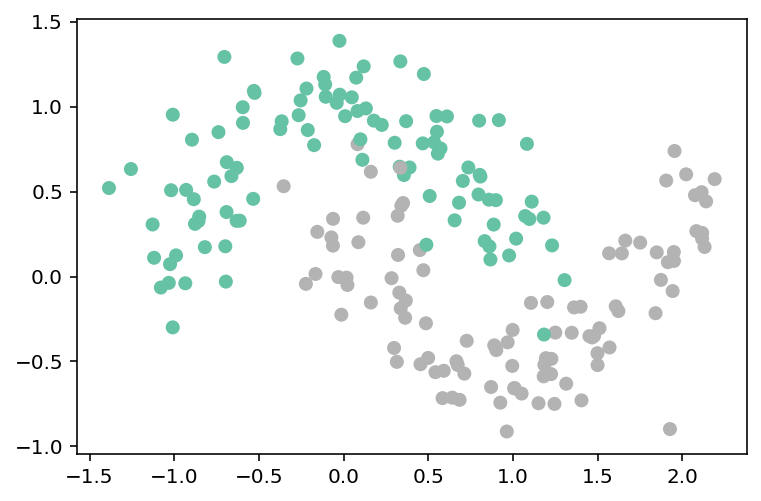

In [3]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,+
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [6]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

logreg = LogisticRegression(C=1)
svm = SVC(C=1, kernel="linear", probability=True)
tree = DecisionTreeClassifier(max_depth=3)

clf = VotingClassifier([
    ("logreg", logreg),
    ("svm", svm),
    ("tree", tree)
], voting="soft")

In [12]:
logreg.fit(X, y)
svm.fit(X, y)
tree.fit(X, y)
clf.fit(X, y)

print("----Precision----")
models = logreg, svm, tree, clf
spacing = max([len(model.__class__.__name__) for model in models]) + 4
for model in models:
    model.fit(X, y)
    model_score = precision_score(y_test, model.predict(X_test))
    model_name = model.__class__.__name__
    len_model_name = len(model_name)
    print(f"{model_name}: {model_score:>{spacing - len_model_name}.2f}")

----Precision----
LogisticRegression:     0.84
SVC:                    0.84
DecisionTreeClassifier: 0.90
VotingClassifier:       0.90


## Bagging

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
one_tree = DecisionTreeClassifier(random_state=2718)
lots_of_trees = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                  bootstrap=True, max_samples=100, n_jobs=-1)

one_tree.fit(X, y)
lots_of_trees.fit(X, y);data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABZYAAAHwCAYAAAA1jDpTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzdZ3SU1RaH8WdSSYAQeu8gHREF6b0qIB2k9yoiitJFpUrHQhVQEKT3DkqX3nsRCL1DICF95n44hnIFMoEkk8D/txbrHTLnzOyJ3uvOzn73sdhsNkRERERERERERERE7OXk6ABEREREREREREREJG5RYVlEREREREREREREIkWFZRERERERERERERGJFBWWRURERERERERERCRSVFgWERERERERERERkUhRYVlEREREREREREREIkWFZRERERERERERERGJFBWWRURERERERERERCRSVFgWERERERERERERkUhRYVlEREREREREREREIkWFZRERERERERERERGJFBWWRURERERERERERCRSXBwdQFxjsVjOAV7AeQeHIiIiIvImyQTct9lsmR0diEQP5dkiIiIiDpGJl8yzVViOPC8PD7ckOXOmS+LoQERERAQuXA4G74ckcA0CIAw3nN28HByVRLWrJ64SHBDs6DAkeinPFhERiSVOngskQaqHeDiHAGB18sDJJb6Do5Lo8Cp5tgrLkXc+Z850SXbuHOXoOERERATo2Ossto/2UyrVGQDuWjKSOGMVB0clUa3/+/3x2e9z3tFxSLRSni0iIhJLlGh4mJI9D5DP+woA/p4FiJ/ifQdHJdHhVfJszVgWERERERERERERkUhRYVlEREREREREREREIkWFZRERERERERERERGJFBWWRURERERERERERCRSVFgWERERERERERERkUhRYVlEREREREREREREIsXF0QGIiESHgIAgbt9+gJOTE0mTJsTd3dXRIYmIiIiIxHlWq5Xbtx/w8GEQiRJ5kihRfCwWi6PDEhERB1BhWUReG1arlbVr9zNhwipWr96L1WoDwM3Nhbp1i9OhQ1Xefz+HEl8RERERkUi6dOkWU6asY+rUtVy9evfR13PlSk+HDlVp3LgMXl6eDoxQRERimkZhiMhrwcfnBoUKfU6NGgNYuXIPFouNNGkgZUoICQll1qxNlCrVk2rVvuXePT9HhysiIiIiEifYbDaGDJlH9uztGDRoDlev3sXbG9KlA09POH78Il27TiJz5tYsXrzD0eGKiEgMUmFZROK88+evU7p0Tw4fPk/69DB0KFy9Cpcvw7VrcPYs9OwJSZLAunUHqFChL76+/o4OW0REREQk1uvV6zf695+J1Wqlfn3YuBHu3IGLF+HePZg7F0qVggcPAmjQ4Hv++GOTo0MWEZEYosKyiMRpYWFh1KkzhCtX7lCyJBw6BD16QPLkj9dkygRDhsC+ffDWW3Do0Hnatv3RYTGLiIiIiMQFf/yxiVGjFuPqCgsWwJw5ULo0hE+Wc3WFevVMsfnbb013c5s2P3D48HlHhi0iIjFEhWURidPWrt3/qFN56VLw9n7+2owZYfVq8PCAxYt3cOrU5ZgLVEREREQkDrHZbIwYsQiAMWOgVq3nr7VY4OuvoVUrCAkJ48cfl8VQlCIi4kgqLItInDZhwioAPvnkxUXlcJkzQ6NG5vHkyWuiMTIRERERkbjr77+Pc/jweVKkgNat7dvTs6e5zp69mbt3da6JiMjrToVlEYmz/P0DWb16Hy4upjvCXu3bm+uCBduiJzARERERkThu4cK/AZNnu7vbtyd7dihfHgIDQ1i5ck80RiciIrGBCssiEmfdvv0Am81GypSQLJn9+/LkMdcbN3yjJzARERERkTju5s37AOTOHbl94bn2zZvKtUVEXncqLItInBV+aIjNFrl9Vqu5Ojnp/wJFRERERJ7F8m+y/fK5tiWKIxIRkdhGVRURibOSJ0+Eq6sz167BxYv279u921zTpk0SPYGJiIiIiMRxadKYXDk8d7ZX+Po0aZJGcUQiIhLbqLAsInFWvHhu1KpVDKsVJk60f9/48eb68celoycwEREREZE4rmHDUgBMnw5+dp7Dt28f7NwJiRJ58sEH70VjdCIiEhuosCwicVqHDlUAmDDBvq7lfftg0SJwdnaidetK0RydiIiIiEjc9PbbmSlWLBf378Pw4RGvt1rhm2/M42bNyuHpaeeJfyIiEmepsCwicVrx4rkpUyYft29DpUrg4/P8tfv2QdWqEBoKrVpVJG1a3Z4nIiIiIvI8vXrVw2Kx8N13MHbs89eFhEDbtrBsGXh5efDJJ9VjLkgREXEYFZZFJE6zWCzMnv0VefJk4MQJc2p1+/awfz8EBUFAAGzeDA0awPvvw40bULFiAUaPbuPo0EVEREREYrXKlQsyalRrAD77DAoVgmnT4O5d06xx5QoMGwY5csDUqeDh4ca8eb3InDmlgyMXEZGY4OLoAEREXlWSJAnZsGEwrVr9wPLlu5g0CSZN+u86Z2cn2ratyOjRbXBzc435QEVERERE4pjOnauRJElCunWbzJ49frRqBa1a/Xdd1qyp+O23zylc+K2YD1JERBxChWUReS14eydg4cLeHD9+kUmTVrNw4d/cvHkfJycLadMm5eOPS9OmTSXSpUvm6FBFREREROKUjz8uTc2aRZg3byuTJ6/l6FEf/P2D8PLyoHjx3LRvX4VKld7B2dnZ0aGKiEgMUmFZ5AWuXLnDrFkbOXfuOsHBoSROHJ/Kld+lXLn8WCwWR4cnz5ArV3pGj27L6NFtsdls+uckIiIiEguFhYWxevU+Nmw4xL17/sSL58Zbb6WhUaMyJEvm5ejw5Bk8PNxp1qw8zZqVB1CuLSIiKiyLPMvRoxcYOHA2S5bsJDQ07KnnxoxZSvbsafj00+q0bVsZJ6c3d1R5UFAIzs5OuLjEzs4EJboiIiIisUtoaBg//LCM8eNX4ONz8z/P9+kzg7p1i9O3bwOyZk3tgAhjB6vVSlBQCPHiucXanDa2xiUiIjFHhWWR/7N+/QHq1x+Kn18gzs5QuzaUKwfu7nDuHPz2G5w+fYUuXSaydesxpk7tiqvrm/E/JZvNxvbtJ5gwYRXLl+/Czy8QgDRpktCkSVnatq1MxowpHByliIiIiMRGDx8G8fHHw1i1ai8AmTND8+aQLh08fAirV8OqVSHMnLmR1av3snhxX95/P4eDo445d+484Lff/mTq1PWcOnUZm82Gm5sLZcrko337qnzwwbsaNSEiIrHKm1ENE7HT3r1nqFNnMAEBwTRsCMOHm0T3Sd9+C3PnQvv2MGfOFjw93ZkwofNr/xv7S5du8fHHw9m58+Sjr7m4QFiYGRkybNgChg9fSNu2lRk9us0bU2wXERERkYhZrVaaNRvFqlV7SZoUpk6FatXgyZv/unSBs2fNdeXKB9SoMYDNm78nR460jgs8BthsNsaMWUL//jMJDAx59HU3NwgODmXt2v2sXbufzJlTMmvWl7z7bjYHRisiIvLYm3sPv8gzfPrpRAICgmnRAmbO/G9RGUwxtVEjWLcOPDxg2rT1/P338RiPNSb5+NygVKke7Nx5kuTJoVcvk/QHB0NoKGzdCo0bg4uLjUmTVlOv3lBCQkIdHfYbIzAwmMDAYEeHISIiIvJcy5btYunSnXh7w6ZNUKPG00XlcFmywJIl5vm7d/346qupMR9sDOvTZwY9evxKYGAIlSubzx8cDEFBcPMmjBwJWbPCuXPXKV++D9u2HXN0yG8Mq9WKn18AVqvV0aGIiMRKKiyL/Gvv3jPs3n2axInh55+fneg+qUgR6NbNPJ4wYVX0B+ggISGh1Kw5kEuXblOsGJw4AYMHm1sXLRbzfSpeHH7/HbZtg6RJYeXKPfTpM93Rob/WDh06T+fO40mevBFeXvXx8qpPsmSN6NjxZw4ePOfo8ERERESeMnGiyZe//hry5HnxWhcXmDLFjKJbvXofZ89ei4EIHWPGjA2MGLEQFxeYM8eMA6lRA1xdzfPJksHnn8OxY9C0qRknUqfOYK5cuePYwF9jfn4B/PLLGgoX/hwPjzokSfIxHh51KFq0O7/+up6HD4McHaKISKyhwrLIv375ZQ0ALVuCp6d9e9q1M4XVhQv/5tat+9EYneMsW7aLo0cvkDkzrFgBSZI8f22hQrBsmXk8YcIqbt9+Pb8njuTr60+tWoN4773PmDx5Db6+D3F1NT983L//kClT1lGoUDc++mgA9+75OTpcEREREf755yrr1x/EwwNatLBvT7JkUL++GRMxZcq6aI3PUaxWK0OGzAPgp5/M530eNzczPqRCBbhzx49Jk1bHUJRvljlztpA5c2s6dRrPgQNnsdlseHqafw/37j1Du3Y/kSVLa5Ys2eHoUEVEYgUVlkX+dfDgeQBq1bJ/T8aM8N57EBISxsmTl6InMAcL7y7p1g28vSNeX7QoVKkCgYEhTJ/+VzRH92bx9fWnQoW+rFixm4QJ4ZNP4MgRc5tkUJDpZPn0U/DyglWr9lKuXB8Vl0VERMThDh/2AaBsWUic2P59tWub65Ej56M+qFhgw4bDnDlzhXTpoHXriNe7uEC/fubx1KnrCA4OefEGiZRffllD06Yj8fV9SNGi5o7MgADw9zeHS/76q2mkuXPHj/r1v+f33zc4OmQREYdTYVnkX/7+gQAkShS5feHr/fwCozgix7t+/R4bNhzGwwOaNbN/X8eO5jpnzpboCewN1bz5aA4ePEf27HDwIPz4o7mV1GIxf3LlgrFj4dAhyJEDjhzxoVmzUY4OW0RERN5wyrOfbc6czQC0bWuKxvYoWRJy54Zr1+6yefPRaIzuzbJ161E++WQCYA5w37bNnCETL5553sMDmjeHnTvhu+9MB3O7dj+xZ89pB0YtIuJ4KiyL/MvLy8y/uHkzcvvC14fvf51cu3YXMIeFROYHgXfeeXq/vLqDB8+xcuUeEiaEtWvNjOvnyZjRrEmUyMwl3L//n5gLVEREROT/vGqenTChRxRHFDuE58oFC9q/x2J5nGtfvapcO6oMH74Qq9VG9+7Qvbv5Pj+LxWK6xjt1gtDQMEaOXBSzgYqIxDIqLIv8q0iRHAD88Yf9e44dgwMHIH78eOTJkyGaInMcm80GPD+xep7w9eH7XxdXrtxhwIDZ5MnTiSRJGpI4cUNy5mxPnz4zOH/+erS+d/gcvRYtIFOmiNdnyGDmhQNMnKgZfCIiIuI4776bDWdnJzZuhCtX7N83a5a5vv9+jmiJy9HCU2Xl2hAWFsby5bv46KMBpE3bHC+v+qRJ04xq1b5lyZIdhIaGRdt7nz17jdWr9+HuDj162Lend29wdoYlS3bqIEUReaOpsCzyrzZtKgMwcybcsTM3GDfOXBs1Kv1adiynSmWG4J09Cw8e2L/v4EFzTZkyEkP0YrHg4BA++WQCWbO2YcCA2Zw+fQU/v0D8/QM5e/Y6w4cvIEeODjRrNurRrZ5Rbe5cM1akQwf79zw5kuR1+sFDRERE4pY0aZJQo8b7hIbCpEn27fHxMYdCu7o607JlhegN0EFSpjQHmITnzvaw2czYM3icq8d1mzYdJmfODtSuPZhVq/Zy86YvgYHB3Lp1n7Vr91Ov3lBy5GjP+vUHouX9Fyz4G5vNRr165tBIe6RNCx99ZLqWFy36O1riEhGJC1RYFvlXjhxpqVDhbQICoFEjcxjaiyxeDOPHm8ft21eN/gAdIFWqxJQokRt/f3N4hb0mmPFk1K1bPHoCi0FBQSHUrDnw345hK3Xrwvr1cO8e+PrC1q3QpAm4utqYPXszlSr148GDgCiNISAgCF/fh7i5mTnK9nrrLTMPzt8/MNoK3iIiIiL26NjxAwCGDIGNG1+81s8PGjQAqxVq1y722hRQ/194rjxpEoTZ2ZC7fbspLCdP7kXp0nmjMbqYsWzZLj744Bt8fG6SNSuMGAEXLpgD8y5ehFGjIHt2uHjxFjVqDGDhwqgv4l67ZrqKwkeM2KtAgfD996I4IhGRuEOFZZEn/PhjB5In92LNGqhQwSRu/9/oefs2DBoEdeuaZLdfv4bkz5/JIfHGhPCi+ejR9nUt79sHK1aAm5sLLVqUj+bool/XrpNYv/4gKVPCrl0wbx6UL2/mF3t5QfHiMGOGSfAzZYLdu0/TosXoKI3hydskX/5WySgNSURERCRSSpfOS6dOHxAcDFWqwJgxcP/+02tsNtiwAUqVMoekZcyYnOHDWzkm4BhQqdI7ZM6cEh8f+5o4rFbzcwhAixYVcXd3jd4Ao9nhw+dp0mQEISFhdO0KJ0/CF19A+vTg6Qnp0kG3bnDiBHz5pekObt58dJSfH6KRJCIiL0+FZZEnZM2ampUrvyVNmiRs3QrFipnDNLp3hz59TCdzunTQt6/pKvjqqzr07dvA0WFHq1q1ipA9expOnza3e/3/DwBPOnQIPvzQJGetWlUkRQrvmAs0Gpw/f51p09bj5garVr34YJUcOWDdOlNsXrZsV5QmvB4ebnh5eRIUZBJre50+DQ8fmhngCRLEi7J4RERERCLLYrEwcmRr2ratTFCQKRimTQvNm5s8+/PPIXduKFcO9u+HbNlSs2rVd69ttzKAk5MTX31VB4D27c3oj+cJDTVjzlauBC8vDzp0qBJDUUafESMWERAQTNOmponF2fnZ65yc4PvvoXVrczfhsGELojSO8H/HDkRy0kb4+tf531ERkYiosCzyf95+OzM7doyke/faJEvmxYEDMHIkDB5sDvYLDITKlQuybNnXDBzYFEtkf7Udx7i5ubJkST9SpvRmwwaT8A8cCNeuPV5z4AC0awdFipivlyuXnxEj4n53yeTJax/NW7Pn1rhs2aLnwDyLxUK9euZWyfAxI/YIX1uvXvHX/t9TERERif2cnZ356acOzJnTg9Kl8+LnB9Onmzx79GjzC/Q0aZLQr19Dtm4dRrZsqR0dcrRr1aoinTt/SFAQ1KwJtWubsWvhTbAPHpic7p13zMgMd3dX5s7tSfr0yR0b+Cu6edOXBQu2YbHAd99F3C1sscA33zw+MO/q1ag7MK9OnWIAzJ1r7k61x5UrsGQJODs7UatW0SiLRUQkrnFxdAAisVGqVIkZPLgZ/ft/zPLluzl37hpBQSEkTZqQChXeeSOS3Cdly5aazZu/p27dIRw+fJ5+/aBfPzMOIiTEdMWGa9y4DOPHd8LNLW7fmgfwxx8bgceH4NmjY0cYOxZmz97Mzz93wPl5rReR1L59VaZMWce0aaajJ0OGF6+/dAmmTjWPO3R4PWeAi4iISNxjsVioVasotWoV5ejRC2zceIh79/zx8HAne/Y0VKlSEFfXN+fHVIvFwqhRbUiWzItBg+ayaFEYixaBu7s5K+P+fTMCAyB16sTMmvUlxYvndmzQUWDBgm0EB4fy4YdmnJw90qUzd1AuXBjGvHlb+fTTGlESS9asqalcuSBr1uxjxAgzBzwiQ4eaLvJatd4nbdqkURKHiEhc9Ob8F1vkJbi7uz76DfabLnPmlOzePYq//jrEhAmrWLlyD76+5pQRb+/4NGlSlnbtqpAzZzoHRxo1rFYrly+bToj337d/X44c4O0N9+4Fce+eP0mTekVJPAUKZKFKlYKsXr2PypVhzZrnF5cvXjSzC+/dgwoV3qZgwWyRfj+r1cqtW/fx9w/Cy8uDJEkSqutZREREolSePBnIkyeC35a/ASwWC336NKBVq4pMnbqOKVPWcunS7UeHiRcrlosOHapSq1bROD9XOdylS6Y1uEiRyO17/31YuBAuX7aztdhO3bvXYu3a/QwdaiNVKuja9dnrbDZTVP7xR9Ot/MUXtV7q/fz9A7l16z7Ozk4kT57otfnnKiJvHhWWRcRuTk5OVKhQgAoVChAWFoav70NcXV1IkCDea1d0tNls2Gw2LBYz1y0ywpuUw8KsURrT9OmfU65cH44c8SF/fjN2o2NHeOst8/zp0+ZWyalTTVE5V670/P5790i9x6VLt5gyZR1Tp67l6tW7j76ePXsa2revQtOm5UicOEFUfiwRERERAVKnTkKfPg3o3bs+AQHBPHwYRKJEnq9lB3d4nhzZm/uiK88uXTofY8e25dNPJ/HZZ7BgAXTuDLVqgZsbBAXB/Pnw88/mgHeACRM6U7jwW3a/R2hoGCtX7mHixFWsW/d4oLO7uyt16xanQ4eqFC781mv3c5WIvN5ev/9CiUiMcHZ2JkmShI4OI9o4OzuTNGlCbt9+wIkTZra0Pa5dgzt3TAdDVBdgvb0T8Oefg2jWbBRr1uxjzBhzorqHh5k79+RIkooVCzBjxhd2/zOy2WwMH76Q/v1nPkrUEyeGhAnN5zl9+grdu0+lf/+ZTJrUhXr1SkTpZxMRERERw2Kx4Onpjqenu6NDiTYpUiQC4NixyO07ftxckyWLmrsCn9ShwwckTOhJly4T2LIlkC1bTINJggTg5/d4JEmiRJ5MmPBJpO5sPXPmKrVqDeLkyUsAuLpCypTmQPhr10KYOXMjM2dupGrVd5kx4wu8vDyj/POJiEQHHd4nIrGWn18APj43uHz5NkFBITH+/h99ZO7NmzTJ/j2//GJukatWrXC0dJckTpyAZcu+ZseOEbRsWYH48eMREGCKyvHjx6NFi/Js3z6CFSu+iVThv0+fGfTtOwOr1Uq9erBxozm8xMcH7t41txyWKwf+/kE0bjyC6dP/jPLPJiIiIiIxIywsjOvX73Hu3HXu3HmALfy0wBhSo4aZNTd/vv0H5vn6msPUAWrWjJ4D8xo3LoOPzzR+/LE9efNmxGp9POe6QIEsjB/fifPnp0aqqHz69BVKl+7ByZOXyJwZRo0yzSgXL5pDAP/5B3r0MOP0Vq3aS6VK/fDzC4iWzyciEtXUsSwisUpoaBgrVuxm4sRVrF9/8NHX3d1dqVevBB06VKVQoezReouYn18AGzYcJlWqxIApFttzYN7duzB+vHkc3QfmFSyYjYkTP2HChM74+wdis/HSI0nmzdvKiBELcXGB2bOhTp2nn3dxMbcB1qwJw4ZBz57QocM48uXLxDvvZI2iTyQiIiIi0e3cuetMnryG335bz82b9x99PU+eDHToUJVGjcqQMKFHtMawf/9Zjh27QO7cGTh27AIDBpi78CLy44+mmaJs2XzReq5LwoQetG9flfbtqxISEoqfXyAJEsR7qaaRkJBQatYcyM2b96lQARYtMh3QT8qc2cxtbtcOKlaEffv+oWPHccyY8UUUfSIRkeijjmURiTVOnbpMgQKfUq/eUNavP4irqzn9OVUqCA4O4fffN1CixFfUqjWI+/cfRvyCL/H+n302iYwZW1GnzmAGD54LgL8/ZMsGX30FN28+e++9e1Cjhuk6KFAgC2XL5ovy+J7FYrGQIIEHCRN6vFRROXwEBsDIkf8tKj/9XqabokMH8wuAsWOXvmzYIiIiIhKDrFYr/fr9Ts6cHRgxYiE3b94nSRLTOOHpCUePXqBLl4lkydKalSv3RPn7BweH8Ntvf1K0aHfef/9zWrYcw7FjFwAYOxYKFoQ/X3BD3IwZ8PXX5nG3bjWjPL7ncXV1IXHiBC99J+LSpbs4ffoK2bI9u6j8pCxZYPVqM9N57tytnD9//SWjFhGJOSosi0iscOrUZcqU6cWpU5fJksXcInb9urlF7OpVOHPGFHa9vWHlyj1UqdI/Sm8Rmz9/G++++xnjxq3kwYMAihQxh+M1a2YOxwsJgeHDTcK3Zs3jfbduma+//TZs3Qpp0yZh/vxeOEX2xD8H2b37NAcOnCVpUtMlYY8ePUyRef78bdy86Ru9AYqIiIjIK7HZbHTpMpHvv5+Pk5ONJk3g779NHhs+9mz2bCheHHx9H1K79iAWLdoeZe9/584DqlTpT9u2P7J37xmSJIEGDaB1a/jwQzNveP9+qFABateG0NDwuE2xuU4dk5PbbPDtt42pUuXdKIstuk2cuAqArl1fXFQOlz071Ktn/plNnrw2mqMTEXl1caPyISKvteDgEGrWHMStW/epVAkOHoRu3czhceGyZIHvv4c9e8ztYnv2nKZz5wlR8v5Ll+6kSZMRBAWF0KiRef/t22HqVPjtNzhxAtavN8m2nx9UqQJp0kCmTOb61Vdw4QLky5eJjRuHkiFD8iiJKyYsXPg3AC1aQLx49u3JlMl8D4KDQ6Olo0VEREREos6UKWuZPHkN8eLBihWm+7doUdMoAKZDtkED2LIFevUCq9VG8+ajOHXq8iu/98OHQVSv/h1btx4jbVr49Ve4dMkUsn/5BZYvN3n0t9+aAnN4V2+2bJA8uSk2L1wILi7OjBrVhl696r1yTDHlzp0HbNx4mHjxoGlT+/e1b2+uUVncFxGJLiosi4jDLVmykzNnrpA9u0kcX/Tb/KxZYdUqk3jOmbOZCxeeM5vCTnfv+tGixWisVhv9+sHvv0P+/E+vsVigfHnTMVG9uvna1aumwyM01EKVKgVZtKgPu3aNJGPGFK8UT0wL7zjOnTty+/LkMdcbN9SxLCIiIhJbWa1WRo5cBMDEiVC58vPXWiwwaBA0bAiBgSGMG7fild//u+/+YPfu02TKBDt2QPPm4PF/I5xTpTJjLlasMDl+UJA50O72bUiTJglff/0xZ85M5pNPqr1yPDEpfIZ1unSQKJH9+8Lz7Js370VDVCIiUUuFZRFxuCdvEYsfP+L1OXJA3bqmm+KXX17tFrEZM/7Czy+QMmVMp8SLxhS7u5uTqJP/25A8a9aX3Lo1i6VLv+bDDwvh7Oz8SrE4QvjIDqs1cvvCwszV2Vn/GRERERGJrdavP8g//1wjQwZo3Dji9RaL6VoGmDFjwyuNngsICGLatPWAyaHTRXDeXsWKj+coly6dFx+fqZw9+wt9+zYgTZokLx2Hozg5mR8sXj7Pjns/W4jIm0cVARFxqFu37rN581E8PF7uFrHwUQ4vw2azMXHiagA+/fTFReVw8eObeXBgRmhE96nZ0S08Sd+1K3L7du9+er+IiIiIxD6LFplcuW1bsLdOmT+/GZXx4EEA69cffOn3njdvK3fv+lGoEBQpYt+edu3MaI7Nm48SFBQSZ84teZaUKb1xdnbiwgW4ds3+feF5durUiV+8UEQkFlApX5AAACAASURBVIi7/y8tIq+F8FEM6dODl5f9+x7fIvbyoxiuXbvL6dNX8PZ+POLCHs2ameuWLUdf+r1ji4YNSwEwcyb42vmtPHzYHFSYMKEH1aoVisboRERERORVhI8te9mxZ6+Sa2/adAR4nDvbI0UKqFrVNIBs3Xrspd87NvDy8uTDDwsRGmrmSdtr3DhzbdSoTLTEJSISlVRYFhGHcuQohnv3/AGTwLq42L8vbdqn98dluXKlp0yZfDx8CEOHRrzean18i2KTJmVJkCBud2yLiIiIvM5iQ66dJk3k9oXn2r6+cT/X7tChKgA//2zOaInI33/DypXg5uZCixblozk6EZFXp8KyiDhUqlTeODlZ8PGB69ft3xcVt4h5eLgB4B/JnDV8vaen+0u/d2zSq1c9nJwsDB0Kw4aBzfbsdaGhZgTJ4sWmW7lLl0i0eYuIiIhIjEub1owtC8+d7WGzRVWubXLlNznXLlcuP8WK5eLaNahUCS5dev7a7dvNXZQ2G3Ts+AHJk0fixD8REQdRYVlEHCpRovh88EEhQkJg6lT7940fb67e3nac9vccadIkIVEiTy5fhgMH7N+3fLm55siR9qXfOzYpWzY/P/3UAYAePaBgQZg8GW7dguBgkwB//z1kz25u44sXz5W5c3uSLVtqB0cuIiIiIi/y8celAZNnBwbat2fbNjhyxBw+ly1bJNuNn5Arlzmtb8UK+/cEB8OaNeZxjhwRnPYXBzg5OTFvXk9y5EjHkSOQMyd07Aj790NAAPj5wbp1ULs2lCgBd+5A9eqFGTKkuaNDFxGxiwrLIhItAgKCOHLEh507T3LkiA+BgcHPXRt+i9iPP9p3sMXWrbBqlXm8ZcsxNm48/FIxurm50rRpOeBxoToiNtvjuWetW1d6qfeNjdq0qcysWV+SLJkXBw6Yg1OSJwd3dzP/umdPOH8esmRJydq1Ayhf/m1HhywiIiLyxrp48SZ79pxm794zXL58+7nrChd+iwIFsnDrFowdG/HrhoZC//7msdVqo2vXiS8dY/Pm5XF2dmLBAvsPr1u82KzNnTsDRYvmfOn3jk2SJ0/Epk1D+OCD9/D3hwkTTCOHpyckTGg6mRctAicnZ7p0qcacOT1wcbHzpEUREQdTYVlEotTJk5fp3n0KGTK0pGDBrpQs2YOCBbuSIUNLunefwsmTl/+zp0KFt3nvvexcvQqVK8Pl/y55ZPt2qFHDFHjDT5ceP37lS8fbrl0VAH79FTZtinj9zz+b7uZkybyoW7f4S79vbFS3bnHOnZvCtGmfUbx4LhIl8sTZ2YnEiRPwwQfvsWRJX44eHUeRIq9Hki8iIiISlwQGBvP77xsoWbIHWbO2pVixLylatDuZM7emfPk+zJ27leDgkKf2WCwW+vZtAECvXjDxBXXioCBo2hT++guSJIF48WD9+oPPzN/tkS5dMqpVK0xoKHTq9Hhu8/PcuGGaGQDat6+CxWJ5qfeNjZIkScjixX3Zv/8HOnX6gLRpk+Lm5oKHhxvZsqWhf/+POXv2F0aObKOisojEKSosi0iUsNlsDBw4h3z5OvPDD8vw9X1ItmxQuDBky2YO7/jhh2Xkz/8JgwbNwfbEIF8nJyeqVy8MwKFD5haxTp1MATcw0Nwitn69uUWsZEm4exdq1oQ5c8yhe0uX7nxhp8aL5MyZji5dqhEcDB9+CPPmPftwk8BAGDIEunQxfx8+vBXu7q4v9Z6xmbu7K40bl2HDhiHcvDmLgICFXL/+O4sX96Vq1fdwdlaiKyIiIhLTTp68TIECXWjVaiw7d57Ey8t0vb7zDsSPD1u2HKVJkxEUKvQ5588/fXBJpUrv4OHhhs0GHTqY5ozp001OHRwMPj4wcKDJ2WfPhgQJzOi3Jk3M/smTV7903AMGNCFRIk8WLYL69U3x+FkOHYJSpeDcOXj33Wyv7cF1efJkYMyYdpw7NwU/v/n4+s7l2LFx9OnTgFSpXn6etYiIo7g4OgAReWzv3jNMmbKW48cvEhAQjLd3fEqVykurVhVjfaLRu/d0Ro5chJMTtGxpCsMFCz5+ft8+M0Ji2jQb3377B/7+QQwe3OzR8wcPngMgXz44fNiMpnjWeAoXF+jaFUaMMI8rVIDVq63s2HGSOnWKvVTsw4a15M4dP2bO3Ej9+pA1qxkFkTOn6azYsQOmTIHb/9auhw9vRePGZV7qvUREREQk5vn6+jNz5kZWrtzD7dsPcHNzIWPGFDRvXp6yZfPh5BR7e65On75C2bK9uHXrPrlywRdfwMcfm1EKAA8ewO+/w8iRcPz4RcqU6cWWLd+TPn1ygEc/W6RMabqSd+40f54lZ0744w8oUABCQsz5Glu2HH3p2HPmTMfixX2pWXMgCxc+ZNkyqFfPHFKXMCFcvQozZsDmzWZ9vnyZWLy476OD/0REJHZTYVkkFvj77+N07z6VPXtO/+e5v/46xMCBc6hTpxijR7clWTIvB0T4YkuW7GDkyEW4uMD8+fDRR/9dU7CgSUyrVTPJ5IgRCylSJAc1arwPwP375vjnYcPMTN/x482ssZs3TQE5XTpo1gzatIFUqR6/bvjj8P0vw9nZmalTu1KwYFbGjl3KP//cpEeP/64rUCAL/fo1fNRdLSIiIiKxW2BgML17T2fatPX4+z99et327SeYPXsz2bKlYeDAJtSu/XJNCtEpLCyMunWHcOvWfSpVgoULTYfykxImNAfCNWpkcu2tW+/w8cfD2bLleywWC76+DwHIkcOcUzJ7thmJcfw4+PuDtzeULm0aQ8qXh/AJFI/z7Iev9BmKF8/N5s3f07v3dFat2sOsWTZmzXp6TYIE8WjatBwDBjTBy8vzld5PRERijgrLIg62ZMkOGjceQXBwKN7eULYs3L9vbk0LCoJ79+DKlTDmzNnC3r1nWLPmu0fdB7HFmDFLABg69NlF5SfVrGlGSnz5JYwdu/RRYTm8K8HPD/LkgZ9+Mn8i8uCBuXp6xnvp+MHMn+vSpTqdOn3AqlV7Wbx4B7du3cfJyYl06ZLSpElZChXK/lrNehMRERF5nT14EECNGt+xbdtxAIoWNcXSq1fh4UMICDAHxZ05c4WGDYcxbFhLPvssgmQ2hq1du5/jxy+SIQMsWPDfovKTEiWCpUtNAXnXrlPs2HGSokVz4un5OM/29IRWrcyfiERVng2QK1d6Fi3qg4/PDaZNW8/x4xd5+DCIRIniU7Jkbho1KkPChB6v/D4iIhKzVFgWcaBdu07RpMlIgoNDKVsWzp41XbrP4uoKZ85cpXr179i2bTjx4796ghcVDh8+z7Ztx0mY0IyPsEf79vDtt+a2uiNHfMibNyO5c2dg2bJdLFsGdeva9zr+/mb2MphkNSo4OztTrVphqlVTV7KIiIhIXGW1WmnSZATbth0nVSrIlcsc1PysszQsFnMw9FdfTSN16iQ0aFAy5gN+jokTzXzjTp3M7OOIJE5s7vAbMgQmTFhF0aI5yZYtNa6uzhw4EMaFC5Ahg33vvWyZuUZVng2QMWMKvvmmUZS9noiIOFbsHSQl8gbo23cGQUEh5M8PGzaYgzMyZ4bvvzcF0z//hDFjzKyzkH8PeD527CLTpq13bOBPWLFiN2DmvCVMaN+ehAnN+if3t2xZAYvFwpw5cOuWfa8zezb4+sL77+cgf/5MAPj5BTB58hpKluxBhgwtSZWqKblzd+LLL6dy6tTLnWgtIiIiInHLX38dYtWqvXh5QWioybWdnaFhQzNOYtMm09DRqJEZuxaue/cphIaGOS7wJ4SEhLJ69T4sFvs6jMO1bWuuy5fvAiBJkoTUrl0MqxUmTbL3vR+vbdu20qOv7917hrZtfyRHjvakTNmETJlaUaXK18ybt5Xg4BD7gxQRkdeCCssiDnL8+EU2bjyMq6s5BdnNDaZOhTNn4KuvzHyzcuXMQXXHjsG8eY8P6Bg4cDY2m82xH+Bfd+6Ye+SyZYvcvuzZzfX27fsAZMmSiipVChIUZGbEPaub5EkXLkC/fuZxu3ZVsNlsjBq1mEyZWtO583h27jzJtWt3uXPnAWfOXGHs2KXkzduZmjUHcuvW/cgFKyIiIiJxyoQJqx49vnXL5NU+PuZgulq1oFQpM6Jt5ky4eBEq/Vs7vX79HjNm/OWgqJ/m6/sQq9WKtzckj8QkvEyZTBH9wYOAR8XeDh2qAqZpZe/eiF+jd28zMiRnznSUKpWX06evULJkD4oW7c5vv/3JuXPXuXvXjytX7vDXX4do3HgE2bK1Y+7crS/xSUVEJK5SYVnEQX777U/gcQF11ixo2RKedSC1xWLGQyxdajoq7tzxY+nS5xzlHMOcnZ0B0wkSGeEd2C5PtIgMGdICLy8P5s+H+vXh1CkzZ7lKFShUCIoVM53Oo0ZBiRIm2S1dOi8NGpSgW7fJ9Oz5K/fvP6R4cfNDwqVLcOMGbN8OrVuDhwesXLmHUqV6cu3a3UfvGxYWxokTl9ix4wQHDpzl3j2/V/6+iIiIiIhj3Lhxj+XLd+HkZM4uKVECVqyA1KmfvT5lSjP2oUwZ8/fBg+fGWKwv4uJifjCIbJ5ttULYv03Xzs7mNYoVy0XjxmXw94cKFWDJEti2zXRClygB771nvv711yZvHjECXFycGTu2HYcP+1CqVA927jxJ4sTwxRdw8KA5ZPv8efj5Z3NGyrVrd2nSZATjxq14Kp6bN33Zv/8fdu48yZkzV2NNg4yIiLw6zVgWcZAzZ64CJumrXBnq1Il4T/nypuA6axb8+uuffPRRkWiOMmKZMqUAYPNm6NXL/n1btphrxoyP2y9y507P4sV9qVlzIAsWBLBgwX/3bd9uRmAAZM+ehnnzejJhwirGjVuJu7v53tSu/fSe5MmhSBEz17laNThw4Aq1ag1i3ryezJixgV9+WcPFi4/nb7i6OlO7djE6dKhKsWK5dGCfiIiISBzi43MDq9XGv/0PjB0L8SI4nsTNDX74AfLnh4sXb/HgQYDDD5Pz8vLE2zs+9+75c+AAFChg375t28w1ffpkj5pALBYLEyd25sGDAJYu3UnNms/e+6fpfcHJycK4cR3Jnz8T773Xjdu3H1C1KsyZ8/T4u2TJzPznjh1h9GhTdO7W7RcyZEiBi4sTEyasYtWqvU8Vk3PkSEf79lVo0qQM3t52DI4WEZFYSx3LIg4SFPR4BlmnTvbvC1+7efORWPHb/rp1i+Pu7sqaNfDPP/bt+ecfWL0a4sVzpW7d4k89V6BAFrJnT/vo72XKwO+/m4Ly5s0waBCk//f8kNOnrzBp0mqGDJkHwPTp/y0qPyltWli71hxYsnfvGXLm7ED//jO5ePEWadNC4cKQN6/pYJ4zZwtly/amceMRBAYGR+ZbIiIiIiIOFBho8uywMNNcULCgffvy5YOSJcFqtTF/vuNHOjg5OdGkSVkAxo+3f9+4cebatGm5p77u5uZK7dpFcXIyTRPJkkGPHmb+9M6dMH8+VK9u7pa0Wm2MHr2EUaMWc/nybYoUMbOpn3emisUCn38O330HNpuNZs1GUqPGAFau3IOrq4233zZd0cmTw8mTl/j881/ImbMDW7YcjfT3RUREYg8VlkUcxNs7/qPHlSvbv69YMXMi9IMHAdy//zAaIoucpEm9qFu3ODYb9OwZ8Wxkq9WsA6hfvyRJk3o9es5ms9GkyUj27j1D2rSwa5dJdBs3Nj8UlCxp5r2dPWvGYVgs0Lfv79y+/YCCBaFevYjjTZ4cypr8nODgUD74wBSbL1wwCfXhw+b1e/c2ifP8+duoW3cIISGRvAdRRERERBwiceLHXbCRybPBjGADOH36ahRG9PLatjUfYMYMOHAg4vXbt8OCBWYERps2lZ56btOmw7Rp8yNWq43u3c3YuKFDTSNH4cLmDsqlS+HkSTPa4vjxi4wZsxQwd/5F1PUN0K6dme/s5xdIypTm9S9dMrHv3g2XL5sCdrFiZrzfBx98o+KyiEgcpsKyiIOULZsfMDOV3dzs32exmFnBAA8fBkVDZPaxWq38+edB6tUbyh9/bAJMkti6NQQ9J6ygIPP8/PmQMKEH3bs/3V68ceNhVq7cQ+LE8NdfZq7ys7i4QLdu5rbGcO3ame9NRM6cMYe2gOmoWL4cKlZ8erZ1xoymM3rbNlOIXrt2PwMHzon4xUVERETE4XLmTEeCBKYKGn74tb3C8+yAAMfl2WDmFQ8ePJdq1b79Nx5TJN+16/l7Nm+GDz80M5k7dKhKunTJnnq+d+/phIaG8cUXMHw4uLs/+3WyZze5eObMEBISSooUZv6yPbp3N53i2bPDnj2mI/rJgwddXU0Be/NmaNvW3MVZr94QnXEiIhJHqbAs4iAff1wKMB28VyPREOHnB3f/PXfuya7nmOTjc4MiRbpTtWp/lizZgc1mI8G/jSG//mpGTfTpYw71uHjRXPv0MV//9Vfw8HBj7tye5MyZ7qnXDT+9+7PP4K23Io7jk08gRw7z+HnF7P/3888QHGwOAezb98XF6Hz5YO6/Z7dMnLjK4T9giIiIiEjEXFycKVzYJJMXL0Zub/h6R83+tdlsfP/9fLJmbcM338zi4sVbuLubguyNG/D++1C1qjl879w5c6fd/PnmLJbSpc3PCR99VIThw1s99bp7955h9+7TJE5smisikiIF9O9vHoeFPfuA8f93+bJp4HBxgZUrIV265691djbjPYoXN53Lv/++MeI3EBGRWEeFZREH8fBwJ1s2czT1r7/av2/mTNOFUKxYLjw8ntNmEI3On79O6dI9OXDgLGnSwIABcOUKPHhgRkm89ZZJegcPNgeMZMhgroMHm6/ny5eJP/8cRPnybz/1urdu3Wfp0p24uECbNvbFYrE8njm9cGHE6/39Ydo087h7d/s6nMuUMfPg7tzxY948x8/aExEREZGIffppDcAUOgMD7dsTHGxybYDy5fNHU2Qv1rPnr/Tr9zuhoWHUrAnr1sHDh6a5pGNHU2BevRpq1oQsWSBrVjMO7q+/wNPTnS+/rMPs2V/i4uL81OtOm7YegJYt7e/irl8fkiSB27fh0KGI10+ebIrQtWpBtmwRr3d2NnOZwTSYxIbzY0REJHJUWBZxoPBOggkT7Et4Q0NNxy2Y29tiWmhoGLVqDeLKlTuULAlHj5qu31SpzPOFC8OJE7BlC1SrZroVwJxo3bBhKTZsGMyePaN5773s/3ntCxduEBZmJU8eSJPG/pgqVjTXM2ciXrttG/j6mgNc7D3EBcxtegDLl++2f5OIiIiIOEzVqu+SOXNKbt9+XCyOyJw5phEiT54MFC+eO3oDfIYZMzYwevQSXF3NnORFi8wIivDReePGmTsdhw2DlCnNHosF3n47M6NGtcHHZyqDBjXF2dn5P6999qy5RdLekRZgxoKULGke25NrL1tmrvY2iQDUqGG6o0+duszp01fs3ygiIrGCCssiDlS16rtkz56GixfNAXXBwc9fGxYGHTqYw+VSp05MrVpFYy7Qf61YsZujRy+QKZNJHL29/7vGYoESJczzBw6Y4rKfXwCDBzejePHcWJ7TJhwUZA7HC59rZ6/wQ0Tu3Il47e3b5mpPB8WTwtffufMgchtFRERExCEsFgt9+tQHoGtX2LHjxev37IHOnc3jzp0/fG7OGl1sNhvDhi0A4McfTdfvsyRNCl9+aQrMdeqAzQYlS+bhk0+qkSjR88fkvWqubU9h+WVybRcXyJTJPFauLSIS96iwLOJATk5OzJ79FV5eHixcCOXKmVvbrNbHa2w22LjRzFKbMgXixXNl9uweuLu7xni8EyeaGciffgqJEkW8Pk8eqF0brFYbU6ase+Ha8ET4woWnP39EfHzMNSAAjhx58drwDurQUPtf/8n1rq4ukdsoIiIiIg7TtGk5GjUqjb+/ybMHDYLr159ec/MmDB1qxp89eAD16pWgVauKMR7rpk1HOHnyEqlTQ6tWEa+3WMydgwAzZvyFv/+Lb38Mz7XDc2d7ha9fuzbitcq1RUTePCosi8SQwMBgrl27y717flifqJzmy5eJNWsGkDKlN9u2mQJy9uxQt66Zl5Y7N5Qta+arJUrkybJlX1O0aM4Yj//uXT/Wrz+Iuzu0aGH/vg4dzDWi+cQ5cqQhQ4bkXLliPqu9wmcmgxm/8c8/z18bfoDI9u0QEmL/e2zebK7p0yd78UIRERERiXFWq5W7d/24fv0eQUGPkzyLxcLkyV1o3rw8AQGmEJs+PVSubA5yrlLF5Ie9epmzOBo1Ks20aV1xsuekuig2f/42wIyRcLWzf6RAAXOYn6/vQ9atO/DCtRUrFgCezp0jcvz4407vP/+EgQNN08vzJE5sruG5sz1u3TLj9SwWC2nTJrV/o4iIxAoqLItEo+DgEObO3Ur58n3w8qpPhgwtSZGiCenTt6R37+mcO2daJt59NxsHDvzAwIFNyZgxOWfPmrlq8+ebmcWpUyemb98GHDr0E6VL53PIZ7lxwxcwyXh40miP/PnD99974TpnZ2fatq0MwOjRL05aw125YmbhmdlypqOiUCHo1+/pE8CDgsxsvS5dzN+vXjUnadsjONgcRALQvHl5+zaJiIiISLQ7deoy3btPIXXqZqRM2YT06Vvg5VWfDz7oz5IlOwgNDcPV1YVJkz5h5cpvqF69MGFhFtauhdmzYc0aCAmx8OGHhVi27GumTfsMN7eYvysQ4Pp1kyvnj+SZgfbm2o0blyFBgnhs2gT79tn32mPGmGu5cubar58pxq9YYcb0hTt2zOTZBw+av48bZ18uD6bQHRQEVaoUJFWqSPyQISIisYLuNRGJJnv2nKZ+/aFcumSGjbm4mIJsQADcvOnLiBELGTlyEZ9+Wp2hQ5uTNKkXX31Vhy++qMmOHSe5cuUONhukTJmIYsVyOfzWsPAxc5E9rDl8vT1z6lq2rMDQofNYsyaIvn1NV8Tztt25A9Wrm0T0o49gxgxo2BBWrjT7Bg82p2S7ucGlS+bQvid98w1UqgReXi+OacQIc4hL3rwZKVYsFwBBQSEsXPg3M2du5MKFm4SGWkmWLCE1arxPixYVSJYsghcVERERkZcWHBzCp59OYurUx7e5eXmZvO/uXRvr1x9k/fqDZM2ainnzepE3b0YqVChAhQoFuHjxJgcOnOPBgwASJvTg7bczkyFDcgd+GiO6c20vL09atKjATz8tp3Zt2LQJMmZ8/vpJk8wfJydTYD55Epo3NyMx1q6F5MnNAd7+/nD27ON9zs5O7N9v5Y8/oFGjF8d++TKMGmUet2//+GDy48cvMnnyGrZtO8b9+w/x8HAnb96MtG1bmRIlnn9mi4iIxLxY0bFssVjqWiyWHy0WyxaLxXLfYrHYLBbL7y/5WuksFstUi8VyxWKxBFkslvMWi2WMxWLRrz8lxmzffoIKFfpy6dJtcuc2v7W/c8cUKO/fh7//hqZNwcXFxtixS2nZcuyj8RjOzs4UL56bevVKUL9+CUqXzufwojJAypTeWCwWLlwws+jsFd4RYU8HQooU3kyf/gVOThYGDzbzmbdtezrBDgiAX381t/3t2wdZspikN2FCWL7c3HrXoIFJgk+fNrfW+fqajua8ec1rpE6dmKNHzdiR530WqxVGjoQ+fczfv/nGZMbjxq0ga9Y2NG8+mrVr93PixCXOnLnCjh0n6d17Opkzt6Zz5/EEBATZ/00SERGJRsq15XUSGhpG/frfM3XqOtzdoXVrc/Cer6/J627eNHe/ZcsG//xzjbJle3Hw4LlH+9OnT0716oVp1Kg01asXjhVFZYDUqZMAsHev/Xtstsjl2gMHNqVw4bfw8YEiRcwhgf/ffHHwoPmetm9v/v7DD5AvnxnT5+MDw4ZB5szm+3z4sCkqx49vGj2AR+MsWraEWbOeXyg/exbKl4dr16B48VxUrvwOZ89eo2rV/rz9dhd++mk5+/ef5Z9/rnHkiA+zZ2+mfPk+FCzYlc2bIzhYRUREYkysKCwDfYFPgALA5Zd9EYvFkhXYC7QEdgGjgbNAV2C7xWLR0CaJdjdv+lK79iAePgyiaVM4cAA6djSFTzDdCEWLwvTpsH69+frs2ZsZOXKxYwOPQKJE8ala9V1CQmDqVPv3jR9vrg0blrJrffXqhZkzpwceHm4sXgwlSpg509Wrm3l4adOaRPXMGVNU3rQJUqQwey0WKFnS3Np4+7aZC3fwoOlY3r/fFJcBPv20BunSJeXvv80p1G3bmmL/hQumG2PMGMiVC7p3N+s//7wmb7+dmS+/nMpnn03mxg1f8ueHCRNMQn38uBmt8eGHpoNm8uQ1VK78NQ8eBNj/jRIREYk+yrXltfH11zNZuXIPSZPC1q3wyy/w7ruPn0+cGD77DA4dgpo1zfzhmjUHxvq8rEGDkoDJs4Ps7E/YvdsUlpMkSfBohvKLeHq6s3z515Qpk49r18yB3GnSQMWKUKMGFCxo5jaH5/o//wydOz/enywZfPmlycPPnTP59cmTpnlm0CCzJl48N7p1+4jgYGjcGN57zxxAfvo0nD9vZjU3bAhvvWX2ZsmSikGDmrJv31lKlerBn38eJH58U9jevNms2bPHjOFIlQqOHr1A1ar9WbRoeyS+uyIiEl1iS2G5G/AW4AV0fIXXGQekAD612Ww1bTZbT5vNVg6T9OYABr1ypCIRmDJlLbdvP6B0aZOUvejwjVKlzOxfgLFjlzx12Ehs1L59FcB0N9jTtbxnDyxdCq6uzrRsWcHu9/nooyIcPvwzPXrUJXlyL06cMN3Ia9fC3bvmEEOAAQMeH8j3/7y8IGdOM3cubVpTdL5tppKQNWtqtmwZRqVK7/DwofmBpHhxcztgzpzQrRucOvX4tUaNWkz27O344YdlODub5PjAAZPw5s1r9tSoYWI8eBAyZIAdO07StOlIbJG9n1FERCTqKdeW18L9+w8ZP34lAIsWmaLl83h4mGaDggXh8uXb/PHHphiK8uUULZqTfPkycfOmudsxImFhBK60KwAAIABJREFU8O235nGLFhWIF8/Nrvfx9k7AypXfMHv2V5Qtm4+HD02zy7JlplAcP747YBo7OnV69ms4OZnmjAIFTIHY0/Nxnu3l5cnQoS0YM6YtSZMmZN8+cyDhW2+ZTucKFcwZKeEzms+evUaZMr0pUeJLbtzwpUgRc1bKhAmmYeStt8wvDr77zjSBdO0KISFhNGs2it27Tz07QBERiTGxorBss9k22Gy207ZXqMBYLJYsQCXgPPDz/z3dH/AHmloslvgvHahIBMLCwpg8eQ1gTpd2sWOCRbVqpvh544ZvrP/Ne+XKBXnvvexcvmzGSFy//vy1+/ebDl6rFVq3rhTpwzgyZEjOgAFNOHt2Chs2DGb+/F4sXdqPAwd+pGtXc6/dokX2v96NG/DXX2b+XMGCWUmbNinLl/fn8OGf6dKlGnnyZCBVqsTEi/f4NwFubqZwXKAAeHubr4WFmRPFn3foSb58phMjcWJYuXIP27Ydi9TnFhERiWrKteV1MXPmRvz9Ayld2hQdI+LubjpsASZMWBWrf+FvsVjo3bs+YO6a++23568NDYV27czZIokSedKp04eRei8XF2dq1y7GmjUDOHFiAsuX92fu3J6sWzeAI0fG4eHhxrFjTzda/I+984yK6urC8DN0EBFFxV5RY8HEbuxdMfZePo0VsESjMcZuNLZoNLE3sPdeUbHXiIK9i2LvigLSh/v92A6IUmZoltxnLdfAzLn3njsMss8+e79vYqxdK4/lyhVCo9HQu/cP+Pm54+7enxo1HClQwJ6MGa1j+afkyiWJ/0KFYiQzTp6UJPL75oA6TE1F5sTZWTxP/vhjjUH3raKioqKS8nwWieUU4p1XLZ6KokS9/4KiKIHAccAKqJjWE1P573Dq1E3u339B/vzSUqYPGg24usrXGzYcT73JpQBGRkZs3DiUAgXs8fGJkYu4cUOCQa02Rj+6YkVJ5tat+x1//dUtydc0NzelcuViNGlSgQYNylCsWG66dauLsbERmzeL6Yc+uLtDeDg4OZWJpaVXpEhOpk7twYEDE8iY0ZrQ0AiyZ4c//xQJjYsXJUn++LEYBJYqJV/XqBF/ctnBIaZtcN683Um+dxUVFRUVlc8INdZW+eToYmWd/q8+tGghRnOXLt3l+vUkK8GkCS1bVmL06PZERUGXLlCzJqxfD6GhEmu/eCGJ1WLFpDPSwsKU9euHJksnukCBbNSrV4pmzSpSvbojOXPaRUvY6STtEiMgQGT+AHr2rB/9vIWFGZ061cTT8w9++qkx/v5BKIroNR8+LBXIPj6ylrh0SeJnU1ORpXN2jlufWaMRk25zc9iz5yy3bj1O8r2rqKioqCSfrymxXOTdY3z7qjffPRbW52QajcYnrn/AN8md6H+F4OAwtmw5ydy5HsyZs5MNG44TEBD8qaeVqjx79hqQKlcjA367HB1jH/85kz17Jg4f/pNq1Yrj7y8Gd0WKSHW2iYlISqxYARERGrp1q8vmzcMxM0tADyQJ5MiRiWbNKqLVinZbSCKSeV5eMG6cfO3q6hTnGGfnWVy9ep/ixSXAHTxYFiE6LCzgf/+TKoo2bSAoSOQv4ru2s7N8BjZtOsGbN2+TcJcqKioqKiqfFSkWa6txdspw4cIdFi/ey8yZ21m8eC/nzt3+1FNKdZ49E6e5kiX1P8bMTGJVOf7zj7WHD2/LjBnOpEtnwaFDEndaWsp9ZMkCAweKXnHevFnYu3ccNWo4pvgcdPHyrFmwO5EaichISYIHBUGVKsUoUSLvR2O8vK4zcKA7IBIX69eLJOD71cvFi8v1PD3lfhctgoUL476mnZ3oNCuKwvLlB5NyiyoqKioqKYQejfpfDBnePb6J53Xd87ZpMJf/NHfuPGX27J0sXbqf169jJ9SsrS3o2LEGffs2pkiRnJ9ohqmH5l10ZGiXnW685v3o6jPG2NiIBg3K8PixP/fvPycsLIKod7VL9va2dO5cm54965Evn32qzWHy5K78++81Dh9+Re3aUtlQvnzsMaGhomHdvz8EB0OnTjWpX7/0R+e6desxW7eexMJCWgqzZ4//umZmUrl87ZqYwqxbBz/++PG43LmlcvnGDS2PHr0iQ4avvzM4JCSMt2/DSJ/eEnPzlN1MUFFRUVH55Kix9meAVqtl3bpjzJ3rwcmT1z96vXz5wri4ONGhQzWMjY0/wQxTF12o/DXH2oqiUKhQTmrWdOT48asEBASj1UYRGQmmpiZUr14cV9eGNGxYFhOT1PkZlypVkF9+ac7UqZtp0gQmTxadZGvr2OMuXYJffpFksK1tOmbNilvCfcaM7SiKwoABiVeb16ghyecff4Rp08RkO64fW40aIhdy9+6zJN3jl4ZWq+XNm2CMjY2wsbH6Ij7LKioq/w2+psRyYuj+59UrDFEUpUxcz7+rpvg4M6UCwMGDF2jdeiIBAVLGWbas/NNoRFLg2LFQ5s/fzbJlB1i2bCBNm35d3ZLZs4uO8Llzsnuvj8YySIWsHJ8plWaWMkRERDJ06FLmz98dr9Hgy5eB+PsHGqypbCi5c2fBw2MMjRuP4d9/X1ChgnzWnJykyuHRI1i9OsZIpGLFb7h9+wm5c3chJCScjBmtqVHDEVdXp+i2ynbtxHgvMczMxG28WzcxV4krsawbB3z2pozJ4eXLAJYtO8DChZ74+j6Kfr506YK4uDSgbdtqWFmJCczr10GsXHmIc+f8CAoKIX16S8qXL0y7dtWwtrb8VLegoqKiopIy6B1rq3F20ggODqNTp6ls334KEKPiRo2kevPVK9i5E06dusGpUzfYuPE4K1b88tX9fc2ePSPXrj3Ax0c6BPUhJASuXNEd/3nH2idOXMXFZTbXrz+I8/WIiEju3XuBnV36VEsq6xg/vhNhYRHMmrWDAQNg1CiJlfPnh7Aw8S45elTG2tqmo2bNkjRvPo6XLwMxMzMhf357unSpQ61aJdm8+V+MjaXaWh86dBC/muvX4eBBqFXr4zH/hThbURQOH77EvHm72L79FBERkYAYJHboUB1n5wbRFeKKonD8+BU2bfqX58/foNFoyJEjE+3bV+fbb/N/yttQUVH5yvmaEsu6KokM8bxu88E4lRTGy+s6TZv+QWhoBD/8AL///rFT86VLMH48rFkTTrt2k9m6dST16pX6JPNNDcqUccDBITu+vo/ZuROaNk38GEWJ0S/T6Zl9jkRERNKq1UR27fJBoxFjPldXcWnWaKR6d9482LpVi5ubJ9evP2THjlFYWpqn2pyKFcvNiRN/8fffW1iyZB/e3kF4e8cekydPFl69CuTkyWuxng8MDHm3wXEg2rCvZ0/9r922LfTrB6dOwZMnkC1b7NfDwkSjGcDOLr2ht/ZFMG+eB4MHLyY0VAJ6MzNIlw4CA+HMmVu4uMxmyJClTJ3anePHr7Bq1WFCQsJjnWPJkv389tsSOneuxahR7cmY0TquS6moqKiofHrUWPsTEhmppUOHKXh4eGNrK14QHTvK310dwcGyqf7bb2Ig3K7dZDZvHo6p6dez5GvXrhoHD15k7tz4N/Y/ZO1a8PeHsmUL4eCQQFvaJ2b3bh9at55EWFgEuXJJZW+bNpApk2wcrFsH8+fDjRsPadBgNGvX/kbDhmUTP3ESMTIyYtq0HlSpUoyZM7dz/PjVj6QprKzMyZQpPQ8evPjIhPzFiwBOn76JpaUZkZFafvhBzPr0wcRECjjGjYOtW+NOLN9+p/zytcbZ9+8/p02bP/Hx8Y1+LkMG8bQJCAhm3rxdzJu3i1atKlO3bilmztzOpUt3PzrPtGlb+P77bxg2rE2cnZsqKioqyeVr0ljW9YLFp+tW6N2jAd62KvoSGamlU6ephIZG0K0bbNv2cVIZpLJg1SpxZ9Zqo+jceSrBwWFpP+FUwsjICGfnBoAk0MP0uLXVq8WwImdOOxo1KpfKM0w6Awa4sWuXD5kzi0Hfjh1SJZM9uyRV69WDTZvE0C5HDjh69DI9e85K9XnZ29syaVIX/PzcWbp0AMOHt2XgwGaMHdsRV1cn7t17TlBQKKVKgZubmP35+0sF/S+/QMaMRCdG43Kfjg8rK5G7ADFS+ZBNm+D1a3B0zEeuXJlT4E4/LyZOXE+/fgsIDY2gfn35nQ8OloVPYKAYuJQvD/7+QXTrNh13972EhIRTp45spKxeLTp6VapIkn/27J1UqzaEBw/ieDNVVFRUVD4H1Fj7E+Lu7omHhzeZMsGxY+LlkO4DlS0rK+jeHY4fFy1eT8+zzJ3r8WkmnEq0bVuNDBms8PIS+bLECAqCKVPkaxeXBqk7uWRw5cp92refTFhYBK6ukjQdMQIKF4bMmeVxxAjw84NevaRKt0OHKXEmElOaFi0qcfDgRLy9/2H8+M788ktzhg1rw59/dsHOTpLK1tbQu7d0Yb56JUbXq1aJ94quqODxY8MkTAq/+58mrjhbqxUNZiBVk+ufinv3nlOt2hB8fHzJlk0Kth4+lLVFYKCsY3r3lv8DNmw4jovLLC5duou9vVR6L18usfhPP0lnw7//XqNJkz+YNWvHp741FRWVr5CvKbGsU+2vp9FoYt2XRqNJD1QGQoCTaT2x/wIeHt7cufMMBwfZSU/IuE6jgUmToFw5ePUqiHXrjqbdRNOALl1qkzOnHadPQ+vWkmyLj23bZDceYPDglqne0pZU7t59hpvbHkxNJYivmICCybffis6alRWsW3eUy5fvpckcLS3Nad++OqNHt2fSpC4UKpSTefN2odFIItPHRxZbOXKAra1scvz1F9y5I0lxgPbtJemsLxHvOu9MP5ATjowUzWcQ85OvTQNt+/ZTjB69EiMjWLJETF0aNwadlKOFBXTqJEaHI0bIcxoNbNkCe/dKpXu7duL8ffQonD0rhi3Xrz+gceOxX73Jp4qKisoXihprfyIURWH27J0AzJ4tfzMTokgR6SIDmDdvN1E6I4yvACsrcwYObA5I99iBA/GPffNGjJavXAEHh+y0aVMljWZpOFOmbOTt2zDatROZtQ9jSx0mJvIZ6NBBpFH++mtTms2xZMl8/PprCyZO/JGhQ1uzbNkB7t9/QfnycOuWzKt0aSnayJZN4upjx6TS2sxMik90XZr6EF+cDRJT+vlB/vz2X1X3K4iWcvPm43n48CWVK8vnd/RoWcPoKFFC3u/Tp2OqwCtWhHv3YMIEMRzv1AlmzJCE9OjR8v/IwIFurFp1+NPcmIqKylfLF5dY1mg0phqN5huNRlPw/ecVRbkFeAL5gD4fHDYGSAcsUxTlLSopzvz5uwDZQddHV9jICPr2la/nzduVijNLe2xtrdmyZQS2tunYvl1228eOFVkERYHwcKn2bdgQmjWTqubevRtGuy9/jri5eRIVpdC6tWwIJEbx4jHtiQsWJGIlnQooisLYsasBqVJxdY3b9ANkF3/LFqmwf/gQ3N31u8aDBxLQmpjENvvTauV6p06J/pmpqTEbN57g7NnbKIY6zXymTJ68EZDANaE2VI1GPvtdushnf8uWuMd99x0cOQJFi8Lly/eYOXN7is9ZURQuXLiDh4c327Z5ceLEVcLDDdfkCwgIZu5cD+rUGY6jY19KluyLk9Noli7d/1V1X6ioqPx3UWPtz48jRy5x7doDsmWDli31O6ZJE+ms8vV9xIEDF1J3gmnMb7+1pEOH6gQFQd26Ek97ekoiUlGkaEBX7XvwoHS3bd06MlXl2ZLDixcBrF9/DI1GYqvE6hE0GumM1GikWvX587RXn9mw4TiXL9/DwUEKDLJmjX9s69Yx1cVjx8paSB+OHZPHD/1PTp+Grl3l66pVi7Nu3TF27/b5agoTPDx8uHjxDnnzypoxYwK2NUWLyvtvYiJrj2dx+BhaW0vF8/Tp8v2AAQsJCUn5mNXfP4gDB86zefO/eHqe5f795wafQ1EUTp68Rvfu0ylXbgDFivWmYsVf+PnnBVy5cj/F56yiopIyaD6HRIdGo2kGNHv3bTagPnAb0JWyvlAUZdC7sfkAP+Cuoij5PjhPQeAEkBXYClwFKgA1kba8SoqivEzmXH1KlSpQ2strWnJO89WRIUMbQkLCefo04cDifUJDRScqPBxev14bbfD1tXD16n3at5/ClSsxFbtGRvB+0Yi5uSnDhrVhyJBWaVrVqtVq2b37DDt3nubly0BMTIzJkycL//tfTYoX/9i9rkCB7jx48JKjR0W6QB8uXoSSJSW5+uzZCowSKmNPYY4cuUSdOiPIlk127uOr+nif7dtlEVagANy8mXDVPcjO/9ixon23dq1UKe/cKc+dORP3Md9+mx9XVyc6dKieaosbP7+nuLl54uNzk8DAEKytLShVqiA9etRPEV3Bs2dvU6HCQDJkkET8h224ceHrC4UKSSXzw4eiFRgX+/bJAjFnTjtu3lyQIhX8wcFhrFp1iHnzdnHhwp1Yr2XLlpFu3erSs2d9cua0S/A8kZFaRo5cwbx5u3j7NjTOMba26Rg4sBmDB7dM08+7CvQaehul6VmqZRMdQn9NXjLm/XxbnlWSxugKo7l79u6Z+IzfVOLnS4m11Tg7bsaPX8uYMav5+Wf4+2/9jxsyRLSYhw5tzZgxHVNvgp+AqKgoRoxYwfTpW4mIiNEy+zDWLl26IKtXDyZ/fvs0nd+9e89ZtuwAN248JCQkHFvbdNSo4UjLlpWwsDCLNXbePA/69VtAw4YSS+pL48aSePznn5707v1DCt9BwlSr9hsnT15n4ULo0SPx8YoCjo5w+TKsWSPV5gnx6hXkzCnrxZs3wcFBNgxmz5Yq3LiS0+nSWdCxYw1cXZ2iDe1SmvDwCLZu9WL9+mM8eeKPRqMhW7aMtGlTlSZNyqeInnmjRmPw9DzLX3+JbJ8+tG0rleEjR8paJD7KlQNvb3Bz+4nOnWsne64AZ8/eYs4cD9auPRItLwig0WhwciqDi0sDGjQok+ha18vrOn37zuP8eb94x1SvXoK5c/t81lrpXxtV2l2k6pBzONqKSftbq+9Il7XCJ56VSmqQnDj7c3Fy+A74sO6twLt/AHeBQYmdRFGUWxqNpiwwFmgANAQeAzOAMYqivEqxGatEExmpJSQkHCMj0XPTFwsLkSR49gzevHn71SWWixbNzdmz0zl48ALz5u1i375zBAWFYmxsRMGC2enWrS4//lgLOzubxE+WQkRFRTF79k5mztzOnTsfb2lPnbqZ6tVLMGpUe6pWlT5LrVbLgweyRvz+e/2v5egI6dNLhWdAQDC2tmlnyrZy5SFAzPj0SSqDVJDnySOadidOJJxA1wW2IAn0atUkefr4cexxFSpAvnxSlX7sGJw/70evXnOYM8eDbdtGJprMNITbt58wcKDoYH+4YXjw4EWmTdtCvXqlmDatB4UL50zydTZsOA5A5876JZVBFgN164oMxvbt8Vc516ol1UU3brxk1y4fGjcun+R5giTZGzcey40bDwHRKCxbVqo6btyAGzf8mTBhHdOnb2X16sE0aBD339Dw8AjatPkTDw9xhqxRQwx1HB1loeTtLa2dp069ZdSoldy48Qg3t5/U5LKKisrnhBprf8EEBoYAHxsFJ4Zu/NdSyfk+RkZGTJjQmX79GrN48T6WLdvPnTvP0GqjsLGxwsmpDK6uTlSqVDRNizeuXLnPyJHL2bnzNFFRseOxpUv38+uvi+jRoz7DhrWOTjDfuyciwpUrG3atSpUksXz/ftr6U/j6PubkyetkyCByF/qg0YgmcJ8+sHRp4onl33+XpHK6dJK4FmPo2GPs7KBqVTA3h7t34eTJUBYs2I2b2x5mzHCJ9r1JCRRFYfr0bUybtoUnTz7Wzdu8+V+yZ8/IoEEt6Nu3UZI/c69fB+HpeRYzM+n40xdXV0ksr1uXcGK5d2+RYVy40DPZiWVFURg3bi1//LEm+rkKFcDeXn5ex48reHh44+HhTbNmFVm6dEC8hTW7dnnTtu2fhIZGkDmz/MybN5fO0ufPRa97+XI4fPgSVasOZteuMXz3XYE4z6WiopL2fBarXkVRflcURZPAv3zvjb3z4XMfnOu+oihdFUXJriiKmaIoeRVF6a8GuqmHsbERpqYmREVBSIj+x0VFiaEGyA7z14q1tSXW1pZotVI+odVG8fjxK3x9H0UnbNOCyEgtP/74N7/84s6dO8/In1+clteuhZUrJVGWLp38wa5ffxQrVhyMni+Ifq6heTJdUvf9SpK0QNd6VamS/scYG0swBKJ9HR83bkCdOvDy3Y/u6lXRCX4/qdytmyScT56UqozNm0U6Y8UKSbJevHiHunVH8uJFgIF3Fjfnz/tRtepgPDy8MTVV6NRJFhr//iuVL127ykaOp+dZqlX7DW/vm0m+1tOnEkx/+61hx+nGP3kS/xgjI2jaVL6+fDl5ZjQPH76kdu1h3LjxkKJF5b1/8AB27ZLk9rVrcOiQbCi8fRtGixYT2Lv3bJzn6tt3Hh4e3mTOLD/rgwdFI7p4cdG469IFvLzkPbe2hhUrDjJ69KpkzV9FRUUlJVFj7S8bXTJGFzfrS2CgPFpZfb1xtoWFKdbWFpiamkTHrAEBwdy69QRf38eEhuqpu5ACHD58kWrVBrN9+ymMjRXatZMk6vr1Umn+3XciezFp0nqcnEbz5o2oxmjfuUfrIyf4Pro4OzIybeNsndHyt9/qX2QAMQUqx4/D23gEc7RaGDYMZs6U79++hcOHYyeVCxYUY7oHDyTGXrNGYt5LlyQhGRWl0LfvPNzc9iTh7j4mKioKZ+dZDB68mCdP/CleXOZ39KhIuU2fLpIUjx/788sv7vTuPSfJuubPnomsSe7ckjjXF33ibBDZGEh+nA0watRK/vhjDUZG0L+/rJFOnoStW0X7/MED8VXKkAG2bDlJ27Z/xvlZPX/ej/btpxAaGoGzM9y/DxMnign4N9/I5sHcuXI+Jyd4+TKQpk3/4PFj9U+OisrnwmeRWFb5stFoNBQrlhtIOCH3IQcOiLFdrlx2pE9vmUqz+3Q8f/6G+vVHUaXKYFasOEhISDjp0ompXWBgCG5unpQrN4AWLSakSSVJ//4LWLv2KNbWspvt6wvDh4uUQ4cOYvLy6JG0XEVGaunRYwa7dnljZmaKjY0VWq1U8+rL06dihGdsbIStrQFRZwrwfjLcEHTjp0yRiuVVq0RH+f59kWlo00aSibduSWvlmTP/cOjQRJYuHYCJifx3OmOG6DSXKBH73Obm0LGjBFzffiuah/37L0jurfLo0SuaNBnL8+cB1K0rQdeyZfDDD2Li0bCh6No9eACNGolhZtOmf3D3bhwibHqgq8AwVEVJNz6xAo706eXx7dvkab/16DGDBw9eUqmSvOcdO8rPQIdGA9WrSzJ4wAD5zHfoMIXXr2Ov2q9evc+SJfuxsBANu4Qq2X/4QRY4RkYwbdpmnj17nax7UFFRUVFRAWLF2Yb8/dXF5brjvzbc3T3Jl687v/zizrVrDzA2lgpHIyPw9r5Jz54zKVCgBzt3nk71uVy8eOddTB9Cq1YixbZ6tXR4tWoFP/8sydHDh0Xi4fjxq9GJNl334o0bhl3z+nV5zJw57bofIelxti5xHhAgidNBg8TA+dEj2fCfNEmSxhMnyvrB3b0fJ0/+xZ49Y6MN+hwdJa7r1EmKJt6neHFYuDCmq/Cnn+Zz8+aj5NwqIAnUpUv3Y2UFGzZI8UjfvhITVq0K/fqJxMfatWBpCe7uexk7dk3iJ46DtIyzkyOJeuDAef78cwPGxvKe/POPyN69T5Ys8NtvspGQOTPs3n2GqVM3f3SucePWEhwcRqdOsh798Oeqw9ZW4uyqVSWJP3PmjiTPX0VFJWVRE8sqKUKPHvUAcTHWF93YHj3qp2mLWlrw7NlratQYyqFDF8mUCQYPlmRkUJDsvF+5IkFI+vSwY8cp6tYdkarJ5bNnb7Fw4R4sLGDPHjHRiKv62MYG/vpL9LmiohR+/nkhUVFRNGkipbwLDMiDurtLkNOwYdkU0RszhMyZMwASpBqCbrylpRnHj0syskABkcioW1cqThTFiA4dqrNv3zhKlMhHpUpFOX/ej8jIKDp0gJ9+Svgadnayk29sDOvXH8PKqiW5cv1I587TOHHiqsFB3rRpm3n82J/q1aUSNz45Gjs72LQJ6tWD588Dog34DCVbNnEQiU9HOj7OvisGzp6IJNrTp/JoY2Nl4MxiuHz5Hvv3n8faWt5rmwTWWxqNfOarVYM3b4JZseJQrNcXLpRql06doIwealN16kiCOSJCy+LF+5J8DyoqKioqKjqaNKlAliw2XLggcl36cPq0SDVlymRNixYGaJl9IUydupleveYQHBxG7doS44SGwps3Em8vWSJ6si9fBtKy5QTWrTuWqvMZMmQJgYEhtG0rCca4ZEs0Gok3jh4VuYADBy6wYcPxaOmvNWtk/voQECCJa4DGjdNW71SXyL5xQyqM9UUXZ1tbW+LvD1OnQunSkmgvWhSGDhVJi/z57dm2bSSdOtWidGkHihbNzYEDFzAyEiPozJkTvk7v3pLQ12qjcHTsg51de8qVG8Ds2Tuiq8T15eHDl0yduhljY4kpW7aMO3mr0UgByqZNssaaMmUjT58aXmBgb2+LRqPh/n2RgNAXw+Nsy2Stv2fNEjHwkSNFsiIhiheXyn2AefN2xapafvDgBdu3e2FiInrwiU3J3FzGASxZso+wMMONuFVUVFIeNbGskiJ06FCD9OktOXpUdooTY9MmCQxMTIzp1q1u6k8wDVEUhfbtp3Dz5iNKlpS2rD//lASljqJFpW3q3DnZmT979jY9esxItTnNm7cLEP0tfeQhRo8WbWA/v6d4ep7F1dUJkGTxCz1k3AICpGVJrumUxFknnaZNKwKSCNc3T3v6tPw8Mma0xtd3IbNn9+L7778hT54sZM+eEUfHfAwf3pabNxewZMkArK2lyj40NJwlSySB+PPP+l0rb96YICwyUsuzZ29Ys+YINWoMpWJx010DAAAgAElEQVTFX6I1gRPj7dtQli7dD8C0abErcuPC1FQqCgBWrTpscHAN0KaNlOyuWBHTYpsY165Jh4KVlRjNxEdYmFTTA1SuXNTguemYP18+7507J774AKJb+EB+V3TJfa1WGy0J07u3/tfXjV269ID+B6moqKioqMSDubkpXbtKvNynj8RZCREUFPO36Mcfa6eaYfCnYvduH4YOXYpGI7Hevn0SV+kqYi0txc/BywtGjJBiiW7d/vnIxDeluHnzEXv3nsPCQgpnEpOOy59fNIQBFizYTdGiualRw5G3b/Uv0pk7V4pVqlcvkeYV6Y6OeSlQwJ6HD0ViTF90BSpjxnTgxIkpdO5ci0KFcmBvb0uBAvY0blyebdtGcvXqXOrWLRV93KJFe4mM1NK0aez1VELo4rqoKIXAwBDOn/djwAA38ubtxpQpm/Qu5HB390SrjaJFCykeSIwGDcQMPCJCy6JFe/Wb7Hvo9MEjIqTjUF90667ENK9XrJDHypWLGTw3HXfvPsPD4zRmZtCrl37HODlBkSKSqN++/VT086tWHSYqSqFFi8ST4joqVoyRlUmLbgQVFZXEURPLKilC+vSWTJnSDRCt3j//jFtvOTxc/vC1bSsJv99/7xBdAfm1cOLEVY4evfyu5SfhP5IFCkgFsZWVaE9dvXo/xecTGBjCmjVHAP3/+BsbSxIapGKzXLlCVK5clJcvdXIKCV1PgvsHD6BEibzUrm2gGG8K0KxZBeztbbl0CTw8Eh+vKDG731261CZLlgz07Fmfw4cn4eu7kLt3F+Pj8w+jR7cnV67Ymcrz5/149SqIokWlMkZfdIYclSpJxcewYVJtfPbsbapXH8LFi3cSPcfmzf/y5k0wFStKxYc+FC0KNWtKUnr9esOrdxwd81GlSjECAyWZnRiKEmMi0rGjtLHFx/r1Up3h6JiP77//xuC56di37xwg2tL60qQJZMoEN248jDbBef36La9fv8XWVgJYfalZUx7v3HmarDZDFRUVFRUVHQMHNqNQoRycPy9/Z65ejXvcjRtQu7ZUKxcoYM+gQS3SdqJpwJ9/bgBgzBgxao4PjUZikK5dITw8kunTt6bKfHQJxA4dJJbQh44dpXPx2LErXL16n59/FpOJESNiNtnjY/16kbMD6N+/SVKnnWSMjIxwdpbCkSlT9Kta9vaWDQArK3M6dapJ2bKFcHPrx+XLc7h/fwnXrs1n48ZhNGhQ5iPz44MHLwDxmz/HRenSIpsBshbYsEFMooODwxg+fBkDB7rpFaPpus+SUmCweLHhiWWIKcqZOVO/gp4zZ6Sa2sRENKbjIyJCpCYAXFySbmx48OAFoqIUGjWCrFn1O0ajiVn77N9/Pvp5Pz8RhdbFzvqeKybWTpq0n4qKSsqiJpZVUoxu3eoyfnxnFAWGDIFcuUQ7a/Vqae0aPlwkBXr3hshICZB//fXrC3Z11cHOzvrtvBYsCP/7n3yta7tPSe7ceUpISDjffAOFC+t/XJN3cerVq/fRaDSsXPkrefJkwctLgrW//xYNZR0BAaJpVrq0VKfa29uyYcPQj4LDtMDMzJS+fRsBErh7ecU/VlEkqbtxo0hguLo2NOha/v6iyZvbwGKRXLnk8c0b0SQbP140rN83pdCdOz58fcUxsF49w65dv37s4w3lt99aAVJtk1BlTVSUaHavXi16aQMGxD/28mWRhwHo3bthstrzXr2S9y1vXv2PMTGRVkw5Xkqxw8MjATAzM+z675vpJNW8RUVFRUVF5X0yZUrPjh2jKVgwG2fOQLFikkBesECSZgsXimxXkSJw6hTky5eV7dtHkyVLhk899RTlwoU7HD9+lfTp9esU02hkDaLRwLp1x3j5MmWMk99HVxiSUFfWh6RPL4lOgCtX7tOwYVmGD29LVJQU4Pzvf2JIp8t9Kop836mTvK7VwtChrWnUqHwK341+/PhjLTJlsubIESkqioyMf+yVKzHriu7d62Jra23QtZIba0dGioTF/v2i0WtuDrNn72Tu3ISrT0JCwnj48CVmZuLLoS+1a0vV+p07z4iISOCNiYd69UpRpowDDx9KBfSzBHKn586Jn4pWK0nl+NaeUVHyc7pzBwoWzEb9+npWpMRBUuLs98fr4mxIeqyt69JUpTBUVD4P1MSySory668tWL9+CKVLF+TVK9HO6tBB2nImTBBdp2LF8rBkyQAmTery1WkrR0Zq2bz5X0D+eOuLrjp43bqjKT6nkBBxw7Y2LIZ7z9whFIAcOTJx6NBESpbMx927MHAg5MghC5vixSWQ6dtXTAELF87JoUMTKVAgDoG5NGLQoOY0b/49b95AjRoyt8uXY16PjBRJlpo1xSzEyEjDsmUDyZ/f3qDrWFpKJBRsoES2rqLf6j0pYWtrmVO5cvDgwctoiY340DmdWxrofakzxUiqU3r9+qX56y/pUOjTR0w0Vq8WbUOQZPncuWJS+Pff8py5Ofj4xIzR8fatLIarVJGNikaNytOlS+0kzUuHhYVkduPqmkgI3dwsLORnmjGj/NK8egWvDZDJu3NHHm1t02FsqLONioqKiopKPOTPb8+RI3/So0c9rKzMOXBA4s3WraWgYd8+iUu6dq3D0aOTKVQox6eecoqzYcNxQBKsulg1MQoWlE34sLCIWG34KUVwsBgOJzfWHjWqHRMmdMbISMPKldLVliePxFN588r3K1aIwdv48Z35/fcOKXkbBmFnZ8OGDUMxNzfF3R2+/17m9n6cd/u2+Mx8/z08fiyyHRMmGFB2/A6dlEtKxNrNmsHixfL1pEkbCA+PPzEZGiqvWVgkrv37PkZGyUt8GhkZsWnTMPLnt8fHR7oNf/1V1liKIkliLy+p4K5YMUY3OTg4bgPIM2egaVO5b0tLM5YuHZiswp+UirMB7Ozkl8AQg/j3x+uOV1FR+bSkraOWyn+Cpk0r0rRpRby9b7JmzREePXqFoijY29vSqlVlKlcu9tUllHX4+wcRHh5JpkwSCOpLyZLy+OzZG7RabYomo9Knl6zj06cSjOj71j+RziRsbNJFP5crV2ZOnpyKh4c38+fvYu/ec7FaMatXL4GLixNNm1YgKkph1arDHDhwnlevgrCwMKVQoRz8+GPtNEk4Gxsbs2LFL/TvvwA3N09mz5aK6jx5JMB8+jSm4jp9ekuWL/+Fhg3LGnydggWzo9FoOH1a4cUL/TR9IUaT7kMHZQsLMcJo0kR09/r3bxJv8JcpkwRT9+4ZNmfdeEMrRt6nX78m2NqmY8AAN44dC+HYO1UNMzORvNGRNastOXJk5Nw5Pzp1kqrlxo1FEuPFC3Gs1xnVNGlSgWXLBib781+wYHYePXrFvn3QrZt+x9y+LQG7ubkpOXPaARL41qpVkgMHLrBsWUxFdWK4ucmjk5PhnycVFRUVFZWEyJIlA3Pm9GbixB9ZufIQ3t6+BAaGkD69JaVLF6RjxxrRG6NfI0+fSvD2rYFKa999J/JzT574Jz7YQN6PtQ1BF2tnyCCZT41Gw6BBLWjVqjILF3qyePFeHjwI4MEDGZc5sw1du9alR4965M9vz5Ur91m+/AB37jwlPDwSO7v0ODmVpXHj8piYpP7GdpUqxdmzZyytW0/E2zuATp2kMzVnTvHNuHMnpuK6efPvWbz4Z8zNTQ2+TqFCOfDyus7u3VKIoA+vXsHJk/K1g0Ps19q1k07By5f92brVi9at4z6pjY0lRkZGBARE4e8PGfVUb3zxQpKupqYmpEtnod9BH5A9eyYOH55Ex45/cfToZf76S8ymTUykOln3vmo0GqpWLcbJk9dYtkzLsmVSCV+8uCSgT5+WDgaQz9n69UMpX96AFtY4KFhQyqL375dr6Juj3rtXd3zMOrBBgzL88882liyRTkgTPbJTz5+LV5NGo6FevVKJH6CiopLqqIlllVSjbNlClC1bKPGBXxHJTZinRsLdwSE7WbJk4P79Nxw5on8r1/Ll8li1amxzBxMTY5o0qUCTJhV48SKAJ0/8URSFrFltsbe3JSwsgnHj1rJw4R5evPi43XDSpA00aFCaMWM68t13ejpwJBFTUxPmzOlNr14NWbBgNytXHuLevZhSisKFc+Lq6sT//lcjyUnWXLkyU79+KXbvPsPixVJRkBgRETEml3FpAzZsKAnwW7eecOrUDSpWjFtvuE6dbxkxYjlr1kiw+X5FRnyEh8cYd9Spkzz9686da9O8eSVWrz7MwoV7uHjxLuHhURgbG1GpUlFcXJxo1qwCGo2G5csPMneuB+fP+0VXiuioWLEILi5OtGtXNUU2VaRS6zKzZ4uuoj6/VvPnS5DeunWV6AUigIuLEwcOXGDWLKkGs0hkffD6dUxi+VMYV6qoqKio/DfIkCEdvXv/8KmnkeYkNVZ+PxGX0lSpUozt20+xfLlIsOnDgwciHWdiYkyFCkVivZYvnz3jx3di9Oh23Lv3InrjIE+ezJiZmXL8+BWcnWdy+PClj867ZMl+cua0o0+fHxgwoGmqd05VqlSUGzcWsHbt0eg479o1ec3c3JQ2barg6upE2bKFkvzed+tWhxUrDrJwIYwapZ9swpIlUiFbr97Hkg0ajfjO9O0r5nHxJZaNjY2pVcuRffvOs3Sp/ibduji3du2Syfq8ZcuWkX37xuHtfZP583ezZctJAgKCo1/r2LEGPXvWp0CBbFy8eIdZs3awZs0RDhwI58B7/tG2tuno3LkWffs2Il8+wzoz46JOnW/JkycLN28+Z/9+keBJjKdPRbLHyEhDp061op+vWbMkhQvn5MaNh6xbJ53OiTF7tqxnGjYskyL3o6KiknzUxLKKChAVFcXevec4ceIqgYEhWFqaU6JEHpo3/z5Wu05i2Nqmw8zMhFevIrlzB/Ll0++48+88DLJmzZDiAaBOCgPEBEKfxHJAgARkAM7O8Zs7ZM5sQ+bMNtHfBwaG0Lz5OI4cEc2Jb7+VxF6ePLJzv2cPrF2rsGuXD4cPX2Lt2t+SpfGlL46O+Zg505XJk7vy+LE/ISHh2NqmI0eOTCmywHBxcWL37jNMngwtWkjLZUKMHSstgUWLxv3zMDaGMmWksvjhw/idEkuXdqBcuUKcPn2TZctiJFUSYs0a0WorUSJvshyhdaRPb0mlSkW5ePEOT5748/z5GzQaDffuPePSpbtUrFiEPHmy0K1bXbp2rcPp0zc5d+42QUGh2NhYUrZsoRTfYGjVqjK//rqIM2cCWbIkcRO/S5di3LQ/TAY3blyeAgXsuXnzKR07wqpVMe2NH6Izrnz+XDbWKlYsEvdAFRUVFRWV/xgPHrxg48YTPHr0kqgohSxZMtCsWUUKF85p0Hns7cUF+OxZw65/Tnx9U8k0XGLJPXvg+nXRuU6MuXOl2rNly+/jnZOZmSkODrFFc9esOUK3btOJjNSSLp1IglSvLsnWW7fA3R2uX3/JsGHLOHnyOqtWDcLMzPAqYUNIl84iOs57+vQ1L18GYm5uSvbsGZNcsfs+lSsXo3jxPFy+fI/Ro2HixITH+/nFmHLHZ7pX/p009aNHLxM8l4uLE/v2nWf2bElGxxcD6ggNfT+mNMy3JS40Gg3FiuWhUqWiXLlyn8uX7xISEk5wcBiXL9/l6tX75M2bBUfHfMyf35dJk7qwa5cPz5+/wchIQ44cdjg5lcHKKpGJG4CxsTE9etRj1KiVDB4MR48mLAOjKOK5EhEBjRuXI0+eLLHur1+/xvTtOw8XF1k7V6oU/7nWrYM//pCvf/rJAFFzFRWVVEXVWFb5TxMeHsHff2+hWLFeNG48lokT1zNr1g6mTNnIjz/+Tf783Rk6dGksk4GEMDExpmXLyoBUQOqLLgBp27aqobeQKH//vfVdsk8M6mbNSnh8WJi0iAUESBWCvkk/rVZLx45TOHLkMtmzw6FDEvT37y/Jtg4dYOlSqdDo3Fn06Nq0mYSPj2/yb1JPLC3NKVAgG8WL5yFnTrsUq1pxcipD/fqlefFC9JxPxSPfFxICQ4fCuHHSNjZtWvzVtLr9Ba02YfO3Pn3EpHDgQAnsEsLLSzSRAfr2bZTs+3/1SkwGS5fuz/z5u3n69DVRUQqRkVru3n3OpEnrKVzYmd695xAeHoFGo6F8+cI4Ozdg4MBm9OhRP1Wq1i0szBg3rhMgFeFz5sTvWH78uJisBAZKtXK5crG7LExMjFm/fig2NpZs2gSVK8PatbHlPoKDpTqlQgX53GfLZsuqVYO+WskfFRUVFRUVffHx8aVNm0kUKuTMr78u4u+/tzJ9+jZGjFhOiRJ9cHIazb595/Q+n666dMUKiVX1wdcXPD1FG7Zx45Q1u3v1KpDff1/53vzgZcK5SnbtgsmT5etevfTvbtq37xxdu/5DZKSW/v3h0SNZQ7RrJ4UNv/4KV6/C9u0iObZtmxcuLrNRdOXaqYxGoyFbtowUL54HB4fsKZJU1p13ypRuGBsbMWmS6DbHp+97+rQk2p89k0raRo3iHqdvnP3DD+XIn98eX1/o0kWSo/ERHi6Jfj8/cHDIQf36yZdpWL78IPnzd8fVdTbe3jejC4YCAoLZvfsMzZuPp3jx3pw6JeLKGTNa06FDdfr3b8JPPzWmZctKKZpU1uHq6oSDQ3bOnZP3+eHDuMcFBYks3cqVkC6dOaNHf1yS3LNnfdq3r05QkMTkv/32seby+fMS07drJxsyI0e2o3bt5HVeqqiopBxqYlnlP0tgYAhNmvzBb78t4fbtp+TNC0OGSLJvzBjRYnv5MpCpUzdTpcpv+PnpJ5ymq3hcuDD+P7Lvc/Om/LEF6Nkz/urgpBAeHoG7uycAgwbJcz/9JK1ffn6xxyoKHDwouly7dkmr0rx58Wzzx8G2bafYvfsMmTMTLbkRV14tc2aiq0hDQsIZNMg9iXf3+WBkZMSqVb9SuXJRHjyQBGPlyrBokbynu3dLsJ8rlxgFGhvLaw3i+XErijhog1SxJ0T79tXo2rUOISES2I0cSbQWn47Hj+UzXbOmBHjt2lVLtkHeixcB1KgxlF27fLC2loqQ8+clqA4NhcOHJfgzNlZwc/OkefPxCRqkpDTdu9dj5Mh2aLWSTHdwkOqVo0dFc2/pUvkZVakii486db7F3b1fnMlgR8d87Ns3nhw5MuHjI/eVK5eYFlapIlqC3brJYs7BIQcHDkxUW/NUVFRUVP7zrF17lOrVh7Bly0k0mihatZK/xVOmSJLO0hL27z9Pw4a/M3XqZr3OWaJEXqpWLU5QkMTsiaEoMRWObdtWi/anSCmWLt1PSEg4NWvCN9/AxYtScbl5sxhFv8+zZzKXJk3ktfr1S1OlSnG9rqMoCj//vBCtNorffoN//gEbm4/HaTSSTN2/H9Klg5UrD3HixNWPB35h1KnzHW5u/TAxMWbKFIm9fvlF1iwHD8oGf9WqUol8/74YBm7YEJNA/hB942wTE2PWrPkNa2sL1qyRWNrDQ5KbOrRa2LFDiks2bJBuvjVrBie7C3X69G107z6d16/fUrEiLFsmkmtarWwqTJ4M+fPD7dtPqVt3BIcOXUzW9QzB1taabdtGkSdPFk6elErjtm1lU+PUKfn8/fSTGL0vWQJWVuasWzeEkiXzfXQujUaDu3s/evasT2io3JeDA5QuLe93iRKyLhepOQ3jxnVixIi2aXavKioqiaNJqx3MrwWNRuNTqlSB0l5eekQyKp8tERGRNG36B/v2ncfeXqqLGzWKHXwoilR4urpKwszBITtHjvwZS/ohLhRFoV69kRw+fIkSJSSpmDOeLj9fX9H+8vODFi0qsWbN4BS8S9i06QTt2k2meHEJdOfPlyRbVJQEnnXqiHlcRAQcO0a0EZ+JiQS8a9YMpkWLBPqR3qNBg1EcOHCBf/6RKuXECAyUYCMoCHx8/sHRMV/Sb/QzITQ0nNGjV+LuvjdaA+1DypSR5HKdOvGf59gxCY6zZs3A7dtuibYwRkZqGTjQjXnzxBHQ2FgSnpkySQB69GjM4qZLl9rMnt0LU9OkKyEpikLt2sM5duwKxYvLZzxXrrjHnjkDTk6ymHJ2bsCsWXrodaQgK1Yc5I8/1sS7MWRjY4WzcwPGjOmQ6HsSGBjCqlWHmDt3F1euxHZMLFeuEC4uDWjdukq0e7lK2tFr6G2Upmeplk06IPw1ecmYN2U36lQ+PaMrjObu2btnFEUp86nnopI6qHH218Pu3T40bz4erTYKFxfRxs2RI/YYf3+YPl02vwFmzXJNUIJNh6fnWRo1koPmzBGJgrhQFOkU+/NP0fv999+/KFEib9yDk4CiKBQv3gdf30ds3SoxXsOGcOGCvJ4zp8T5VlZSbLJzZ+yK11KlCqDvZ/3AgfM0aDCanDnFFE8fk7Nhw0Q2ol27aixbNtDwG/wMOXjwAsOHL8fb+2acr6dPD927w4QJsnERH1WrSrw9e3Yvevasn+h1T5++QbNm43j+XMrk8+UDR0d57cIFuHtXvra3t2XLlhGUKeMQ94n0xMPDm2bNxgGiKRyfpEdEBLi4SGLdxsYSb+9/0rS44dGjVwwYsJBt27zirf6uVKko06Z1p3TpxN8TL6/rzJ+/m/XrjxEWFvPLYmNjRadONXF2bkDRorlTbP4qiVOl3UWqDjmHo+0jAN5afUe6rBU+8axUUoPkxNlqYtlA1ID362DRor24us4ma1Y4cSJhTdyAANmBPntWqpFnzHBJ9PwvXgRQs+Ywrl9/gK2tVOe6ukoSF2I0XZctg7dvRY/V03Ms1tYJREBJYPTolUycuJ6RI0XXF8DHB2bMkHb+sLDY43PkEIOygACpAhk6tDVjxiTuQnLr1mOKFu0VHTjb2uo3vz59ZEHQp88P/P13HC52XyhBQSGsWXOEPXvO8uLFG06duklERCTTpsGAAQkfGxUFjRtLNcSQIa0ZO1ZPFxjg6NHLzJ3rwZYtJ4mMjNF+MDY2onHj8vTq1ZAaNRyTLdFw+PBF6tYdSdas8nvx4ULxQ3x8pIpbozHG13chOXJkStb1DUWr1eLpeZYVKw7x4MELIiK0ZMliQ5MmFWjbtqrBv3eKonDt2oNoPens2TN9pIGokraoieX/Bmpi+etHjbO/DiIiInFw6Mnjx/4MGwbjxyc83t0devQAMzMTbt92I2vWxAPJ6dO38euviwDpkuvdG5o1E63ht29h9WpJyJ07J3HQypWD9C6W0Jfg4DBsbdtGX9PERB7d3CS+vXEj9ngjIylk6dFDqpaNjY0IDt6oV1zWocMUNmw4ztix0p2mD3fvSkWrqakJ9+4tTvFq7U+Jj48vS5bs4/btJ/j6PsbP7ykODiKFkdg65OhRqFZNKovv3l2kdxz48mUAixbtY8GCXdy9+zzWa/nz2+Ps3ICuXeukyPtctepveHld548/YMSIhMdGRcnnaedO+PnnJkye3C3Z1zeUBw9e4O6+lxMnrvDmTTDp0llQvHgeevSoH2eVcmL4+wdx8+YjgoJCsLGxomjR3CkmraJiGGpi+b9DcuJs1bxP5T+HoijMnesBwF9/JW60ZmMjbfMlS0r14/jxnUmfPuEAJHNmGw4dmsD//jeV/fvP8/ff8PffYvgQFRW7WqFZs4osWtQ/xZPKAG/fhgKQ4b0urzJl5H6mToW9e+HFCzA1FcfkOnXk66lTYx+fGFev3gckSNM3qQwSBM2ZE3P814K1tSU9etSnRw+pgJg8eSMjRizn998lwRqfKYVWK47THh5gbW2Bs3PiFRTvU7VqcapWLc6TJ/5cuHCHwMAQrK0tcHTMl6LJXF1ldK9eiSeVQT5zzZrBxo1aFi3am+bta8bGxjg5lcXJqWyKnE+j0VC0aG61YkJFRUVFRSUOtm714vFjf4oVE1+JxOjeHbZsgR07IlmyZD+DB7dM9Jj+/Ztga5uOAQMWcvhwKIcPSzeepaV4H+jIksWGRYt+ThWz6KAgEfq1to6pIE6XTjr3+vWTBOb166IHbGsrCfC87wqmTU0hIiKKsLAIvYzCr1yRWLmxAX5lefOKhMDZs5Hcvv3kq0oslynjEF0V/PJlAMWL98bXN4iffxY5QtN4mv3OnBE9ahBzPUPWX3Z2Nvz6awsGDmzK6dM3efr0NSCGkOXKFcLIKGVURs+evYWX13UyZBAPlcQwMpKq/507YenSA/z+e8dU0VVOiFy5MjN6dPsUO1/GjNaUL184xc6noqKSuqgayyr/Oby9b3L+vB+ZM4vBhj44OkrLVFBQKKtXH9brGDs7G3btGsPJk3/RtWsd0qe3JCxMksoZM1rTq1dDzp6dwbp1Q1IlqQxEn/fFi49fy5wZ2rcX/StXV5Er0AVhuvHp01vpdR2dkUS6dIbOTx7fvg1LeOAXzqBBzWnVqjIBAaIV1rNnbDfz0FBYvlz04GbNAlNT0XPLlStzkq6XLVtG6tUrRcuWlahfv3SKJpWDg8PYutULIyO5D33Rtanq+/ujoqKioqKi8mWycOFuQKqI9W2S0rX6L1y4W2+zuR9/rM2dO4uYMcOZEiXyoiiSVDYyMqJixSIsXvwzt265pUpSGYguNAkI+LgLUKORgouePSXJ3LlzTFI5IEDWA6amJpibJyx3piM0VC6Q9Fhbv2KRLxE7Oxs2bRqOpaUZS5dCuXJSBf/+BsOlS9IpWaWKrHOcnMowZszHRnL6YGxsTMWK39C0aUWaNq1IhQpFUiypDLBmzRFAdMit9FuKUaaM3Le/fxB79pxJsbmoqKio6INasazyn8PHR1qlmzQBCwM6atq0kcqDM2duGXS90qUdmD+/L/Pn9yUkJAyNRqNXZUJKULFiEUBkL8aNi9/A4n20WhkPUKGCfjvFGTJIlPvkiWHze/xYHm1tDYySPwGPH7/i2bM3GBmJ9EFiWtvvY2RkxLJlA8mSJQNz53rg5iZtklmzSmXN8+cxwa+dXXpWrx5MjRqOqXQnyeP58zdERmrJnTt+7fC4KFdOHh89epU6E1NRUVFRUVH5LPDxkVhZ3wIOgPr1RRCgYDEAACAASURBVB/37t3nvHwZqHecZWNjhatrQ1xdG6LVagkODiddOvMUTfTFh6WlOSVL5uPChTts2iQFG/qwerU8VqhQWG95MhubmFhbJ62XGIoSE2vrYvXPlZCQMO7efU5ISBg2NlbkzZsVExP9ze8qVSqKp+cftGkzifPn/enRQ8zK7e2lgOPpe1YbnTvXYs6cXgadPy3Rxcq62FlfypUTKZBHj16mwqxUVFRU4kdNLKt81iiKwoEDF1i8eB++vo8IDY0gUyZratX6lu7d65I9u+GVmEFBsmOfycBDM2aMfXxSSGtTr7p1vyN/fnv8/J6ya5fouiXGrl1iJpg/vz11636n13XKlnXA3NyUEyciuHUrcXkRHcuXy2OVKsX0OyCNCQ0NZ+PGE8ybtwsvr+vRz2s0GurXL4WLixMNGpTWy/XZxMSY6dOd6dWrIQsX7mbZsgM8exZTSvHtt/np1ashbdtW/aw1xKKipIrIUJlm3XhV119FRUVFReXz4ckTfxYt2su+fefw9w/C3NyUAgWy0bVrHWrX/jZJCdqkxNpGRiIXERgoEhOGbODrMDY2TlSuLqVxcXGiT5+5zJoF7dolHh9FRYkMHKCXUaGOKlWKce7cbZYvly5KffDyEqPwzJltPlv5rsuX77FgwW5WrDhIYGBI9PM5c9rRvXs9unWrq3fnXYUKRbh+fT7r1x9n3jwPTp++GW2qZ21tQceONXB2bvDZG4YnP9ZO4QmpqKioJIKaWFb5bNm58zSDBy/m5s1HH7127NgVJkxYR6tWlZk+3ZmMGa31Pq+1tSTtXhq4mfvqVezjvwSMjY1xdm7A0KFLcXERo8K8CZhh370rshggwa4+CVOATJnS06ZNFZYvP8isWaInnRh+frBjh8g+dO1aR6/rpCVXrtynefNx+PlJiYO1tRigaLVw65bC7t1n2L37DGXLFmLTpmFky5ZRr/N+800upk7twaRJXXjxIoDg4DAyZrT+YnTvsmSxQaPR8PixwsuXYGen33GXL8tj1qwZEh6ooqKioqKikuq8fh3EgAFurFt3lIgIbazXzpy5xYYNx3FwyM6kSV1o0sQwoyZrawsCAoJ5+VIqRvVBq4XXr3XHp21yODm0b1+NYcOWcuJEMOPHJ2y0pigwZAhcuAD29rY0b/693tdxdm7ArFk7WLkSJk7UL/6aOVMeu3Spo7fkRlqh1WoZMmQp06dvi36uQAGpWn/2DB4+fMnYsauZNGk9s2a50qWLfmsFCwszOnWqSadONXn9OohXr4KwsDAjc+b0mJl9Xu9BfNjbi2HNpUuGHaeLtbNkUWNtFRWVtEXVWFb5LHF396RFiwncvPmInDlh7Fg4eRLOn4ft28V0QVG0rFlzhOrVh/Dkib/e5y5bVvrHtm4VMw190clDlC3rYMitfHL69m1E1arFefRINHw3bIhtHgjy/caNYir38KGYwPXtq0d583v07v0DADNmwKZNCY/194eWLaVqo3XrKnq5f6clV6/ep2bNofj5PaVYMTEBefJEFgKXL8t7NGWKSEF4e9+kVq1hPH/+xqBrmJqakD17JgoWzP7FJJVBFnv165ciIgIWL9b/uHnz5DGlHdlVVFRUVFRUDOPZs9fUrDmMlSsPodVqadZM4uLz5yXeHjcOcucGX9/HtG49ifnzdxl0fl2svG6d/sfs3i3Vyvnz22Nn92XFRQsX9kOj0TBypBRo3Lv38bhbt0Qzd8oUMDY2YtGi/gYle7/5Jhd16nxLcLBIjLyvHxwXCxbAqlVyrZ49DTODTm0URaFXrzlMn74NU1Px4bhwQd6jc+ckzt6/X4yfw8MjcXaexYIFuw2+jq2tNQUKZCNHjkxfTFIZoEUL2XBYtAjCw/U75upVOHQIrKzMadAgdTTFVVRUVOJDTSyrfHbs2uVNnz5zURSFMWPgzh0YORIqVICSJUXOYeNGuHEDSpSAa9ce0KzZOMLCIhI9N4iLcOnSBXn1Sv+A9/x5OH5cTDratauW9Jv7BJibm7Jx41CqVSvO48cSjObLJ6Z9o0fLY7580KoVPHoE1aoVZ+PGoQZXNpQp48CoUe3fJYth+HA53/tERsLmzZLAPnsWHByy89df3VPsXlOCiIhIWracgL9/ED/8AN7e0KNHbLMUOzsYNEicpb/7ThZeXbv+k2pzCgoKwc1tD926TadVq4l07jyNKVM2RbtRpwaRkVoCA0OIior66DUXFydAjAZf6zEFX19Ys0YkRD63xY2KioqKisp/ifDwCFq0mMDly/coWhSuX5fYrEkTibMrVJAY7vZtmDBBkoD9+i1g+/ZTel9DJ/EwZ44UEejD7Nny2LNnfb11hz8XmjWriLt7P0xMjJk/XzrcGjeW93HYMGjQABwcYNkysLAwZdWqX6lbt5TB15k7tw/Zstly8KAYA+7Z8/H76+cnZoEuLvL9jBku5M+vZ9l4GuHu7smSJfuxtJR7mDNHjNJ1aDRQq5Z8LnVV1/36zcfb+2aqzcnHx5dBg9xp334ybdv+yU8/zePgwQupJuGmKApv34bGuX6tXLkYRYvm5ulTSS4nfi6pYgfo0KH6Z6+nraKi8vWhSmGofFYoisLw4cuJilIYPRpGjYp/bIECcOCABMBnztxi3bpjdOpUM9FraDQaXF2dcHaexaBBUsVbOAGPutevxckZoFOnml9Ue54OW1trdu78HTe3Pcybt5vr1x8wa1bsMUWK5MLVtQE9etRPcrvc8OFt0GqjGD9+LRMmwJ9/SjCdO7dUh+/bJ1UIAMWK5WHbtpFJ0tBLTbZvP4Wv72MKFZKNB8sEftxZs4KHh3x+PD3PcunSXUqUSEBrxEDevHnLmDGrWbbsAAEBsUtT1qw5wu+/r6RFi0r88cf/yJcv+YuGV68CWbp0P25untESNMbGRlStWhwXFyeaNCmPVhvF6tXiVn33rixEt20TXcS48POTz0BYGLRqVYmCBbMne57/FRRFwcvrOocOXeT167dYWJhRuHBOmjevmOZ67SoqKioqXwebNv3LqVM3yJ1b4uhs2eIeZ2ICQ4dK0mr4cIVhw5bRqFE5vZK+jRuXJ2dOO65de8mQIRIPJnTYvHni8WFubqq35MHnxv/+V5NixXLzzz/b2LjxODt2aNmxI+Z1CwtT2rSpSv/+TZKs8Zs3b1Y8PcfRuPEYfHye06CB+JpUqwZmZlLxu3+//Mw0Gg3TpnX/7Db0o6KimDZtKwDz50PNRJZuffvK5sesWQozZ+5g6dIBKTqfHTtOMWHC+jiT1vPn76ZIkVwMGtSczp1rJXvDQ1EUDh++xNy5Hnh4eEcnlbNly0inTrVwdq5P3rxZ2bfvHPfuPQNkkyBbNqnejvucsl5evlx+f/r2bZysOf7X8PcPYuPG49y9+5zISC12dun54Ydyn60muYrK54pGNVIyDI1G41OqVIHSXl7TPvVUvkqOH79CzZrDyJoV7t+XICkxFi2C7t2hfPnCHDs2Wa/rREZqadFiPLt3nyFLFtkpb9ZMgmgdigJHj0KfPqJxVbhwTo4cmfRFyRbEhaIoHDlyCR+fWwQGhpA+vSVlyhSkWrUSKVYhcvToZWbP3snWrSfRamOXUhQqlANn5/pUqlSM8PAIzMxMyJMna7Se2KemXr2RHDp0kRkzpJpbH/r0kc+Qi0sDZs50TZF5PH78ih9+GMOlS+I6UrkydOwoyezAQNiyRWRhoqJEt3j79tGUKlUgSddSFIXp07cxatQKQkMlyNVoJKn+fqtlzpyZsLfPyJkzt7CwAGNjePsWcuWC3r3l9zBrVhl765YsFN3cZHOmVKkC7Ns3Ps1Ndb5EoqKi3umV7+D8eb+PXs+Y0ZouXWozcGDzz+b35lPTa+htlKZnqZbNFwB/TV4y5tXfFEnly2B0hdHcPXv3jKIoZT71XFRSBzXOTn1q1hzK8eNX+T975x3W1PnF8U/CHjIEFSe4d921WjdurVats+5RUVtbf1rrrta6q9a6wT3q3hMVd91bcaIiuBCQvUny++MFAUVIZMv7eR4ebpL33pwwknO/95zvWbYsoao1JWJiRGfby5dw5MhUGjWqnOo+AEePXqddu6moVGr69xddcsWKJV3j5wfz5iVUWy5bNoz+/Zvp9oKyIT4+gezbdxEfn0AUCgUFC1rTrl1tbGzSp5ji7dsQXFxccXFxxcvLN8ljhob6dO5cjx49GmJlZUZUVAzW1nkoV66w1rNTMhI3t5u0avU7RYqI4gN9Lcrcnj0TVeAGBvo8ebIi3Sz05s/fzW+/rQHEkPZ+/aBWLTFI0t1d5LDx3ZfDhrVh3ryBn3yu9OTJa7p1m82NG0/e3WdiIv6/YmPFbaVSQbNm1Th27AYqlRo7O2HFp1AIC8GhQ6FRI3E7KkpYDy5aJGboKJUK1q8fSefO9dLwE8k9PHz4grlzd7F582kiIj70G2nUqDI//9yONm1qZUF02Yt63W5Tf8wNKluJf4Yw06qY5dfNd1+SM0hLni2FZR2RCW/GMmjQQtaudWP8eOHvpg3h4cLrNjAQrl//h4oVi6W+E8JeoFu32Rw5ch0Qx+jaVQwZCQ4Wwl38EIRy5Yqwf//vFCuW71NeVq7l5cu3nDoVX21pgK2tBe7uXqxYcSRJIqxUKmjduhZOTq1o2vTTJpCnB8+f+1KixCAMDcXgEEstZ1/cvCksMQoVyounpxY9a6kQFhZJ48bjuHHjCeXKCY+8asl0THp5CTH32DEhLv/33xzs7fPr/HwTJqxn9uwdgKguHjoUWrcWwnFQEGzYIFpU790T6+3s4MgRsLCA9u3F6wex3tZWDODx80s4frNmVdm0aTQWFqY6x5bbiI6OYcCAf9iy5Qwgfp7dugnxPjxcVHRdvizWFi1qy759v1OhgqyqkMJy7kAKy58/Ms/OWB49eknFikPJk0cIZuZazr6eMgUmT4bu3RvqVDG6c+c5+vSZT1RUDEqlsLOrVUvkC+7uYu5HVJSorp0zpx/Dh7f7tBeWS1GpVJw8eYdnz94QHR2DlZU5+vp6/PvvKQ4evIxanXCeX6xYPgYNakG/fk2zdLZJ69aTOXbsBpMmib8r7fcTOdDKlT9r1aGaGuvWHWfgwH8AmDYNRoz4sEsxJkbYlwwdKryOJ0zoyqRJ3XV+rkePXtK48VjevAmiYEFxQWfgQHHuqdEIX/MlS4RtXLzIPGoUzJwpqv0nTRK5NYjc29xcDJWPjBT3mZgYsnHjKNq2/fJTfxy5ihMnbtG58wyCg8WwpaZNRdW/vr6w79uyRRTOAIwZ05kpU3rkOHue9EQKy7mHtOTZ0gpDkq148uQ1IHy1tMXUVHj2HjwIT5++1lpYNjc3Ydeu8Tg7H2bp0kM8fPiCee+dxxQoYEX//s0YMaI9VlZaZt+SdxQqlJfu3RsCcODAZXr2/IuwsChAJFP29uKE4tYtDfv3X2L//ktZJkKGhkbwzTdTAXFxQVtRGRKsVPz8gtMlFhcXV27ceEKpUnD6NOT7yPWMYsXgwAGRbLu5BTFlyiZWrfpZp+fatOkUs2fvQF9fCMhduyZ93NJSVGR/9534nanVolI63gvv2jUhMi9dCvv3g4+PuN/YWCToAQFiQKMUlVNHo9Hg5LSELVvOYG4uBmF27y5+lvFMmSKE5eHD4cIFP1q3/p0zZ2ZRtKi86CWRSCSSlInPs2vX1l5UBnB0FMLy06evdXq+jh3rUqKEHXPn7mLnznPs3ati796ExxUKBa1aVWfEiG+1roSWJKCnp4ejYxUAgoPD6dFjzruCGQMDUZRgZCQKEby8fJk4cQMzZ25jw4ZRWVKJuW7dcY4duwGkbEOYHGXKCGHZ3z/tuXZ4eBSjRq0EhKA7ZEjy6wwMRAGHnZ2wfps+fSv9+jXVKeeKjIymffs/efMm6J1vtEWiwnWFQtgy1qkjxOutW8WsmtmzxWPjxkGfPqJ62tlZXBAKjvsRFC0qOnwLFsxL69Y1P/XHkau4etWDDh2mER4eRYcOQrx//29x3jxxXjNhAsycuQ1TU0PGjOmcNQFLJDkEObxPkq2IjhaXaY10tA+NXx8VFavTfgYG+gwb1pbbtxfh6voHv//enREj2jN+fFc2bRrN48cuTJnyvRSV08j+/Zf47rsZhIVF0ayZSAy9vMRAxCtX4PlzMSDG1haOHr1B69aTCQ+PytQYR4xYgbu7GOMdq9uf0bv1BgZpv1anVqvfTb6eO/fjonI8hobCo06hgG3bzuqUcGs0GmbO3A7A339/KConZv16US3RsiXUTJS7KpXivj17xNX9Fy9E215wsDgmwNKlBzNs+MnnhKvrNTZsOIGZmfC97NcvqagcT61a4vGGDUVXwOjRqzM/WIlEIpHkONKeZ2s3KDsxVauWYP36kTx5spK//x7E6NGdGDmyA7Nm9eX+/WXs2TNRisppJDw8irZtp3DkyHVsbEQFrre3yLH/+09YSRw+DM2bQ1hYFJ06TddpGGN64O7uhZPT4ne3Pz3XTrudx5YtpwkMDOOrrz4uKiemTRuRI6vVGlasOKLTc+3YcQ4Pj5eULStyZYuPuKGEhYnfEQgxOXGBbOHCwkrG2xv8/cU5VFCQGLBZtKi4YHT8+C2d4sqNaDQaBg9eRHh4FH36iI6J5C5wWFrCmDGiclmhgN9///fd7BmJRJI8UliWZCvy5hUCrqenbvs9jbMhtbH5NP9jhUJB48ZfMH58V2bN6sfvv3enU6e6GBp+2hA7SQIvX76lZ8+5qFRqRo8W059bthSCZDz584sBMRcviirmS5ceZqpY9vp1AP/+ewpQAEa8eiU8grXlv//E98KFbdIcy6lTd/DweEWxYiKR1YaSJeMH5MWwYcNJrZ/rzBl37t3zxs4Ofvgh5bXbhf6coh+jsTEUKiQqvg0MoEsXMdTv+vUnDB/u/IEPoCQpy5YdAkTLY61UColMTGDjRtFOvGfPRV6+fJsJEUokEokkJ5M4z9blem9a82wQXYBDh7bhzz97MWNGH0aM+JbixdM+eFgCY8as4cKFBxQrBpcuCWGyQKIfrVIJLVoI4fK334RA2qvXXF688M+0GJcsOUBsrAr4AkjInbVBo0mca9umOZZ4cXjoUO33iV+7atVRVPG+FFqwfLnI7UaNSrlL4NgxUZRRu7aw10sOpRLy5hVisoWFsG4YOFA8NmTIEvbvv6RTbLmN8+fvc+uWJ/nzi6Kc1JwXO3WCvn2FIO3icjhTYswOqNUaVCr1uy9kbZBEC6THso4oFIqr5taFqlesnz4DuiQSiUQikaSNKDtTavS6Sf0C0mP5c0Z6LH/+SI/ljCUyMprixQfg7x/ChQtCxNKGFi2E7dXs2f345Zf2GRukRCcCAkKxt+9HZGQMN25AlSopr9dohK3D/v0wfnxXfv9dd89gXQkKCsPBYQBhYZHAfqAtpqbC1kEb67nz54Xtoa2tBU+erMDYWIvp7ilgbd2NsLBIAgJEAYQ2aDRgYyMs3l68WEu+fKkH7uXlS6lSg7CwEK/VzOzja52dRfHGgAHC9kJbdu4UAmg8xYrl488/e9GtWwPtD5JL6NNnPps2ndJpltPVq6JT09ranGfPVqX5by+7s2C8O7vuxKAySFDdw0qY0vL7c1SyfCVuS4/lzxbpsZzJmOSPoPa421kdhkQikUgkEsBIL5ayeXze3VYoP+/EPyUigiPw8fAhKiwK4zzGFCxbEEOT3PvzkEgkCRgbG9KnjyPz5u1m3jzR6p0ad+4IUdnY2IDevXUYgiLJFNatO05kZAzNm6cuKoNo7R85UgjLq1YdYdy4zuli5ZYSJ0/ejhOVvwbaAE0IDz/OH38I27eUiImB8ePFdr9+zdIs7Gk0mnd2e7r4jCsUYn1AgBiyrY2w/Pp1ACDsFlISleOPL+LTPqbE6ytVgogIePzYl9695/H8uR+jRnXU7WCfOVeuPAJER6W21KghOkMfPw7l8WPtZznlRJb8eZ/NRaOp0d6DPIaRxKj1iFHrkccwknJ5Evz1lbk4xwbxHuLzyIdg32CUekqsC1tjUzTtXcs5HSksfwKm+tFUz/s8q8OQSCQSiUTyHioNmNvmPr9Oz+ueuC114+KWi0RHRL+739TKlPp96tN4UGPsythlYYQSiSQ7MHhwKxYt2s/WrbFUrSq8RBP7uSbGywvaxxUo9+rVhLx5P90KQ5IxHDx4GUiwRNCGhg2hVCnw8Ajg+vUnfPmljpP0dOTt25C4rdJx338HTjNvXix58ggLsORsCcLDoVcvOHEC8uWzYNgwLT3iUkChUGBpaUpgYBivX0ORItrtFx0t/I0BLC1TUYnjiO8M/9j/V2IKFxbfL18WYrE2+4Dw0QZo0AAWLoTFi+Hnn2HcuHUULmzzboi6RAxqB1F5rgt58wqLxPj9P0ee3g5gZZCGbp0uUtgk6KPrIlX6GFuVzcTIsg8RwRGc+/ccx5cd58XdF0keK9ugLI6DHan+bXX0M/hCXXZFeixLJBKJRCL5bAhTmaJvpGVv62eAWqVmw4gNTK49mTNrzsSJypUQlWFlCA8Mx3WBK2Mrj+XgXDlIUyLJ7RQvXgAXl58A4cXbubPwr0381hAQAPPnC6uMJ0+gevWSzJ7dL4silqSEv78QbUuW1H4fhSJhvS5Dnz8VPb34gXvxE/saACsBJVOmiIreuXOFePfmDdy+LbygixUTVg/6+nrs3j2BQoXypks8X39dAYANG7TfZ9cuIXRXrFgMKyvthGU7O2sAHj4U+6aEo6MY2H37trD+0IaoKFi5Umx//70Q53/6CRYsEPdNnLhBei4nwszMBIC3Oo4lCRCF55ibm6RzRNmHBzeCUNtpsDT4uHgeo9aDAq1R6JtmYmTZgydXnvBbxd9YP3x9nKhsC9QBvgTMeHD6AUu+X8KUOlN4+zx3zr3JnXJ6GtFoIFYtNXmJRCKRSLIDSoUaZVx1j4V+OKF+tzDP//nb8Go0GlYNXsXZdWcBQ2AoMARIXH12FViMRrOarWO3EhMZQ/vx0iNVIsnNdO/eEIVCwcCB/7BjRyw7dghxz94eIiNFFWREnL7QsGEltm4dg5mZcdYGLUmWeBuLmBjd9ouOa2zJjEHl9vb54rbOAipAD+gN2ADDePz4GaNGiQF3yfHdd3WpVSv9qqqdnFpx4MBlli2D//0PDFPp7NdoRDUwwJAhrVFoWU5sb5+fL78sw6VLD9m8Gfr3//haIyNRdT5jBkyeDAcPiuF8KbFoEfj6CguUOnUS7h82TIjLjx/7cujQVdq2/VKreD93qlcviYfHS7Zvh8paNrZdvw4eHmBpaUqJEp/vsFHHLkUp2OMmZ2uVpn6hR5jpRyd5PMygBEZ5q2FskvbhmTkNz2uezGo2i6iwKKAWMAr4FpF3AwQDG4C/8L71lOlNpjPh9ASs7HJPkQtIYfmTeBNsybxDrbM6DIlEIpFIJACGGtrUvkZFCzFYJCbCN4sDyhxOrz4dJyqbAocQVWDvUwNYBTQHerBryi5K1ylNhSYVMjFSiUSS3ejWrQF165bHxcWVVauO8PBhMA8fJjzerFlVfvihJW3b1kpUcSrJbtjb5+fqVQ9OndJ+GGNoqBhKBmLYW0ZTr14FHBzy4+npCbgC8efRbYCWwEFgOXAbCAMsga+AvUBoug+MbNasKqVKFcLD4yUDBsCaNfCxP3GNBiZMEFX9lpamOltLDB7cikuXHvLXX9C1a8pey8OGCSuLo0ehb19YterjoveqVTB6tNgODYV//4UePUQ1ulIJQ4YIoX7NGjcpLMcxeHBLtm49g7Oz8O1O7YICwJIl4nvv3k0wMTHK2ACzEAMjPTY5V6CTk4LFdUtgZB/GgC/OYh4nMJvZVALj3CcqR0dGs6DTgjhRuRuwDnj/YpwForCjG9ASP8/LuPRz4ddDv2ZytFmLFJY/AdsYGPxCndVh5CpCQiMIDgpHpVJjZKSPra0lenqyajwnsHPneV69fkvjRmKwRGpoNLB+PQQFQ5s2tXCwz5/hMapUatauPU5EZBRCfEnNOyoU2AqE0bplDYqXSF/fUg0ajh+/yf37LzDQh6++gvIVwChRAqRSiSvo585BaBjYFbCiffuv0NfX7eTvwYPnHHO7iVIBLVtAyVIfiUkDp07B7TvitgIoXhwqfwGFC4lENjgI3O/C3Xui4klfD2LjOvCMjeGbtmAX96M6fBgeeUDzZtUoXbqQbj+gz5Snnj4cPHgFQwMx4ds2hfxNpYJ9+8D7OZQsYUfLlp9/dW5KbLsWi39lM5Hb5RI0Gg2uC1zjbi0leVE5Md2Ae8AfuP7jKoVliURCsWL5mDq1JxMmdOXWrae8fRuKsbEBxYvbZYrgKEk7vXs3YefOcyxbJobyaXMN4N9/ITgY6tYtnyk5mJ6eHoMGtWT8+HXAJKAR4oIoiOrlb+K+EjMRCKVWrdJUr/6R5PQTUSqVbNjwP5o0Gc+GDVH4+ooq4dq1k3obu7uLCuKNG0GpVLBmzQjy5NHNDqFz56+ZPn0L9+695ttvhbVHno9Ylb98mbC9cSOcPQtOTsJnumBBCAsTQxeXLBGPAZiYCAuRnj3h5ElYtkz8DTSJm7P59KnPB8+TW6lXrwIVKxbD3d2LH3+E5ctT9rLeu1cI+ACDBrXMnCCzEEsbY3Y5V2DesKvs9stLRCVDzIlOfcfPmCs7rhDwIgCoDKzlQ1E5MXmB/UAp3N3c8b7tTdHKRTMjzGyBFJY/gXyFjBkyPfcNBpJIPgXrLwLo3XseUe7wx2rIn4pOvGgRXH4NDg75mb7u10yrktEv/oLhw50RbeOrgR4I+fR9niEqLe5Su3ZZpm9oorOYqw2DYiowdOhS1q51w/0ImJyBNm2gQAFxMnDoEPj5ibX161dk67ZhnzhUpzJjxvgwb95u7u8UzzF0KLRsKSoeQkJEcrt4sZgMb2CgR7t2tdm79yIP3FUcdk/+qPXqwebNItaRI0W8z/YIIbxCBbj4Eh7egtHffEnvxpbTMAAAIABJREFU3vL9FECjqcTLXjfZuvUM3jvEz7xz5w8rKm7ehOHD4fRDKFDAigU7++Hg8Pm252nD7jZXszqETOf+6fu8vPcSKAh013KvH4GZ3Dp0C19PX/I5SOFIIpGAkZFBuloNSDKPFi2qUbx4AZ4+9WHxYpEfpISvrxBLQVRwZhYDBzbH2fkQz55dRYjI2wHrZFaqgVnAnyiVSn7/vUeGxFO9ein2759Ep04zcHUNxdUVqlWDmjVF/uvuniDeGhkZsGbNCNq0qaXz8xgbG7J790SaNBnLsWPBlC8vxOKBA0WxhUYjBvYtWQKbNgmLkq+/Lo+PTyAeHq8YOxbGjv3wuHnyCF/qnj1h3Tr45RdYsUIIzf/8I6w1AKKidPRI+YxRKBQsWzaMZs0m4OISQ3Cw+F8oXjzputBQcHERFeFqNUyY0JVy5bSc8pjDyWNtRNefS7N7r39Wh5ItcFvmFrf1MwnWFymRH2Hzs5gTzifovbB3hsWW3ZAlnxKJJEPp2LEO1auX5NkzaNpUTBhPDo0Gli4Vk4wBpkz5PlNbLwcPbsX//vctEAP0BGoiBot4AF7ACeB7xETru5QvX5SdO8dliKgMwjPP2flHtm8fi6NjFSIiYPt2ITauXy9E5SpVirN06VAOHZqcpkntM2b0YcaMPhga6nPggBCXjYzAwgIsLUU73Z07ULCgNYcP/8GmTaPZuXNcoljFFX8bG9G6d+kSnDkjJlyXLy+u+HfoAEFB4lgghgEB2NjICfPxKBQKVq4cTocOdQgKEicL9vailXH+fJg2TQj2VavC6dNQqFBeDhyYnOtF5dzKzYM347b6knIFRWLyAd+i0Wi47Xo7Q+KSSCQSSeahp6fHH3/0BGDECJEnfmxGq7e3yMU9PaFatRJ06lQ30+K0tjZn795JFChgBRwHigHDgIvAc+ABMBcxI2AcCoWCRYsG07x5tQyLqV69ily9+jcjR3bAxiYP168LQXH5ciEqm5sbM3hwSy5fnp+mn1XZsoU5dWoWlSrZ8+IFTJwoKpDz5BFCcO3asHYtxMQoGDiwOUeOTOXOncV88YUDkOC1bGIC1auLquSXL2HQIHHf4MGiE9DQUHhBnzsn8+yPUbt2WbZvH4e5uTFbtoghlm3bwqxZMG+eOE8pXFh4b8fGwv/+9y0TJ3bL6rAlWUCofyiPLz5GdFfo8jcwEIAbB29kRFjZFlmxLJFIMhRDQwN2755A06YTuH37BaVKwXffiQEWxYsLywQ3NyEq378v9pk6tafOHmZpRaFQMGNGH+zt8zNlyibevr1G/AfD++s6dKjL0qVDsbY2z/CY2rWrTbt2tXn48AUXLjwgODgcMzMjKlWyp2bN0loPEEnteUaO7EDv3k1Ys8aNlStdefLEh5AQ8Vi9euUZPLgVHTp89W7Iy9atooxj1CiYPVucxCg/cqlSX1/41x09KgTRvXtF0mtmZky9erIdPzFGRgZs2vQrK1ceZdGi/dy7583cuUnXWFiY0qtXY379tVO6TUiX5DxC/UPjtkrquGfJ9/aXSCQSSU6ma9f6eHn5Mn78On78UXT/DRkCjo7CiszTU7T0b9smhvyVLl2I3bsnZMrgvsSUL1+UM2dmMWjQQk6dugMsiftKStGitsybN5D27b/K8JiKFLFlxow+/P57d44evcGrV29RqdTky2dJ8+bVsLAwTf0gWlCqVEGuXJnP8eO3WLbsEAcPXiE0VPjF5ctnSa9ejRk0qAUlSxYE4N49b27d8sTUFF68EMUeH8uzARo2FBcWZs0S1c9hYeL+3G6VlhzNm1fj7Nk5zJmzg23bznLgQCwHDiRdU7dueX7+uR0dOtRJ/iCSz56EPLkgkII5+gfkzjxbCssSiSTDsbOz5tSpGQwbtozdu8+zaZOGTZs+XFeoUF7+/LMXPXs2zvwgESLqkCGt6dvXke3bz7FunRteXr5ER8dibW1Oq1Y1aNSoMkZGBjx48JyiRfNRuLBNpsRWpkxhypQpnKHPkS+fJb/+2pFff+1IVFQM4eFRWFiYfFA5HhAQytatZ1EoRDufQpGyRxmIhLhXL3EBIb6lr0ePhlha6vJBnTtQKpUMGtSCgQObc+aMOydO3CYoKAxjY0PKli1Mp051MTfXzeNP8vmhbxifwunqfxf93v4SiUQiyen8+mtHCha0ZsKE9dy///ZdB2BilEoFHTvWYfFiJ2xssmYogYNDAY4e/ZPbtz1xdj7MqVN3CAoKw9TUiLJli9C589eUKFGQ6OgYbt58SoUKRTEwyPjPK2NjQ775JmOH3CmVSpo2rUrTplVRq9WEhERgYKCPiYnhB4UiK1aIGQo9e4KVlXbHd3ISxR5bt4pqWwMDPfr1a5reL+OzoEKFoqxe/QuzZ/dj27azeHn5EhMTi42NBW3a1KJKleKpH0TyWaNnGH/+K/Nsbchdr1YikWQZNjYWbN48Gi8vX1xcXDl69Dpv34ZgZGRIiRIF6Nu3KW3b1sqU5DE1TEyM6NWrMb16CYHb3z+YNWvccHE5zJw5O5OsbdasKoMHt6JNm5qf1dR0IyMDjIySr2Rxd39GVFQMtWqJFjJt6dJFCMt374qTGyenVukU7eeJQqGgQYNKNGigxdRLSa7D1j5+uuMpYIgOe556b3+JRCKRfA707NmYrl3rs3//ZdasOcaTJz5ERUVjbW1O8+bVGTSoRbYZyli5sgMLFzoBYhjtyZO3Wbr0IAMHLkSlUr9bV7CgNf37N2fgwOaZVsyRGSiVyhSLK65efQyI3FlbHByErcaFC8TtWx87u+R8rCXx5MtnydChbbI6jGxPiP8j8hQumNVhZCqWBSwxMDYgJtIbeIz2HYK5M8/OegVHIpHkKuInkE+d2jOrQ9EKN7ebdOs2i6CgcAAKFRIWHjExcOsWHD16g6NHb1CnTjl27BiHrW3WVIBkJqGhkQDk1dGFIfH6hQudqFzZIf2CkkhyGXW/r8vOyTtRq3YArwE7Lfa6DFzBzNqMqm2rZmyAEolEIsl0DAz06dChTo5p4Q8Li6R373ns23cJEPZpNWqAqanwhPb0DGDatC389ddOnJ1/zHSrvKwiNDQC+PRc294+PwsW/JDOUUlyA/YVrTBd+Bqf8DzkMxR2DubR9wgPLIipVeksji7zMDQxpHaX2pxddxZYBszRck9h71Ovd72MCi1bIoVliUQLvL19WbXqGFevPiIkJAJzcxOqVi3BgAHN5OCsz5jjx2/Srt0fxMSoaNwYRo6Eli0hvjD57VsxbOOvv+D8+fs0azaBEyemY2WVsd7LWY25uTEgXr8uxK8vXrwAgwa1SOeoJJLcRd4ieanWthpX91wFxgKrgJQ8aWKAMQDU71sfQxNtpltLJBJJxhMbq2L//sts23YWH58AFAoFBQpY06VLPVq3rplhg5IlWUtUVAwdOkzj5MnbWFmJgWkDB4rBdiDmd5w+DX//Dbt3x9Cnz3zUag3ff98oS+PODOItzz411543b0C6+UNLchcm5gb80sCMeWcqU7BFEDaG4SgUEO13PVcJywBNnJrECcvOwACgXCp7HATcMDQx5OteX2d4fNmJFCzgJRKJl5cvXbrMpHTpH5g2bQuHD1/jv//u4ep6jVmztlO2rBMdOkzj8eNXWR2qJJ15+zaErl1nEROjYtgwOHYM2rRJEJVBVAWMGAGXL0O5cuDu7sVPPy3PuqAziYoV7TEyMuDKFXj8WPv9tm4V3+UgEYkkfWg3rh0GJobAGmAYH/eBCwG+A45jkd+C5j81z6QIJRKJ5ONoNBqWLDlAmTI/0KXLTLZtO8vp0+6cOnWHrVvP8N13MyhbdjDLlx9Co9FkdbiSdGbKlE2cPHkbOzs4fx4mTkwQlUHM72jYEHbuhBkzxH0//LCQhw9fZE3AmUiNGqLtPj531gZPT7h4EQwN9alTp3zGBCbJFXT+oQTl3FQcfpJgx6dPVBZGlDWUqFmCGu1rAMFAU+B6Cqt3I3JtaDO6DWZWuWuOkBSWJZKP4O7uRb16v7J79wWUSg1du4rE5tQp2LULvv8eDAw0HDhwmQYNfuP6dR0UNkm2Z9264wQFhdOwIfzzT8qTmAsVgv37Rfve9u3/8fy5X+YFmgVYW5vTpUs9NBpYtky7fYKDYf16sS2rlSWS9MG+mj1DNw6JGxCyFCgKTACuIfzgLgDDgSLAXkytzfhl9y/kLaJjb61EIpGkMxqNhp9+Ws4vv7jw/Lk/pUvD3LniQv6xYzBnDpQqBd7efu/WSXH58yEsLBIXl8MAbN8uCjQ+hkIBY8aIc6+YGBXLlx/KpCizjkGDWgKwYQMEBmq3z7Jlosq7U6evc4U1nyRjsTCG2GjZLfLDmh8oU68M8AKoAbQG9gAPgXuI4o4vgQ5ABA36N6DduHZZFG3WIYVliSQZXr8O4JtvpvD6dSCNGoGXF2zeDB06QIMG8O234oPe21tYI/j6BtOu3VS8vX2zOnRJOqBWq3F2Fsnu//6XsqgcT8mS0LEjqFRqVq48msERZj3xg/cWLIDjx1NeGxsLfftCaCjUr1+RSpXsMz5AiSSXUK1tNX478htFKhYB3gDTEIlvKaAOsBAIpszXZZhwajwlapbIwmglEolE8Mcfm3F2PoyxMfz7L9y/L3IuR0fxNWoUPHgg8m0jI1i69CDTpulQvinJ1mzdeoagoHC++gq+1rJjfNQo8X3duuOEhUVmXHDZgHLlitC4cWXCw6FPHzHbJSVOnoT588W2HI4tkaQfRmZGjDo4iiZOTdA30gcOAd8CZYEKQD/gMmbWZnSZ3oV+S/uhUKRkTfd5IoVliSQZ5s/fzfPn/tStC4cOJW3LSkz+/LBnDzRpAj4+gcyevSNzA5VkCA8fvsTD4xV2dsL+QlsGDhTfDx68nDGBvUdMTCzPnr3h3j1vXrzwR61Wp75TOlGrVhmGD/+GmBho3RqWLoXw8A/X3bsH7dqJKn9LS9N3E8AlEkn6UbpuaaZem8rY42P5qttXFKlYBFsHW4pWLkqjgY2YcmkK406Mo1C5QlkdqkQikfDq1VtmzdqOUim6Abt3T/4ivlIpqlS3bxdVqzNmbOXNGy3LNyXZmgMHrgAJubM2VK0qBvsFBYVz7ty9DIosKf7+wTx48ILHj1+9G6iXWSxYMBhra3P27oVvvgF39w/XRETA8uXQqhVER8OwYW2oUyc1H1iJRKILhsaG9P6nN/OfzqPLjC6U+LIE+Urkw660HeUblWeAywDmPZ1H61Gtc6WoDHJ4n0TyAeHhUaxZ4waIakxj45TXGxoKq4RKlWDjxpNMm9YbExND1GoNRkYGmRCxJL15+zYEAAeHpJ7KqVEirhAwICA0/YNKxOPHr3BxcWXtWjf8/UPe3e/gkJ8ffmhJ375N37XAhYREcO7cPd6+DcHQ0IASJeyoWrV4unzozZrVl4iIaFxcXBk6FMaNgx49oHhxiIoCNzc4cUKstbHJw65d46lQoWianzcxISERnD3rztu3oRga6uPgkJ+aNUvn2g91Se5FoVBQtl5ZytYrm9WhSCQSSYqsXHmU2FgVHTsKQSw12rYVwtrevSpWrz7G6NGdiIiIxtjYAKU2bWWSbEd8rl2ypG77lSgBV6/C27cZl2tHR8ewa9cFli8/xNmzd9/dr6enpGPHujg5taJevQooFAo0Gg03bz7lyZPXREXFYG1tTt265dNlcF65ckXYv38S7dv/iatrMK6uwnO6aVNxfurpKar9AwLE+v79m/HXX/3T/LyJiX99Hh6viIyMfvf6rK0/70HlEkly5LHNQ+uRrWk9snVWh5LtkMKyRPIeu3dfICAglFq1oGZN7fapWFF80J86FYmDw4B3V7QtLEzp0KEOTk6tqFGjVAZGLUlPDA3FW2P0x+ZgfYT4NjUDg4x5a9VoNEye/C8zZ25/5zOoUAg/NQBPzzeMG7eOyZM3MmlSD7y9fdm48SShoUnbBatUKY6TUyt69GiIiYnRJ8ejp6fHokVO1K9fkYUL93H58iOWLEm6xszMmB49GjJqVEeKFy/wyc/1PvfvP2fJkgNs2HDig9dXvnxRnJxa0atX43dTtSUSiUQikWQPVq8WlmFDh2q/z9ChsHcv/PnnFiZP/heVSo1SqeSLLxz44YcWdO/eEDOzVKpBJNmGtOba8funN+7uXnTsOI2nT32ApHm2SqVm27azbNt2lnr1KtCpU13Wrj3OjRtPkhzDzMyY779vhJNTqzTbv9WqVYbz5/9izpydbNx4klOnIjl1KumamjVLM2xYG3r0aJhuhRVRUTFs2nSKpUsPcv160tdnbGxAt24NGDKkDdWqSXstiUQiheUci0aj4cwZdzZuPMnz537ExqqwtbWkffuv+Pbb2hgaykrZT+XRo5eA8E7WhZYtxWC/0NAIlErRvhccHM7atW6sXetG48aV2bBhFPnyWWZA1JL0pGjRfCgUCu7c0eDnB7a22u0Xn+jZ2+dL95g0Gg0jRriwZMnB9+4HMEE4G4UBEB2tYsKE9e/W1K4tqq+jouDsWbh58ylDhixhyZKD7NkzgSJFtHyByaBQKOjWrQHdujXg6lUPjhy5nqg6ugDfffc1lpbpOxV33brjODktJjZWBcCXX4qKl+ho+O8/uHfPm59/dmbJkoPs2zcRB4f0E7QlEolEkjvw9Q1i7Vo3zp27T3BwGObmJlSqZE///s0oUcIuq8PLsURGRuPt7YeBgbCS05ZmzURuHRUllEUjI4iKUnPjxhOGDl3K2LFrWbBgMD16NMygyCXpib19fkDkzs2ba7dPdDScOxe/f/rn2nfuPKNJk3EEBoahVIJaHZ9nKwFzRJ4tcs+zZ+++q2a2sYH69cXf5LNncOFCJM7Oh1mxwpUFC35g8OC0eR7b2+dn0SInpk/vzY4d//H4cUJ1dPPm1ahZs3Sajv8+Pj6BdOgwjStXHgGQN68ooDIxEXOHzp6NYc0aN9auPc7s2f34+efcN6hMIpEkRQrLOZAdO87xxx+buHfP+4PHtm07S4ECVvz4Y1t+/bWjbA/7BCIjxaVzEx0LHePXd+4MW7aIbQ8PMaF31So4ceI2DRuO5eTJ6eTPb5WOEUvSmwIFrGjVqgYHD15h1SoYPTr1fTQaWLxYbPfu7ZjuMa1ff4IlSw4mqpwwB/oAQ4CKcaueAcsBF8APc3NR3dO4ccJxoqKEV+HkyXD7tifNm0/i9OmZ6TI9ukaNUhlemb9x40kGDvwHEMNMRo6EypUTHo+Oht27xeu7d+85zZpN4MyZ2djZWWdoXBKJRCL5PHjzJpDfflvDtm1niY6OTfLYwYNXmDNnJy1bVmfmzL6UL5++9k65gfg829hYVINqi1IphLuICHj5Usw/iYwUHs2LF8O5c+H07Tuf4OAwnJxkm3J2p08fR1avPsaKFTBpkvjdpsaOHfDmDVSqZE+1ajp6aKRCVFQMHTtOIzBQFGmIsSW1gR+B7wBjIAbYCywGhNdbjx6wcmVS68S7d8UgvRUrNPz003KUSiWDBrVIc4wWFqb069cszcdJicDAUFq2nIS7uxcODjBliji3TXxe/OiRsItcvFjDr7+uApDiskSSy5GqYw7jr7920r37bO7d88bODiZOFMPljhxJ8Pn18Qlk4sQN9OjxFzExsakfVJIEKytRXfn8uW77ecfp/GXLikRZoYDSpWHuXJFgVKkCHh4v6dx55jsbA0n2ZfBgUbI+b17C7zYl1q6F27chf35LOnask66xaDQa5s3bHbcNYA9cBRaRICrH3z8dcAdqEBoKY8YktPCBSNy//x4uXBBDUDw8XvLzz87pGm9G4e3ty+DBiwCYMwfWrEkqKoPwPO/SBc6fF5XMz575MmTIkg8PJpFIJBLJe3h6+tCgwW9s3HiSmJhY2rYVHqbHjgkBs3dvMDTUcOjQVRo2HMP58/ezOuQcR548JiiVSkJCIFCHOXz+/kJU1tcHu7iCcWNjIez9958Q8gB+/tmFEydupX/gknSlTp1yVK7swJs3MHt26usDA+GPP8T2kCHpPyBrx45zeHq+SXTPH8B5oCdCVAYwADoBxxHiMmzaBGfOJD1WhQrg4sI7e7jhw5e/64jN7vz22xrc3b0oV06cK/Tu/WGxVenSsGgRrF4tbo8evZrbtz0zPVaJRJJ9kMJyDmLduuOMG7cOhQL++ku0ovzxh7BgaNYMfvoJbt2C/fvB0hJ27jyXYwSj7ISjYxUANm8WCaw2REfDxo1iu2nTDx8vWBAOH4YCBeD8+fucOnUnnaKVZBQtWlSnYcNK+PiIVs2HD5Nfp9GIxCp+qrVKpcbOrhf5839PzZq/sGDB3jQP8zt79i5373rF3TICXIEyKeyRHzgEFOTSJTh+/MMVNjawZ484Qdu58xwvX75NU4yZwYoVR4iOjqVjRxg1KuW1lpaictnISFSYPXnyOnOClEgkEkmOJCgojG++mcqTJz7UqCG6zvbtg+7dwdEROnQQF5GfPxfbgYFhfPvtnzlGMMou6Onp0ahRJQDWrdN+vzVrxHdHx+QrnX/5BcaOFRfj58zZkfZAJRmKQqFg6tSeKBQKJk2CmTNBpUp+7atX4vzq/n0wMTFk4sQNWFl1xcGhP337zufChftpLtpZvvxQoltOwEQgJfF6KDARjQZmzUp+xZAhortOpVLj7Hw4TfFlBv7+wfz77ykUCti1S5y3pkTfvuDkJP7nli07lPJiSY5Co9HgFarEKk9YVociySEoZOWkbigUiqvVqpWofvHivEx93sjIaIoXH4C/fwhLl4o38ZS4eBEaNRItYlev/k3lyg6ZEeZnQ506o7h61QNnZxg0KPX1GzdCz57iCvWdOx9v7ZsyRbTod+xYl82btfBX+ASunvBh7eJnRMdkyOFzFbEqFU+f+hAV17ZpYQHWeUVVLBoICwM/v9QHjygUCmzzWVIgvyUpJ6nJ8+qVP/7+IXG3rIEiya7TqJR4vmmMb2ytuHumApPo2FG0DyZHly6wbRtMmNCVSZO66xxbZhEdHUPJkoPw8Qnk9GnhZacNffqIE9eRIzswY0afjA1SkmW0aHOV4hM9aWDnAUCAwh5rex2N8iXZnt9r/86z68+uaTSaGlkdiyRjyKo8G2DmzG1MmrSRSpXEPALLFEZiqFRCXN63D7p2rc/69SMzL9DPgF27ztO16yzKlBHdXoaGKa+PihKDsh8/FhfF232k6z4gAAoXFoUhd+4spkyZwukfvCRdWbzwIC5/PAINRFqfZvBQFS1biipZb29xQWHTJohNpQm3Ro1SrF074pN+5z4+gRQt2jfulhLwBLSxuQkECgPh3LsH5cp9uOLaNahRQ3TEenquwtT004dmZzTz5u1mzJg1tGoFBw+mvh7g3j1x/mtmZoyn58p0n6siyRrGO93gsmMY3apfwFhP/PO9VRcgb4lvszgySUaSljxbeiznELZv/w9//xCqVYPBg1NfX7s2DBggPMecnQ+zcGEqSrQkCcOGtaF//wX88otIZOvW/fjaq1cTploPH56yX9ygQaLKfM+eC0RERGFikr7JxYUjrxh+5C2G34G+gTpdj507UQB2794ow+O+3kebN9IAIAAN8CkX86zRJ7FHcFCyq2JVSuxuuqH3Twyvo+oCA4Ep7NmjIiIied/wvn2FsHz8+K1sLSzfu/ccH59AiheHevW0369vXyEsy7ZYieRDAl8H4nXDi4jgCIzzGFPsi2JYF5Z+5JLch0qlwsXFFRBdgSmJygB6erBwIRw4ILp+5s4dIOdn6MA333yJvX0+Hj70ZcAA0fml/5FkKiYG+vUTonKJEtCmzcePa20tKsxXrRJzZ8aP75oxL0CSLsREqzh2sgD600TBhM26ioz5bTG//faxXLkmolK4NWAKvADWAiu4etWDBg3GcOTIVL74wkGnOPz8ghPdaot2ojKAFdAdWMnWrcIr+n2qV4cvvoBbt8K4ds2DevUqfrgom3DypMiV++hQh1G+vNAdLl6M5PLlRzRtWjWDopNkFm9fhXMMQ9qWv/pOVI5W6ZGn4NdZHFnOQ61S8/jSY4Jei3N3SztLSn5ZEqXe52ccIYXlHMKqVUcBIWBqayk1ZIgQljduPMns2f3SXcT8nPn++0YcP36LDRtO4OgI48YJUdgu0RBwX18xrOHPP0XlaufOqVc3FyokjvHypRo/v2CKFk2/icavPUP5eZc/zZyuUtFStv3nVh5XsGVflJrQhQUJ1RQHCqBSvcTPD4omkycXiSt+TqtdR0YTGCjiK1JEt2E/heMKV/z9Q5g5cxsnT94mMDAMExNDypYtwoABzahZs3S6e/VJJNkVjUbD/dP3cVvqxrU911CrEi5CKpQKqrapiqOTIxWbVpT/F5Jcw9GjN/D29qNkSWEvpw329tC2Lezdq2LDhpP873+ykktb9PX12Lz5Nxwdx7NhQxTPn8P48cJ6LH7uuFotvK2nT4dTp8DMTAwf1tNL+djVqonvr18HZOyLkKSZn3pfJ6ZfCEPLXwPggENlaq2ain5g5Ls1Cd3VeoiCj2fA0kRHMQKGASpAw0+jfdHXe6tTf6BGA3Uaj4+7pQQmf3StwlfBDfeBhGviK6OFkPo6hVOvIkWEXWVAQPa2FYiPr0jyjZEfJT7XPnXqDmvWuOHl9YbYWDW2tnlo2/ZLundvSJ48yVS3SLIdmxZ64LLzLeHNrLA0TOQJal0LA9P00y0+d0L8Qji18hQnVpzA/5l/ksds7G1oPKgxDfs3JI9tniyKMP2RwnIOId6/rVUr7fepWBGKFQMvr0hevQqgRAm71HeSAMK6wNn5RwwN9Vm16iiTJolK40aNhDdtQACcOCGqKEAMTWzQAN6+BVvb1I4tvqe3C82GBY/RqxtLeQuf9D2wJEdR0twP8zrBlNp0gBu+PxJfIf0xfSjeRzw7t+YB7y6MhSdXMp4C8eufPXvDpEkbkzz233/3WLXqKNWqleCvvwZQv372rSKRSNIDVayKjSOz4WM8AAAgAElEQVQ2cnx5vPG6HtAIsAEC0ahPc33fda7vu07d7+vSf3l/9A1lqij5/InPs1u2TBA2taFVK9i7Fx4+fJFBkX2+1KhRikOHptCx4zROngzh5EkoVUoMu9Zo4MYNePJErDUxgV69ICREPJbSNa+MyrNzM77eYYQGpuL7piOhAdHcNDOhhf3td1WRncpc5+aYN/iFm6frc6Un/iF5KP/vau5sciIKW1LLsyEn5drCk+ZTc+1Zs7Z/8Njhw9cYO3YtAwc2Z+rUnhgaGqQ1TEkGsXXZY+ZHhVN2yhvqWt3DxiDhQoihWaEsjCxn8fjSY/7u8DchvvE2lsWBL+K2b+L/zJPtE7bjusCVEbtHUKJWiSyKNH2RZws5hIgI8WFuaqrbfvHr4/eXaI++vh5Llw6lc+d6LFt2iH37LnLsWPJZ6p07YnjiqFHCs/bXX6Fy5Q/X+fiIK9pKpQJbW4t0jTcoSIWhcQxKRUKMkepUTOskn4w6Vh1XRaFE+zmooppCqadAocuZq0aDKja+qjC+YiMpZkZR77aNDaOJNIoEXgI+6OmJCyLJcShu1kbp0tk7YShevAB6ekpu3lTz8qWo/teGw4lmpVSsKC4KvYybs6RUiq/r15/QosVE1q0byXffyTYvyeeJRqNh7bC1nF59GlHh9RvwA8IfMh4fYAUwnXMbzxEbHYvTeieUurxfSSQ5EJlnZw116pTjxo2FrFx5hBUrXPHw8MfD48N1ERGwbJn4qlgRfvxRDE1Ozj7j5k3xvUABaU2SHkwZfpPD4QaoTNP/cyCsoj5m+lFJ7qti9UI4TGRjDvSvhMH9pVy4PhG4ASTtak1MQACcPy+2S5bM3kVeZcoU5uTJ2xw+rH3nRkiI8KQHca5RsCA8eiR80UH4p4eERDB//h6uX3/C7t0Tsr3Anht54RHMX3ejaD/4EsXNklbYhsSakccwlco5CQDPrj9jdss5RIVGAvWBcUBzErQCNXAEmEaI71lmtZjNuONjsa9qn0URpx9SWM4hWFmZERwczvPnwj9MG2JjhZAZv79EdxQKBY6OVXB0rMKLF/5Mn76FFSuOoNGAgYEY3FKxomjXu3xZiHTr1wvP2k2b4Nv3uiJXrBADX9q1+zLDP1QjVYYYl+yXoc+RWwl+E8zwIsMBY+A5otpPGzYBPShVpxQTTk3Q6TlHlhyJv7c/0Av4cIz63CutsLF433vZBVDToUPy/soxMeDsLLYHDNAyg8wi8uWzpF272uzadZ4VK5L3sXsflQqWxnVLGhiAu7vYVijAyEgMN1XH6fWxsWp6955HwYLWfP11hYx5ERJJFnJh84U4UdkEcEUkvO9TABiPSIIdubTtEhUaV6DRwEaZF6hEkgXE58nPn+u234sXSfeX6E6BAlaMG9eF0aM7sXfvRUaNWsXz534AlC0L7duL4clv3sDWreKzfMgQMThx61ZhkRFPUBD8+6/YlheK087csXdwqx6NY7UbFDENQE+RvmXgZvo584JMOZvXeFQtjsF1L2LYBEDXj9h5r1kj8s1mzari4FAg84L8BPr3b4qz82FWr4apU7W70LZhA4SGCgHZ3198gbgdG5t0wPnJk7fp3Xse27aNkVZb2QzXf5+jqqSimOnbJPeHxxpiWqydbj6EuRRVrIpF3RfFicpdgfXA+xX6SqAl4Aj0JCp0K4u6LWKW+6wc77ssheUcQqNGlVm37jhr14qhItqwd6+4SlqmTGEKFcqbsQHmAtzcbuLicgQQlcmjRkGB9/KDp0/h99+FuNy5s6iWdHQUj/n5wZIlYtvJSQdPE0m2I+BFvG9fGbQXlQG+em9/7flu2ncs770c2AKMBcqnskcM8R508cMl32fqVHj1CsqVK0KDBpV0jimzcXJqxa5d55k3D777TkyhTokZM8DLS2zHxECLFuJn0bq1qHIKCBD/q0uWwIMHEBur4scfl3H9+j8Z/2Ikkkzm6OKjcVtzSV5UTkwtYAnQi6OLjtJwQMM0nwT6e/tz/9R9wgLCMDA2wK60HWUblJXV0JJsQcOGos1s924IDAQrLSomNRohGoHI0yVpIzQ0gilTNvH8uR/lyok5MY0bJ9Uz5syBnTtFxfLBg9Ctm/idxfsu//23mHvSqFFlypfXdgCbJDlePg5hc7iSjl/ewP49sSkjiNXoEaMww4SEQXq3bqrQaEoCunR5egIB2DrYYmadcNXBSqPjVaMUUCo0aPQUKFgMRNCsGZQp8+G6p09h5kyxPXhw9j/3q169FLVqleby5UeMGQMLFqSsJ3p7i/NeEAKynR0MHiy6CYoUEcUb586JPHvbNiE07917kTNn3HPEeUduIiZaDUo+uHgUqzTH1ODz8QHOSG4evInvE1+gFGKoaEq2LwaIQrGr+D55zM1DN6nWtlqanl8Vq8LdzR2/Z36oolWY5TWjUtNKWORP3y75jyGF5RyCk1Mr1q07zqpVolLPIpW/D40G/vknYV95VTBt+PsH89NPywDxc/3pp+TXFS8Oa9cKn+X586FvX5FUBASIAS8vXwpPuSZNvkj+AJIcgVqd2JZCF8T6xMOytKVOtzocW3yMxxcfAy0QFYcpicuPAB/q1BHe4ImJiBCi8owZwpZl9ux+OeI9olGjyrRv/xV79lygSRNRqdSgwYfrIiPFsJ+pU8VtfX0hIHfrlnSdtTUMHy4qn5ycxBR5d3cvjhy5TvPmaftwl0iyE57XPXly6Qmiv1jbce9dgF95cfcFD848oFyDcp/03HdP3OXooqPcOHADjTrpCUv+kvlp/ENjGg1shIkc7CPJQsqWLUyTJl9w/PgtVqwQxQOp4eoKDx9C4cI2fPPNlxkf5GfOn39u4d49bypWhNOnIW8yNTGGhuKzvGpV+Ppr2L9ffL737Ss6sCZPFutGjeqYmaF/lkSFx6I2UmCgUGXK88VojFCow5Ok1gUKG3DnP2ugIL7PCnN0eU9UMQlijV3JpzTqtw0Do8SVz95AGJYF7NAvECeIRb5KzkUuHViAQgFjxnz4yJUr0KmTqLR3dKxCmzY1MyKAdGf27H60aDGJhQtj0WjEuYJ5MpbX166Jzl1fX3G7cWPYtQssLRPWKJVQr574+vFHcS4cEAA//bScmzcXZs4LkmhFxVpWaO4GExhjgpVBwtA+C+Vb/J65YevQNAujyxkkzC8ZirCcSw0jYAgwCrdlbp8sLIf4hXB82XFOrjz5QfGanoEetTrVovlPzTPcy1kKyzmEmjVLU7t2WS5efEDnzuLqfHKt7SBE5XHjxATlPHlM6NmzUabG+jmybt1xIiKiad7846JyPAqFqCo/eFBUQXbvLhLkN2/A3j4fO3aMkxVaORyLfPFXdp4AkQhLDG24B/DJE2BHu45mcu3JvHrgDdQAeiI+kKoms1okBbGxoqLKwUH4nbm5CQH17VvQ01OyfPkwWras8UnxZCZqtZqjR29Qtmxhiha1xdvbj4YNoVYtURlRooSoljh5Urw+/0T2YP/886GonBgDA3BxEdXbhw7BpEkbpLAsyXaoVWpuHrzJCZcTPL3ylMjQSIzNjXGo4UDjQY2p0roKevrJX+y663Y3bqsroK2JrCHiPeYv3I+56ywsazQadkzawf5Z++PuMQBaA0UR709HefPYiy2/beHMmjOM3DcSm2K6dIBIJOnLsGFtOX78FuPHQ7VqCR1nyfHwIfSJu0YzeHBL9D/yvyfRjrCwSNaudQNg3brkReXElCsncu3+/eHPP2HjRjh2TDw2a1Zf+RmeDhSvbE1jf09c3SvjWMGdYqa6d9vpgonyw4lxBWzVFGh/HbgOQJXWJ5jddjUatR5FKtxnwvbBGOvHJHM0C8AXouJUz0Sislqj4E20bsMBLfUjMIkbMAigQQEaMbbP2Fic80VHC5u1Z89g5coE3+GvvirL5s2j0dPL/u8Rz5/7ceWKB82bV+PQoassWqRm3TrxXte8udAevL1Fnn3mTMJ+5cqJTunkBOh46tYVwnOjRnDvnjfe3m8oWjR/hr8miXbU/aYwFTf6cLhKJb4u/ogCRiEYKsVFJVseQ2xt0P/8K5f9nvlx0uUkl3ZcIuh1EAqFAks7S77q+hUNBzQkb5HkP5zUajV3j8fn2toWcAD0A0Zx1+0uarVaZ43ohfsL5raby1vv+K6SskADRA7/GFXMES5svsDFLRfpMbcHzX7MOOtLKSznINas+YUGDX7jyJFgGjQQlcutWye0f4Hw+Z01C3bsEJWIGzaMxMoq+07WzQo0Gg1nz97F2fkw168/ISwsEnNzE2rVKs3gwS358ssySao3NRoNLi6ugLjaqg1KpaiC/OUX2B43ILd27bJs2fKbtCX5DMhbNC/21ex5dv0ZsA3he6wNwtC4xrefJuQamRox+eJkJlSbgO9TX4SHsgvirbxukrWGhiLBu3xZfL1P9eolmTatN46OVT4plswiKiqGxYsPsHz5IZ4+9fng8Y+9vngKFRLCc2ooleI99dAhuHPnGZGR0Rgby+GXkuzB3RN3WfnDSvyfJR2oEhMZw23X29x2vY1NMRv6L+9PRceKH+wf+jY0bquYjs8sWsnDg3QcEQ/smrIrTlTWAyYgLoIl9o9SAQeB33h57x6zW85mwukJn3zhTSJJK23b1mLo0NYsWXKQVq1g7FjR1p14WGxQkBA+p0wRFzAdHaswcmSHrAs6m+LnF8yaNcfYufM8vr6BKBQKChbMS/fuDejRoxEWFkkvcG3deoagoHDq1IHq1bV7jm7dYORIePxYfJmaGjFv3kD698/eMyNyEnNWVGXI99fYdqEhqgxoKokqqGJQk1PYGQenvhgoX8qDFXcb4Btgg52Nn87P9zoyD+tP10PjrducG5WVmm+bXaS8hchDPQNtML7rTxGHKJ56wty54isxefKY0K9fU6ZO7YmJSfYeVnf58kPmzNnJvn2XUL3XVRkcDAsXiq/EKBSKuCHmYmh9SqJyPA0bCmH55ElwdnZl6lRtz58kGY1SqWD1xmr0/O4qW8s3IrJMLD/WP4alQaRYEBv6WQvLUeFRrB22lvObzn/QXRfpEcmeaXvYN3Mf9frUo9eCXhgYJbW5iAyJjOtINgd00XryAqaoVeFEhUXp1L3n+9SXWS1mEfwmGKgNTAcak7Q94xnwNxrN32z830b0DPVo8kMTHeLTHiks5yBKlizIkSN/0r79VK5c8aVdO7C3hy+/FOLy/ftwQwymxcTEkHXr/kerVjmj7SazuHjxAU5Oi3F39/rgsQcPnrNhwwmqVSvB8uU/UrWqaBcICAjFw+MV5uZCyNeWbt2EsGxgoIer6x98/XWFHGE3IEkdhUJBE6cmrB68GuFX2oXUW17uAntQ6uvRsH/DT35uI1MjStYuie9TX5o3h6tXwd8/9oN1X3wBrutFFc/hw6JC2csLPD1FddXChU6fHENmERQURseO0zlzRkzdc3AQw1FsbUWiu3073BNF4JiaGlGzZinKli1CvnwWTJ++DRCiskFKFleJqP1/9s46LKq0jcP3GUoQlDCwu9fuWAW7FVtX10JBXdu1XWNdW1c/XQW7C+xcEzuwFTtRVESUkJ6Z8/3xMoTUjIKCO/d1eTEw7znnnXHmnOc87/P8ftVFe+2NG0pOnLhF8+b686ee78/VPVdZ2m0pqigVQrdtAOKcYw18QCxuLcXf+zHzWy1g4KYBVHGI/9k1yqT5EoShG+Gfba8dTy4/Ye+MvQiTkp1A60RGGQCtEHrP9fF9fJ3NozbjtNZJxznq0ZM6SJLE/Pl9MTBQsHjxfqZNg7/+gvr1IUcOcd05cUJo+AI0b16FjRtHYmSkv53SEBERxZgxa1i16igREfErSZ8/f8eFC/cZP349Q4e2YdKkzjHVWZ6ej4CkDdASw9RUmGSvWQPt2tXExWWQvpgmlZEkiWWbKuF13o8Av4hU3be/Tyh/3ZOIsEv4/Tn8ujSmiigyG4tjFrHwwyq6Pd9AISdIKj/6lJ3AyOQTMmFRRlw7W4yOjyKp29Qq2bHe3n78/vtqrKxEzPn2mRX/vunMi7bPUKskHu/Kz+r5CyhfUxQ3rF4tFjdCQoSmsImJEc+fr8YiA0g8bdrkQb9+i1EqVRgaCo+gytH1L7dvC9m5qOivctGiuShTpgANGpRj6tQt+PsHkzVr8l2BnzNggEgsHzp0VZ9YTmcYGinYtLMybvO8mP3EiMg6/41rW0RIBHObzeXxxceISt8OgDNQHtGXcA1wQa3ayenVp/F76sfwvcMxjlOAFBsnhwNqRPyrDWpAnOc+T1anxGrn1dFJ5YbAXoQ59+cUAP4GSgP92Th0I2UblSV7oew6HUsb/huflh+IMmXy4+n5N2vXHmP58sM8efKWFy9in7e2NqdXr4Y4OTWjUKH07Tz7rTly5DodOswgPDyKnDmhXz9hAGZpKapOtm0TrUvXrz+lfv3x7NkziZ9/LkNQkKjUsrSMXx2eEjbRHb1KpVqfVP4BqdG5Brun7eajz02gG7CZpJPLjxEt4CpqdauDZS4tXIGSIZOFkN5o2lRoPEZEwJqnCceZm4tqK6foPE2fPuIGrHRpXasWvz2RkVF06DCTM2e8yJULXFygRYv438GpU4XMzIABcO9eBH5+Qbi79+DMmbsxYyrq0A0rSZrEMvj6pm3Lpx492vDy1ktcerhEJ5WHAfOIr+1uBgwHhgKjUSvn49rTleyFslOgQoGYUbbFbKMf/Qv8qcMMRLdOjiK6taseX3Y8+tEIEk8qx8UScAeKctntMl3ndP1mRiN69HyOgYEB8+c70rp1dZYtO8SePRc5ejR+BZ+9fVn6929G27bVM0R7+7ciLCyCtm2nc/LkbSRJFGM4OcFPPwmZPk9PWLYMTp8O56+/tvHo0WvWrRuGgYEBQUEiaWijoxqOZnzlysX0SeU0QpIkfqqd+pIFfi9D4F7CQh+AyAhDnq0qDlGRgIRHSUNad7hAcYt38cZFqRXsf16W+xeKEFcKWqGUyPRGiVFQ7OKGQbiK3+zM6OFSLMW5vXhhgt+oV0iGonBLll9xet8Hpv7VAwk1K/74h/I1AwAhyVa1qtju0SNh4pctW5YMkVTet+8yffsuQq2WGTgQJk6EXLnij1m4UJhmzpkDjx+/Ydy4TvToYc/8+bvx9w+mRAkw01ZhCxFnAwQEhKTeC9GTahgYKKhgZwt7/VMe/IOwou+K6KRyfuAwCT2M7KP/3QSacc/jHusGraPfqn4xI4xMjLDJb4O/tz9wEkhGSyseJwAVNvltMDTWPjXrc9eHeyfvAZmB7SSeVI5LP+AkatUWTq44SacZnbQ+lrboE8sZECsrc4YPb8vQoa25ePEBr175o1SqyJ49C3XqlE737TbfAy8vbzp3nkV4eBSOjsJp2jhOl3uBAqL1bsoUUeG4eXM47dvP4MKFeVhaCkfhwEDhbqut9E2AiDcwN8+kTyr/gJiYmTBs1zBmNphJePBOhObxEESSWXNz8xwhf+ECfKRwtcL0+N/Xr84XrV4UjxUebNkCw4cLTbeUTElCQ4U2O0D16olYV6czVq06yqlTd7C1FdUfBQsmHCNJoq3u7Fn4+We4e/cls2a5M3p0exQKCbVaTtbNOjE042U5+XF69HwLDsw7QFR4FEKvbQFJf9EVwFzgA1Hhazgw9wADNw2MebZSm0pktspMyEdP4AqgTTX+PeAExmbG1OhcQ+s5B78P5rLb5ei5DkxpeDSFgZaoovZxes1pWo5pqfXx9OhJC+rVK0u9emV5/foDnp4PCQoKw9w8E2XK5Kd48Tzfe3rpkv79l3Dy5G1sbYWpXuXPVL+KFBGVjceOCVOz7dvPkDevDbNm9cIiesFcEztrS9xYW8+PRW6/QNbsqEA/x8W8dCvFhWpFsCoWiqki1qgvRGVCJduXVHJ4GW/bKLUBl54VwWatGa7rKiApJIyMFRgYancTlzevDXny2ODj48+JE0Jv3a6ND3ZtZiW73ZYt4me1auk/zg4Pj8TZeQlqtczkybHGl5+TLZuQ2cybVxheDx7sQqtWValWrRgvXrz74jjbwEDvN6Tn+/Py9kuu7LyCuHc/gtAoToryiMRzNc5vPE+b8W3iFV7U7VWXXdN2AcvQPrG8FEDnbuYTyzVGgT2A5DswYhkMbOH0mtM4THbQuUI6JfTf6AyMQqGgVq1SdOpUh27d6tGoUUV9UjkJZs92JyQkgq5dhWu0cRLSqaamQjuvVSuxkvr333uwtrYgf/7sBAfD0aPaH9NNdOJTsWLaOnB+LbIsE+QXxNuHb3n/4j1REYmZYOhJjAIVCjD+xPhowykvwAmhIVoMKIhIlswEPlK+eXl+P/Q7JmZf/x2t1rEama0y4+kJly9rt83WrcKJuWrVYlSqVPSr55CWyLLMsmUHAVi0KPGkclysrUUlNsDatccwNTWmSBFRcnHzpm7H1ozPmfPrqsr16Plagt4F4bnDExGqTSVlS3spepyCK7uuEvA2NkNjYmZCnZ51on8bhkbiImmiEFXQUKtbLcyyal+O9OzKM5SRSqAOUEjr7TRa9Q/PPdRhGz160pbcua1p06YGPXrY4+BQU59UToLbt5+zbdsZMmcWsfLnSeW4NGwojL4UCli8eB++vgEx8nMaXxJtiIiAPXvEY8326ZXw8EieP/fl4UMf/P210xP+ryNJYGZuzIh+XQnuWIgWRW+R3fgT5oaRMf9ymgRTwOxDgn9Fzf1oWfIGd6qacfnIWzKZGWqdVAbRueDo2BiAJUu02yYyUtxjAjg7N9P15X5z3N3P4ecXRIUKMHlyyuMHDxayQKGhEWzc6EHv3uL9efAAwnRQ2dLE2ba22ibD9OhJO04uPxn9qCfJJ5U1lAO6IMsyJ1aciPdM3T51URgaALvQdPwlzyE0Mpl1+9TVYdbw8KwmVu6uw1Y1gKJ88v/Em/tvdDqeNugrlvX88Lx7F8COHedQKGDmTFJcWTUwgFmzYN8+oTs1Y8avODo25o8/NvHPP9CkScrHlGVYKhag6Nev6de/iDQgIiSCC1svcNL1JC9uxOqpmGQ2oWa3mtTvX5/85dO/ZML3Jn/5/MzymsWVnVc47nKcxxceI6QvwNDYkKodqtLAuQFFqhdJtcp1Y1Njfu79M4cXHKZHj1jn6aS4c0cY3AA4OaX/YPfs2bvcv/8KW1tw0NITqVo1qFIFrlz5hLv7eYYMac3gwS6sWAHjx4OhFlc7T0+4dk1ICtWvX+7rXoQePV/JZffL0RIYrRAaadqQD2iNWrmby26XaTy4ccwzzUY047LbZT76nANaIOR7EpPM8kcE2EexyG6hc/VwrNGfbbLjEmL72fZ69OjJKCxffhiAXr2E9EVK1Ksnijj27FGxZs1RBg5swdix6zh1KhwvLyiT0IM0ATt2gJ8flC1bkBo1tEkIfHuuXXuMq+thtm49TVhYbKVtlSrFcHZuSseOdf5TRUFRkSpmDr7FvWeRhIVEoa6ZtGzjOwMzuja+xIcPKiQnC6yMdbs2ZDUKxzhPBDNm++Di8lrnuapV+alVwgnfe9C8OmSOXl/Nk92X6cv3Y24Z62+iVgvZFx8fKFEiL3Z2ZXU+3rdGY0w/aFDK98YaBg0SOvOuroe5fXsJWbKYERAQyvbt0LOndvtwcRE/O3ask/xAPXrSGFmWOb/5fPRvA3TYciCwjvObztNlVqzAuFVuK1r83px9M/cBDsBaoCMJC0NkhHxFb0BNy9GtsbTVraApLEizmqNLrC0h4v7HcbZPPfSJ5W/I3bsvefHCF6VSjY2NBVWqFMXYOHVL0PUkZNu2M0RFqWLMDrWhdGmNa204O3eep3fvRkyfvo19+5SsW5fyxXPqVJHMy5nTEgcH7VuIvxUPzjxgceclfHofHP0Xc8SJKYyIEB88VnjgscKDOr/WodfSXjpp/vwXMTIxombXmtTsWpNP/p8Ifh+MgZEBWXNmxSRz2twwtBnfBq+jXjy8/ZKaNWH4HuJLrwLh4UI7fNgw0S7aunV1fvnly40DvxVXr4rEfLt22hvvAXTqBFeuiBu5BQscmTZtC69eBbJ2rZC4SQ61Gv6Mlp7t1avhf+pGT0/65MOrD9GPdL2GVAd289Envk64pa0lI/aOYG7zuQT5nkAkoTsAXQAb4CNC63grEEFm68wM3zOcbAWy6XT02K6MTzrOW4xPq3Omnh+foKBQrl17QmBgCGZmJpQokZf8+VPfoEZPfJRKFZs2eQDC80BbBg4UFcfr159g7NiOdO9uh6vrYXr2FOZe5slIJj9/Hrtg7uzcLN1JzoWFReDouBg3t7gr/3kRXhxvuXLlEY6Oj5g4cSPu7uPStXSCnEraYGqVTJ/u13nYzIDsbUWSuKTFQ3KaJKzgrmz7gtNDTAhWSxgB9XK+wECKncdHdSWUkWqMM5tgmiUTcRM3xh89Yh7XK3sXryl5CObLMEdIrKgAzSy9P5amXa/C7N28kExmau7cgQkTRBW+qakxq1cPSXefx8+RZTkm1u6kg9Rq69ZCfu/Bg1eEhIQzeXJXRo5cxdy5wrcoc+bktz93Do4fF4bb3bvbffkL0KMnFQgLCiM8OByRB9FiNTOGKoBEkG8QKqUKA8PYG3CHyQ4EvQvi1KpTQGdgMsIIMFpcnOsIicwHANg52uEwWcsqqjgYm2ra79NPrK3PFqUx4eGRbN9+BheXw1y58ijeczlyZKVPn8b069eYfPn0gW9a8eKFMHr4+WfdtqtbVwS2L174kTOnJXPm9GbYsBX07g2vXomWoCyf+Qu9ewfTp8PixaBQSCxbNjDdLR7cPXmXBa0WRLcqV0XoAnck1njuLuKEt4qz688S/D6YIe5D4p009SSNuY055jZpbyBjmsWUkQdG8nfrv3ly4wUR4WAeR+Ll+Quhh+Yf7b3QqlU1NmwYkSGMhj59Em361ta6bacZHxwchiRJzJzZE0fH/zFwoHiuXbvEt1Op4LffRJeChYVphmhh1PPjo+6K44sAACAASURBVFZrDMN0/c4afLZ9LPnK5mPSmUlsHrmZGwduIKu3AFvijZEkibJNytFtXjdsi+tadQx5SmukAk4BAQhzPm3YC0DuUrl1Pqae/za3bz/HxeUQmzefIiQkVuZFkiQaN66Ik1NTmjevgkJbkww9OvHhQzCfPoVjba1dpbGGutGdvy9e+CHLMpMmdeHo0etcveqLnR24uiaU1FCrhWmxoyO8fQt2dmXp2bN+qr2W1CAyMgoHh784ceIWImHRD5FY0CSPw4BtwCLevr1Bo0YTOXx4GjVrlvxOM06cdy9D6N/vLh9SKQGhMjXEqscnnMtcxUShTHZsHtNAupbwTPS5j6psWBWpmuS2H/wfYq0QFcrlLX0ob+nz5ZNOBKWsYIdVJRzqdyfUZD2nT4u/Z8liipvbOKpWTb+LBBqUShWRkUoMDBLeyyaHoaEY7+cnYm1Hx8YsXLgHL6/3tGsnugiSWhDy9IQ2bcRjZ+dmerPNdIxKJaM2kZD4sQ1n1KovjbOl6G2UyOr475FCoaDX0l7kLZOXA/MOEPD6PkKCLj6WuS1pMaoFDQc1/KKFqLxl8vL63mtE7Fxey62eAbcwNDYke6HUzz3qE8tpyKtX72nd+k/u3BEyA1ZWwjXW2Fi4xj54EMisWW4sWrSH9etH0KZN+qts/RpkWSYiIgoTEyOtvzABAZ84f/4+Hz4EkymTMUWL5qJ8+UJftfKrVAqb4KR0lZNCUykZFSWCn4EDWxAcHMakSRuZOFHIanTrJoJotVpcMN3dISoKDA0NWL78N1q2rPbF804LAn0DWdxpSXRS2Qn4h4Qn09LA/4BeQGNuHrzJ7mm7aT+t/bedrJ4UsbS1ZPzJ8RxfdhxJ8Tbec+/9RFK5QoXCDBzYnB497DNEUhliTXg+fEhh4GdoxmucuH/9tT537jxn4cK9dOgALVuKCqnGjYW2Y3AwbNokzDzv3AFjY0O2bh1NwYJJt2bq0fOtyJJdc7d3V8ct7wFgkc0i0WezF8zO0B1D8ff2x2OlB0+vPCU8OJxM5pkoUKEAdo528cxIdCVHkRyUrl+auyfuAusRi5cpEQhsAMCur90XH1vPfwtZlpk/fxfjx6+P+VuVKpArF3z6BOfPy/z77zX+/fcazZtXYePGkZibp+ScnrGIjIzCwECh9fVdU6n47JkvkZFKbGwsqF27dMx180tQKsXNua5xtkaiSqlUIcsyOXJYsn//FFq2nMLVq75UqSJkrtq2FcksX1/YvBmePBHb/fxzGbZvH5PuCjgmTNgQnVTOCRwDPtcGMUXE2L8AjoSFrad9+xncufMP1taJn7e/BpVKzf1L74kITT6ZG5fgj5FM3vkB65GBVLDUMRhLAnPjCEpleROv8liDWpYIzWpP2If7ZDdMWrYiOCoTWQsmLzFolb8hgc92kNUo5KvnnBiGkpoKeb05UrwaNzYYYm5uSPfu9gwd2jrG3yO9Y2hogLGxIZGRSoKCtE8uK5UQFF26bWFhiqmpCQcOTMHefhxHjgRTujQ4O0PfvpAzp5CG9PQU8pBbtggd6ubNqzB9+tcbmetJGyLDVYxd8JIKQ19jE/c7JKWv82xqYJbVDAMjA1RRgYAPoK2HwmNAiWkW00S7uiVJotFvjbB3sufG/htc2n6JwLeBAGS1zUr1TtWp0LIChkZfnoq1c7TjsvtlwBUYh3ZpXRdAjvFqSm30ieU04t27ABo2nMDTp74ULSpaZDp3FuZwIE60587B3Lmwd28knTvPxt19XLpLROpKUFAomzZ5sHLlEby8vFGr1RgbG1K7dimcnJrRqlU1jBL5Et248ZRlyw4m0CADYX7n7NyMrl3rkSmTjlErxARpjx6lMPAzHosOIWxsYoO8MWM6UK5cQRYs2M2pU3dYsSL+NgqFRIsWVRgzpj01aqSvygMAj5UehAWGAg0RLqTJVe9UQrRF23Pc5Tgtx7ZMFeM5PamLSWYTmo9qTvDjjQjDLUGevDYs3DqHqlWLpfuWvM+pXFmYC+7cCQsXai+HsX27+BnXnHD27N5ky5aVqVM3s2+fin37xP7MzERwrOnwzJXLik2bRlGnji6tUHr0pB2VWldi+7jtCB22hWjn+hyAkLKAym2Scc8CbPLbpNmCYX2n+tGJ5WlAM4ShaVKoEU7VIZSsVzJOxbMePckzZ84OJk3aCAgJht9+E1JmGvz9hbHrzJlw8OAV2refwb59f6S7RKQuyLLMpUsPcHE5xL59lwkOFjqJefLY0L27PY6OjSlQIOHCUEhIOBs2nMDF5TB373rHe87cPBPdu9szYEBzSpXKp/OcrKJvUN+/FybBVlp6cmkSxNbW5jHV5EWL5uLs2bnMnu3OunXHuXw5JIFJcf782enXrwnDhrXBJJVd7b+WgIBPMdq1sIeESeW4GAGrgCe8f3+O9etPMGxYm1SdT1Skih4dr/GoWBZkI+1jQVUmmWqDX2CfO+3MVENUZqhRIGOAoXUlzK2KYW5VmIBXHhhEvk0wXiWZYVGgPgqj5BMikqEpFgUdCHh1DAO1rm3iSWNhELsvY4UKlYmC//3tTJdfa3/Vwsz3QJIkKlcuyoUL99m+PWW5OA179wrTzBIl8pI5sygCKVkyL6dPz6Zjx1ncvevNhAki72FhIRLJERGxx3R0bMSiRf0x1HfBpktUSjW//HKDzAP9aJj3Xoz2doAyK5bGNt93cmmAwkBBpdaVoo2yVwBTtNzSFYDKbZOPsw2NDKniUIUqDlW+ZpqJUsq+FLbFbXn70AeYAMxOYQtPQDiR1ndOmy4ffWI5jXBy+oenT32pXBmOHEnY0i1JUKcO1K4tTr4zZ8r06DGfhw+Xkz171u8z6a9k5cp/+f33NfHaEI2MIDJSycmTtzl58jZ589qwfv2IeMmbxYv3MWrU6hgNrzp1IH9+4TB7+jRcv/4UJ6d/cHU9zO7dE3V2kW3ZsirTp29j0yaYPVsklFIiICA2SdW8efx2q2bNqtCsWRW8vLzZtesCfn6BKBQSuXPb0KlTnUQD+vSASqnCY6VH9G9jSD6prMEOqE5owCUubb9E3V66OZbq+X7kzGmZrjX7kqNOndKULJmX+/dfsWuXdvpvnp5CX9na2pwOHWrF/F2SJEaPbk+vXg1Ys+YYq1Yd4fnzdwQGxh7LyakZDg41MnSyQc+Ph20xW35q9BN3jt4BFqFdwPs/IIzS9UuTq0TaV04po5QoI5SYZDaJt4BVqXUlyjUtx63Dt4C6wCbAnoQGJu8QLYJbMMlsQtc5XdN8znp+DC5cuM+kSRuRJNF50jWRj46NDYwaJUzi7Ozg5MnbzJzpzuTJGfNz5uPjT7duc7lw4X7M3wwMRNecj48/s2e7M3fuDhwdm/D3344xhRwvXryjdes/uXfvJSAqCevUERXGT5/CpUvhuLgcYsWKf1m2bCC9ejXUaV6mpiY0bFieY8dusm6d8HXQBk1xxudFNdmyZWHu3D5MnfoLO3acx8vrBZ8+hZMlixm1apWkWbPK6bYDa+NGD0JDI4D6CL37lDAEfgfOsXz5vwwZ0irVJFtUKjW9f7lOaP9PdCh0A0NJpfW2poZRWBuljZGqUq0gKntTMlsksoghGWCZr8FXH0NhlBnLQqmbpA//eI9Mgafj/a19+4yXVNbQr18TLly4zz//iApjbWpQNMb0Tk7xq8aLFcvNtWsLOX78Ji4uhzh06CrBweLzli1bFn79tT79+jXJMBXd/0VkWaZf9+tE9Q2kVaHbMZ0FQVFmZCnUWnuHxwxGfef60YllV0SRQ0oJ9LfA6pht0xpZlokMjcTA2CBehbMkSfRY1IP5rRagVs5BSCxNI6H8nBqxyNkLCOXnXj9TtHpR0gJ9YjkNePLkDQcOeGJiIlb2ktMJlST46y+4ehWOHIlg7drj/P57EkKg6Zg5c3YwcWJ0G6udaDfXCPx//AgbN4qL0f37/jRtOplduybQqFFFlizZz8iRqwCxzdChUDxOLiw8HNzcYPJkuHbtCU2a/MGpUzN10mWqVKkoVasWw9PzEatXi4qWlFi2TCS2GzQoT4kSiVdPlSmTnzJl8ms9j+/Ns6vPos2cCiMCXm1xAi5xZdcVfWJZzzdBkiQGDGjO0KHLGTpUtMIWLJj0+A8fhBM9JG28lyOHJWPGdGDMmA6Eh0cSGhpBlixm+qoJPemapsObRieWpwEFEA7SSbEOTfK52Yi00wkPeBvA6dWnOb32NO+fvwfAwMiAMg3KUN+5PuWalENhoGDg5oEsareIex73gAZAWURgmw8RAP8LuAFRmJhnYojbYApU1NJhV89/niVL9gMicZxYUjkuJUoICYX69WH58kOMHdsh3VW6poS3tx/29uN4+fI92bKJCsN+/aBQIdF5c/68iF3d3GSWLz/Mq1fvcXMby4cPn2jceBLPnvlSsiRMmQIODvFlK+7cgfnzYe1aNf37L8HAwIAePex1mp+TUzOOHbvJkiXQv3/KRRz+/rBa3Jsn6WtgZmai8zy+N3v2XIx+1F+HrVoAuXn8+DV37nhTrlzBVJnLqR2vuFvFjP7Fz5HFKDzlDZJAJSsINSqELH19wltCQSbrUpia6iXHvjcdOtRm9Og13LgRxLRp4l47ORYvTt54T6FQ0KhRRRo1qoharSYoKBRjYyNMTY0zXOfkf5ELB15zo6wpfYudw1Ah5I1ClCZkLtAGhaEWVXkZlJJ1S1KoSiGeXXkGtAL2A0kl794BzYGPlKxXksJVCqfJnNQqNbeP3OaE6wm8jnlFS5iKTsO6vepSr289LHNZUqZBGZzW9md57+WoohYjOmC6AfUAY+AJmq4YgCrtqtDzn55pMmfQrmRRj45oWqC6dIHcWnjQSFLs6v7y5YdQqbRfUU4P7N17iYkTNyBJsHIlnDwJHTuKpDKIlrjBg0XgOmCAqGDu3Hk2//57LSapvGqV0Dkt/lmBZaZM0KMHXLwo2hvv3XvJqFGrdZ7j0KFi1XrkSDh0KPmx7u4waZJ4PGRIK52PlV4JfqfxRC6Fbl/9UmJ7vy/1VNajR3f69m2EnV1Z3r6FWrWEsd7np0ZZFl0NderA3btQqlQ+xo7tkOK+M2UyxtraQp9U1pPu+anhT3T8qyMgA30AB4Rmp0ajUgaOA+0QSVuZDn92oGzjsqk+F7Vazc4pOxlReCQ7p+yMTiorAFNUUSpuHb7FwrYLGVd2HC9vvySTeSZG7h9Jm4ltyJIjC3AbGAl0AnoCm5EUSiq2rMhEjwmUaaCXodGjHb6+AezefQGFQsSX2mBnB+XLg59fEDt2nE/T+aU2SqUKB4e/ePnyPTVrwv37Qt6jcGFxD6FQiOvgpk1CZs/GRkh/jB+/nkGDlvHsmS9Vq8KFC0KW73Mt5J9+EpIhCxaI352dl+Dt7afTHFu0qErRorl58kQcIyws6bEfP4oq8o8foXbtUjHyVz8C795Ft0NROtlx8TFEY+z3/n1g8kN14M7ljxjZRnxVUhlAytcNi7wNyZKn/lf/s8hjh5E+qZwuyJTJGFfX31AoJKZMgUGD4M2bhOPev4exY2FItF3C4sXOKRZ4KRQKLC3NMTMz0SeVMwi3L35EyqnCyij25C0ZW/3w/3+SJDF4+2Cs81kDF4AKwBzgfZxRvsBf0c9dJ0eRHAzcNDBN5vPqzivGlxvP323+5ubBm9FJZVNAgb+3P7um7WJEkZHs+GMHarWa6p2qM/bYWErXLw2EAiuBHkBnYDzwBJv8NnSZ04WBmwd+la5zSqSrimVJkvIiynKaIurQ3wC7gamyLH/Uch8eiDR9UpjKsvx1V9gUOHr0BgB9+mi/TZMmIgn94oUfjx69oWTJvGk0u9Rn1ix3QAS5ffsmPc7AAJYsERet3bvDGTdunWi76Jfye5UjB+zaBSVLwtatp5k1qxfZsmlvY9uxY20uXrzPkiX7adVKVHoMGgRl49x7X70qkttr14qE1bhxHWnWLPU1cb4XkoHmwqDrwoUYrzDQr0Pp+XYYGxvh5jaW9u1ncPq0F61bQ4ECYsEue3YIDBQazF5eYnzp0vnZv/+PRIPd4OAwtm49jafnQ4KCwrCwMKVixcJ061ZP70qtJ93T4vcWmJibsGXUFlRRuxFhkQ2i3S0A8AdAYWhA1zldaPRbo1SfgyzLrBu0jlOrTiGSyW2BgYhKZAXgB6wFluH7+Bkz7Gcw5sgYClYqiMMfDrQa24oru65w98RdQj6GYJTJCNtittT5tQ7ZCmRL9fnqSZwfJc728LhNVJSKpk0hn5aSwJIkYs2hQ+HYsRt065bcS0hf7N/vye3bzylYEA4cSF7DuGpVsRBbqxYsW3aQyEglxsawezdYft4h+xnDh4vks5ubihUr/uXPP7trPUdDQwPc3cdhbz+O/fs/Ub26KObo1CnWXyYoSHQwzp8vJDjy5cvGpk2/a32MjIBBTKz8ZbG2QSrG2gpDCbVa3NN8TW4o7NM7MlsWSrV56Uk/tGpVjVWrhtKv32KWLlWxfLkwy6xcWXxmbt8WBVcRESIBt3Bhv0S7CGRZ5sqVR2zffpa3b8WlxNbWik6d6lClSsbzevkvYmAogSyjlkER/d9lpn7Lpxc7McvfHoXxj3u/ZJ3XmgkeE1jUbhHeN70RkqETEWZ+MsLYT1QNF65amCE7hkQXTKQuL66/YFbj2dF+WAWAAYhOxRwISYuTwFLUyt3sm7WPgLcB9HHtQ7GaxRh9eDRvHrzh3IZzvH/xHmWkEnMbc8o3L0/5ZuW/SR4n3SSWJUkqApxHvHN7gPtANWAo0FSSpNqyLPvrsMupSfxde0vcLyQgQIj7F9Cho1OhEMHx69fw8WPqGQ2kNVeuPOLKlUdYWcWuZCaHQiFabXbvhjt3XgAiyNeG4sWheXM4cEDJmjXHdJIMkSSJefP6kDlzJmbPdsfVFVxdxT6trERLnsasT5Ikpk3rxpgxKVc+ZiSs82jaOq4BkYgWCW24BIBVHt20rfX8mISGRvD+fRCSJHTTEpOdSC2yZs3MgQNT+OefA7i6HuLZM19mf+ZNkDOnJX36NGLEiLZkzRrf0OXDh2CmTdvChg0nYwyONKxbd5zx49fTtWtdpkz5hZw5U7jj1qPnO9JwQEOqOFTh9OrTeKz04MMrfzQJZas8Vtg52lGvj2iNSy2C3gVxes1pPHd48u7pO8KCwhBVEzsRecm4ZEfohA4GuhMWtIMFbRYw4+YMzK3NMTQ2pEbnGtToXCPV5qdHN/7rcXbc8R8+ZKwOLFdX0Wo3bJh2xng1a0LTpnD4sPiv6NRJuw5KEDG5mxusXn2EiRM76yQZUrp0Po4f/4u2badz+7YfvXqJORcpIpKbDx5ASIgYW6ZMfvbsmUTu3MnoBWZA8ua1ib6/uYiobtOGUOAWAHnypN5CW9Ou+Vi78S2va2Qlj+mXV0IbfziG2qwTCuOM6QGU0VCr1bx/H0RISAQWFqbY2FikaWL2l1/sKF48N3Pn7mTfvsu4u6txd499XpIkmjevzIgRbalbN6EZ5a5dF5g9251r154keG7Ror1UqlSEMWM64OBQM81eg56vp3GXvLgu9+FlbSsKmMWuM5sbhhPkvZcsRbr+sDrLADb5bJhycUqMBMWtQ7eQ5ecASAqJCi0q0mBAA0rXL51qOvhqtRqvY154rPDg+fXnfHj1AVktI7oTNyFibg0KRDFHA+AI4MCZtWfIXSo3zYYLOalcJXLRYfr3y1+lm8QysBQR7A6RZXmx5o+SJC0AhiPqz5213Zksy1NSe4LaognCkmsDS4zw6PqOTJkyju7b9u1nAOjdO7YiISUqVIAaNYS8ReHCUEaH7tdevUS1hofHLZ21qBUKBX/+2Z2uXeuxfPkhNmw4ycOHsf9JlpaZ6dmzAf36NaF48R/PlT5fuXzkLZOXV16vEImBLlpspQaWAVD7l9ppODs96Rm1Ws2xY8KQ4+BBT9Rq0YZvaGhAmzbVcXZuRt26P6VJ4GtiYsSIEW0ZNqw1R4/e4OLFBwQHh5I5cybKlStEq1ZVEzXd8/b2o3nzKTx86APAzz+L9lwbG2HO6e4Ox49HsGrVUY4fv8mBA1MoVkzLO289er4DlraWtB7fmpZjWxL4NpCITxGYmJuQNWfWVK1EiIqIYsvvWzi9+nSMrlssa0mYVI5LJmAzYEeQ7wXOrD2TpnrPenRCH2fHxNnaLqx/f969C+D48ZuYmkJPHaQRBwyAw4fFY122q1ULihaFx4+D8PJ6QaVKuslU/PRTAW7dWoKb21mWLTvItWtPuHo19vm6dcvg5NSMNm2q/5CGuV271uPw4WuI2NmJhIalibEFCKR69RIULZp65mZFy1vhfMiPFcdqUqbSc4wMtK+iNjeOoJzlK4wUaowUaj59vI95Tm3MCPV8Ka9ff2DVqiOsWnWE168/xPy9aNFc9O/flF9/rY+1tUWaHLtq1eJs3z4WHx9/duw4F3P8HDkscXCoSaFCicuXTJ++jWnTtgDCU6p3b3GfD3DjhpDYuXbtCZ07z2by5K5MmNA5Teav5+vJXzIrQwr4seRIdcpUfU6BLB8oZvEOgCyGwRD5Hkyyf+dZpi0KAwXlm4kK37CgMILfi0Voi+wWmKaySee9U/dYO2Atvo99P3umOrCV5AsAGwMbgPYcWnCIRoMaYWj8/dO6338GgCRJhRHv0HPgn8+enoxwQOghSdJIWZZDvvH0dKZIkVw8fvyGY8eEdIM2vH4tNIgNDBTkz59xvrSvX4sVrUqVdNuuUiWRWM6cOeWxcckTne8NCPjyj0Hp0vlYuLA/M2b05PHjN4SEhGNunolixXJnqJsNXZEkifrO9Vk/eD3i/rElkFJby1rgMTb5bSjfvHxaT1FPOuTVq/d06DAzphLBwEB8D2UZ3r5VsWPHeXbsOE/t2qXYvn0s2bOnTUWLQqGgSZNKNGmS8skmMDCEli2n8vChD+XKwYYNUK5c/DHOzkKn8tdfwdPzHS1bTuXs2TlpNn89elILhUKBVe606SCJDI9kYduF3D1xF5EQaQWUAWYhNEM7arEXY4SuWytOLD9Bk2FNUq26Q8+X8SPG2SA8PZRKMNTybuboUfGzcGHbNJpZ6vP2bQAgCjFSkrKIS9y4PK8O6nqSJK7xjx9/eaxtZmZCz54N6NmzAc+f++LnF4gkSeTKZU2ePDZftM+MQrt2tRg1ajV+freA7Qidy+QIAEQrlpNTcot2X4bj2OKopt/D7a+8KA21Pw+HFDRH0VtNRatXAMjqqFSfmx6BLMv8/fceJk7cgFIpkv+WlpAli9Ahf/z4DaNHr2HKlM0sXTowTWV88uSxYciQ1lqNXbr0ANOmbUGhgLlzYeBA4Y2koXt3+PNPWLoURo+GqVO3YG1twYABzdNo9nq+lh5Di6Kc85D1U/PgWb8U/dodIZtx9HVATvNmpHSFaRZTTLOkbjJZw9XdV1n6y1JUUSqEoXV/YAXgDYxDu65yB+AngnzvcHX3Vap3+v4Lf+kisQzUj/55RJZlddwnZFkOliTpHCIgroFwqUkRSZI6A4UQPf/3gBOyLEdoOyFJkq4m8VSKqeJevRry77/XWLpU6PhqU8S3YoUwpmrXrgY2Nqmv2ZJWyLKoXNS1UFEzPjJSt+1CQ8VPU9OvTwCbmZmkmvNyaqFSqXj61JfAwBBMTIwoUCAHWbKknhNrrV9qcXjhYd49uYNIGOxC6HQmxhY0xUutx7fWayz/B/Hx8cfObhze3n7kySOCxr59IWdOzfPi3LVsGZw7dw97+/F4eMzUSf88LVi0aC/377+iTBk4dSrpm/GSJeHECbC3hytXfJk7dwdz5uggjq9Hzw/GGuc10UllW4QzdmWgffSzzmhXfQfQDMiP31Nvnl15RpFqRVJ/snp04YeKs2vXLkXRorl5/Pg1Bw5AmzYpH+/jR9i8WTzu1auBttP87nxtnA2xsbO2xMbaXy91VbBgTgoWTF9mbf7+Qbx65Y9SqcLa2oKCBXOkWseViYkR48Z1ZMSIlQiTUmNEAiAx3gOtgUeUKpWPDh3SpjPQaWIpnHTcpl77m8jyj9v2np6YMmUzM2e6AdCuncgd2NuL77BSCQcPCo+io0cj6NXrb8LCIujbt/F3nfPHj58YN24dILyJevRIfJypqdBaz55ddE6MHbuWLl3qYmX14+r1ZnR6jy5OzXp+dN3rj6x1zKdHW55fe86yHi7RSeVhwFzgBjAJyIso/NMGCaHBPIiL2y6mi8RyeskUlYj++TCJ5x9F/yyuwz63AjOB+cBBwFuSpG8iOtK6dTVy5bLi3j2xSpcSDx/CokXisbNzxmoZtbUVGZtbt3TbTjP++XNh5qEtmra+GzeeYW8/jsWL98Vo7WVk/PwCmTNnByVLOlOmzEBq1fqdypWHkSdPT3r3Xsjlyw9jbi6+hkzmmRixdwRZbbMCHkBhYARwBwhGGDBtBuoA3YAomo9qTr0+GcfkRk/qIMsyHTvOwtvbj+rV4eZNGD8+NqkMoqppyhTR7la2LDx86MOvv87/bnMGiIpSsmrVEUCYcaZU4WVuDi4u4vG6dSe4c+cFu3ZdYMOGk+zefZFXr94nvwM9en4QXt97zYXNFxCabkcQSWWAt9E/K+qwNwNAtAkEvv1ybU89qcYPFWcrFIqY6s7x44W8UXLIMowZI6QzGjYsn6HkzjT6/0+fQrAO0tBx43JN7KwNb9/C9evisZPTEhwd/5dqMej3RK1Wc/Toddq3n0GePD2pWnU4NWuOokQJJypWHIqLy8EEXgxfyqBBLRg0qAUQAbQD7BDVy+8RsfZNYAhQBLhAvnzZ2Lt30g/dNakncXbvvsjMmW4YGMDWrbBjB9SvH7swZGgIrVvDkSPC9BLgt99cuHw5qVP5t2H9+hOEhUXSpEnSSeW4/PorNGoEYWGRrF59lGPHbrB58ym2bTvD2bNeqFS6ml3q0ZMx2TtjL8qIKKAvsABR56uJs8sh4mdtEbozgb7pI85OlBW+XwAAIABJREFULxXLmt7jpN4Vzd+1aQLbA8wDriOcbQogloxHAtskSWopy/KhlHYiy3LlxP4eXWGRbC+2kZEhM2aIhODgwRAVBYMHixbyz/H0BAcHUUnRvHkV6tVLKIqfnunQoQ6LF+9n9WqYOhVMtChu8PKCM2eE7EdEhJoNG8TqbEqEhcHq1eJxUFAo587d49y5e0ycuAEnp6b89devGBmll4+09uzadYHevRcSGioKfWxthclKaCg8eBDFpk0ebNrkEa0N/ZtORiqJYVvMlklnJuHa05VH5x8Bf0f/i49pFlPaTWlHw0ENv+p4ejImp07d4cqVR9jaCl1zm2S6V3PlEjeupUvDsWM3uX79KRUrFv52k43DgQNXePPmI6VLQ9262m1TuTJUqwaXL3+iUqX4bqIKhUSTJpUoWDAnV6484tWr9yiVarJly0KbNjVwdGycoeSL9OhJihPLT0Q/+hUoG+eZL00oiTvjjJ6Q+kH4oeJsgD59GrFq1RHu3n1Fw4awcyfkz59wXGgojBolumsyZTJi2rTuKe06XWFra8XPP5fhzBkvNm4U2snaoFkw1TweMybx+5DPWblSVEkC3L//ivv3X7F+/QkqVizM0qUDqVxZN83l9MDHj5/o0mU2J0/eBsDICEqVAmNjePEC7t71ZsiQ5fz551bc3cdTs6aWOoZJIEkSCxY4kju3DTNmbCck5BRwKtGxdnZlWbt2+A9nYqhHO+bP3wXA7NnCByQ5RowQn9f//U/NwoV72Lz5928ww8RZseJfQPvzEYiux6NHYeLEDahU8RpnKFAgO02aVObDh2CuXn1MYGAo5uaZ+OmnAjg6NqZZs8oYaHMC06MnHeP/0p/r+68DRsB0YrsAvy7O/uLNU5n0UrGcElq/67Is/y3L8n5Zln1kWQ6XZfmBLMvjEQGvApiRlhPV8MsvdsyY8SuyDMOHC220GTPg7Fm4dAk2bQI7O5HM8PGBOnVKs3HjyDR1fU0LatQoQblyBfHzA1fXlMfLMkyfLh7b2Ykb1+nTxYUyJcaPhw8f4Kef4N494VrdsKFY/Vy4cC9t204nIiJjaYC5uZ2lS5c5hIZG0KSJaHfy8YGrV8VrfPxY6FJlzgxbtpyic+fZMfpbX0O2AtmY4DGByRcm83PPn7HKY4WxmTGZrTNTqEohev7Tk7+f/02j3xpluM+kntTBxUXkBZydk08qa8idW5hrAixfnmJOIc0QbuyiwkOXj66mldrQEFq0gG7dRHUFyBw6dJVlyw7i6fmIN28+4ucXyL17L5k1y43ixfvTo8f8VKt00gYvL2/27r2Em9tZjh278U2PrefHRJZlzm08F/3b53eKGj3am8nsIQxYBwwEeiBMq8T+RIeMnnROhouzLSxM2bt3EoUL5+TqVRFnd+gAe/bA5ctCf3nECNFZs2yZkCjYtOl3qlQp9i2ml6o4OYluxr//1q5q+fp12L8fjIwMKFgwBy9fxsbeyXH/fmxV5Jo14n0cPVrEANevP6VBgwkcP57ceSD9ERwcRpMmf3Dy5G2yZxfvg7e38LW5dg3evBGVotWqgZ9fEE2aTOL8+XtffVxJkvj993a8eLGaRYv6U7FiYayszDEzMyFfvmw4Ojbm8uUFHDnypz6p/B/l+vUnXLr0AEtL7RO0v/8uFoh2777ImzcfUt4gDYiKUvLwoQ8KhYiXtaVlS1AoQKVS89NP0KULdOwo7h9evPBj+fLDuLuf49kzXz58CMbb24+DB6/Qrt0MSpZ05vDhpNSTUp/g4DCOHbvB9u1n2bv3Enfvvvxmx9bz43Jx60VktYzoZInr9aB5fBtILs9zE+Fh0hvoBUwBIGvO9BFnp5fyTk2lRFLvSpbPxn0JKxFlmRUkSbKQZVmHhrIvY9SoduTPn4MpUzbx+PEbJkxIOMbcPBN9+jRi+vQeGbIFSpIkRo/uQPfu8xgxQrTJJ7XiqlaLiomtW0XVyLx5fRg+fCUeHrexsxPtP4mZAIaEwIQJQi7EyEjoTJUsKf516CBMANu0gaNHbzBgwFJWrx6acCfpkMeP39CnzyJkWWbyZJg8OWEirHBhsYrdtatIoh88eIUZM7bzxx9dU2UOhSoXou+KvqmyLz0/Dkqlin37LiNJ4Oio/XZOTuJ7unPnBZYt06INIQVkWebWref4+gYgSZArlzVlyuRPdrFDU/lvoaNxtmZ8z56iYkutFu7W6uiiCnt7EfjXrCmSz/fvw/Ll4O4us23bGR488OHIkWlYWqaNblxERBTbt5/F1fVQghZICwtTune3x9m5GaVK5UuT4+v5sQkLCiMsMAxh6Pq5UWtnhB7/MkTiOO73LxBRdbEK+Jhgv5IkcX7jeXIUzkGW7BnHP+IH5IeMswsWzMnp07MZPnwlu3ZdYMcOFTt2JBxXtWox5s3r+9WVqN+Ltm2rU6xYbh49ek2bNrB7tzD2Sozbt0WyR60GR8dGNGtWmfbtZzBlioxSKeLpuAZbGs6dEzF1QICIqXv2FDFp1aqiI3HAAFi7NoJOnWZx9uycDHOtGTzYhRs3nlK0KBw/nrCq3dhY3Le0bw/9+sHatVF06DCT+/ddUsXjJEsWMwYMaK43LNOTgJ07LwBCJsJMy49a3rwiQbtnj4r9+z3p16/JV89DUywREhKOhYUpZcsWJGvWzEmO18TZZmbaG6eCGGtqKu7rz56FrFnhwgX4VxQ/kz27uOfo1g1y5BBSmbt3i4XBp0/9cHD4i1WrhqapeaGXlzcuLgfZtMmDT5/C4z1Xo0YJ+vdvSqdOdTA2/rruYT3/Tfy9/aMf1fnsmcoIedKnCGWxVp89fxCxZn+OxHh97zXX91+nYktdJOtSn/RSsfwg+mdS2m6a8oIvFhSSZTkcIWwFkPTZMpXp1KkOd+78w4EDk+nU6Wdq1ChB5cpFady4IosW9ef589XMm9c3QyaVNXTqVIexYzuiUonVx1atRFu8JiETFiaE/atVg3nzhATGhg0jKVOmANu3j6Fq1WI8fy7a0evVE2NPnBDVu8OGiWoTTVJ540YxJi41aoiLkpkZbNx4Ei8v72/8DnwZLi4HiYiIonPnxJPKcalQQSTkxXaHCA/X0fVQzw+LLMvcPXkXZWR8t95HD31wcztLVJTuLr4BASFERSmxtBTfP20pUUJUI3z8+OmLjqshMDCExYv3Ubbsb1StOpyWLafSosVUKlUaSqVKQ3F1PcSnT4lX6WbNKqJzX1/djvnunfiZPVrVYupUWL9eaDAfPizOSR07iqDe1lZ0nGzeDHfvQtGicOPGU7p2nZsmbf++vgHY24+nb99FXL78EEtLkTjo0EHc9AcHh7Fs2UEqVRoa056oR48uqJWattTE7hIdgJyAFyLBrOE1Ijieh0gqV0XI7a4FFgI/I8syJ1xP8OfPf/Luybs0mr0eLfhh4+wcOSzZtGkUjx+v4I8/umJvX5aKFQtTp05pHB0bc/HiPM6dm5thk8oAxsZG7NkziZw5LTl5EsqUgb/+in+du3VLdBjVqCGqcO3tyzJ/fl9atKjKsmUDUSgkpk8X17DRo+HQIXFdW7lSbFOnjtBXtrcXXZVxY9JMmWDVKnENDA4OY/Zs92//JnwBPj7+bNt2BgMDIemVmFSKBkNDIZdSowa8fx/Epk0e32yeetI/gb6BeB2/k+DvM2e68eyZjgFnNH5+Yh2vdGndtitTRvx89y4FcflkkGWZc+fu0r37fAoW7EPDhhNp02Y69etPIH/+3jg7/8ONG08T3dbcPBOSJPHpE3zSwebo0yeRVJYkUczx8qXIGQQFiXPLixeiu/unn0RiuWhRIWP06JFYEFOp1Dg6/i9VOgoSw8XlIJUrD8XV9TCfPoVTrZqIs1u0EEnwixcf0KfPIho0mBjzf6dHjy6oYrrOP4+1FcR2C85EeCJrmAe0QCSVswCDEOv4q4DBQFZ8n/iyqN0i9s/en1ZT14r0klg+Gf2zsSRJ8eYkSZIFUBvRZ3nxSw8gSVIJwAoR9H5TNyaFQkGjRhXZuHEkp0/P5sKFeezfP5kBA5qnymp4emDq1G7MmdMbY2ND9u+HZs1EotfGRlRV9O4t5B1sbCzYs2cSbdrUAMDS0pyjR6czeHBLLCxMOX1ajG3QQJzIFy2CwECoVQuOHYNOnRI/foUKoroCYPlyHVxKvhMhIeGsWyeM10eP1q5lv0EDqFhRBLw7dpxP4xnqyQg8v/6cCRUmMKfJnDiJIUFwcDi//DKPIkX6sWvXBZ32q1CID6RancLAz5Dl2G00+9CVa9ceU7bsIEaOXMXDhz7kyiWq9Rs0EIGml5c3gwe7UqHCkEQXkWrXLgXA9u0QqeX6i0olbqRB3FwHBMDcueL3HTugSTIFIUWLinNTtmxw/PhNzpzx0uXlpkhAwCeaNv2DK1ceUaCAuLn38RFtzm5uolX51i3o00cE3YMGLYsxL9SjR1tMs5qiMFAgClY/v0k2BkZHP+4BHAU+Ac0Rxq8lgUvAZYQZbE9gKHAa0bZXGb+nfsxrOY/g92lexKoncX7oOBsgd25rJk7szL///smlSws4cWIGS5cOpFKljKcJnBhFi+bi9OnZlC1bkFevYOJE4W9gZSWSNOXLC0m60FDo2rUee/ZMivHk6N27EXv3/kHFioXx9xfXt+bNxXW1Xz8h0WdpCWPHioRz5kSWBRQKmDNHxKvu7ucyRGJl1aojqFRqHByguBa2lIaGQj4FRBGHXh9ejzJKyaaRmxhReAQ3DyaUgVm27AAlSzrTvbvukmhfGmtrfO4MDL4sjRMVpcTZ+R/s7cezffsZVCoVNWqIWLdy5ViDvWrVRvDHH5sSfA8MDAxiFuq2bNH+uJo4u1YtcT5ZtAj8/YXs3ObNopo5MRQKIWEzZIjoqJwxY/uXvOxkcXE5yJAhy1GrZRwdhVTOpUsizt6/X8TdK1ZAvnxw6dIDmjadTFBQaKrPQ8+PjYWNpp32USLP9kEUcVwAfgHCEQnk3xGdgn8CPsAShPFfH+B/0X+bCUi4T3LnhOuJhLv+RqSLxLIsy08QFuQFEWn4uExFVD6sl2U5RPNHSZJKSpIUr/xAkqTCkiQlqK+TJCkbsCb6162yLH95KZ2eRJEkiWHD2vD06UqmT+9BwYI5iIgQmshKJVSpUoyVKwfz9OlKGjeOX6ZvZmbC/PmOPH++msWLnWjdujqmpqKCu1UroRV37lzKRlwafaqNG0+mig5xWnLu3D0CA0OpVClx+Y/EkCRxAwCwb9/ltJucngzBg7MPmFl/Jq/vvQZyI4wA4pIPKMPbtx/p0mUOa9Yc1XrfWbOaYWZmQmAgPHiQ8ngNV6Plz3Llsvoik42bN5/RqNEk3r4NoFo1Ycbk7S3MPo4dE9UNW7eKhSRvbz8aNpzAw4c+8fZRu3ZpSpfOz9u3JNoSnRgHD8KzZ1CwIDRtCuvWiU6Lhg2hceOUty9QQJiSQKw2dWoxatRqvLy8KVVKBLl9+iRsmSxbViSclywRv//2m0uC90WPnuQwMDSgfLPyCInd1YmMGI7QdAsFmgE1EEnj4sAZoFoSey6HyGlW4t2Td9+9muK/ij7O/jEoVCgnnp4LOHBgMq1aVUOhUBAQICoBs2Y1Y9CgFty8uZh164Yn6IRs3LgiFy/O59y5OfTr14QyZUT5brZssQuWM2cmb8JdsKAo+oiMVLJt25k0fKWpw/79nkBs7KwNbduK9+TevZc8efI2jWaW/pH1/iooo5Qs7riYo4uPooqSgZ8SGdURWTZi+/YzNGo0UadkY+7cwsDkso63dJ6e8bfXBbVaTZ8+i1iz5himpqIS+PlzIUlx+DBcuSKk3oYMEVrOs2a5MW7cugT76d+/KQD//KNdYlytFmNBxMthYbA6OtSYMUM7SY3Jk0X3xJEj13n06LWWrzhl7t59ybBhKwCxOLdiRWxVuIbMmYVMx6VLYpHq9u3njB69JpG96dGTNBVaVYh+tB6ROI6LNbAfsADcgVLEhmsuwESEXN3nZAbGoondt47eSsjHkETGpT3pIrEczUDgHfA/SZJ2S5I0U5KkE4i7mYfA5wrF96L/xaUu8EKSpOOSJC2XJGmWJEmbgcdATeAKsWU3etKAHDksGT26PQ8euBIQsA0fn3UEB7tx/vxcfv21AaamSUesFhamODk1w81tbIxb7LZtIomkDWXLgrW1aNP7+FGH3pzvwPv3QQAU09FDRlNx4e8flMoz0pOR8Pf2Z1G7RUSERCBWNZ+SMLGcA2ECMANZlhk4cBkeHre12r+BgQGdO/8MxHeWT4mlS8XPrl111z9TKlV07jyL4OAwOnSAM2fAwSF+sKnRQjx/XiSA/f2DE8hPSJLEwIFCy/C334RURXI8eQL9+4vHAweKQHr9evG7Lm7X/frFGqqklpmen18gW7eeRpKEzlzOnMmPHzRIaPWpVOoM0bmhJ31R37l+9KNlwOfXGAlROTEWkXzWVOYvBrKlsGcLQNy0nV1/lohofUY93xx9nP0DoOmC3LFjPMHBbrx5s5737zfj67uRv//ul6z2sSRJVK1anH/+GYCDQ01AXOcSW7BMCo0c3YsX6V/a5sMH0SGhS6xtZASFConH/9VY+/oZX0LLGWJr+t98/Rq2/L4lukrZBtGGnpjpyP8Q18MiXLv2hB495mtd6d6li6iY2rpVFGJpw/37QsLGzMyENm2qa7dRHFauPMK2bWcwNxf7mT5dVOHGpUQJUU28e7eIwRcs2M3Bg1fijWnfvhY5c1py8yaMHCk6FpNClkUnwO3bIo5t315I03z8CFWqiH/aYG0tPIcANm8+pcOrTh5X10Oo1TJ9+8beDyRFrlzifRFz8Ig5x+jRow1FqhWhQIUCiKautYmMqIIo1igMPEdIYtgBKXwwAWHm15jIsEjObjibCrPVnXSTWI6upqiCeJerI9yliyDO2DVlWfZPeusYrgIbERmV9tH7aIrIrgwBasuy/OWCRHq0RpIkzMxMyJ49a0wrni5ERYmKYyMdNzWOLtCIiIjS+ZjfEiMjUc2p1LGmJyoq/vZ6/pu4T3InNCAUcXpbByS1YCMB44DRqFRqndrHnJ2FC/3q1SL5mhJ37sTqgH+Jmcj+/Z48fepL0aKwYUPsdzkxTE1Fe1ru3KJq4NSp+Lp3ffo0onnzKnz4IKQtVq4U7cFxCQ8Xlck1awpdyfr1YWi076d3tMJG7drazz9vXlG5rFSqePs2oYnZl7B27XEiI5W0aKFdGy//Z++s46JK2zB8DUOXpCKKYoC1dnd3d3dgra651ue6oWuvrq7day3qWmtgoNiBCrIGqCiKCooi3TPfHy8joMQMDIruuX4/ZOK857yDcM5znvd+7oeUz7B162mioj5cDZeQyJhyzcpR+JvCwDNEx+oPF2h1EOV2KkWzE9BMzb1XAWoSFRrF9b3XtTFdCQ2R4uyvD11dOdbW5pibG6Ojo9ktXXxyX4bMrrXp8aXE2QC6uuJnIsXakBCXxPhe12nVwpNWLa5n+NWyxXWGH3lLu85XsTdKsTsxNMvEoPorJORpCKdXuwNy4AiiSicjSiIKQiw4duwG16+nV+aezqiSBWnRojKxsUK1mxVKJcyeLR737t0g0wZ76Y9XsmKFqBpas0b4iWdGu3bw88/i8cqVh9O8Z2Cgx9atE9DVlbNsmeix9O/HFtT8+68QhKh6Je3YIaoishNng7DRAAgM1I7bUkREDNu3C6coVfycFWXKCNuQ2NiE97aWEhLqIJPJaPmd6h55PJBelWtFxFp/0eTnHxaZZYYonz2z7kwW2+UOGvTyzH2USuUzRK2lOtt+VKOjVCp9EOl6iS8YmUyGpaUpb99G8Pix+kqDsDDh1QRgZWWW+cafmSJFRIewy5dFAKtuAv1C8gKUg4NtLs1MIq/z6NojLu9SeSb/ggh6P0aPKAzfe6UOBzZy5ewjLpzyo2QJ+yyPU9CiAG0a18b9jDdtGoummo7F0t/2/n0YPAhkcdCrYy1MdMwIeqxZ1cC65ScxxJjBvSD0ZebbyuVKbArHMGIEzJkDq1cfpVGj8u/f19WVs3PnFPr3X8Lhw9cYPhymTIEOHYTi4d07OHw45XzRvDns3Ztyw6y6CdWk2zWk/B2rFsZyiru78PMbNEj9MVWqCK9Nb+9obt58RP365bIeJCGBUEKO2zOOXxr+Qvir04gu1RMQVRGqa+o7YE/y445opk/oDFzl2b/PtDVlCQ2R4mwJFao42T/9/lwZoto+r8fZIGJlf/9gzp9X/14iJATu3RP3IoUKZVWNoRkxkQmEvf70FRuKJCXjJ97nVb8kHOxCyMzkQiaDFraeFDRMUSu/VpbE1iRjJfzXhlKpZFmnZcky3E6Idbj0MeIVOsQjytEHAetYudiNRYvssSlsnKUP8rRp3Th92pslSxRYWsKMGen33UlMFPYUe/aAiYkB333XSePP5eHxL76+gdjbZ9yz6ENcXOCnn+DUKW/8/J7j7JzihNSkSUX27JlG376LcXWNw9UV6tcXMSiAl1fKfauxsahCbto05fNATuJs7bgteXo+ICIihqpVReWzugweDG5u4O5+mwkTNP+/yOu8eyUJU3KL2r1r43/dn1N/nALaI7ySRwOqEn0lcAEISH7eQYO9twV0CfILIjE+EV39T5vqzVOJZQkJFa1bV2XHjrNs2AALFqg3Zts2kaRt3Lg8xsaZmMTlAWrUcMbZuRB+fs85fBi6dMl6THy88H0CGDCgSeYbA4byeBL916f7nhIZETqFsCraAmRfjyLjaycxIZFlnZclP6uOSPx8jNxAQUxbI8rGp/b/miz+3ZOEUCSqgWMHyg4WF7Sx2zPf1LqtKBb0AzrNz0biyLkbZZ1h33PY93MW2yog/4tgflvyB3PmJHDixK2PNjE2NsDV9Xt27z7PmjXHuHrV973FRWrKlRMleakXd2xsRPLZz08omtUhKgoCA1XjtXPDrSqxy6yTfXo4OIC3N3neEkgi75G/RH5mnJnBsk7LCHrgh+hSPRlRlqcEHiF6vIHoTq0JYvu4SMkKQ0Lic9OqVVWmTduCqyv89hvky5f1mJgYUVEE0LatmvXrn5H+/Rvj4fEvq1cLuw912LwZ4uKgdesqFChgobW5HNr8mEVHI0mw+vS33gp9GXajIhhc6ib6OpotfL9OdMC2RBP1uox/JbivdSfw3+SAjvQ90XRkSqKLyCkxeH+qVwsA/8MP6PjLM6wDo9i+pRyWBTLoSgfUq1eO1atH4+LyB7NmKfnrL2HL1rWr+Jt8/Vo0yFu9Wizq6OvrsmvXVEqV+sjqPkuOHxeNUAYOVF/QZGkp5rJ9O5w8eStNYhmgbdvqXLu2lJUr/2H79jOcPx/L+XTs17dvFwpoFTbJazZ+fpp9BlXfFxsbTeOP9Hn7VsTJ2Ymz4euLs5VKJdOGenEuSZ/4qrrooGFnSYkskclk9FnSB0NTw+S+I+uTv4oD+RA2Gar7aCNEA2110UUscoURGxmLqVV6nsy5h5RYlsiTjBrVhh07zrJxo+hSbWmZ+faxsSmNq1xcWuf+BHOITCbDxaUVkyZt5McfRYMw0yz+9pcuhVev4JtvilKnTpmP3m/VvSBXr7zEw86Zhg7iSq2rk/EFwYqnvH50DNsSbf9TAeOXzM0DN4l4rfLzSpvxjI42xtpclC12L+nJoxG2KD4WnH0VKAC/V3Z8+79x6MuXERUVS1xcwke2O3K5nL59G9G3byNu3fLnxg2hTDA1NaJYsQJ07vwLd+4kEhAAJUumjOvYEZYsgXXr1E8s79wpksu1apUif37t3Iyqmi/FaGjZrNr+w+ZNEhLqYOdkxy+3fsFzvyfua93xu+CHcDoQ2Ba35bX/a+C1hnsWnqyG5oZam6uEhET2KFvWgUaNynP2rA9r18JUNZyxt24VXrBVqpSgWjUNm4R8Brp3r8fUqZvx9IzE1TVrleaLFyLJDtq9lzhzIJC5L8KpOfU++Qw+vRLQUJ5AMRN1nG7S8jqhALYlW/2n7hEUCgVuy91SvZISBIa/SmmWV9T4LYM7neZdfPrm5ErgYUgBeoy7z4H15TAxzzgeGzSoGRYWpowduxofnzBGjUq/x4ejY342bRpPvXrZq0RTJUEdHTUbl+I5nr6fsLNzIX7/3YW5cwdw7NgNgoOFHVyBApZcuHCHNWuOcfSo6Juiok0boVY+ckSIMgoXznoe8fFi4QegQwfN/aXTw9BQ3DdkP87W3O4zLzN7zG2uNounQdk7FDZ+h7V+Kh9BHSl20xY6Ojp0+7kbdfrW4cz6M1zYdpGYsJTyITNbMyJCIkAZg7ClUzdBHAOIv1NDs0///yUlliXyJNWrO1GrVimuXPGlQwf455+M1RRxcdCnj1j1LFasAO3bZ9SdPm8xaFAzVq06wu3bQbRtC3//DdbpNPhVKoU31fTp4vmcOX2QpRPk1Wian4QNwei0UaBQgo4acaCt7nNi3t3DyLJsDj+NxKfg9NrUXl5pleaHlw9h1Ly5yGRiQaGUWTBfM6XNglnfpSFO55tyN/Rkll6IlSsXp3Ll4mle69WrIVu3nmbsWGGNoVJwjBwpEsu7dwurjaJFP95famJjxd8oaPdm1MnJnsuX7+PmBg0aqDcmLExY7IDw75OQyA66+rrU6lmLWj1r8e7lO8KCw5DJZOSzy0fQgyB+bfIrwhJjMeqpKZTATgCcauf9hJSExH+BcePac/asDzNnioZdHTtmvO2pU/Ddd+Lxt9+2TzcOzWsYGRkwY0YPJk/exIABIj/avXv62z55IpJdL19CnTplaNmyslbmkJig4Mc/31Bn+j2q2wRkPeATEK6wRiHLPAWgo2+FbZE6IMsz7Zg+CXdO3eHVo9SNKVNiSx/3egS/s6SAhUicFjQMT2MZ8iGlzYI4OaYsvYYo2Le9EvqGGcepnTrVonXrquzff5n16924ffsxkZGxmJsbU6OGMy4urWjduipyefarTPWTy+LjNCw3xOQkAAAgAElEQVQaUm2fVc8kMzMjevSol+a1ihWLsWbNMbZtE82l64u+4NjZiWpdV1cRb6sWdDJj+3bRE6VMGQet2bw5OQlrwIsXISICzNQsOHRLXnsoWTJra8EvhSUz7nC+Vix9a1zCRDc+zXtvEvNjrZ+Fyk9CY+xL29N3SV+6z+1OyJMQ4qLiMDIzwqaYDQuaL+DBpQfALoSlpTr8BSgoXr04unqfPs0rJZYl8iQymYwdOyZTv/73XLjwlho1YPJkkUA2Se5VEB8P+/bB4sVw8yaYmxuxd+909HLhD8nP7zlbtpzm4cMXxMUlYGlpStOmlejevW62VYFmZkYcOjSb5s1nce7cWxwdoV8/4adauLBYDT12DFatEh62AEuWDM1wlVZPX86yifYM367PjerF0dFNv9xNR19J+7JeFDUWLYhjIwKlxPIXQGxkLL7nfBFBbhJwL8371/a1xbbkU7oP/fNzTO+TI5cpcbAPIbCgE475vDVuXAQwc2YPjh69jptbOJ07i0aF+fML9XLnzrB/v7jRPHlSNApMD9XC1p07wju9a9c6OfxkKQwZ0pxt29zZsEE0bDFQw+Fn2zbRqLBx4/IUL26ntblI/HexKGiBRcEUFb55fnMKlS3E87vPgX1AbzX2cgrww6qwFZXaVspyawkJidynXbsaTJrUmSVL9tOlCwwfDmPGpPUa9fUVceiqVcIXdcSIVvTp01Drc4mNjWfv3oucOuVFaGgkBgZ6lChRkEGDmmWr7F/Ft9+2JyDgFStW/EOPHlCjhrAaaNBALCY/fChs5vbsEXZ6ZcsWYe/e6TlK4KXmxcMIIooZYG/6+XtaJih0SLJti7nZ15MM0zbex7yTH5khlH/3UHmfJiXqMrftVn482RtL46gs96Ujg2YO9zg8Up+BfW+xY09VdDJR/RgY6NGrVwN69VJTSaAhqpjQ3R2+/Va9MUqlWFQCKFZM85iyVKlCjB3bjpUr/6FtWxGjduwoFnkmTBB/d8uWiQbV6am0VZw8Kc5NABMmdNTawpazcyHq1SvLhQt32bFDCEuyIiYGNm4Uj4cOba6VeXxutv32kH1F4ulf+8pHSeXQBAusirfLYKSENtA31Me+dNrzcuMRjZMTy38AQ8m6p4kyeVto4pK1ZWpuICWWJfIsDg62uLvPo0OHn/Hze86IEaIBV5kyoKMjFMohyU1h7e2tOHBgFuXLO2p1DjduPGTWrD85fdr7o/d27vRg6tRNDBvWklmzema5kpseTk72nD+/gGHDfufMGR/WrBGdej/E3t6KBQsG07Nn/Uz3V7Fufrbpy9n2+2Ni49O3wbiRYMyz7y3fJ5Ylvgyi3qqCWFvgLeAGPAEc329zZMEo/C9UoUSN2x+MTgJWA1HU6lULq8LpSOM/M/c97uF/3Z9vykPbNhlv9yg8/0evDRrULFvHdHQswMGD/6N9+584ciQCBwehZuraVSzwXL8Od+9C1aoiCB86FAoUEGOjo4Wiedky8PERC1t//z1Tq/YTtWuXpnx5R3x8njBnDvz6a+bbP32a0ln8S7AEkvgykclkNB3dlG1jtwHfApWB0pmMeIZoTgKNhjdCriv5+ktI5BXmzRuAoaE+c+f+xdq1sHat6D2ganTrk+KCw4QJHfn114FaVSvHxyfwyy+urF9/PN1S+yVL9tOkSQV+/rkf1as7a7x/mUzG4sVDKVIkP3Pn/sW1a1Fcu/bxdjo6Mrp2rc3q1aOxsMhdX8p4PTsS9T9tMzyZTIaBmSN6BpLqMDMi36g8c2siFkTXAavevx/+2oZZDfdSp9dhDIw/9E+4CpylcJn8VG0gR08nCblMSYMifmyq3JRrbi+p1frzJfV7927IrFl/cuhQEs+epfgEZ8b160K8ZW1tRocO2asIXrRoMCEh4ezefY7OncV9vIsLlC0rErmrV4vFnpMnYexYaNw4xX3Fy0ssam3eLBa2hg9vycCBTbM1j4xwcWnNhQt3+fln4QOdlS3H7NlfliVQViQlKth0IYqa033Jp5di1ROp64ieSSEs85UCna/L8uNLoHrX6uyeupvwV97AVGARZNh6VQnMBDwxtTalRvfPU70vJZYl8jTFi9vh6fkb+/ZdYu3aY1y54suVKynvf/NNUUaObE2fPg0xNc24OUJ2OHLkOr17LyQ2NgEjI6FKbNECjIxEAmfTJrh5M4IFC/Zy6dI9DhyYhZmZ5nNwcLDFze1n7tx5yrp1x3F3v01YWBRGRvo4OdkzZEhz2revobYSu3R1a+b9mXHisEW7mxrPUeLzI39v9aAAegDbgYWkDngB7l2syb2LH6ra1wO3KVS2EF3nN8uTJayFKxdmRd/vOaGnpP0ZqJOB8Pd+mB16spRFExlC2ZtdqlVz4ty5BUydupmjRz3ZsUPJjh1ptwkKgpkzhS1G8eLCF+7pU1E2B+DgYMP+/bOoUMEx2/NID5lMxsKFg2nX7kfmz1egVIo5GKZjm+XtLVTWQUHQsOE3WvOfk5BIj4ZDGuJ1xIvbx24D9YAlQE8g9S9nPHAAmAC8wKmOE60mtPr0k5WQkMgQmUzGDz/0plu3uqxbd5zt289w505KwszY2IDevRvg4tKaSpWKZ7InzYmMjKFLl3mcPSuy15UriyZ7RYsKVeCpU7BjB7i73+bixZns2DE5W9c2mUzG+PEdGD68Ja6u59m2zZ2nT1+TkJCIlZUZ7drVYNiwFhQt+vHCdW6gk68CxqbFPsmxJDQjJdZugEgs/wnMAFKyjVFh+Ti5tt8HI8OBecATxv/dDh17BwjaB4CZbixYK/C/E/5ZE8t2dpZ07lwHV9fzTJokxBGZFfvFxYlqYRACjuwKJ+RyOVu2fEelSsVZvvwg9+6FvrfVSc3+/eLLzk5UD4aHC4saFZMmdWbu3P5av4fp0qU2a9aU4eLFezRqJOaQumpDRUyMSCovXgy6unLmzx+UJ++nNCUmMpFYKz0sDFP8lMN1i2Ne+OtQY3+p6BnoMWLLCJZ2+A1F4hLgJTAbKPXBln7AXGAbOnIdRmwegb7R5+mxIyWWJfI8hob67xtwPX4czMuXb1EoFNjaWuDsbJ8rJ/WrV33p1WshcXEJDB0KixZ93EBw9Gi4cAF69YLz5+/Qp88iDhyYme3yuXLlirB8+QgtzF7ia8TUxhQDEwPiol4BnRCeS6uBEsCkTEYeBcYC0Hpi6zwbBOUvkZ8mI5twevVp2rQR5XHN04tplKRZsDUyMchx53YnJ3v275/JkyfBbNp0KtnbLgYzM2OqV3eiZEl7/vrrHEeOXMfXV/l+nPC9a023bnUwMlLDpyIbNG1akfXrv2X48BUsWKBgwwZx4928uUgwBwSIRa4zZ8T21ao54eo6DV1JFSqRi8h15YzZOYZVfVfhfdQbGIQ4D3UCbIB3wEEgCIBS9Usxbu849KWGkhISeRJVDDp3bn/8/J6/b3Tr5GSPuXn6DcpygkKhoF+/JZw964OdnUhyNWiQtk9cjx6wcCF8/z2sW5dAnz6LOHnyF2rXzqxCImOMjQ0YNKhZtqucJL5+bIraJD96CLRBxNCtgRNARn0rIoAuwBOsCltRsXVFdGSJuT7X7DBzZg+OHfNkz54YDA2FWlhlMZmat2+FoOr8eShY0JJx49rn6Lg6OjpMnNiJb79tx6FD19i//zKvX79DLtfB3t6ali0r4+v7nA0bTvDixVuCROhAvnzGDBjQhOHDW1G6tBod/rKBnp4ue/dOp02bOdy65U+FCtC0KQweDEWKiD4qbm4i1g4NFUnlTZvG06hROtnnrwR9owKfewoSwDfNvmHMrtGs6b+GhNidiF4lTRD2PDLACxD9l3QN9HDZMoIKrSp8tvlKiWWJL4pixQpQrNjHJzulUolCodCaJ9qUKZuIi0tgxAhhTZFeLk4mE00Izp2DWrXAze0mhw9fp1OnWlqZg4REanT1dKnduzZnN5wFPIC1wDBgMkJVMRZohfBgVgLXEGrmHUASJWuXpG7/up9j6mrTZ0kfwoLC8NzvSYsWULOmKJOrUEH4vN28CS+doGgqu0VTE+11vXV0LMBPP/VN970ePeoRGhrJy5ehJCYmYWNjjr29ldaO/SGPHwezd+9FXr58i1KppH//xly96su9e4EsWiQWu1JjYmLIgAFNmDdvACZa/JlISGSEgYkB4/aO4+L2i5xefZqAWwHAxjTbFCpbiCYjm9BgcAP0smEXJSEh8WkxNTWiSpWS6b6XlJSEjo6OVhaojx715OhRT6yswMNDeKymh4WFiMN1dWHVqkQmTdrIpUuL0t9YQiKH1O1Xl0NzD6FU/gX4AP7AvwjLpzGIuFuVYH4HbAVWAI+QyWRMPjoZHbmOKC7Mg5Qp48CePdPo2nUef/4Zx6FDwvqta1fIlw9ev4Zdu2DnTqHQtbEx5+DB/1GwoHbiXT09Xbp2rZNhP5Jp07oTEPCK8PAYTE0NcXCw0arFXGri4xM4fPg6np4PiIqKpX79clhbm3Px4l1On47n9OmPx1StWpJffx34VSeVARITMm5KKfFpqdqxKj9e/RG33924vOsy8dHugPv79/UM9ajVqxYtx7Wk8De5s/iiLlJiWeKLJTj4HZs2neTPP9158uQViYlJWFiY0Lp1NUaObE2tWqWyFfzeuuXPlSu+5MsHS5emn1ROTYkSokx+wgRYt+6YlFiWyBUeXXvE/XPJXRzZBFxG2GEMA44nf1kiPJjDUSkFAWRyHcbtHZdn1coq5LpyRu8czcG5Bzm58iRXr0Zz9WrabWa6pX3+KT+SpaUplpa567148eJdFi36m2PHbqBUKj96v1o1J2xszIiLSyA2VjQSbd68Ev36NSZfvnRkJxISuYhcV06DQQ2oP7A+jz0f43/dn5jwGAxNDSlSqQjOdZ3z/HlHQkIifRQKBSdO3GLt2uN4ePgQGRmLnp4upUsXZujQ5vTt2yjb1521a48DMGNGxkllFTKZWEzdtQs8PR9w48ZDqlZNP/ktIZFdEuMTObnypBACKuMQnqYeQFfgAqIM/SeELYYcCATi3o9vNLzRRw248iJNmlTE3X0e48ev48oVX5Yvh+XLP96uWbOKrFgxkhIlMlJqax9dXXmuHy8yMoYlSw6wceMJgoJCP3rf1jYf9eqVRSaTERERg6GhHiVL2jN4cLOvwlP5QwyM5OhGJhKdmJLAN4i+R0K0M3rGn8YeSCJz7MvYM3j1YHr82gOvf7wICw4DJeQrkI9K7SphYpk37v+kxLLEF4dCoWDWrO0sX36QhISkNO+9exfFrl0e7NrlQfXqTuzcOUVjz7RNm04AYgU3vfKg9Bg4UATHp0554+8f9L7zrsTXg1KpxO+iH2fWnuHBlQfEhsdiYGKAQwUHGg1rJErf5Fl1bM0ePid8+L3b7yTEJgAGQBTQHDiMaIy1GWGL8RhQBUnmQAyQQLspbTG3Nc+VuWkbHbkOnWd3ps3kNlx1vcq1PdcICw5DJpNhUdACM2szIOxzTzNX2Lz5JKNHryYpSYG+vmgkWLWquKm+fVuUCnt6PkAmk7Fo0WDGjeuQ4b6USiVnz/qwdu1xrl/3Sy5rNqRixeKMGNGSFi0qa63CQ0JCJpNRvHpxilfXrgerhITE5+HWLX/69l3Mw4cv3r8mk0FCQiI+Pk/47rv1zJz5J3Pn9mf06LYa7Tsg4BVubjcxNBSxtjoYG4vS9KVLYePGE1Ji+SslIiSC81vPc2X3Fd69fIdSqcTc1pzqXavTcGhDLO1zp/lgfGw8yzot46773eRXdBD9SYwRpebnEVWABxGNs1VYA2/IVzAfHWd1zJW55QaVK5fg3LkF3Lrlz4YNbnh7PyYyMhZzcyNq1izF8OEtcXYulPWOvjCCgkLp0OFnvLz8AdFAsEcPsLYW9h+urnDnThgnT3pRsWIxDh+ejZ1dxr9zr14JkZur6wWCg8Xva4ECFnTvXo8hQ5pnOjavoGcgp6WtkjP3S1CqejCG8kT0dBS8e+GORclen3t6EqkwsTChbr+8W30sJZYlvigUCgWDBy9n1y4PdHSgY0fhddywIejpwePHsHEjbNgA168/oEGD73F3n6fR6uf9+4EAtNUgTra0hHr1REdbP7/nUmL5ExAfE8+1PdfwPuZN5NtIdPV1sXW0pd6AelpPbgR4BbBh6Aae+TxL83pUaBRvA9/ifdQb66LWDPpjEOVbaLc86vmd56zsuTI5qTwU0SSrKyLQrQG0AFyAI8ArhJLZFbgFiLK+znM6a3VOnwIDYwMaDGpAg0EN0rwe6r//M80od9m37xIuLn8Aovph+nSwtU27zZIl4qb6l1+UTJ68iejoOKZN6/7Rvq5f92Po0N/fn8tUvHsXRWDgG44cuU7x4gVYtWo0TZpUzLXPJCEhISHx5XHlyn3atJlDZGQsRYsKS6oBA6BgQVEef/QorFoFZ87E8t1363n1Kow5c/qovX8/v+cA1K4tEjrq0q6duAZ+eG2TyD2e+Tzj3JZzBD8IJiE2ARNLE8o2LUvt3rUxykbD8oxISkzCdYYrp1e7kxiXkOa9iNcRPL/7nEO/HqZe/7r0W9ZP682pNo3YlJxUtgMOIdTIPYHliJh6ODALoVr2RSSYDwJvMLU2ZeLBiVjY5azfx+egcuXi/PHHqM89jU9CZGTM+6RyyZIiV/Chr/v//icsLocPB2/vx9Sv/z1Xry7GyiqtOCc+PoGpUzezfr3bRyK3kJBw7tzZyS+//MXgwc1YunQYBnncCmzW8gr4drnJfsvK9C51HQAL3TDhQyhVnUmoiZRYlviimD9/L7t2eWBqCgcPQpMmad8vUQLmzYOpU6FTJ/DwECuTN24sU9ujKTpalDWZaljxrlI3R0XFZb6hRI5ITEjk4M8HcV/nTtTbqI/ed1/rjmMVR7r93I1vmn+T4+P5XfRjSfulxEXGAgUQwWUfUiwn/gZW8ybAn986/saIzSOo1Ut7diiHfj1EXFQc0BuhnpAhmolMAdYhGoqc+Gicrr4uHWZ2oN337dDJrO1zHkKhUBD8IJjIt5HoGeph7WCNmY3Z555WrhMTE8eYMasA+PVXmDYt/e0sLeHnn6FQIRg1CmbP3sHp015Mm9aDpk1Fgtjd3ZvOnecSExOPvT2MGCEajFpbQ1gY7N0r/Cr9/YNp1+4nduyYTOfOtT/VR5WQkJCQyMMEBYXSufNcIiNj6dULtmwBg1S9aY2NoVs38bV9u1Acz5vnSqlShejdu6Fax8h5nB2r2UAJjXlw+QF7ZuzB76LfR+957vfEdbor9QfVp9vP3TAwzlnz4sSERP7o+Qe3/rmFiHFbA6OBqsnP/wXWoEg8wLnN5wjyC2LSP5MwMNFO0+Sn3k+5svsKYIKIp8sD1YGTwCjgHsIC46ePxpasXZJhG4Zh5/TlCIpCQsJ59uw1cXEJWFqa4eRU8Iu5T8gJy5cfep9UvngR8qdT0CyTCbHaxYtQty48ePCKkiVHMG5cByZN6oyZmRFxcQl06TKXkye90NGBDh3E4lvlymK8l5eIsw8dSmL9ejcePHjBoUP/yzWvaG0gk8moX86Adc9sodTnno3El4qUWJb4YoiKiuW33w4AsGfPx0nl1FhYwOHDUKMG3L//gj17LtK/f2O1jpMvn+h+/eJFFht+wMuX4vvOnWfZvfscAQHBhISEo6eni7GxAUWK2NKvX2M6daqFnp70p5cd4mPiWd51OXdO3Ul+pSrCY7gEEA+cBTbx5OYTlrRfwqDVg2g4WL0bnfQICQhhWZflyUnlXgjLidSN0WwQzfMmArNQJP3K+qHrsXG0oWStnJdphgWLRnaiJG8BIsAG0EeoKH5ANA7Zg1Ary4F8wHXk+nJafNviiwgWVaWPZ9ad4fXj1+9f15HrULl9ZZqObEqZxmW+Wq9WV9cLvH0bSfXq8P33WW8/ciTs2wenToGHxx08PH5g4cLBtG1bnR495hMTE8+gQbB2LeinimNtbMT+J08Wi29LlyYxYMBSPDx+zbBZk4SEhITEf4e1a4/z5k0EjRvDn3+KpnkZ0a+fWLAcOxbmzdtDr14N1LpOq3yZsxtnh4VFM2TIMgICXhMYGEJSkgIDA10sLExp2LA8w4e3TLfRt4R6eO73ZE3/NSTGJwJmwACgJWAEPAU2ExtxgZMrTvLoyiMmHZmEiUX2PT53Td6VnFS2QqiFPyz1tgOaIRLMrfG76Mf6IesZ+9fYbB8zNe7rVI2wBiOSyioaAneAc4iG2T5AJCLOfgcEUKV9lS8iqaxUKjlz5jZr1hzj8OFrJCWldBcsXrwAw4e3YuDAptjYfBm2eZqSmJjEhg1ChLNmTfpJ5dTY2ortmjaFyMhY5s1z5Z9/rnH48Gx++GEHJ096kT8/HDkC1aqlHduypfjy8oI2beDsWR9GjvyDLVsm5NKnk5DIG+T9jIOERDJ//XWesLBoateGVq2y3t7MTCRQANauPab2cRo0ECrXP/9Uf2737/O+ydjhw9c4ePAKXl6PCQx8w+PHwdy585Rjx27Qt+9iSpQYzoYNbpnvUOIjlEol6watS04q50ckkT2BkQi/4baIRhuBwCyUCiVbRm3B64hXto/p9rsb0aFRCPXEdtImlVOjA8wDxpCUkMSheYeyfczUXNl9haSEJKA94JDOFlbABOAS8BBRnncNqEdcZBw39t/QyjxyE+9j3kwpNQXX6a68fvwaOzuxIFSxIujIFNw4cIOFrRbyW8ffiImI+dzTzRXWrRNNjMaMUb/ibMwY8d0quVH31KmbcXFZSXh4DJ07C0sg/QzEEXI5LF4Mw4ZBXFwC8+fvzeEnkJCQkJD40klISGTjRpF8+eGHzJPKKkaMEBYZvr6BeHj8q9ZxqlQpgYmJITduwN27WW+vYts28d3fP4jt289y/vwdHj8O5unT1zx48JLr1x+wePHflC49kq5d56XbmEsicx5cepAqqTwGeA6sRMShzYAhCL9hT8AR/+v+rOi+gqTEpAz3mRlvA99yZt0ZhNbtCB8nlVPzDUJFbIrnfk+eej/N1jFTk5iQyOVdV5KfpWcJIUMkmHciEsuPAS+E3zKc33o+x3PIbSIiYujY8WdatfqBAweuIJMpqFhRxNp2dqKCbfr0rZQq5cLx43n/viE7HDlynefP31CqVObCtNQ0bgylS4vHBQvC7dtPaNHif2zZchoDAzh+/OOkcmoqVQI3NzAygp07PSQLH4mvHimxLPHFsHv3OUCUgKtL796QLx9cu+aHv3+QWmMGD26Onp6cw4eFZ7M6/CGsUVGJQ2UysUq5fz/8+69YtVyxQjQJCAoKZfTo1cyapUHmWoL7HveT1bv5gDOIQC89jICfgZ9QKpTsnLwThUKRwbYZExcVx4VtF5OfzUOogbNiDmCAj5sPr/xfaXzMDwkJCEl+pKnquuEH4/MmXke9WN5lObERsTRtCv/8A4GBYpHGywuePoWffhLJ09vHb7Ok3RKUSuXnnrZWUSqV3Lolmoh066b+uHbtRHny27fw++/itQsXxB36vHkp56KMkMnEz1ZXVyyGBQbm7d8VCQkJCYncxcPjX4KCQilTRniPqoOenvAjhZQ4PSvMzY3p27cRIGJjdQgIEBZ4kLIAW6iQuI55eooE9cmTQkWtp6fk8OFr1K8/lSdPgtU7gAQAu6buSk4qjwVWIBTL6VEV8ADsuO9xP9tCBo+NHiiSFEBnQB0budIIZXFqpXH2iXwTmVyVaAuU1WDklxFnx8TE0a7djxw/fhMrK/H38vSpiLGvXhUx9z//CGVuREQMnTvP5ehRz889ba2TOs5WV8Ahk6XE5b17g7Mz+PoKf/hevYT1RVaULy/OSZAiIpGQ+FqR6vElvhieP38DZL46+CHGxiKZe/kyvHz5Vq2megUKWNCtWz127fKgSxc4fTpFFZgeu3fDypXisUIBRYqIi3T5D3q4VawoVIZbt4ogfOHCfRQubM3IkW3U/0C5gKniJUmRambQPyOPzp+hcgtroAfC9iGrxG0dRAD6moDL5yhSsahGx/O/5EfpmkZARUTJ21k1R7YFPPA/fxbr/NU1OuaH2BWNT/7MwRocHyAUsMbGLjrP/t9GhUZxadNuKja1pEMH6N9fvP4ktW22CfQZD017wpwfISQkFCv563T396USH59IYmISenop/pHqoKsrqjLi4kRH63/+gRMnhM+8SmGRFQULQufOsGePgt27zzF5cpfsfQgJCQkJiS+eFy9S4mxNnKdUcfnLl2/VHuPi0or1691Ys0ZJvXrQt2/G24aGQpcukJQk5qVUwqxZH6uqy5SBZs1g4ULRZ+Xatde0b/8zly8vwtRUe43mvlae3HyC/zV/wIK09msZUQT4HzCG02tPU6N7DY2PeXGHSsAxWoNRo4AVXN55mf7L+yPXVUf4kT5J8Sqltab+t2L7xPhElEplnrVqmzZtK5cv38fBAc6cETFiauRy0ay+TRthkbZ4sYK+fRdx9+5qChbM5Ob3C0Ply25pqdk41fZJSbBuHTRqJJ4PG6b+PkaPhvXrYfv2MyxZMjTP/q5ISOQUKbEs8Z5btx6xZs0x3Nxu8vZtJPr6uhQrVoBBg5rSr1/j955on4P79wN5+lQklDQ9H6u210TpuGTJUK5ff4CX1wvq1IFffoGOHYUyQ8XTpyKhvHhxymtWVuDu/vGFO/VcBg0SF/IBA+DHH3cxaFCzz2ror0cshHzc/C2v0a6/HPo7I0rQ1LW3sEz+8oUQX42OV8YZyqx0Tn42Q6Ox4AyE5vjn2rQjNO3ojPB3U08JlHYO4Xn2/9YcGL242PvnFzITFcmg75zcntHHhIdHs3PnWfbsucjLl6GAEjs7S7p3r0ffvo0wNzfO8TH09XXR09MlISGR8HAwV9PeLj4ewsPFYzMzsWh14oRQMGvSxLlOHeFZr1q4k5CQkJDIHVTXlC1bTvPo0Uvi4hKxtDShefPKjBzZmmrVnD7b3BITkzhx4hbwaeLs8uUdmdfz0YkAACAASURBVDdvANOnb6V/f7h1C8aNE+KMlDnBoUMiiXzvnqjSiYsTvQJ+/jnjfRcsKK6HderA3buBbNvmzujRbTX7UP9BPDZ5JD8aDKgb3/QDvsf3nC9BfkHYOavvN6xUKnn7TLUYkZkFxoeUASyJiwol+l10jpo8m1ip7m1fIxpyq+sx/AgAU2vTPJsoDA2NZMuWU4D4O8ro3hTE3/DChXDnDhw7FsfGjSeZNatnrs9RqVRy7Zof69e7cfPmI6KiYjE1NaJatZK4uLTSWv8P1cLSGw1DXdX2ZmaiiqNcOfEz0sQfvlIlMDSEd++iiI6Ow8QkI1vFvEdC7Bv0jGw+9zQkvhAkKwwJAgNDaNJkBjVrTmLz5lO8ePGW2Nh4wsOj8fZ+zIQJG3B0HMqiRX9/ljJ0d3dv6tSZTFxcAgA+PuqPjYsDv+SGxra2FmqPs7Exx83tR8qVK4KvL3TvDo6OIhk8YoTweC5WDBYtEkmccuXEuHHjMr9wq+jXD6pUgTdvIti792LWA7RIQZ1EgsLU/1lISORFlEoICrGkWAHtX8aSkpKYPXsHjo5DGDduHefP3+Hhwxc8fPiSCxfuMn78OooWHcLMmX+SmE1fQRUymYzq1UUy4a+/1B934IBILpcrJyoz2rYV30NDISJC/f2oFssSEnL2OSQkJCQk0kepVLJs2cH315SbNx8RFhZNbGw8L1+Gsm2bO3XqTKFBg+8JCMi5jZamxMTE0b37fFxdLwCaxdkgLN8AbG3zaTRu4sRO/PJLf5RKWLJExNUtW4o4e8AAEXd37SqSykWLipjewgJmz8563/nywY8/isdr1hzLYzZaeWkuKQT5qSwDW2swyhyoJ8Y/UM9yUIVSoUy2wQD17OZSI4KXpBzGLoamhpRuWBrRAFwTi8INAFRqUylHx89N/vzTnZiYeJo3F8nNrJDJUnoTbdjgRkJCYq7O78aNh9SqNYn69b9n2zZ3/v03gMePg/HxecLmzaeoVWsy9epN5fbtJzk+Vuo4W113RIUiJS6vUUP8fLp3F89v3dLs+Cmxdu7+THNC+VqWKIPlhCakVHfEP/8HZUJUJqMkJFKQFMv/cR4/DqZJkxk8f/4GCwsYPBiGDBHBXVycKJtZtQrc3WOZOXMbz5+H8Ntvwz/Z6uzNmw/p0mUe0dFx719buzblxJ4Vf/8NISFQpIgtzs72Gh3bwcGW8+cXsHXradasOY6vb2C6Df3WrRO+z3J5is9cVshkojRm2DDYuvU0/fo11mhuOeHH+aXovTqAywOKUcRUqDAlJL4klMh4EJqfxEMmfD/fOesBGpCYmESfPos4cEA0c2nYEEaOTAnKvb1Fp+izZ2NZtGgf9+8/Y/fuqejpZf9yOmJEKy5duscff4hzQlanV6Uyxddd5TkvlwtFRXQ0REaqr3z2TRbyf62dwCUkJCQ+N9Onb2Xp0gOAuKaMGiUsG4yM4MkT2LwZNm2CK1d8qV9/KqdPz8PJSbOYNbsoFAoGDPiNI0euI5eLku9bt+DaNZFMyQpViThAt26aqE7FwurUqV1p2PAb/vjjCPv2XeTEiY8ThdWqQdWqIv4fPFgsoqpDx45CvXz/fiDXrvlRs2YpjeanDXR0AAVpQu3IV95YmBTTXBqey8THxCc/0rQay/iD8eqhI9fBxMqEqLdRgB/Cvk4dQoA3yHRkqRTH2aeJSxPue9xHeEoPJeNG3SreAJvE2JHpd4ILe3UH1TKLEhkolMh0Pu3/95Ej1wHNbBsaNxYCqUeP3uLl5U/16tqNsVW4u3u/v7+3toahQ4WfsZWVUAn/9Zc4J1675kfjxtM5dOh/1K2riQd2Wlq2rEzRorb4+7/GzQ1aq7F2cuIEPHokqijaJLtWqqwxnj9X/9gvXgjBh56erlYqHXOL2m3tqbQ9iJNVvqFLqRvo6igw0Y0j7NVN8hWq/7mnJ/EFICWW/8PExMTRocPPPH/+hrp1RZlMai9hExOhFOjaVajjevWCVauOUrKkPWPHtsv1+SmVSkaPXk10dBzVqonmHLq6wvP40iVR4pYZcXFCUQxQooRdtpLhpqZGjBnTjtGj23L58n0ePnxBbGwCkZGxTJu2BScnqFlTBNblyoG9BvcBjZNzyZ+6sYhj2Xys61uQ0UvhYlHDrC3UJCTyGDKlEnO/GHYuKo5VQe36Jk6ZsokDB65gYSEWphp/sOZTujT07AkeHsKf+PDha0ycuIEVK0Zm+5hdu9Zh6tRNeHuH8b//iRLfzE5XS5bAuXNgapriTZ2YmGKNEa/mvV10NO8Xyzp00NwbUUJCQkIiczZscGPp0gPo6cH27cITPzVly4pYdeZMcU05e/YdHTr8hKfnsk9SMn3w4FUOHryCuTnExop4FmDuXNGAOqtGsLt2pTS6rl+/XLbmULNmKWrWLMWiRUM4d+5fQkMjMTTUY+PGk1y+fJ9p00SSCT6+JmeGnh7Urw+urkJI8zkSy/ZO5lg9fMTjcBsKGYUBYKHzirCga+QrWPOTzyczTCxVSdpADUeKLJuxheZJsyodqnB+y3lgHbBUzVGbgCQqtKqInoFelltnOYeOVbBxtCHkiS/QB9gFGGSw9TugAxCKc11nilUt9tEW8ZGBmMVce39/9TzGAt37chpN/DSLRSrevBHla04aOOzIZKrEcsp4bXP/fiDdu88nOjqOgQOFWMMw1amuRAmxqPXTT0Ls5uoaQ5cu87h8ebFavZLSQy6XM2JEa2bO3IaLi8gjFC6c8fbPn4OLi3js4iLEG5BijfHwofrHXr9efG/Xrjo6WZ1QPyMymYz12yvTuN8dPCcVpZatOLEr4yWrPAn1kBLL/2H27LmAr28gpUrBkSOibCwjOnWCLVtEV9T58/cwYkRL9PVzfjHPDE/PB9y8+QgrK1Ea5+kpVAtXrggVgpubsJNIj5gYMVdVqUpOGxDIZDLq1ClDnTpl3s8NhEJQlcTR19Am2SA5ZomL+/RlMeVr2fJPSTP8vd+Sp6oDMyAxMZEBA5fxLjQSWAKUz2pIMouAk3TpUpdhw5prfNxffnHl0qW7QHdAHTn6EWA5xYoVYOXKkVpR9iuVSlb+cZRjR68jSgXbAe0RTVNUPAIOAccBJT16NGDQoPRVFHmBmzf9mTVrGxUrpiz+qMO9ezB+PDg523Pk0gyMzbXrTR4Q8IrVq4+ipwdHj0Lt2hlv27Ch2KZhQ1i3zo2JEztTrFiBbB3XwECPdeu+pUuXucydqyQ4GP73v7RekwAvX8KCBbB8uXi+fn2KMvnwYXHeU70+d27Wx12/Ht69gxo1nLXmYychISEhIUhMTGLuXFdAnG8/TCqnxsJCnMdr14Z//w1i504Phg9vmetzXLPmKCAa4U2aJBLJxsZCbDJ+PCxblpJU+ZDjx9NW6kVFxeWoSV6BAhZ0717v/fOdO4XnrzZi7fj4hGzPKyfo6MhYPqsog/boYz8wjOKmIQDoRvsCeSuxXLphaW4fvw1sBdT1170HXEXfWJ/i1YtrfMymI5smJ5Y3A98DWcVREcAqQCiNtYGuni7j945nXpN5xITvB2oDk4GupCSYI4AdiHuQh1gWtmLU9lHp7i8qxAfL5PD/XYIRR85XZbyzAQWLZd8LOjvoJjc1VFdsoCIh+U8lJ5V4mbFgwV4iImLo1k0sGGWUazUxgR07RBXe0aORLF16gJUrsy/iGDu2LYcPX+XKFV/q1BGVf23apD2/JSXBsWOib8nTp1CrFkyYIN5TKlOsMe7cEUlma+vMjxkaKiotAEaNapPtuX8q5Lo6WIbFEh6bch63kAUTG/EcQ7NCn3FmEl8CUmL5P8zq1ccA0QQjs6Syip49Yd488PEJY//+K/TsmbtlEevWuQGiPMYi2RK4alVRhnLsGNStK9R6o0enlKmHhsLWreJi8fChWAGNjQVLS1Otzk1VyvLqVYrK++lTcTHWUzPf7u8vvltZfdpAQ0U+G0MqN/20q+c5oYdLVebP3wMcQDQLyYogYC8yWTyT5ragRImCGh9zikkrGjXyQKn8A5HMdslk6+PAj0A8i2b1pmpz7V2ANzYdyowZesmltOuTv8ohOneHAMLPQCaT8cMPvZk+vXuebSYCYFYU3s56xY3HULqOCB7Vwd0L3gL25UpoPakMsGHDCRQKJb16ZZ5UVlGrlkgUbN+uZP16N+bNG5DtY7dpU41t2yYxZMgyNmxIZNMmaNdOLJ7JZMLz8sABoUyWy4XCo1evlPEqawwQ52knJ9EoNCMOHkzx0pswoVO25y0hISEhkT6HD1/j+fM3ODunVJdkhqkpzJgBffoIX+Bhw1rk6rXcz+85Z874YGwslIHffy+uMX/+Ka5tK1fCxYswdqy43hgbi+TK+fPCJm/vXpGIUVlomJpqV2GtirWDg1MSOKrYWV0+d6wNULaGNY1XPuGUb1lGVBWNmOXkPa/V+gPr8/ec/STGHUfEleoovFcAUKdPHYzzaa5YdqziSJlGZbh39h7QFhFLZ9QsLBLoAgRgX8ae8i3UFZlkjUMFB6admsayzssIfX4L6AuMA0oivEzuI5LLUKhsISYcnIBlIcv0d6ZMeK9Wvh5cFMvDSvoeUaMBj5YpWjQ/N28+4vx5UV2rDpGRcOOGeFykiK3W5xQSEs6ePRfeNwvMSsCrqyu2O3oUduw4y7x5A7JtJ2FkZMCBA7Po3Hkuly/fp0MH4d2usuB4+xb27RP2RCDuAw4fFpZFAO7uwj5OT0+X8PBE2rUT87LM4NcgLEwI4V6+hMqVi9Ow4TfZmvenpmsTc1bd1aWe/QOM5cmrDK/cwHQgyDT1Qpf4L5F39fgSuYqv73Nu3HiIpWXa5ERmyGQpfp47d57Nram959Yt0XG3WzeoWFG89s8/4qQ/eLBIGK9fD5Uri8Rz/vxgaytWFh8+FKU0pZPtusqXd9Tq3IoVK4CdnSWBgSKhXLq0WLk8dEj9fWwQfR9o3bqqVuf2tTJ8eIvk1fN9ZF0uFwZ0BuJo3bpqtpLKALVrl2bx4iHJz0YiAlp30vpS3wSGIZTE8Ywa1YZ+/Rpl63gZoaOjw/z5g7h+/TeGDWuBsbEBcAe4CPhibm7M2LHt8PZewYwZPfJ0UhnAycme2rVLEx4OO3eqN0ahgNWrxeOBA5vmyry2bTsNiMUqdRkzJu3YnNCjRz3On19I9+51USjE+WTOHKEk27tX3NB36SJu6lN75i1fLiyCjI0NmD27NyDOkT16CMsOVVWCUglXr8LAgWI/iYmieVLXrln4Ckn854mPjef1k9e8uP+C8FfheawRloRE3kSluB01KusEioouXUQ86+PzBB+fgFycHXh5iVLnFi1EHK2KtaOiRFWgra2o/FMJPAoUEFUyDRsK5Z5SKUQnSUlQvHiB5NhEe6iqBHfsSPE43bABtSvt7t0TiXETE8Ns23RoCwNdGSTl7djMzMaM2r1qIWLcLkBWjSS3AauRyWQ0HZn9uMxlmwu2xWyBG0AVYDHCx1hFOEKlXAU4hZmtGd/9/R06cu2mMYpWKsqvPr8y8I+BFP6mcPIcrgLXgQic6zozcttI5lydg03RjJLfaVEqddBN+jzNkQcMEIru1avVb1i3c6ewVatTp0yu+Lz/9dc54uMTadNG9HNSh3LloFEjiIqK5e+/L+Xo+FZWZri5/cT8+YOwsjIlIEDYy82cKb4/eSLmtXChiKtVC1ovX6ZUZ4wd2xYHBxuuXBE5iN9+E8I2Fe/eibi8ShURr9vbW7Fnz/Q8f2+mYsCUUtS/Dq4+1YlXiESyoTwB4l5/5pl93SiVSsJfhfPi/gteP3lNfKyGpQZ5AEmx/B/lxQtxwa5QIWUlTh1UK57Pn+e+305kpKjrtrAQFhjFiwvlwalTonRmyhSh2tu6VawKgkh+N28uEkMODmKcubkxPXrUy+RImqOnp8uQIc2ZN8+VlSvFTcP48eLi0qlTxmWDKgIDRVAuk8k+SaljXiY8PJpz5/7l7dsI9PR0cXQsQK1apT66ADs42LJmzRiGDl0OTAJ8kr+nXgFOQCia5wB3KVLEltWrNcgSpsO337bHyEif8ePXk5CwH9gP2AG2iAT20/fbfv99N378sU+uBQ8VKxZj1arRLFgwmIcPXxAZGYuZmRHOzoW0fkOX27i4tOby5fv8+qvwlbTJIkZfvVr4ODo65qdly8pan098fAIvX4Yil2ft356amjVFae6rV2HExsZjaJgzJXXlysXZsWMK7drVYNCgZSiVSipVEj+jIUPSesIFBwsrkSVLxPMVK0bSv39jrKxMmTx5E3v2JLFnj2heZG0tgt3AZOtEoW7vxYwZmdRmS/zneer9FPd17lzeeZm4qJQmug4VHGg6sim1etXCUMsqRQmJrwVVrK2uWhCEdUOlSqJx1IsXb6hQwTF3JgdERaXE2SC8REeMEBUwly5BQIDwJ161SjTze5WcZ7SzE0mW4cNFc1uA4cNbaT326d+/MbNnb8fNLYGFC4Wq8OZN0WOgYcOsx//2m/jeu3cD8uXLeZO3LxWlUkmAVwBBfkEkxCZgbGGMc11nzGw+VnH3WtQL/+v+PL97F6iFqMTrTtqGdg+B31GplXsu6IlDBYdsz8/CzoIZZ2awvMtyntx8AkwBZgHFENLfACAaADsnO7478B35S+TP9vEyw9DUkMbDG9NoWCOCHwYT8ToCmY4Mi4IWaieT8wqtWlV537BuzZqsRRMhITB/vnjs4tIqV+YUECBOIur8/aamYUM4exaePMlqsSNrDA31mTixEyNHtqJ27Sncu/cMMzOhLu7dG1q1SlkIVCjEItvo0SLpXLVqSWbP7s3Yse3o1GkuPj5PmDhRVJoULSryEE+eCPEbQJkyDhw8OCtX1N+5STlnI869U5KgkKOvo1oYkQQFuUFsZCxXdl/h9JrTPLv97P3rBiYG1O5dmyYuTShSsUgme8g7SInl/yhJSWLpMqsE6IeotleNz03MzESpy5s34OwskrdTpogEbo0aUKaMWBFculQkluPiRDmKoaFQWzRqJPbTr1+jHHm+ZcSwYS1YtGgf+/YlUaeOOPbFi/Dtt6J8MCN1yqtXosQ9Lg7at6+e7UYEXzp37z5j1aoj7Nx5lsjI2DTvOTnZ4+LSikGDmqUpeerfvzFKpYKRI1eRmLgF2IIIfIsD8QgF70sAnJ0Lcfjw7Bz7awMMG9aSNm2qs3HjCTZuPMGLF0EIqw2wsDBh4MCmDB/eEmfnT+M/ZWZmROXKn76sTpt07VqHZcsO4uXlT/PmotwsvUYaSqXoOD9unHg+Z05f5JqeuNQgPl6Uperra9aoXSYT9jfx8WIfOU0sq+jduyG6unIGD16Gl1cit2+LG+qqVcW5xcdHNBdMSEj2cFw+gv79RVej0aPb0qFDTTZuPMnGjSd4+TKUl+LPAmtrs/e/r9lV8kt8/STGJ7Jl9BYubLuQ6tXCgBEQxLPbz9gyegu7p+2m1XetcKziSP7i+bEv/eXYK0lI5DZ5PdZWxcaqhlR9+og4+/JlWLFCxLMDB4qv6GixOGlsLFTLOjrCMuPoUdEnIDcqiaytzenVqwFbtpymf39RibNkiVBJnzkj7gMyYsUKUdUol+t8Nm/TW+eCWTrvMbGJMsISdFF+4jrh+Nh4Lu24hPsad556P03znq6BHjW6VafZmGYUr5bijWxiYcJUt6ks67SMxzceAwOACUBDxPn/GXDu/fY9F/Sk5ficC2Qs7S2ZfXE2t4/fxn2tOz5uPiiV99+/X6pBKZq6NKVKxyro6ud++kImk2HnZIedU87v0ZSyz1MgLpfLmTOnL4MHL+Pbb8V5ZcSI9GPcwEBo314IOCpVKp5rlWypY21NUG2vGq8NjI0NOXNmHl26zOPSpXts3w4XLkD37mIR6907US34SBRQU62aEwcPzsLExBATE0OuXl3C0aOerF17jJMnvfD1Tdl3kyYVcHFpTbt21XPNq1qbbFnoy7GT71AoIT4RgtsZ0bv2ZUx0hWo2SSlDrpfz+2mJtNzzuMcfvf4g8k1k8itmCPFaDHFRgZzdcJazG85SpnEZGg1rhHl+c0rUKIG+kfbtILVB3v9Nl8gVbGxExydf3xR/NHW4d098t7VVw5Q5h1Sv7oS392N27xY+R6NHC5WvpyfUqyeUyrVri7lbpTrX/fuvUPZ5egrLitxS5BUubMPvv7swatQqJk0S5Yv//COUlffviyYorVql/GzDw0UQvmiRUIE4Odmzbt1Yrc0nPjYJheLLWE3cueMs48atIzG5PEyHOqQkh6/w6MFzpk7eytpVbuzZM53iJVICux7dGlKhXAk2bHBj924PIqOuI8rUBKWcizBsWAv69GmIiakRsdHaCUKsLMyZMqkbE8d35tmzEMIjojE1MaJwYWv0k7tSa+tYeQUDI3muqa8NDPQ4cGAWzZrNwsvrBSVKiJvFoUPFqn9cnKhOWLUK7t4VY376qS99+mgoc1ATExNDDAz0iIlJ4OVLofJVh+BgsZClqyvXur9k9+71KFnSniVL9vP335c4eDCJgwdT3tfRkdG+fXUmTuxE3bpl04wtXNiGH37ozcyZPcTva3g0pqaGODjY5HrjVXVITFCQmKC9pIky99c6/zMkJSaxsudKvI54IRIJwxBWQKrfsTuIxkYniQ2P5cBPB96PLVm7JE1GNKFG9xqf5OZfQiIvo4qV794Vggh1UChEDJl6fG5Rtapo2nryZEojqhUrYMAAsZgbEiJiWXNzkVA2Tl7nj44WAorp08XzBQsGvb+v0Da//jqQixfvcfv2C+LihJrby0tUFk2cKGyhVNdrpVI0+P79d9i9W7y2YoWL1u3w0iMuJjGNRce/l0MYc+QNlmPjMNRPxBioY5+S3FWSu2XxYcFhqZLDIHyLG6NKDifGneXSjktc2nGJbr90o+2Utu/jvXwF8jH9zHQu77qM+2p3ArwCgL/f71vPUI9aPWvRdHRTHCs7am3OOnIdKrWtRKW2lYh8E0lYUBhKpRLz/OaY58+d36/cIPX/bSnrl+yvVpxrp4KoUOdjxbOung66ermXeO7btxFPn77mhx92MHKk+PsePRqaNhXVEQEBwl7G1VUIJEqWtOfAgVm5FieqvM5VyVp1UW1v/X/2zjMqqqsLw8/QuyiiWBG7YkONvZfYe4zd2FvsieWLxiT2xFhS7L0XrNgbIKjYBRW7YiWg9F5m5n4/zoyAtBkFBJ1nLRfDzDlzzyDcu+979n63TdZ6pRcoYMmJE7+xYsUxVq8+jp9fYKqm4vb2tgwf3paxYzumqA41MNCnc+e6dO5cl+DgCAIDxe9r4cLW2XY+zCoSExQo5OKEtWreA7YXVGL3YzT6MglDAwX9il/Bxijm3fhIszpY6+etytjczl3XuyzpvAR5ghyoA0wgqWFoPLBM9S+Ae273uOcmRDjz/OY0GtiIFiNbULjshzWNzy5kOp887ZDJZNednErXvHw5M4/X3I1SqcTRcQxPngTg4iJ2KTWheXNRivLXXyOyPQPA2/spdepMxsoKXr8WTU0CA6FdO+H5BsLbqE8f4QMXHi78lz09xWsODoU5cuSXbPGISs6KFUeZNGkdkiQhkwkhWa7SF4sXF17PiYlw65ZoigBQs2YZDh6ciZ1dOo7/WhATmcDQPt68MjMlm+NUHV8YFuHxrFhcFgdH62w7RlBQBKNGLefw4Svp+rba2eVn7twB7/zisotvv13IwYOXmD0bfv5Zsznz5wtvtk6d6rBv30/ZtraAgFD277/If/+FolRKFCqUj65d62Fvnz3loNnJH1Nuc/SJhNIw605Y8YVMqdXfh8aFHwMQKrMnv332lHJ+7uz/dT8u812AAsApIHkfgE3AcHjXeKoGYI8Igi8ivDChdJ3STNw/McvFgF/q/sLzm89vSJKka07wmfK5xNkA69efYvToFdSvL6wlNOHUKWjTRjTOevBgVbZU6CSnU6fZnDx5g99/h6lTxXN//w0TJwqh1sIC+vdP2Ug2uQWd2MDsla1rfPnyLZ06zeHuXSHMmppCrHDxwMBArM3MDPz94eFD9fP6rFgxmkGDWmXr2sKD4hgy4BZvLFPG4NHlDOnQ8zKV8gWkOS9E5kAB+6+zZU3RYdEsaL6AV76vEHYSsxF2FsmFIT+ElcUyQKLnvJ50mNIh1XtJksQL7xcEPg4UNhr5zShXvxwWNlnbFP1zIibkLmYRnu++fxBRiMN76mP+KDHVWL1EiXalZExfknWNCNNiy5azzJixlcDAsDRfl8lkdOpUh1Wrvs9WUfT69cfUr/8j+fOLe3tN7DgjIqBoUZHE4e39D5Urf7jtSkYolUpOn/bm2rVHREbGYmFhipNTadq2rZnt5+GcQpIkfh7tjcdbfSQDGZKeHvLmCfRrdj6FkJycYIMa2BTXws9JR6aEBYTxvyr/IzYiFhiNOBerf8cCgE7ANdX3+YD6iPP3M8AHAH1DfYasHkLD/g2zdG0fE2frhGUt+ZwC3qVLDzJt2iYaNRIlZQaZJBd5eYkMAXNzE54/3/DBXVm1oWnT6Xh53ad7d5GtbGAAkZFCzFm7Nql873169mzE0qXDKFQo+wSx5Fy9+pC//z7M/v0XSUxMv0lD06ZVGDmyHV261M2S0pjEeAXf9L2JYkgk5ewCkcl0f886so7/IvLxYltx9s8qQ+GS2etP6OcXyJo1Jzh9+iahoVEYGxvi4FCYQYNa0aVL3RzJsnV19aFt218oVkxUZ1hmkhgRFQWVK8PLl3D06C+0bp313s+fG0tn+uJsH0+tGk8w1M+6DH8TfTkVrf7DQHUODDMoj3Xx5ln2/l8K8THxTHaYTHRoNHAWSL6ZswkYrHrcH1EeXTPZ69HADmAu8ILijsX5yf0nzPJlXaygE5Y/fz6nODs6Oo5SpYYQHh6Dm1uSRVt6KBSikZ6rq6jQmT69Z7av8ejRq3TrNg8zM3EvoM6sPnVKxNrnzqU9z8bGktWrx9K5c84IwRKzwAAAIABJREFUDpGRsaxbd5LVq4/z9GlguuMKFrRi8ODWDB/+NaVKZW82V0xkAt2G3MF0WAilC75NISw7WARjYxSd5ryQBGvyl+mOTD974poNozbgscEDqAS4AxltQO8E+gESv17+NUszkL9YJIm3z85gK3v67qngBDP8olJnLCcqDLh524GuD034cWGVVK9nJQkJiRw6dJlNm87g5xdIfHwi+fNb0Lq1EyNGtMXBIWeyHxs0mMK1a49YvlyzZtmLFolNr6ZNq3D69NzsX+BnzC/jfHCrk0CNin4Y6CvQlympZBWASTrx+FsqYlsqeypFv2QOzT3EgdkHgK+B44C6aiEUaAjcA0ohvOZ7A8nvwa8BSxHxNozYOIIG/bLOukYnLOcgn1PAGxISiaPjGIKDIxk4UJTCGKYT49y6JZrivXkDkyZ14fffB6c9MIvx9X1Bs2bTCQ+PoU0bcXGpqtrUjYsTGcrnzsH16yKLWZLgxx+7M3/+wBxZ3/sEBoZx8uQNgoMjVLubEhUrFsfMzJgSJWyzPLtwwXhvjtdLYFh993eCig4dWcmhp9WRLbVh1+GvPvVSsh1JkqhdexK3bz+jdWs4cADM09HTY2KE/c3Jk1C5cklu3FiGXnrG6joAeHQzhD673tB7sBtFTSKy7ThypR6yot3QN8lbjXZyAx6bPNgwYgOiLO9ysleeABURmcpLEKJyegQgSq7v03BAQ4avH55l69MJy58/n1OcDTBr1nYWLnTGxkaItTVrpj1OLhciy9q1onfDnTvLcyQ5QpIkhgz5i+3b3bGwgGXLhNeyOpPQ1xd27BD3AV5eIqHDzs6ay5eXZEkPC21RKpW4ud3m4cPXxMTEo6+vR9GiBbCxsSJ/fnMcHe0xNs7+jejEeAXf9PHGasJ/tCnpi14GBTiSBJFKYWuiMMiHdfHmyPSzp+lpVEgUk0pNIjEuESFOVNRg1njgHxoPaszQNUOzZV1fHJLE2yfHsDV4lenQgDgrtm9pxrautlSq8/nHLbt2eTBw4BKMjER/la8zSNx3cYEePcT5cd++n+jUSUNPIR2puHr6P0Z6hTG499l0N71ilcYkSuLcJJnZk8+unnaNZ3RkijxRzo/lfiTMP4zUCRz9ge2AI+BKxpuCi4Cp6Bvqs9B3IbalsqZB5MfE2ToDvC+YAgUs2b9/Bm3bzmLLlgRu3RKear16Jfmo3b8Pq1YJ0Tk6Glq1qs7cuQNybI2OjiU5cuQXunady8mTkZw8KfyVmzUTRv5Pn4Kzs1gbwA8/dGPevJxb3/sULmyd7eX6ybn6KJFS3wTqRGUd2UZpm7d4WuRMU8JPjUwmY/fuaTRtOo3TpyOoU0c0MurVK+kmOzZWeNH9+afwc7exsWTPnmk6UVkD3A74I5WTKGKcfaKyUpIRl785FjpR+YO4fvC66tHI915ZiRCV+5KxqAyi8YgLUIHLuy/Ta0GvPOWPqUNHVjJrVm9u3fLj2LFrNGokeoCMHg2OjuL1uDhxTfn7b5EkYWxsiLPz9ByruJPJZKxe/T1yuYLduz0ZNkxkB/bqJcrPY2JEgz4fUX2Lg0PhLGuM/CHo6enRsmV1Wras/kmOD6Kp4nf9vTEaFczXJe9mKCoHJRaiYNnOWMlyppT+/JbzKlG5DZqJygBjgX+4vPsyvX/vjXl+cxLjE7l+4Dq+rr7EhMZgaGqIXTk7Gg1sREF73fU1U2QybMu0JeixCwUN32Q41M4kAr1y8bge+O+LEJZ79WqMl9d9Vq48RocOMGqU2FRL3ozz1i3RY2XtWuE7P3lyV52o/JGcORiAWQN5+pUUhjUpUOwrNHAn0fER+F3zU4nKZRFJGGr+A3YjLDFcyFhUBpgCXEWR6Iz7Wnd6zsv+CqfM0AnLXzj161fk1Kk59Oy5EG/vUIYMgbFjwc5ONM96/TppbO/eTVizZmyOdzetW7cCly4tZunSg2zd6sb587GcP59yTPPmVRk3rhMdO35ZFx2llHojMco4gzbZn5CYsFhun7qFKOfQ0NQbgDeAK2bW5pSu7cDLOy8JDwhPc6SRqSGFytpRtGKRbGs69yVgFv8APUQ3NBkS0hf0oyxbtgiurgvo2nUOd+8GMHgwTJoEFSqIv7UHDyA0VIx1cCjMoUM/U768dsK7JEmcP3+XO3eeExMTT758ZjRoUDnbfONyC0oFgJTinJW15ys9jK1KY2Gevb76nzORQZGqR8kFiVhgg+rxxGTPvwDcgBDABCiHCJL1VY87IE84gscmDzpO7Zit69ahI7diYKDPnj3TGD16BVu3urF8OSxfLkRbE5OkBrAAtrZW7NkzPVUz1uzGyMiQzZsn0bq1EytWHOXGjSesXJlyjK2tsJiYOLFLrm9Mld2cP/ia+7VMGO5wD31VYodCkhFrXAZkSdnSeoYWFLSpDjkkKgPcc1d1Wec7LWaVBxqQEHuRBxce8Pz6c9zWuhHxJvUm8KF5h6jerjo9ZvegRNXPO2b5aGT6FCzbmdhgHxSJUaletoi/l2yslGcasH8sMpmMpUuHYWZmzOLFB/j3X9EM1NER8ucXVRH3kv1ofv65NzNnau/jnryK2MBAnxIlbGnbtiYmJkZZ+GnyDpKSJMcFFeoY3NC8GAWsyuT8or5AIt8mj7OT32CvQyRwdANKq56TA6cRnvgJgA3QGpHAASImd+bcRg+6zuqKYQ5U62SETljWQd26FXjwYBXOzhdYvfo4V68+4qnKFsrMzJg+fZowYkQ7nJxKZ/xG2Yi9fSGWLRvB3LkD2L/fi+fP3xAfn4iNjSVt29aiUiVdcAMQIhWhQJEmn3oZafL6yQO2TtkJNEB4BmnKE+AfLG0tiYu8qcrEMEF4DrUkycx+A+ALQLV21Ri7eyxGX2jw8LFEvzHFPObGp17GJ6NChWLcuPEXzs7nWbnyONevP+ZyMleAmjXLMHp0e3r2bJSiQ3RmxMbGs379aVavPsGDB6nLIxs3dmT06Pb06NHgi9kYscil56svFT199V2HMtmzNxC+b47AV4jSvb+BI++NA9EoahQi43kIcATfM746YVnHF42RkSHr109gwoQurFlzgu3b3fH3j3v3upNTaUaPbs+33zbW6pqSlejp6TFwYAsGDmzBtWuPcHe/TWhoNGZmRlSoUJxOnerkiMVEXsD3WhiyskryGSb9H1KsFxZG+T7dolTEhKkbcGlbaSbG752xF/97/qrnqgGDgBKIDcYTSEpnvI96c+/cfcY7j8OxpWMWrPozRqaPacG0/W+UfvfR+0IrTvX09Fiw4DtV0toJduw4h69v0t+TpaUpAwY0Z8SIdlonXWTU98jGxpJBg1oxdmxHihWzyZLPkldJUBroYvBPQNpxNggBGUQvkyBgObAG8H9vnAHQA5iAaOpXgaigB7zweUGZOp92c0AnLOsAwNTU+F1AGRISSXBwJMbGhhQubJ2rAkkLC9MctZrQkXUYmapF3rS7zqaPGB8ZFCWM6hgK/I7YtUvOj8AJYAC3jt9i7eC1jNkx5osR6HRkLeKc2JKBA1vy9GkAgYFhSJJE4cLWlClTROv3e/MmjK5d53Ht2iNAZKt16CAaBAYGwqFD4Onpi6enL/36Nfsk1SE6knh56yV+N/yIj4rH2MIYh1oOX0R2VoFi6vJ2L6CR6nGI6mtJYAYwX/W9IdBZ9XwsSVkV0xAbfX8AqBoB6tCho1q1Uvz77ygWLx7KmzdhxMUlUqCABTY2uSsDuHbtctSuXe5TLyPPIEmgnwtEZfiYWFucp4WoXATh89mMlBl1AxBNoyYQH7WLv7/5m5/cfsK+hv1HrVnHl0v16g4sXz6ahQsH8fixP5GRsVhamlK+fDHMzbX3IV+16hgTJ65FqZTQ04P27aF8eeHRfP48eHtHsnjxAbZsOcvBgzP56qvy2fCpdGhCXFQct0/dJjwwHJlMhnURa6q0roLxJ9pczSnyF8uvenQdkYWsPmerY+1ERGPsl6rvKyDOxUaIZLsTCMuM3cCfiBj8Qa6ItXV3rTpSUaCAJQUKWH7qZej4zLB1sEXfUB9F4i3EyVJTkeao+CJJwGjEDl5aYrEMaIcozW7E1X1X8T3rS5VW2dtlWUfeRKFQcOrUTdauPYWvr7CksLIyo2HDSowa1Y6aNcu+G1u6tB2lS9tl8G4ZExkZS4cOv+Hj40epUrB4MXTqlLJZakQEbN4M06fD9u3uyGQy1q8fr9sYyUGUCiWXdl/CdZUrjy89TvV62fplaTGyBfV61UuWcfB50aBfA67svQKsAn5A1E2qb+7uIbpX6yOqTkYDybvIK4CTCGH5DiJzGQxNcs/mtA4duQFjY0NKlMiaRjs6Pj0yGaLOXPbprwt2FezwPesLHAPaajgrEtEoCqAg4IHw/0yLQgjR2YD46G3smrqLaaemfcySdXzGvHoVxLp1p3BxuZzCkqJ//2b06dP0nXhsaWmKk9PHZVtu2nSG8ePXAKJn1A8/QMmSSa9LEly+DDNmgKtrBO3b/4q7+0IcHUum8446soOARwGc/vc0F7ZdIC4yLsVr5vnNafRdI1qNaZVlzehyGyWrl6S4Y3Fe+b4CDgBqmxd1rD0MUSVYF5HI0ZyUusdL4C9gMSKpTjgK5IZYWycs69ChI0ewKGBB7W61ubznMqK0Y44GsxSIkmuAAsAS0haVk1MVYWj/M66rXD9YWJYnyLm2/xpX9l55t5uazy4f9XrVw6mzEwa6bNI8y4kT15kwYQ1+foEpng8MDOPRI382bTpL3boVWLt2HBUrFv/o482duwsfHz/KlhUZE4ULpx5jZQXjxkGdOtCiBWzb5kanTnXo1q3+Rx9fR+bER8ezsv9KvI96q56xAjoizjshwBEeez3msddjru67yqito9LMqoh4G8GTS0+ICRPNjopWLErxKh//O5RTVGtbDRt7G4KfPwXWA8NJEhieIYTmfUCXNGbrA+2BhkAr4BoAhcpk1oBEhw4dOvIO1jaGSAmJJCj1MdITpfZvn57EtnTb1I1Pcpimg5tydsVZYDNClLDQYNZ2QC3wzCJ9UVmNHvAvsJ977vfwv+dP0Uof1tvA/74/59af47n3c+Kj4zGxNKFMnTI0G9ZM1yQwDxMZGcvYsavYs8cThSJlyf/Ll0FcvHiP6dM3M3VqD6ZM6f7RSRT+/iGMHbsKEH7N33+feoxMBvXqwYkTojnpgQMxDBv2NxcvLtIlceQQNw/fZEX/lSTGJqieaYCw3JGA60SHXuPkspN4bPBg3J5xVG6Rut+AUqnkyeUnBL8IRilXYlHQggqNK+SZTGeZTEaLUS3YMm4LMBfogDhPl0NkMYcirD4PQ5qtFEsgMpUdEZZzwr+2UOlPH2vrlBEdOnTkGC1GtVAJy38BPREXk4xYgOiSCsICQ9OyqGHAb9w8cpNQ/1DyF82f6Qw1kiRxfMlxTiw9kWbjkusHr2NdxJoOUzrQ6vtWumAkj7F9uztDh/6FUinh4ACjR0PnzkmWFNu3w4YNcPnyA5o2nc7x47+myF7WlpiYeDZuPAPAjh1pi8rJqVsX5s+HiRNh5cpjOmE5B1DIFSzvu5xbx28B+YGFQD9Eo1E1UcAOYLoIjPuuYPze8egbiKZMjy8/5uyKs1zddxV5gjzF+5epW4YWI1tQt1fdXL8hpaevR9efu7J+2HpgDCKo7Y9oFBKAaBSSlqicnHzAXqAMoKBW11rZuGIdOnToyFk6DXFgxYQH+NYtglMB0S/BVv8FcWEPMMlfMZPZ2UvJ6iUp16Acjy4+QmSzrSTjhIwXCDEZwAwYqOGR8iGuDWtwX+9O3z/7arXO13dfs23SNu653Uv12j23exxddJQa7WvQf1l/bEp+2V64eY3Q0Ci+/vpnfHz8MDAQIu6IEUmWFBcuwMqVcOFCDDNnbuXZs0CWLx/9UfdT69efIiFBTrduaYvKyTE0hG3bRDbz9euPuXr1EXXq6Cwxsps7Z+7wT69/UcoVCA1gJql1gGvAb8RGHGFp16VMOzWNsvXEPVhMeAweGz1wW+NG4OOUiUFm1mY0GtiIlqNaUrhsJjdauYAG/RpwYtkJ3jy5g0hiOYhIyNiFOA/vIW1ROTmDEVXaWyloXxCbEp/+PPnpa3Z06NDxxVC+YXnq9KyDKLtriWgClVbjiljEBefnZM911uJIdkBdJKVEwKMAjWcpFUrWDV3Hnv/tUYnKVRHWG+cBT4QgXomw/8LYPnk7W8ZtQZK+jMYbt28/4/79V0REaOvbl3u4cOEuw4f/g1IpMWMGPH4MU6ZAhQrC89jJCf78E168EGJzaGgUXbrMJSAg9IOP6ex8nrCwaOrWha++0mzOoEFgbg7u7re5d+9lpuN1fByuq11VorINcAEYQUpRGUQ2wQjEuaAAPsd8cFvrhiRJHJh9gLmN5+K10wt5ggJRttYP6Ark48nlJ6wdspY/2vxBVEjqzvC5jcYDG9NpeidEN+oBiIZ9bxHixBgN38Ue9Tn79d3X2bBKHTp06Pg0WBYwZv3EYrg5O+EXnXQzHxvx/BOuKolev/fCwNgQWI2wJEqdJCG4BjRFnN9B+Hhq4xUtzvFJzf4049HFR8xtOk8lKpshKmNOILz9DwP9kJSG3Dxyk9mNZvPa98u4hoSHRXPr1jNevHibZ+8tJEmid+/f8fHxo1w5uHcPdu0SlXjFi0OpUtCvn6jeO3QITE1h3bpTLFq0/4OPKZcrWL/+FCAq/zTBzAyGDhWPV606/sHH1qEZCbEJrBq4WiUqT0b4A6eVXFYbOAQMIzEukZX9V6KQK/C/78+sr2axa+oulahcAiFO9wFqERMWw6m/TzHDaabKzi13Y2JhwmSXyeSzywecQzS+/lf1an9EtaQmiF/4qOAoEuISMhmb/eiEZR06dOQYMpmMYeuHUa1tNUTH01YIg/rliKDSBZFhUQyYh0xPlszkXpNyvuQIn/D46HiNZzjPcObCtguqYx0EfBBCSkNEI6vxgC9iR9EEtzVuHJp7SMt15U1q1ZpItWpjsbMbQN++i/D09M1zge+cObuQyxVMnAhz54JeOldACwtwdoYmTYQ9xvLlRz/4mBcvimycfv00n5MvnxC2Aby87n/wsTXh2rVHLFlykFmztrNggTMHD14iMVGe+cTPBEmSVGXDIDK7KmUyo7JqHJxdcZYDsw+ozgF6iHPXU4RX5TaEd9prYC1QlIfnH7K442Ktzkmfih6ze9B/WX9M85khxAcFomRRGw/E/gA8uvAo6xeoQ4cOHZ+QCrVssLkVx8vI5BVxuSMmKlu3LN/vGKPy3FwDFEUIzAcRPvjrEDHtV8CzZCXU2R9nBz4OZGm3ZcSGxwA9ENfINUAboB4ie28bIpO6OeEB4SzuvDjNCsLPjT17zlO79kTKlh2Oo+P3/PWXC6GhuX8zOjlubrdwc7uNrS2cOQNlMyj469xZiM4Av/++l8jI2A865vPnb/D3D6FIEWjWTPN5/UWIwsWLdz/ouJoSHh7N5s1nmTt3N7/+uoN//z2Syorvc+ey82WigiKBWsAiMq6i0EPE2eUJfhGMx0YPFrZeSNCzIMAJITw/RWT17kDEqNeAb5HHJ7Ky30quH7qenR8nS7ArZ8fPnj9TrkE5IAxQW/H11+JdvgLKExcVp/UGX3aQu2sydejIBTx58h+7dnnw6lUQCoUSW1trunatS+3a5XQ2CB+AkYkRE/ZPwGW+C2dXuRIV5A2MTTXOobYDPX7rgct8F0JfhyLKsLVBjDfLZ6bR6OAXwZxYdgJxWnRBZB2mhQxhtG8JdOTI70doMbIFVoVyV1f3jyE8MBzz9/p3Vq4MiYnw9KmCvXsvsHfvBdq0qcn27T9iZaXZz/hTcv/+K1xdb2FmBr/8kv64N2/g8GFhi1GxInh4iBK7mTN7YWysfWOE8HCR4V1IS+sr9fjsyBBXKpVs336OFSuOcv166iZ1dnb5GTr0a8aP70T+/NreaOYt7rndU1U1FAO6aTirG1CU/x744zLPBREEOwPd0xhrjrDmaQM0xe+aH/t/20+fP/pkweqzl1ZjWtH4u8bsnLoT97XupGzUpwmi4WVMeN6tctChQ0f2k5CQyMGDl7l06T4RETGYm5tQrVopvv22MZaWmZUDf0pyh5CcFk6dnJh+ZjrOM5y5f+4+Int5dYoxplamNB7UmPKNyvPvt//yoXG2aT7N/49c5rsQExoNdEJkLeqnM7Iwonl3S0JeenHyr5P0nNdTy/XlXuQJcgxkKX9/rKzAsRQEBMDjx/5MmbKB2bN3snXrD7RvX/vTLFRL1Nm/48albJyXHKUSXF3h1i2IjgYHB/Dzi2XnznOMGKFpw8kk1HFyoULaWZwnxdkfJmhnxqNH/ixdepAdO84RE5Ny8+WHH9bTrl0tJk7sQrNmVbPl+LkJ11Xq5qBj0Syv1QDRIHoSzjOciQmLAVog7s/frygEIVjvAioiSbNZM2gNix8vxsImd9/DFLQvyAz3GTy78YyFrReqmhl+SKz9kNjw7Pk91gadsKzjsyM0NIqtW125ePE+kZExmJmZUKWKPYMHt6JkSc07jHp53WfBgj2cPHkzVWbmokX7qFmzDJMnd+Pbbxtl9Uf47NE30KfbrG50nNaRq/uu4nPMh6iQKAyMDLApaUOjgY0oXVt0Ob1/7j4PLzxEZDBoGnDcBrwxNjemRLUSGs1wX+eOpJQQpTXpicrJaQ90RJ5wGI9NHnSc2lHDteVunlx5wt2T1yg6IKUvta+v+PrqFaxZA8uXw8mTN2jX7hdOnZrzrrNzbmX7dncA+vYFa+vUr1+/DkuWiEzlxMSUrwUFRdCt2zyWLh1OhQrFtDqumaqZRGSkdutVj8/qn2tCQiJDhvzNnj2eABQoAD17CiuQ6Gg4cgTu3g1l3rzd7NnjyeHDsyhd2i5L15CbeHD+gepRHzQPiQxV4xervp9C2qJyckogsiu+wmOjJ91/6Y6xee5vNGJsbkyNDjVUwrKWv8Sq8Xnhc+rQoUNzJEni/Pm77Nx5Dn//ECRJomBBK7p3b0DbtjXR109PLExJdHQcf/yxj/XrT/HmTXiq16dO3Uj//s2ZMeNbChVK48KtI0PK1CnD9NPTeX33NR6bPAh8FEhiXCJm1mZUblGZ+n3qY2JhQmRQJAZGBsgTPBFNWktpeIStgLC504TIoEguO19BJGgsI31RWY0p4jrbgHMbPeg6qyuGH7DBn9tQKpR4bttK8xaq7yUZkkKP7wbJGTNf+BAfPQrLloG7eyzdu89j9+5pdOlS79MuPBPCwqI4fPgKBgYwbFjq12NihLfyypXw5Enq16dN24iJiSH9+jXT+BwCYGr6sXF21scorq4+fPvtwneidfPm0KABGBjAgwewf7/EsWPXOHbsGgsWfMcPP2ia2JD3SIhLwO+aHyLG7qXFzAHAJJWobIVoHJ2WqKxGBvwKXCQ++gyemz1pN7ndB646ZylVsxQF7Qvy6s4r8nKsrROWdXw2hIREMmPGFnbsOEdsbEqfmUOHLrFgwR46dqzDggXfUa5cxt2Lt293Z/jwf5DLFRgbi8YD9euDvr7wi9q8GW7ceEL//n9y48ZjFiz4Tpe9/AEYGhvSoG8DGvRtkO6YZsObcXTRUSTJGVE+U0SDdxY+RcbmxujpZ74zKkkSHps8VN9p6iGqHnsYj42fh7AcGxnLX93/osWQ9IXE4sVh9mzhA9yyJVy9+oiJE9eydq2GxmafiBcvhIdg48apX9u8WQTBcrmwx+jQAapUAUmCq1fBzQ3OnPGmXr3J7NgxhXbtNM8cqVLFHhBecmkF2mmRkCBuKgAcHdNJ+fgAJEli+PB/2bPHEwsLcdPSt6/wuFOzcKHI0p4wAXx8/Gnf/hc8PH7/bG/qY99lqmgrnqvHy0ir4iJtagMNiA2/iNdOL5oNa6blMT8NxSqrN1M8gRA0934TNkFFymtyztahQ0deYO/eC8ybtxtf3xepXtu61Y1SpQoxeXJXRo5sl2FcHBQUQefOc7h2TVjlVK0qrke2thARAQcOgKdnLCtXHuP48WscOfIL5ctrt7GbnUiSRLyxIfp6yk+9lEwpVrlYhlUylgUt+eqbr/Da4QWsAP7Q4F2fIDKKwbqIZvHBpV2XkMcnIhIzSms0R9hj1CAqyJubh29S55s6Gs7LvVzYtJ9mLZLuU5/HFEDPx5DOk0UGh4EBdOkirCJ++gkWLpQYMGAxPj7/4uCQexuTvX4dgkKhpGJFKPLeZf/NGxFbX7smvi9ZUnw+Kyt4+xb27YOQkHiGDfuHw4evsmXLpHeCcWbY29tiaWnK06ex3L4tziWacPCg+OroaK/hJ9SMq1cf0q3bPGJjE+jaVTTkrvSey9rbt/DXXzBvHvzvf5sxNTVizJgOWbqO3EJcRJzqUT4yb0iXnAIIqVKOsIfQ5DwjAyYAZ3Bd40qbiW3QS8/3MJdR3LG4Slh2QWRga8IzwBt9A30KldGyNDYbyBs/aR06MuHVqyCaNJnO+vWniY1NoHVr2LQJjh0T/k29e4O+voSLy2UaN57KlSsP032vY8euMXToX8jlCsaPh9evhfA0ahQMHy6yGl+9gr//Fhf/JUsOsmCBc8592C+MgvYFqdGxBpAAfANk5je2A+HXBhFvItjz055MjxEfHU94QDhggvBT1pRWALx9+halMvffXGSG1w4vIt5EUFiDuLV0aSF+6unBjh3uH9XgLieQyxWA+JtNjrOzEMnlcvE3/vSpyNpduBB+/12U6929C99+C9HR8fTsuRAPjzsaH3fAgOYYGRlw9Cg8e6bZnAMHhBVH5colqV8/6zrMHz58hZ07z2FuLsTyoUNTisogygibNhXicq1a8PRpIDNnbs2yNeQ2jEyNVI+09TFUZxQ4AMW1mDcIgLtu2evpl5XYlrKlSusqQBywScNZEaiz2R5eeEjsB3on6tChI/cwf/4e+vZdhK/vCwoXhpkzxaapi4u4ZpYuDc+evWH8+DWMHr1v4gA6AAAgAElEQVQi3bgoLi6Bbt3mce3aIxwc4Nw58PGB6dPFdWnSJHENunUL6tQR79mx428EBobl8CdOn5ljfDDsG8lXBZMa9pnIYkERl8Gs3EvL0S1Vj5YghI2MCEXE46Kac8u4LYQFZP5/E/BYbbXRWouVyYCvAXjz5I0W83IZkhISgpFH+mNb6L8Ulg2X/R2o8uoBxculjENkMiFK9ugBcXGJrF6du5vMpRdnR0VB27ZCVHZwEOeMp0/hn3+EsLpmjbiv3rBBVBQeOnSJgQOXolAoNDquqakx/fuLStOVKzVbq1KZNHbYsK81m6QBkiQxbNg/xMYmMGiQEMzfF5VBbKDNnQsbN4rvf/xxA69eBWXZOnITRmbqODsa0OZeOR4hKgMM0WJeO8CWt0/fEvw8WIt5n5amw5qqHq0BEjMamozVgIRCoVQ1Q/206IRlHXmeyMhYOnWazcOHr6lWTYhAp07Bd99Bu3Yi23jnTnjxAjp2hJCQKLp0mcOTJ/+lei+5XMH3369EqZSYNUvsJtrYpD6mqanwj3J2Fhf+2bN38uzZl2XEn5MM/GcgxhbGwEWgMXCc1BenV8A0kkzvJwFwfvP5TD0+E+PUJ3BTMm4o8D76gCGSJCFPyLsNz8IDw3FZ4PJOhK9ZU7N5lSuLjIPERAUbN57JxhV+PAULCg/sR8n6iIWHwxBVrDJ/vggy7dNIXKhUSWxQff89JCTIGTx42bsAOjNsbfPxzTcNkSRxw5yQSdNef3+YMkU8HjWqbZZWQqxadQyAOXOgdiZJ11ZW4rwJsGuXByEh2pZm5Q2SsnFd0NwvUyLpxlszq51kRwTynu9wi5Gqml3mApk1lJQQnaqjAGNe3XnFqgGr8lyzTx06dCSxdu1Jfv11B3p6IsHixQtxLencGTp1gmnTxPV1+3YRI2/YcJqZM7el+16XLz+gZEk4f140yk3rUle1qtjcVYvLc+fuyuZPqRk+5wI5bmtMx6reGOklxQKmyjckPt9GbMTLT7i6D6Ns3bK0+r4VolFrd0RJ+fv3NXJEJUpDRKOpckBLEmIS8NjoQWakjLW1weS9+XkLSZFI6JO94L8Xg+DDVKxqlOL1ViXvcbNqRW64pa6ckslg6lTxeNOmM8TG5t7mv+o4++VLiEu2vzJ3Lty8KRr5eXmJc8b7ThempjB4sNhQypdPiMs7dmT+O6VG7c28bp04Z2TGr78Kcdve3pZ27TTNDs2cc+fucO/eS4oWhdWr028SrmbQIGFHJ5crWL/+dJatIzdhbG6MTUkbRHLC2cyGJ+NwssfaxNr6qKubhY1G3qBik4oUrVQU4V0/jczvSa4Bf4uHksTq71bz9OrTbF1jZuiEZR15ntWrj+Pr+4KKFcHdPe2dQQA7O5EJ2L49BAdH8ttvO1ONOXz4Cq9fB1OhgrjoZEbXrqJ0T6mUWLfu1Ed9Dh3pY2qVPAj1RpTRlUM0xRqL6CJdClG+JwHzEL5szYmPjufCtgsZv38+U5WAF47ozKopgUAihiaGGJkYZTo6txHqH8qqAauYXHoy+3/ZT1xkHDY2ULqM5u8xYoT4eujQpexZZBbRseNXAKxfD+okiC1bRCZF06YiUyojZDKx0VS+PLx8GcTRo1c1PvZvv/WjcGFrXF3F+edpGtd9SYKLF6FRIxGU16tXgUGDWml8jMx49MifM2d83gXvmlCuHLRpIzJltm51y7K15CZqdauFeQFz4Aag6f/pZZK6N2tbeiaC3Lx2vqjRsQY1OtRAZKo1BU6TdtAbiNjc2wKYIZozWeNzzIcnl9MwVdShQ0euJyoqlv/9bzMAa9eKjGKjNE5henoiJnZxEVmLixcfwM8vpTgpSdK7Bl9Llwp//4wwNxfXbRA2dZG5oPrhrX8ckqUSE/3UQqehngL9oJMkxuS97FoTC3VPBwXwG0LM6YKIs4ci7Cu6AvcAR+AMQgARfUoUmWy4W7xrBvw8w3GpEbYrZvlzf6Po95GUCv7z3Ud+g/Sr+kz05WCp5M2rtP1jv/oKqlcXiVEXLnz6rMT0KFq0AE5OpQkPF4lXIATmdevE4y1byLQismpVWKxqX6FOhtAER8eSTJzYmcREkUS2ZYuoRHyfsDBx/pozB/T0ZPz990it/JwzQ51VPmJE2ufItPj+e/F1/fpTGiet5CVkMhlNh6qzcVdoMTP5WG0FYjHe0DTveLLLZDIG/D0AfUN9YCnwPcJ+7n2UwAFE1XQMohJyBPIEOS7zM6s2yV50wrKOPI1SqWTt2pMA/Pkn5M+f8XgDA1ixQohE+/df5M2blCLiunXivcaM0byz7BiVJe/Gjac/ywtCbuDJ5SfER8UD1YEFgD3wFFgPLEf4vMkQjfc8gZ9U34t01DunM7YuMDA0oGKzioiT9RYtVrYBgCqtqmgxJ3cQ8DCAOY3ncGn3JRSJEtAEEKWsGthSv6NCBfE1KCgi6xeZhbRsWZ2yZYvw8iXs3i2EXHUZ3Nixmv296+vD6NHisTYlifb2hTh8eBaFC1tz9qzI2ujQQWQz7Nghbq5r1YKGDcHPD2rXLsf+/TMwyULx8epVkardrl3azQvTo3dv8TUj+6C8jJGJEU0GNVF9N5rMLTGiEMGeGndEuZ6miN8bu3JpezoHPAzg8p7LeGzy4MreK7x99lbjd06IS+DC1gus6LeCRe0XsbTrUrZN2sZzb21v4lOjp6fH6G2jKVy2MPAGUZpcBeF7vxvYDPRFCBE7AAvgIEKUGAXA2VXaZKro0KEjt7BzpwcRETE0bJhU5ZMRrVqJa4ckSe9idDUeHnd49MifYsVE5qImVKkispqjouLYtUvzLMbsonnPEjhciuPMs8q8ibcgNNGMaEXS9dpIT0FkwMVPuMIPw/eMqkszvyPO3QpEdc5yRLz7EiiLSNzwAkoCLYEShLwMwf+ef4bv79jKUfVoC0kl7pkRAQiVskrLvBVrS5KEx9qdFLVK2ZgySm5ElNyIaIURIQlmnHlZEbvTwbTqnXa2oUyWFGu/fZu6yWVuQSaTMWqUaJa2dKmo0HN2huBgUQlZT8Peg336iPv5q1cfcePGY42Pv3DhIAYPbkVsrKhaLlUKZs2CbduEPebw4WIja9kyMDDQZ/36CVr1TNEEdazcJ31L81Q0aSI8qQMCQnn58vO0w2g6pKlKMD2EaMKXGRsBd2TvUr61sYF5CDzG0MSQAsVT9wRJiE3g1olbnN9yngvbLnDX7W6mm2LJeXn7JTt+3MHSrktZ1H4RK/quwGOTB/ExH19NUKlpJYauHar6biWiynEI4py5C5iPSKzrjkiG64Gww5gDGOFzzEer+4asRte8T0eextX1Fn5+gZQqJfybNMHeXuxmHj4sZ9s2dyZP7vruNR8fPwC6adGctX59sQMbGBjBf/+FUKKErRafQIcmRIdEqx6VBaYDUwBXwA9RWlMAaAG8n/pS6r356dNiZAuVP9EKhBCSmagXiziZQ4tRLTIemsuIDIpkcafFhLwMARoghKC3wFdp7vBnhHq8oWHW7fhnB3p6ekyY0Jlx41YzYoQIWu/dE+V3Xbpo/j59+4psh0uXHmh1/Bo1SnPhwiJ+/XUHzs7nOXYskWPvJWPY2FgyeHBrZsz4FnNzk7Tf6AOJiopVHUO7eQULiq+RkXmnnAyEb7rPcR9C/UNBAqtCVlRrVw1z69QZQe1/bM+1g9d4+/QGUBMYD1QF6pCyZPcBIhv3BoVKF8LA2EB1I70PIapmRijibw2aDGny7lmlUsn1A9dxXe3KPfeU2UgymYyqbavSclRLqrWtlqY1ijxBzqG5h3Bd45rmue7M8jOUrV+Wb+Z8Q8UmH+7ZbWxujKGJOvsjP3AXmPreKD2EIDEH8TMEGAn8ztW9Vxm0YhDGZp++c7UOHTo0Z/16UZE3RovexmPGqAWdM8yZ0+9dVqA6zu7cObUXa0Z07672XfbTfFI2oW+gx/Yt1WjX/Ra7h+ann9MlzPVT+lzJDNLOPs3NRIWqN1a7Is7tL4BziGuXKSIGb0rKvDQ9RLLHS6JDM461KzWvhF05OwIevUZcN3tpsKr1QDQVmlSgmGPuad6oCUcXHeXa7ks0bZOym5yFQdLvipleAg7WwZytYk/Ldv8DGZjI45gxcR9NuiRtCifF2rlbuunVqwm//rqDmzdDGTxY2KqBEFo1TdgyMxP34Rs2iFi7Zs2yGs3T09Nj1arvqVOnPEuXHuLhw9fMmZN6XMuW1Zkx41saNXJM/eJHoq6o0CbWlsnE+P/+g4iIrIm1w4PiGDfIB39l0u+LwsAISS9rbRuf3XyG3zU/4iLjMLYwplTNUjjUckgVq+YrnI/uv3bHeYYz8C2iAqIDIkEheZlsHPAv6kqIRgMb4rnJk6R7c01+iVYBUK93vWRVGPDW7y1nV53Fc5NnqnNV/mL5aTasGc2HN8eqkFWa7/ro4iOcZzrz8HzqRJsre6+we9pumg5tStdZXT+qKlHvXXZXPoR4vFH1Lzn2iHuViYhzcCGgJ5K0Ha8dXnT+ScNd2ywmd5+ddOjIhPv3XwEiC0+bShYhLMP9+yl90KKjxW5Tvnyav5dMJsYHBopsCh1Zj4Gx+lSl3g3UR7PmH+L/I0kMSR+nTk7Y2NsQ/PwBoqxkM5DevHiEkPSCIhWKJMvCyBuc/Oskb/3eIrrOngLMASH23LuX0hstM7y8xNfixQtm8SqznhEj2nL58kO2bXN7JyZbW4OhFpVSaqE1KioOpVKpVbfhkiVt2bBhAn/8MZht29y4e/cF0dHxWFmZ0rBhZb75pmGWZiknx0wl5oVrmewSpirqyGqhO7t48/QNp/45xYWtF4iNSFkybWRmRL3e9Wgzrs27G9TE+ER8jvlg8u7zPUL4A4OwcmgJ1EVkJgsfcVsHW348+iO+rr5s/n4zMBNRkpaRLYaE8H2Po0rrKu8yluNj4lk9cDU3XG6oxpkjzm35gGAk6TS3jt/i1vFbNBrYiEErB2GQ7MYyPjqeZd2XJWvaUQsRsDsgzlNuwCYeez3mj7aLGLZuKA36NtDwp5ma4JfqRij3AA+EJUYowgOzHOLcWfK9WaWA4sgTXhLxJgLbUrrNVx068hLqWLtDB83n1KsHBQqIaqbg4EgKFRKlMh8SZycfn1vi7CPbXhDfQY9+NS5SwDClGBSWaIl16SbpzMy9GBqpgyF1rF0SGKDBTM1ibT09PVqNbcW2CduAEQihOiN/2zOIZBJo/b02Df8+PZFBkRycfRB5gpyj+2rSoceNNMfJZFA9/ytshkVxL0TlCxtvxPgzw/klYAs1G/+HXA7eF0R0YKIw58W9j2tiaWisj52DRZb28FBjZmbM/v0zaNVqBjt2xFNAlTBqq+VlXz1eW6FVJpMxdOjXDBnSGje3Wxw+fIWgoAgMDQ0oXrwg/fo1o0KF7NugMDc3ISwsmrAwzcVlSUqKtS0sMo61QwNjiQzJODM2JjKRcb+/QH9kPCUKpLQiqmLz+t1jpfRhxgUKuQKvHV6cXXUWv2upN/rsnexpMaoFDfs3fBevvrrziqDnQegb6qNIVABrVf9A2Oq0RtzbbwJEnNn9t+60/6E9Psd8iHhzByE4jyNjrqNO+mo5quW7Z72PebOi7woSYtSbOk6q4yqBq4S+fsSB3w5wdtVZJh2chEMthxTvenXfVVZ/t1rVT8kSGIiI+02BZ8BGokMvc+zPYzy+9JhJhyZhaqmtl7wg+IU6zh6OOE9uVh0jHrBB2H+2Q/y8ktMQ2E7Iq7TsM3IGnbCsI8d4+jSAly/fIpcrsbGxpGpV+4/2NYqNFScIcy0TA9TjY2JSZhhYWZkSHR3H27dJu6yZoVSKMh8xP+/5f+UFCpVWCzYXEH5Cmv6ck4SgzDAwNGDcnnEsaLGA+OidiGaA/wPakJSdoUDYbswHLmOaz4yxu8ZqJS5+LInxiVw/cJ1bJ28RHRqNgaEBtmVsaTywcbJGZBnPT2qysgwRqgLYAV8TF3eKe/fAppxm61mhssBSd2TOzchkMtauHUu+fGYsX34UgMhI8Tes6X9hhMrxw8zMONP/d6VSycuXQYSGRmFqakzx4jaYm5tQsKAVEydqkSadBTg5iYyA48eFr7SFRSYTVOzdK77WqFE6m1aWddw5c4d/e/1LXKRaeKgP1EZkONwmIcYNjw0eXNzuxYiNwynfsDxLuy7l+U11VpC1ao4RohriFqJ5iGggYmRqRL0+9fhm9jdYFbLCupg1Hhs88Lvuh8ji2gdUTmNl4Yisgs0YmRnxzdxvABGcL++znFvHb6mOPRsRrCZXXIIQGVuzOb/lPEqFkuEbhiOTyYRX6cBVKlG5MLAHtaVNEl0QnvO/oJQvZt3QdVgVsvpg+x6lXN001RRhPdRTw5lCcBA3FDp06MgOYmLiuXPnOeHh0ZiZGVO+fDFsbbVUcN9DkqQPirVlMjE+JESsS42VqmfGWy2rddXjc0OcfWbPSxaHRdOrixcFjJKEL4WkR6RUACuHdsj0815lhm1pW/zv+yNi56qZDVfxBriFTCZTNejKmBYjW3D/3H2u7b+GuG5ORwgoyc13nyOyDhcDibQc05JaXbOuwZom+N/3x3OTJ2+evkGeIMfM2oyqratSu0dtjbIRPTd5qkSo9jj/719Q/kHTTifQ11MACmQyMDFMakJe3DSM4sWSBOPHfV8z88hgjP4S31t1AStgtifgmbr5vDboJYJjUBRrdtdC3yDr719q1SrL6dNz6d59HgEB4jNFaOmWp06CsLDIXJwLD4/m9esQ5HIFNjaWFC1aAJlMRosW1WnRorq2y/8oatQozevXwezbl9R0MTOuXIFXr0TVYokS6Sfp/P2zLztfgsIi4/8zhZkelcf/R5uSd9GTpd8ALsaoFNqmjMRHx7Oi3wp8jvmonskPdEYIniHAYZ7ffM7GkRu5uvcq3+/6Hs9Nnuz8cWeyBs5fISweYhD39b6qfwL7GvZ0+l8nancTNiW9/+jNmkFrgAmIauGJpK4qlhCJUn2AGBoOaEipmqUAcW/w9zf/oJQrENUYP6nWkHyuK/AbEYGe/NHmD2a4z6B4leIA3Pe4z6qBq1Tx6zhETG353vFHAheBb3l4/iEr+q5g0sFJybKPNSfJlsMAkbAxV8OZnz7O1gnLOrKVhIRE9u/3YvXq46kaDtjb2zJ8eFsGD271wYGvtaqs2T9jW69UvH6dcr6aunUrcPDgJXbuhJkzNXuvU6eEsGxvb0uRIpmYPOv4IIpXKU7pr0qrup3uQu2dnDFxCEEGmgzWLHOklFMpppyYwl/d/yLyrSfCr9kBUaojAT4IjznIV8SayQcn5VhpnjxRzpGFR3Bd7UrEm9QR2oklJ6jQpALfzPmGcvXTV4W9j3ir5ldD7G4mZwxwips3oZUGwvKBAyIgyp/fgp49G2nzcT4Z+vr6LF06nO++a0nz5j8RFRXHmTPw9deazd+/X3ytVq1UumOCgyPYvNmVtWtP8ORJwLvnzcyM6d27CSNHtsPJKWeFWkfHkjRsWIkLF+6xbRuMGpX5nBcvRGWHoaE+333XMvMJn5BHFx+xrNtfyOMTEWLqbwhP9uQ8AOYjj9/Cyv4ryWeXjzD/MMTf+EygNyk3ra4CSxDnHOi3pF+yBiTCn3nCgQn82e5PXvneR2Q/tEKIw8WAaMRG1DYgGkNTI8buHkspp1KAsKgQorINIvs3LVG6IKIksCnQiovbL1KldRUa9G2A7xlfbh6+iRCl3YH0bC7MgT8BA5SK39nxww7mec/7oGwli4IWxEfHIzK7Nb3RjwTERdrCRsMdDR06dGjM/fuvWLPmBFu3uhIeniR0Ghjo06VLXUaNakeTJlU+6G9eJpNhbW1OaGgU/v5Q8v2ChHSIj4cglV1o8li7Xj1xnjpwAP75R9hRZYYkiX4EIOL0T8mV0wHM8A2jRy8vCptEvns+1Lgu+YvUQIsWBrmOJoObqASjlQgRRxNRZD2QQPX2NbC2y/zT6+npMWrLKNabrMdrhxfwM2JTtRHqSh0hNgnRtc2ENvT6vVe2ZNemxZMrT9j7895kVUBJeO3wYseUnbQY0ZzOP3XGwCh9GeXchnOqR6Ing/OMqTjPmIq4l3AE7vHnEhkmbZpgYZiQan5ZiyBGf3OS/2I/bmMoLRSSHlf9HBg54CZrd9TMlp9t7drluHt3JWPGrGDXLk/274dxmSWbqkhMFA1AIf1YW5Ik3N1vs2rVcVxcLqNQJIn0Tk6lGTWqHb16NXlXrZdTjBjRhqNHr7JyJfzwg2bV1OoEne++a4mRUcqs/4iQOE5sec65s8Hc7GhKkx6+mKbRNDQ5FobxFDXJuDwxKLEQBe21q6pQyBUs76tOhiiA6LHRh5SWcXGIJIcfuXP6Dr/W/ZXAx+qs6REI+4bkVb7hwFaEeBpIscrF+J/b/5JVEUKDvg2IeBPBrqm7EPHwEsRmVAOEmPoQWIO4Rwenjk4MXim6lMdHx7Oy/0qVqDwJsVn1/u+7DFGd2BjoQ2zEflb2X8ncm0LQ3fnjTpVYOwGRkJUeDRCxeH1un7yNzzEfnDo5ZTA+bSwLqkXrR1rOFBYd5jafzoZJ17xPR7bh7x9Co0bTGDhwCRcu3MPSEho3hubNoUQJeP78LTNnbqVy5dG4ud36oGM0bixOTgcPal7iLUmiWyxA06Yps7ZGjBBGzatXiwubJixfLr4OG9YmRzNXvzRajFT7GM9BZEhkxlwgiJLVS1KmbplMR6spW7cs833m03NeT2zsbRCZi4eBI8BLCpUpRK/fezHfex72TvZafooPIz4mnmVdl3FwzsFkovAyRBOEPQjfKXMeeDzg99a/c2XvlXTf67+H6kyHdqS+uHYA6hCVWf8yRNDXV2UrO23aNzkevH0sNWqUZurUHkDS33BmSFJSADhsWJs0x7i4XKZs2eFMn76JJ08CKFhQdLkuU0ZkbW3YcJq6dSczYsQ/JCZmrddZZowcKZqqzJgBDzKxiI6LE81PlEro1q0Bdna5d9NMIVew6rtVKlF5BLCf1KIyQAVEmd0MJKWkEpUrA5cRm1XvZ8J9BexEVCjA1glbk1lBCKztrPnJ/SeaDW+GkZkRItNrICJI7YwoyYumUrNKzHD7iWptqgEim/3MyjOqd1lL2qJycuohgmk4s0LMS2qGN4X0ReXkzAbs8L/nn6ZHnCY4dVQHyWszHJeS7UAc5RuWx6KATljWoSOrkCSJZcsOUb36OP799wjh4TFUqQItW0LduiBJCvbtu0jr1j/z3XdLiY/XMLB9jyZNRKysjp01Ye9eiI2F6tUdsLZO+ruvVassNWuWISQEdu3S7L28vMDbGwoWtKJHjw+38vlYJElixt/+1Gz3kOJmSdmlwQbVyV+kxidbV1ZRo0MNVbOrR4iy88zwQ31d0qbXiIGRASM2juDHYz9Ss3NNZHpyhG3TQcATfUMZ9XrXY8a5GfRZ1CfH7q2uH7zOgpYLVaKyGSKe2IOItf8GahAVFInLfBeWdF6i2mRNjVKhVIlpMkSj2+TIEPcxMOUHCdl5T6yNo0EmgUwiUZn0WS0N4ilv+SbL/1WyCqBX1Su86hnDD8O8k2WSZi0WFqb8888ozM2NcXeHu3c1m+fiIhLGKlQo/u4+PzlhYVG0b/8rbdrM4sABL0BJhQrg6CiqjW/efMrIkcupVGkU169r3vwvK/j6ayccHArz7JnIWM7sR3vokPCil8lkDB+e8r4iNDCWbiPuMz9ByY1+RvRpfp7q1q8z/f99X1QOw44wir77F2FUmYJlOoFMu6pxt7VuKlG5IGLzZwgpRWUQtmgDEdm7hZOJyhsR8fD7/5/5gLGIONye13dfc+DXA6mO3XZiW8Y5j6O4Y3EgEHGP3x5hofE94IOlrSXdf+3OOOdx7zZ9vHZ5qXqP1EUkWGS0iWKESAQpyuu7r7l/7j5Prz5VNcC2ARZm8hOCpF5Q4LrGVYPxqanWthoyPRmicWpAZsNVxCMsM6Bmp5ofdNysQKeC6UiBQqHg8OEr9Oy5kDp1JlOjxnhatpzBn3/uJyhI8zqWt2/DadVqBt7eT3FwgFWrxEXCwwNcXeHZM1GS3aIFhIfH0LHjb7i739Z6vRUrFqd586rExAiTf01wcwNfX7Czy0+XLnVTvNaiRTXKly/Gq1cwcqQQVTLi33/hyBEwNjZk8OBWWq9fh+bU7VVX5Xn0DGgOPElnZAIwC5iHTE/Gt/O/1Xo33rKgJR2mdGDR/UXM9JzJ+L3jGb93PLMuzGKh70LaTWqHef6c2RGUJIk1g9Zw5/QdwBbhaeqN2DntjChFX4nICByLPEHOqoGruXcudbYFQGKs+sYyrXJSA8SFLHXWydu34m941y7RwbhLFyE+jhjRlkmTctbWIasYMqQ1hob6uLgkZUNlxOLFcP06FChgQc+e72d7w759F+nZcyHR0fG0aiWC44AAuHULHj+G+/dh4kSRobVp01n69v0ThSLnSpZ69mxI+/a1CQkRm3yHDkFah/f1hTZtwN0d7OysmT9/YI6t8UPwPupN8PNgRMnYcjIObdQ3der25P0Rf1cZMR3ojjxBjvs691SvmuUzY9DyQSx9tpS+i/vi1MmJCk0qUK1tNdpMbMN8n/lMOzXtXVkewJ3Td3j79C2iAYemTTb6A9Y8vfKU26du433UG5GtMTSTeWqMEFkepPk5NKHFCLV4sA11FnLGxCFuyPNek1MdOrKL58/fMHPmVpo2nU716uOoV+8HBg1aiqenr1Yiz+LFB5g6dSOSJDF0KNy8Cbdvw5kzcOkSPH8Ov/wirI927fKgb99FH3TNGTVKbEquXq1ZDwalUmQjJ5+bnNGj2wMwebK43mREYCAMVF2CBg9ujbGxFk0RspiI4HgiippS1CJJVP4/e2cdHsXVxeF3djeukIQECRK8xR1CkeDu7i5FCgVairR8lBZpKVC8uBQopRQoXiRQ3N0JmgQIxEiI7O58f9xd4snGkXmfJ092Z8Nf7eMAACAASURBVO69cyM7c+655/xOkOyKU75qyfR6f1Br1HT8oaPh3RfALwgJuMS4jLDFA/i0/qeUapA6eSVJkihVvxQj/hzB7Huz+fKfL/l84+eM2TmGXx78wuA1g5PNvstobh+7zaLuiwwb1IMRz7clCBu7JSIF/jzCAe7K9YPXRSRkIgvF6AijnW1B4snh7YAZyDJ8PkjPty0vE3nwJF4WJ2mV8xgh4ZlfDNtCpaN92TNc9IpkxpgUPoTpwMHBhq5d6wDQty+EpyCZ7Osr7gsAgwY1TrB+e/36DY0aTebAgUs4O8N334nsups34epVcb9YswbKlwc/v0Dq15/A2bOpjfxMO2q1mkWLhqLRqJk9GwYOFEX54hMeDnPnQvv24n45eXJnChfO/fZ8RLiWzsNu4j7yMQPb7Gd4tQM4madObzpcZ44uT2ccC7bCsWCLt1/2eT4DVepEC2RZ5sBCYzDDfFIOZiiCiCIGIeKS0jqiACC0946sPEJEIlr6FVtVZOr5qYw/OJ5afWpRqkEpStYpSeV2lRm0ehCz78+m5Tct48hPHFxsdO4OxzS3pxViQ0kEb3gvN2Ye9AOThUN6A5Zc2XuFgIcBJvaJwcndyRDEEQ3MNbHXGuA57qXdKVoj6+6b8VGkMBTesn79Yb79dj2PHiUUPjt69BpTpmygR4+6zJrVN8VCTgMHzufuXT/KlxdSEc7xJINUKmjcWKSfDx8OCxfq6NRpBrdvL8HBIXUOu6FDm3Ho0BW++QYqVhROr6Tw8YEehjoUAwY0SpByolKpWLFiJA0aTGTlyihevYLvv4dS8eylp0+Fk+mXX8T7+fMHvy1MopA5mFmYMXLrSGY2nInvzetAMaAF0AdwR+gu7UVE0vkjqST6LumbamM3Niq1iiJVTatGnFlcO3CNc3+fQ+zqHibpyEZ74FfAHL12NutHrWfquakJjDJrR6ND+Wn8AQy4Igzpv+IczRWvLpmdnRVffdWesWPbZlmKYkbj6urIjz/2YsyYFfToIQzaoUNFRerYBAXBjBkw3bBZ/euvg7GyihuhffeuH717/4Isy0yaBFOmJKyAXby4uGd07Srufdu2nWTWrL/4+mtTdWrTh1qtZv36MXTqNIN9+y7QujUUKgTdu0Pu3BAWJjbKvA12VN68TmzfPon8+d/tYmsHlxgNx6GYZtZIiAiJk4hopPEmtP8C+AvvFd60mtAq0RRYG0cbGg5vSMPhKeuq3Dx80/CqOwkLcCSFNaKa9lIu7LiArJcRGtKuyXeLQzNgKn630qbRmKdkHso0KWOIWmmC0LRL6voRiDTJGzgXdH6rl6eg8LHi7x/IsGGL2bHjdAIH8vnz9/j9d28+/TQ/s2f3p27dMsmOdfz4Db75Zg2SBKtXx9i2scmbVzheWrcWgRw7dpxmzpztfPllm1TNu27d0pQokY+bN5/QsyesX5900VtZFpF6p04JmazOnRMa5d2712H79lPs2HGazz6D2bOhc2ewjLW00Olg506xGevjI9Lbx49vn6p5ZwWWDtlrI2Y01TpXI9A3kE1fbwJGIxwbgxFyTOaIoI5liCAH8Kjike5aIzny5iBH3uzLipJlmd+//N2giTwMsRmamF0rAXUAb6AGF3de5PKey5RrGjda3dza3FCkLAKhO5szkbHGIZ6dY7l06QWDBsW6iuo/qrR0xcHNEmd3Zyq2rYiNY8YEs+ijg7F6cwNJAmt1NDVK32L7/ooMD47CxiFzikdPntyFffvOc+rUC7y8YNmyhOtqWYajR0Wm3KNHUK1acfr3T2hLDR++hAsX7lO4sNhAK1gw7nlLS3Ev7NQJ+vSB33+PpG3baVy/vsgkveaMwMurLOvWfUmvXr+wbFk0q1ZB27ZQowZoNCJjcO3amIJ9o0e35ptvOsYZY9uSewTUUdMpz20s1XGzG0OlPJjZJq9JJKk0WNkVRNJkzP/NTe+bBrsxN9DWxF7NEA7jhwhbsXEK7SsBnrwJOcaJDSeoOyBh7R5JkiheszjFa6YsiRQWFMajS48QzuLUPDt6Ad9x0/smbsXcDMeapqK/E6JeyyH87/jjXCD1xe0bfdHIUNR7OiJoJjkJ0H0Yixo2/iLhZkxWokQsKwAwffpm+vSZw6NHLyhSBH76Cc6cgUuXhKZo06ZCL3nZsn00aDCJ4OCwJMe6c8eXnTvPYGkpnBTxncqxUalg3jzw9ITAwNesX3841XNv2bIqAwY0IiJCOGumTYPn8ZQSwsLgt99ElWpfXyGhYUyDj0+VKsX4+++J2NtbsW2bSGOvVUsYyuPHQ5s2UKCAcBCpVBLz5g185/VHPxQc3RyZ4D2BGt1qoDaTEOlprRFanzURkYj+5CmZh1HbRvFZr8+yc7oZQsxu61hSTpcHkbafiydXn3D3RMIUsJJ1Sxpe/YEonJAYiRlf4nFRrFhe5s8fzIMHKxg3rt1761Q2Mnx4CyZO7IReD2PHioX4iBGwdKmIzurfXxybPl183hcsGJKonvTixbuIjIymU6fEncqxqVxZLMwBFizYSVRU2tKT04KNjSVbt05gxozeFCrkio8PTJ0qHOpjxwqnsq2tJYMGNebYsVmULl0wy+aWVu4cN0ajdEtFr/aIRfJFhBZyStQEihDyLITHVx6ncoYJCX+rg5pajfY8gDCYBaldNIhdk6jwhJqOpjJg+QDcirohItYqInT2YkdlhCPSHqsAf2PlYM3ILSOT1aNUUPjQ8fF5xmefjWP79lOYmcl07Qp79oiMlhMnRF0PV1e4du0RzZpN4Y8//kt2vF9/FUVFx4xJ3Kkcm3LlhPMZYOHCnWi1qYtaVqlUrFs3Bjs7KzZvhgYNRPZf/ODqc+dEBN7PP4NarWLdui8TDURRq9WsXfslLVpUITBQOIDy5RPRfRMnioATDw+RGeXjI/Rad+yYnGWOoVQhp/1e+q7SZHQThqwbgouHC8IpNB6hH1oJ6ATsx8zSDK9BXny17yus7N/Bv0sq8Dnrw4PzD4jRjU3Jri2O0HqFQ0sPJTgrSRIl6xht7dXJjNMLUbdlPcJhLfSUNeZmWOQsjmefvjQcOxynwjWwdCqbIV86lX0c+9TeLIKonBoCn5mQipBGXF0d+eef7yhQwIVTp8S6unZtmDNHZBtPnw5ly4pjDx5ApUpF+OuvCVjGK5L49OlLNm48gkYDu3YldCrHxtwcVq0SAWf+/kFs3Hgk6caZQNu2NfD2/pHWrashyyr++ENskg0bJrI5goKEv2HDhnFMn947wVrq/t1wLB0jEzqV1QWxK9Aixb+zRY5PM8ypDLHt7E4Yi8SljBowaCaS/PMsBuFAFVm66SM8yGhnOyOyB0zFYGcHhsXK8s1aW7t4zeJ0mtHJ8K4f4vd+FKHRbuQSomhgMyASr8Fe1OiefVJRoEQsKwBr1hxk8uT1b528Q4YIh6+RMmWEM/XqVWjZEs6evUPnzjPZufPbRHeof/ttDwBdukCePClfX60WN9tjx2Dx4t0MGdI0Vc4qSZKYO3cgKpXEkiV7mDhROHYaNhRGekiIiJo2VqStV68smzZ9lWw6Xd26ZTh1ajZz525n3bpDHD0awdGjseesom3banzxRcu3hUgUsgabHDYMXDmQTtM74b3Cm+sHrxMWGIaZpRmuRVyp068OxWoWe+8dngBB/kFc+OcCqUt3twD6Az9weNnhBCkxBcsXxKOKB/dP30ekzphQxQ0APUWK5Oby5V8/KC1xSZKYPLkLuXPnZOzYFQQFRb5N4Y2PXi/z33/X6dGjbhyDNywsgtWrRYrYuHHJO5WNNGkiIjauXg3i779P0bFj1hU/NDPTMGpUa0aMaMG+fRfw9r5KSEg41tYWFC+ej06dPsPePjGplHcPnVZnMNwkhPFoKhaIatbPEMVDUjIaJSA/cJewQFMc0cljZmV8/qQutdHY3tohpcyDpBDyFdY50v73tXO2Y/zB8cxtN9dwHxmHKMBUBLGQeACIB25O95yM2joK99Luab6egsL7TmjoG1q0+B8PH76galURsBHfPq5WDSZNEhr4P/2ko0+fX8ibNyeengk3lH19X7Ft2ynUarERagrNmkHRonDnTgC7dp2lZcuqKXeKRZkyBdm9ewpt2nyPt3cIXl5QogRUqiTs+GvX4OxZ0dba2oJ1676kQYOkCxdZW1vwxx9fsXbtIRYu3MXFi/f5LZ50e+HCbgwc2JhBg5q8E3UczMxVqKL1aOUYG0gXeAXZ8RMktalp0u8HVTtWpXL7ylzdf5X/Vv9HwMMAtFFabHLaUK5pOWr2rJllknCZTYw0VGrS3fsCk7m8+zIvH7/Eyd0pzlmvQV4G59hChAZsUtHAFgjnWwdEbYhgBqwYQJX2VcRpWZeyUK+JBPqfI0fUxTjHtLIKVZSMhVXmym8UL56Xo0dn0r79j5w+fZsjR4Q8ZmI8eRLAjRuPE+grL1++D51OT4cOUKxYytc0MxOyGt26waJFu+nXr2GWrg0rVCjCH398zZMnAWzceIQnTwLQavU4OdnRqlVVKlRIOtvB2kqNTiujl0EVa8pmUU+JfvMcM4vEouBjIUmp1lBOjvAQo62amgy52O1NLISFiMSOcQqnHXMr42cuHOGQNfVvL65tYW0RL8s3NVl3wtZOzz2yyagmmFma8fuXG9Br/0AEhOVDyPcFA/fftm06pintv2+f7b4PxbH8kRMdrWXSpLWA0AseMiTptqVKCX3kKlXgwIFL7N9/kUaNEgqE79lzHoB+pvrBEFEJTk6isvXDh88pWDB1Ny6NRs28eYNo2bIqCxfuYteus+zcGfdBXL16CQYObEynTp+h0aR8sy1cODfz5g1i2rSebN9+iqdPX6LT6XFxsadp08rkyZPCTV0hU3FwdaDl+Ja0HG+qPun7x7M7z2Klu7ul1DwWzYEf8L2ZuAZq/aH1WXp6KfAlwpCtbtKoQ4Y0/aCcykZ8fJ4xbdomwsMjcXYWi2V3d7CxEYv/cuVEZNnatbBhgzd+fq/YsWPy282po0evERwcTsWKUMHEmgmSJKKzRowQBf+y0rFsRK1W06RJJZo0eX8lClRqFRpzjSGFNRzTowr0gLFKpal9RESPmWX6NT5zFzdq6e1CfA5NQTa0h2I1i3Fy40nehNxApCrXBMqRsqyGiJ4qUSt9G6IOrg5M9J7I5T2XObjkIFf2XkGWY3QaPSp7UHdQXap2qBrLuFdQ+DhZsWI/t28/5dNPRaCDvX3i7czNYdYsiIqCefN0TJ68ngMHpiVod/DgJbRaHc2aiUhfU1CphMbp+PGwZ8+5VDuWQUTYnT8/j6VL97Bs2V5u3gzk5s2Y846ONvTuXY/Bg5vi4ZGyzaJWq+nduz69etXjzJk7nDx5k5CQN9jaWlKqVAG8vMq8UzaHtb05JYLCuezrTtFiz1FJYKOJ4NW9beQo3BZJnX36z5mBSqWiTKMyb4vOfqjE2MrNUtHLGaiGLHvz7M6zBI7lsk3L4lLIhRc+dxEO65Uk7XbRISIPb5AzX04qtKoAso5XPnvIqXqSuh8mGeKLjehluPIsL/kfvMbFPfM3CWbP3srp06JwcJkyIvs3Rw5wcBC2c1iYqMl09WoQTZp8y9atE+JsTm3ffgqAAQNMv2a7diJK+MqVB2nyL2QE+fI5M2aMqfIRgnYDC7J+wRN8KjpT2DYmI8xSHQ3PEha3i48sQ6BUgJwFGoKU/nuoxduNvdBU9jS2z3o7287ZDlsnW16/fAmcQWTRmYKws3MXz41HFQ9uHL4BzEBkFHwC5EqmL4hsvgtY2llSoHyBtE3eQP0h9SnfrDyHlx/Ge4U3Ic+eAOKeYGVvhWcPT7wGepGnpAmRnFmA4lj+yNm+/TR+foGUKAGDTQhcLFgQRo2Cb74R0cWJOZYDA8VivVAh0+dhZiYcOS9fwqtXoWm68UuSRIMG5WnQoDwPHz7n9Onbb6PwSpUqkOaUbjs7K7p1q5OmvgoK6SEy3Fhx2jbZdgkRD/CkKlZX71Kda/9e49i6Y0A9RLRhP5J7WDZtWultwZ0PCa1WR5s20/D1fcVnn4mCe46JyKW3aSOMU1HU7gqjRy9jwQKxE2csbFo8ZcmvOBjbBwSYupOvEB9Jksj7aV4eXniIkMbpmlIXAwcQEhjuCH3ylAgAziFJErkKpWRUpky1TtXYOG4jUeEHgRtAyZS6IFIJr2Jpb8nOmTt5E/LGcPwLw/dCiAyEfgiNt/g8Bf5EUkmJatelFpVaRblm5SjXrByhAaEE+Qah1+mxc7EjZz5l41VBAUCv17Nkicjk+/77pJ3KsZk6VaSIHz16jatXH1KqVNzFaVrsbBDyEgAvX6bWORCDq6sjkyZ15uuv2+PtfRVf31fo9XpcXByoW7dMmiKLJUmiSpViVKliQhhiNrNgdVna9L2K96hi1M0jnGQ5zYMIuL8D5yKtMjRKUCFriElXzzhbW61RM/T3ofxY70eiwtcBfsBEhFa1MapQRqS3TwP2YWZpxtANovDbi3s7cdGkNiPJNEK1Fnj7FuNZgAP6LTb8vSrzM2/XrDnInDnbMTMTRcDbJuFnHTxYSOEsWqSlc+eZnDs3561PwHjfSo2tbWEh7pOBgcJWzw7HclrIV8yeKVVsmPhXNfJWfUYh5xdUyvkQtWRa9LokQU4e8uL+flw8GpqWSpncfD417mBuA77HtOhfGTA6wUubeKV9AOQqnH47W6VW8Vmvz9g9ezcic8BUx/JCANTmavbO3Wc4dgJRrFSDKL45FPiMxH8PIu3Vs4cnlrbpz2Rxyu9EuyntaDWxFQE+AbwJfYOFjQXOBZzfucCNd2cbWCFbWL36X0Doa5p6z+nXTziCd+8+y7NnQQnOq9VioF27RJqLUYIiJSINz+X4BfXSQoECuejQoSb9+jWkS5fa74VOqIJCfGJScBKPPE4av3j94yJJEn2W9KFWn1qIooffIBxsTRGVe3ck6LNhw1iTIv3fN3bsOM3164/w8IAdOxJ3KhspXVrc19RqWLnyX/z9AwHe/l602qT7Jka0QbrLzEzZ400PMU7SBanotdDwfQCmGcgrgUhKNy6dIUWGrB2sqdHVqIX2OZCSDttrjA7kiJAInlx9goiYqg80RKQP+iB0H4sDx+L1DwbaANEUqVYEp/yJOZ7Tjp2zHe5l3ClQvoDiVFZQiMXx4ze4e9eXfPmgeXPT+tjbx+gmr1lzIMF5o5195w7s3UucqOHkMNrZyUnBmYqZmYb69cvRs6cXvXvXp1mzyu+EXEVmY21nzh+LPuHugkKcfB7j2Xc2e0HYy/TrgipkPZllaxeqWIixu8Zik9MGsZldFxHx2AWxCV4K4Wjeh7WjNaN3jKZI1SJEhtxN4FTWyVK6v7SyhH+EPWsO1CLoW2c8Vmv4Y0ZRHJwzV8ZFlmVmzPgTgIULk3Yqg7Cv58+HFi2EhNDixbvfntNohNsqrbb2+7aGadKtAD8UtsHyJxsuTi3BP/fLEKYzT/HvHBsX9QOiwx6ley7lW5TH3tUeuIbYDDGFM8B5xIZN4nWt4vIaY1Zdrd4Ji76mhboD6hrkIdYjPoMpsQqj/Xz3xF20kdFAZUSx6hqIbMdNiM/tACB+jZyViOKmUKd/nfROPw4aMw1uxdwoVLEQeUrkeeecyqBELH/03L//DBDVok0lVy6RwnLunMyjR89xdXVElmX277/I4sW78fUVzhZjqoqNDXTvLpzXZZLIpnryRFRJ1WjU5MuXsQteBYX3FffS7lg7WhMedA3xcDZRZ4E1QPLp7hozDX0W96Fyu8ocWHSAS7suIctGA64Y8SMeraw+zAXj4sUi5emLL0Q6XkqUKye05rdu1bFixX6++aYj7u5C2/fkSVHJXm2i7Xr8uPiu3PPSR7XO1dj09SbehBxHOIyHptBjMyLqAoxpd8njgyjoI3QTM4oW41tw4Z8LBPsfQsjXrMJYNCTh9bsg7gEgHMeTEAUIjZ9LHbAHka53FGgAHEQU19sOTAauAxDwKAC9To9KrcQWKChkNkY7u3Zt0KRi1VWvHixaFNMfwM/vFcuW7WPBgp2AcCrv3SvOVa4s7OzOncEyCT/RQUMt4EKF3o+ovXcVB2dLNv5YlBY/mePYP5wS9uJvFBXmh41z2WyenUJqKf5ZcW563wTWAi1M7HUFY7p7/nL5k2xVtEZRpl2cxuHfDnN42WGC/G4CMTtB9q721OlXh7oD65Ijj9i0lvVxPaeyDFH6mJtHtKzmVEBBLt0oBPpURqI+1dBTK/PFIVOKgWcMBw9e5s4dsbnWu3fK7VUqoTe/YwesWvUv337bBSsrC/Llc+bhwxccPx6TfZESAQFw+7YIqHkfJSwbdStIo24FiQiPpmX7SBY2aYhkrU/YUIL8Hv7Uz3OTnObx9Inl1BVrTQyNuYbafWuz48cdiGCIo0AykTiEAkZ9VbXhfUobGBOAEIrWKEr+skl/plJDrsK5aDSqEXtm7wFaAisQeubx7d9oxPphtOG9BIxErCdi1yp6DCwFfgaWIyT41iHs9LkYo5UBHl9+jHupj6u+iOJY/siJjhYPL4tU+oyM7SMjo3nzJpLeveewdesJQEQzV68Otrbg7w/nz8OSJeLrhx/g668TRkcvXQp6PbRrVx1Hx9SmIikofJhYWFtQs2dN9s3bh3hYrTShlx+wGUklpbhbKkkSpRuWpnTD0rx89BKfcz68CX1DviLBpL4o2PvHixfBHDp0BSsr6NnT9H6DB8PWrbB58398801HqlcvgYeHK/fvP2PXLhFpkRKRkbBMbGrTvXv6ZQk+ZixtLek2uxvL+i9DGLyvgFEk1HSLRBiEo4mprPwDonrzOBKvdH0BEen7gk/rfUqZxhmnNenk7sTo7aP5ufnPhDzfDxQAWiMcxo4I+Y2NwM5Y862CiLqI/5xUI/QhGyGKd65GREflwBhVJeQ2XhP45DGX91ymXLNyGfazKCgoJE567eyoKBERtWfPObp2ncXr12IzrHBhUYxPq4Vz5+DMGejTB37+WWTWuMdbz758KVLQAXr2zLgNso+VJ/deI+fUY6uJLYPw/heN/hip068OO37cgV63FeE4MsUZNB8Az+6eWNlZJdvS0c2R1pNa0/zr5tw+epsg/yCQwcHNgeKfFUdjHtcdY+lYnICAmzibPQfEmtlKHRMZaUU0Xq63sFZHcf95LMkAGQIeOeK4JJi6VROupSUJqtS1p17n9Om+ppbNm/8DRMCZqZtrlSsL3eXz519z8OBlmjWrTPfudTl27AYLF4qANVNYsULY202aVCBXruQcoe82wQFRhLtYYJ87FGurhNIrLg4h1M1zCwtVXCfyC20eXGxTqZmUBI1HNebc1nP43ryKiNhdCyRmE19HZL+eN9RACQa8ELIYiRUsNGbOzkNtpqbDtA4ZMl8jHX/oSNjLMI6uPgp0RjiwBwGfIoIyzgC/Af6GHipE5m5i8o/uwFSEvd0A2ACcA24bzksIG34zB5ccjJWZ+HEgyRlUafRjQZKkc+XLe1Q4dWp2dk8lQ6hW7UvOn7/Hvn3QoIFpffR6yJ8fnj6Fs2fnMHHiGvbsOY+DA3z1lSgO4horGOL6dZHWsnix2HWdOhUmTow5f+cOVK0q9I8OHJiWoAqsQtK0bnwGhwn+NHIXkWiv5NzkLPThFrP7GPG/7c/4MuMNRfyWIypRJ0UIwrF0kgotKzDiTxPLxccj7PkZbMJFdOS14NzsXlcDu7thaRpL4R1AL1PZQUelKg78tjsErXn2pAPKZhpCm2sZW2tPzMGCgzJs/L1z97Jh7AbDOwegFyJiVwKuIiIVRBGU5uOa45DHgd9H/Y6wg3Ij0tq8EFHA9xGfNxHi51HFgzE7x2DtkHjKa3p44fOCTV9v4vz28+h1CSNR1GZqdNE6hLPZh+SjREBEXlQGLhnel0BEXfQBFgNjKdOkDKO3jU6i/7vLt1W/5eGFh+dlWa6Y3XNRyBw+NDv7r7+O07nzTOrWjYkYNoVffxXFXbt2rU23bnVo1ep7tFodTZrA2LFQp05MkEZ4OGzaBD/+KGzqggVFBo3RFpdlsSG6dCk0alSBHTsmZ/SP+VFx+8Ireq55SpO+Zyhq9+Lt8cgcXlg4FE2mp8K7yoIuCziz5QyiWPZ+kn/OrgV6IkkS35//nryf5s3w+ci6aIIe7CCH+kXKjWMRqrVg4+nq6P62RopOJLJVIUMwj9QyrpcLDTrFjawNfhnBoB6X8TO3yNB9pjfuFlTpfoVqLvdRmTjuK70bOQs1z1Dd94CHAfzU9Cf87xidsDWBTogs10BERuBhAFw8XBi0ahDLByzH75Yf4hfSDOgN5EVE++5G2OavUJupGbR6EFXam6qFbDqyLPPvwn/ZPXs3rx6/SrSNubW5QW99JjDWhFHXA8YdDgtEZuEwhM2dBwhh6tmpuJd5v6KW02NnKxHLHzkNG1bg/Pl7rFhhumN5717hVC5YMBc7d55mz57zODvDoUNQqlTC9p98IjSVateGLl1EekutWuLr4kWRVh4YKIqD1ayZdak5CgrvA27F3Oj6c1fWj1qPKMp1CaG1GnsHWgf8gygMchWnAk70/DUVIbjxUKliIjdL2Puj736C0KjM1WBTyDx0eonT99zx9g2n7MRHWGria4JlHcUcYtK6tXpVhhohjUY2wrWoK/9M/4e7J+8C8xK0yV82P83GNqNqx6oAOLs7s3niZnxv+AL/M3zFYGFjQc1eNen4Q8dYVbEzFpdCLgzbNIzAp4F4r/Dm0aVHRIZFYmlniUdlDx5efMjpzacRjm9TIm7MgOGIyOVPESm7xpVIe2Asjy6lX3NPQUEhZWrVKoWFhRmHD0dz756INE4JWY7JaPH0/ISuXWeh1er44guYPTth1p+1tYhWbt1aFJg1Ri/v2iWi9caOFU5lCwszJk/unPE/5EfE03uh9FryBK/BF+M4lV9QFBf7xKLxFN4Hus/pzoPzD3jhcxbwRBQoa0FcV8lDOpJZMgAAIABJREFUhF0hNr06zeiUKU5lAEltRg6PNqCPADnGQayLDiHKd3ecCObY2Gki6VXtKFdL5iFCm34tdYXECYuy4Jv9Fljv8sWzqZAwe/M6ms5DrqEeFkYp54fprZcXh3w2geS3DkyxnVavQpuzNpZ27uRUJx9JnxacCzgz8chEtv5vK8fWHSMi9D9EYekYLGwsqNGtBm2+bYO9iz0Tj0zk9zG/c2rTKbRR/yDWq3EpVLEQnWZ0SlbCMT1IkkSDzxvgNciLy7svc+avM4S8CEGlVuGY25FinsVY1m8ZIoNxoImjdkQ4oP0Q2YWtY51rCmzk0aVH751jOT0ojuWPnP79GzJz5p9s2SLz4IGIckgOWYZffhGv+/Zt+FafdM2axJ3KsenUCS5dEhEVX30l9EyN2nA1apRk3bovDQLrCgoKsWnweQP0Oj0bx25EluchZDHqAQUR6f3egHAUuRVzY/T20TjmTnvKl6VjUSKDz2Gh1qKWZEo7pLagicK7Rnmnx/i9cYizEM5ugtUeZLS6dLmm5SjXtBwPLz7k5MaTBPkFIcsy9rnsqdK+CoWrFo7znCnfojzlmpfj1tFbHFl5hIAHAURHRmPrZEuZxmXw7O6ZKVHKiZEjbw5aT2qd4PgId2PmQXLZCvExRk5cQxTuM94PhJB45OuEqZQKCgoZj7OzPR061GTdukPMmSMikVPi0CG4fBlcXOwJDX1DcHA4tWsLmYvkzOQcOWD7dqE/uns3DBokZJtevABzcw1r135J5crFMu6H+wgZOuIWRb/yp5Sj39tjL3TuuHjUNb0KusI7h4OrA1/t+4rZLWbje/M60BbIh5CUskA4lf/FKEvV8ceONBrZKHMnJUkQzzmo1thglrcVwb6HUMsxNSLUaLFSi+e6uUpHhRyPM3duCri0CuXrmaXZXycXltYaJg66jK5rON1KnjY5qjitvNbFl3oDPRrMnKth5VAwU69t62RLj7k9aP99e05tOsX9M/eJCI3A0s6SAuULUKNrDazsY/5vbXLYMGD5ADpN78SRlUe4cfgG4UHhmFuZ41bMjdr9auNRyUTR7HSi1qgp36I85VuUj3N836/7DK/aY7STU8YMkRk5HThBXMeyGCMizJQ6Lh8OimP5Iyd/fhfatq3Bn38eo0UL+PffuDIWsZFlGDcO9u8HW1tL3Nwc8fV9RYkS0LixadcbNgxmzhQpegCWlmb07l2fGTN6f7DFwRQUMoJGIxpRzLMY++fv5/Tm02ij/o1z3rWIK3UH1qV239pxHuhpQdLYoHVqiOrVHsxUSirdh4CtJgp3E6IdsoqA6Fw4F8k8bekC5QpQoJxpOoKSJFGiVolMi5RIL2EvjTI0BVPRyxpwRSyGXxHjWH4JgKWdkoGgoJBVDBvWjPXrDzN/vkzZstC/f9Jtr18X2X0AAwY0ZvlyseD94gtR1Col3Nyga1dYvlxEKQOULl2QuXMHULOmIjWXHkIDI/HPa03FnM/fHgvW2uNSuLHiVP4AcC7gzKRjkziy8ggHFx/k2d0nCNkLgcZcQ+V2lan/eX0KVzEh9SAFZFkmIjSCiNcRWDtYY2Fj2jpYY+mEg0f7BMeDA25gF3ok052aCoICtq/YX9KMr1v9x8SVlbkUIlE8j3+m/v6Do22x92iHrTr7bTgrOyvq9K+TYj0fI/Yu9jQf15zm45pn7sTSwOuXrw2vCqayp7F9fHkNg61tm/1/p6xEcSwrsGDBEK5efcjVq0+oUkVEE3fvDvb24rwsw4EDIv1u925Qq1WsXz+GbdtOAUJT2VR7Kk8eaNIE/vkHOnasybx5g8iZ0y6TfjIFhQ+LQhULMXDlQDrP7MxN75uEBYahsdDgUtCFYjWLoTJl1ZkMsixz4/ANDiw6wMV/LpK/tA11+xbC3EqNvasDOfPlxDqdTut3jZAXoTy6/AgrS6hWDTQpZA6GhMDpU4AkUfyzYmjMEn+Mvgl9w6sngYQFhqHT6lCpVJjbmJMjTw7sc9mjyqJFqL3u3tvXkhRTUyFMlRedlD0Gj9rCAWeXCiCl7//1Y8HM0gzdax0iOyE1fzNjpETsPqJ6V1ZFhygoKECFCkX4+ed+jB69jAED4L//YPhwqBhLwdDfXziDf/oJgoKgfv2ydO1amx9++ANnZ2ieirV4375iLHt7a7Zvn0T16iWUjMAMQK+TQZKQiHmWWuQspTzLPiCs7KxoNKIRDYY14M7xOzy//xxtpBYbRxtK1C6BfS77dF8j+FkwR1Ye4fCyw7x89PLtcffS7tQdVJcaXWukySHl4FySKAsrIoLvx5HPyG5k4O7Ju0SGRVKyBORLQRlAloVUZkCAcPa7FUk84k2n0xPsH0yQXyBREdGgl1GbabBzsSNH3hxYWJln+M9iLgdjqRe1OqxUUdhXDMLbyYXzX91FpQOVFLd2WYg6/RsQRiSNJfb5KiK9A07lDw0zS+PiL7XZfInZ2cGAyOj3qPxx2dqKY1mBHDls2b//e9q0mcbZs3f4/HPhXC5fHszN4f598PERbW1sLFi/fixNmlRi1aoDABRIZXFZo9xG1arFFaeygkIasHexz/DiBoFPA5nXYR4+Zw0fdiR8LpjhM/wRoiCDoEzjMgxeOzjL5AEyG5vcOpYM+I7HVx5zqprY9HJKQp/h/HmxMfb8OdQbUo/qvZJO1bAHXN8ByfiQu8+w17xOcNwmjxdoPoy/4YeOi4cLjy8/Bg4g0nNN4SrwDLAFnA3HooElAHgN9srgWSooKCTHsGHN0WhUfPHFb6xeLbN6tahBkjcvhIUJXeRog2xqq1bVWL16FDdvinT2fPlAk4oVm9HOtrIyp0aNkhn7g3zkyAnqYCkO+w8RlUpF8ZrFKV6zeIaNKcsye+fuZfOEzYaCvCCyi2yBIB5fecyaYWvYPOFPBq4YkCBd3xTM7Qpiblcww+acUUQetWbpwKVoNLB2LXROQuo9OloUGl2xAqwdrJh6/nvs3ZMWTctRMHPmmyT6aKIfrMZMpcNSrWXQp0d4U8KMc5Xyc2ZD6ThNg9RFcHSvl8UTVEgLuTxyGV4dSGVPY/vYDuRVQDgl65Ykd/Hc6Z3ae4WyxaoAgKurI97eP7J+/Rhq1fqU16/h6FERqezjA3nzOvHtt124fn0RTZtWAkQREBCFQVJDhGFzx9hfQUEhewl8Gsj3tb83OJXdgCnAEyAAkd5zBxgDOHJ5z2VmNJjBm5A32TfhDEStUfPF31+Q0z0nJ09CiRIwfry478my+Dp1Cnr1gho1hFO5VINSdJnVJbunrvCRUKt3LcOrhanotcjwvSdgDuiBIcAT3Iq58YnXO7DroaDwkTF4cFOuXFnAyJEtcXS04fp1IS93/DjodBItW1Zl585v+eOPr7C2tsDcXLGz3yVWz7uPZY1QXC1D3h6TlGhlBRPZOmUrG8dtNDiVWwJ7gVDEJnAI8DtQgzfB4czrMI+Tm05m42wzlhpda9B8XHO0WiH106gRbNsGWq04HxgIc+eKek0rVogI0uGbR+CUjFM5W1CZEW5XDTlWYLKVOpqarvco3+l69s1LIV2Ub1Eem5w2wFngjIm9HiAKEZoD3QzHzgMTAag3+OPbVFAilhXeYmamoUOHmnToUBMfn2c8evScqCgtTk52lClTCI0m7ja9h4cbIHSZe/Qw7Rp6vXBWx+6v8PHy6skrXj15hU6rw87JjtwlcivpmlmMXq9nXvt5hnS8qsBOSFBSrQgwC/gcaMDDi3dZ1n8Zw/8YnsWzzRyc3J2YdGQSC7os4O7Ju0yfDtOni4wNrVbct0Bo8dbq8xk95vVAY648PhWyhhrda7B54maiwg8AfxO3QEhinAdWGl4PAW4BE4AtmFma0X9Zf+U+q6CQTRQtmodZs/oyZUo3rlx5QFBQGNbWFhQpkpvcuXPGaevu7oyZmZpbt3Q8egT585t2jX8NJRgUOzvjWDvnLptyR9Ct6klsNVEA6GQJc7tUpm1mMVERUfjd9ONNyBvMrc1xLeKKjWPCwl8KmcuZLWfY/sN2QA2sA+KH7Fogiu52Br5D1v+PZf2WkbdkXtzLpKAd8Z7Qbmo77Fzs+HPSn+zbF80+Q700S8uYzTAAp/xODFk/hCJVi2TPRFPAwaUUwXottuGnUceSvqjldpunETmycWYKacXcypzPen/Gntl7EIFU+xCfyaTQG9rJQAdEnupK4AvgNVU7VqVCqwqZPOt3D2VlrJAohQq5UqhQElX8DPTs6cWPP25m0yaZn38GZ+dkmwOwd6+IBCxQwIW6dUun3EHhg0MbreXCjgscXHKQG4duxDnnVswNr0FeePbwVAzfLOL6wev4nPMB8pC4Uzk2BRERFqU49/c5/G75fTBpPjny5mCC9wTunrzLwcUHOb/9PJFhIkzMwc0Bz26e1BlQJ1a6lIJC1mDjaEOrCa3YPGEzYtG5ArEATcw57A20A94AZRBGrtjNtbSzZNimYRSp9m4u1hQUPiasrS2oWjX5NHsHBxvatq3Bpk1HWboUvv8+5XFlGRYsEK97966fATNV+GeND/N1r+nmdRxHM5GtpZch3L4Odpp301Z9fu85B387yNFVRwl7Ffb2uMbCjKodquA12CtDCtAppIwsy/wz8x/Du1kkdCrHRgK+Ax6jjVrJvl/30e+3fpk9xSxBkiQajWyEZw9P/lvzH97LvfG75UdEhMgeLFG7BF6DvCjXvBxqTQLNmXcKB9dyIJdG1obz5uEWrDWRqCRwt3p3imQrpI7GIxtzcsNJgvyOIDIKfifxNfFrYBCwBeF81gL5MBbsq9K+Cv2X90933aP3EcWxrJBmPDzcaNSoPHv2nGfcOFEoJLkgqNBQkWIOotK1Wv1uPzQUMp4g/yDmtplrcGSC0BYrhbgV3cP/tj+/f/k723/YzsgtIylao2j2TfYj4eDig4ZXQ0jeqWzEA+gKLOfQb4fo+lPXTJtbViNJEkWrF6VodfF/F/UmCpVGlWSBPgWFrKLpmKYE+gby74J/ESl30xCf2SqICKhrCP3k47F6XQbA3Nqc6l2q02RUE9yKKRGMCgrvE4MGNWbTpqPMny8Ka5cokXz7FSvg8mVwdranXbsaWTPJD5jQwEh+OPSaBqMu4WwR46ANsa6Oo1OxbJxZ0uxfsJ/fv/wdWW+MpiwKuAKhaCMvc2zdMY6tO0atvrXo+WtPxcbJZHzO+vDwwkMgJ+K5nRISMB5YyclNJ+k0oxO2OW0zdY5ZiW1OWxp/0ZjGXzRGr9MTHRGNubX5+5dJJamRzOzQ5KwAISeyezYK6cQxtyOjto3ip2Y/EfpiH+COCOLogqhVEgz8CaxGSNiAKPa3CYAC5QtQ//P6eHb3/CidyqA4lhXSyXffdcXb+yorV0ZhZga//ALWidSD8vWF9u3h0iUoUiQ3Awc2yvrJKmQroQGhTK83Hf87/kB+RApJT8DB0EIL7AB+4vXL48xsPJNxe8e9dfKlBlmWiQqPQlJLmFtmfFXgD4WoiCgu7ryIkNvvn4qeg4HlnNly5oNyLMfHPBMqSisopAVJkug2uxtuRd3YMX0Hwf7XgYRSNBa2lhSpVphClQphZm5Gjnw5qNi6opIBoqDwnuLp+QktW1Zl+/ZTeHkJXdLKlRO20+th6VIYNky8//77HorGcgZw/sAz3pTQkM86JhIxyOwTHF3LZOOskmb3L7vZ9NUmw7seiOdE7H+Y+4hNyF85suIIEaERDF47OE2OEJ1WR9SbKCxsLD5aR4opnN5y2vCqN2BpYq+iQH2iI/7l0q5LeHb3zJS5ZTcqtQoLm+QkB959VJYuQiI7Hhpz+6yfjEK6KFCuAJOOTGLNyDVc3XcVkSG4IkG73MVz84nXJ1jZW2HtaE2JWiUoVKnQ+7c5ksEojmWFdFGhQhE2bBhH584zWLo0ms2boU8faNkS7OzA319Uf92yRVR6dXd3Zvv2yTg6fjg7rwqmsWLgCoNTuQywH4gvKaAB2gAtgIFER6xkXvt5zLo1C0vblA0xWZa5c/zOWxmDqDdCA8/OxQ7P7p7UHVAX1yKuPLn6hOuHrhMWGIa5lTluRd0o27TsR6mZG/YyDL1OjyjYl5pIRiFjE/IsBFmWP/oHqYJCViBJEvWH1qfOgDqc33aeE7+fINA3EL1Oj30ueyq1qUS1ztVMul8qKCi8H0iSxJo1o2nVaire3lepUgXq1IEBA6BYMWFbHzsGixbB/fuiz+TJXejbt0G2zvtDQaeTQYorPOSY6910Kt85cSeWU3klwpEZHw9gBtAWaMDpzacpUq0IDYc3NOkar1++5ujqo3gv9zbY9MI5WKxmMbwGeVGhVQV0UTrObz/Py0cv0UZpsXW2pWzjsrgUckn3z/g+EvLM6HVMrQRkaeBfQp4n4rVUeGfQWLkRoHXFWfPs7bGQaGvs8imSn+8juQrnYsw/Y/C/48/hZYe5d+oeb0LeYGlrSf6y+anTvw75y5pY8OAj4+PzpChkOE2bVmL//u8ZNWoZZ8/eYfZsmD07bhuVSqJlyyrMmzeIPHlyJj6QwgeL/x1/LvxzAbFTv4uETuXYaIClwFVCX5zh5MaT1OlfJ9nxA58GMr/zfO6duhfrqCWgJfRFKHt+2cOeX/Zgn8s+UQPN3tWe2n1r02hEI2ydsn/TQ5ZlfM76cHDJQe4cv/O26Eq+T/NRZ0AdyjQqg0qdAdEhb1dKcnKtEpthvP4KCgpZhcZMQ5X2VajSvkp2T0VBQSELsLa24J9/vmXixLUsW7aPw4cjOHw4YbsCBVyYPLkrPXrUzfI5KmQ/++YZqqExhsSdyrGpiojE68D++fup/3n9ZKOOZVlm79y9/DlpC9rIaMNRCbBCrwvnpvdNbnrfxMLGAhmIMtSoMLJeWk/pxqVpNKIRn9b7NA0/XcYTFhTG8XXHObFBbNLKehk7FzsqtalE7b61ccztmCHXiQm+UGztDxJJwtmjOa/ubyOnJoAwrSU2BVohaZRN/vcZt6JudJ6RnB66QnzeGceyJEn5gP8BjRFCn36I8udTZFk2WQldkqScwGRE2fTcCCXtPcBkWZafZPS8FQRVqxbn+PFZnDt3l99+28uNG48JC4vAwcEGT89P6N+/Ifnzf5w71Qpw6LdDhlddgLwm9NAgik5148CiA9TuVzvJqNiXj18yrc40Xj1+hXBYDzB8FUAYZeeARcDvBqeyGqERXBAIB/YQ8uwaO37cwcmNJ/lyx5fZqkP69PpTlvVfhs9ZnwTnAh4EcHHnRZwLOtPz156UaZS+qBlbJ1vUZmp00c+BRwiJElM4B4BjHkclWllBIRPRRml59eQVkWGRWNpZ4uTulDGbSgofJYqt/f5iYWHGrFl9mTSpM+vWHWLHjtO8fBmKmZmafPmc6dnTi8aNKyj1Sz5SAn0DObftPMLGHWlirzZAQV74PODqvquUaZy0Tbll0pZYBeiaAEMN39UI7dF1wAIiw4xFuT8BmgNmwD1keSuXd1/m8u7LtPm2DS2/aZlt9qNep2frlK3snbeXqPCoOOeC/IJ4fPkx26Ztp2YPT7rP6Z5uWbQYB/VZoE8qegpbO0fuHOm6vkIWoNKQs3BbiHqBjVkOUCkyRO8TIS9CCH0eiqSWcHBzUOTj0sg74ViWJKkwouJMLmAbcBNRkWYk0FiSJE9Zll+aMI6TYZxiwEFgI1ACcRdvJklSdVmW72fOT6EAULFiESpWVCrOK8Tl0q5Lhlep0fFtB3zO4yuPCXwaSM58CSPd9To9c9rMMTiVqwH/ELcAnQRUApYDI4BGwDPAFrG2BlGh+Sgwmhc+55jZZCaTjk4iR56sN+Tun73PrCY/8SY4HFHkox+iUFcuRKGAv4HFBDzwYU7rOfRf3p8aXdNenMfMwoxKbSpx6o9TiChxE0rOA8JRD9U7VU/ztRXeL/R6PTcO3RBR9Cfu8CbYEEVfKh91+9elUttKH6WcTGbx/N5zDv52kKOrjhL2KqZgVI68OajTrw61+2VcNJXCx4Fia38Y2NtbM3RoM4YObZbdU1F4h7j27zX0Wh3CmZvPxF5qoC8wmYu7LibpWD6x4YTBqaxBOJA7xWvhAHwODEI4nH8DnhiOGQMWAoD5wP/YOmUrZpZmNP2yqak/Xoah1+lZ3HMxpzcbdY+9SKwQrl67jSMrj+B705exu8amSwe4Wqdq7Jy1E1iLkCExJTPyKnAUC1tLyjYrm+ZrK2QhkgQWyWXkpkyQfxBHVhyJE0Vvn8ueim0q4jXAi1yF0ze+QgzaKC1n/zrLwSUHuX3s9tvjkkqiXLNy1Btcj0/qfaLox6eCd2UVuBBh6I6QZflX40FJkmYDoxDlzwebMM4PCEP3F1mWR8caZwQw13Cdxhk4b4WPhHv3/Dhx4iahoW+wtragdOkClC9fWInWNJEYx0jhVPSyQBjHQbx++TpRx/KlXZd4fPkxIjp5F5CcM7isoU1lYBki2MoN4XyuBXgDDXn1+Dgbxmxg6O9DUzHX9BPoG8ic1nMMTuXWCOM99o5pbmAcIsVxMnrdNJb1X45LQReK1kh9gUMj9YbUMziWlyCM65Qiyq8Am5EkiToD6qT5ugrvDw/OP2BJryX43fKLczw6IppbR25x68gt7MfY02NuDyq3S6SqlILJyLLM31P/Zvu07ciyMW02L2Lh/pLAp8/Y+r+tbP9xOz3m9khRJkhBIRaKra3wzhIZGc2BA5fw9X2JXi/j4uJA/frlsLOzyu6pvRe8fvXa8Co1dnZM+9cvXyd6VpZldkzfYXg3l4RO5dhogMWAL7AT4UieaTjnDHyH2IPqwuZvNlOhZQXcimZthuCfE/80OJXtga0Ix3Js8gINEY7dptw9cZelvZcyfHPCYrmm4l7GnWKexQzOq5+Bb1PoISN+V+DZvQZWymfgg0cbrWXjuI0cWnIQnVYf59wLnxfsmb2HPbP3ULldZfou6YuVvfI/kR58b/jyS5tfeHH/heGINWITTIesf8CFHRe4sOMCRWsUZfjm4di7KIUYTSHbXfCSJHkg7uAPgAXxTn8LhAE9JElKNibdcL6HoX38O/Z8w/iNDNdTyCSio7X4+b3iwYNnhISEZ/d00oUsy+zceYbmzadQsuQQ+vady8iRSxkw4FeqVRtD9epjWLXqX6KiolMe7CNHbWZMzYxKtl1CRPukIiEPLDlgeDWS5J3KRioALYFoRBRzbGwQgVdqzv59jiC/oFTONX3sn7/fINVRF/iDuE7l2KgQkcUj0Wt1/P393+m6btEaRSlZpyQimqQh8DiZ1lcQ/oIoPHt44lzAOV3XVnj3ufXfLX7w+gG/W37kywdTp4oCUa9fg58fLF4MpUtDyPMQFnRZwOFlh7N7yu81G7/ayLbvtyHLEtATOIX4TF5DqBYcANqgi9axaugq9v26L5nRFBQEiq39YREU9Bofn2f4+wei1eqyezrp4unTl0ycuBYPj360bv09Q4cuYtiwxXTqNIOCBfsyYsQSbt16mt3TfOfJLDv71tFb+N7wRQQ3DDBhPBUicAOEnf0m3vnOQG9kWc5yeyHkeQh75+1FzHE7CZ3KsSmFKDRuz7lt5/A5l1CeLjW0GN/CEIz0HeJWmRQ6YBiwBQsbC5OLKiq8v2ijtfza4Vf+XfAvsl5Pmzawbx8EBkJwMJw4Ab17g4UFnNlyhun1pxMe/H77WLITv1t+TKs7zeBULo7IwvUHbgC3ETb3NMCNO8fv8KPXj7E27hSSI9sdy8Tc1ffJshxni0aW5VDgGGIboVoK41QHrIBjhn6xx9EDxtWXSRUtJEk6l9gXYqtVIR5Xrz5kxIgluLn1oECBvhQrNghn567UqvUV69cfJiIieUNHlmUOH77CsGGL6dBhOh07TmfkyKUcP34jVtRW1qHV6hg8eAFt2kxj374LWFpC27YweDB06wZOTnD+/D0GDpxP06bfERio3HDio43SEvwsmJDnITjlN8pTeKdihCfAXVQaNY55EqZ8v371mqv7riIim3ulYlxjQNbGRM65A63Qa3V4r0jNXNNHVEQUR1YdNbz7AaFJlxLfAlZc+/ca/rf903xtSZL4fMPn5CmZB7gOfIowaq8gDFwtcBLxO64M+FK8VnF6zu+Z5msqvB8EPAxgXru5RIVH0b073LsHEydCoUJgYwNubjBoEFy6BDNmiD6rh63m+sHr2Tvx95RTf5xi75y9iM//VmA1Ij3XmBkjIUymvxAZBrBhzIY4KXwKCknwztnaip2dOsLDI1m5cj/Vqn1JrlzdKV58EPnz9yFPnp6MHbuC27dTdr4+fx7ErFl/0aPHz7Rt+wO9ev3CwoU7CQ4OS7FvZnDixE0qVhzJzJlbePEihNKloV8/GDAAPD0hNPQNixfvplKlL/jrr+PZMsd3GVmWCQ8OJ9A3EAdXB8NRb1JXJE7YukkFCoiMNhBSdqbqxlYGygOvEJuh8fkcgKOrjhKVwvowIzmy8gi6aKNcSG0TehTHKOF3cMnBdF27dMPSdPmpi+HdcMStdC3wGvH3CkBEhH8KLERjruHzjZ9neUS3QtazYewGLu26hLMzHD8Of/0FDRqAoyPY20O1arByJVy7BkWKwMOLD1nYbWG2+Efed7TRWua0mWPIpG4CnEf4BexitXIFvjGcK4XfLT9+6/tb1k/2PeRdkMIobvie1MroDiLKohiJP51SMw6GcRQyiKioaD7/fDGrV8f8aXLlErtqz5/DyZO3OHnyFhMmrGHz5q+pXDnhr3/dukPMnLmFmzcT1ntZtGgXZcoUZPz4jrRrl3Yt2dQgyzJDhy5k1aoDWFrC//4nDN2csZQYIiLgjz/g66/hyJFrtGo1lb17/4eVVdo1uD4EZFnmxuEbHFx8kAs7LqAzRNKoNcZIioVAdxNHWwroqdSmCtYO1gnOhjwLMbwqgNAjNpVyhu9JOWO7AH9x7/S9VIyZPq7svcLrgFDE3Kqa2CsHogjhco6tP0a7Ke3SfH1bJ1smHJ7Akt5LuLz7MiJFabRmAAAgAElEQVSgLX5Qm3BC1+jmSa+FvTC3TF8xE4V3n/3z9xMWGE6TJrBqFSRVE0qSYNw4CAqCH3+U2fbDNj7x+iRL5/q+I8syu37eZXg3G5FZkRwDgbvI8iz2ztlLMU/FtFFIFsXWfo/x9r5Cly6zCAgQdo+VFbi4QHg4BASEMXfudubO3c7nnzfjp5/6Jijg9/jxCyZOXMeff/5HdHTcCOcNG7yZMGEtXbvW5n//64aTU9ak/F64cI+mTb8lLCyS+vVhyhSoXl08T4xcuQI//ggbNkTTtesstmz5hmbNFLml4GfBHFl5hMPLDvPyUYwsukqjQq+9DhzBNMfpS4xBFjV71Ey0RUz2XrlEzyeOZGh/gcRt7UpAEcIC7/Ls9jPcy7inYuy0c2zdMcOrIanoNRiYzalNp+g1v1e6akk0HN4Qmxw2rBu1njfBJxFBGyB+XzFOwpzuORm0ahDFPyue2DAKHxCBvoEcWnIItRp27oQqVZJuW7gw7N8PFSrA1X1XuXfqHkWqKXWtUsOFHRd4dvcZUATYjNhPT4rcCAnNElzadQnfG76GICyFpHgXHMvGLdbgJM4bj6dUpSajxgFAluWKiR03RFNUMGWMDx2tVkfHjjPYtessVlbQpw8MGQKlSonzYWGwYQPMmwdXrryiQYNJ7NkzhWrVRDCKLMt8/fUqfvllGwC5c0P//lCmDMgynDsHK1bA5csP6NJlJt9+24UJE5LT9soYtm07xapVB7CyEjdwT8+EbSwtoWdPqFMHPvtMONCnT/+TKVO6Zfr83lUCnwYyr8M8fM4a08UkhKaajE5rNHxPIG7kHVIY7R5Gx2a9wfUSbZH2nVrjqiWp/i4ARIREpHH81BOzMKhJzPxMwRNYbihemD5sctgwettoHl95zKGlhzjz1xlCX4QiqSQccztSvXN16gyoQy4PpXDEh8Drx/+gxTLJ87Ksp0KDUMrVq07BgrDWhFJcRXrBeE/Q6yHg5hY0FkpVbFOJioii85Q8CF15UyvH6xBRT/DyztZYG3gfLrooJTsojbxztrZiZ5vGv/9epFWrqURH66hUCYYPh44dhR0KwlZetAjWroUFC3YSEBDC6tWj3hYcunLlAc2bT8HPLxBJghYtRAaegwMEBAg7/dChCH77bS/e3lfZtes78ud3ydSfSa/X07PnL4SFRdKlC6xZA5pEVqSlS8P69SJL5ocfZHr3/oX795dnu+5y+NM9aJxrYm6bUk2KjEWWZfbO3cvmCZsNkbcgZNNsgSD02kjDsfGIuppJP+OFDTwRiKB0o9JJFwVLc1CkKbb2Xd6ExpfKyDzi2tqmUpT/s3fe4VFUXRx+Z7PpBVLovUnvzdAJSK8CiihVIBRFIopg+6RbEUHpinQRASnSE0KVHukdFAihJyQhPdnvj7NLAqTshlS47/PkyWT33pm7yWbnzJlzfj8oQEzkLcLuhj2zsXfDtxpSp2sd9q/Yj/88f66duEZcTBw2DjaU8yyHl7cXNTrUeCHO588LhvgYwm7+TULMA9A0bFzK4eBmXuPNzp93khCfQLduqSeVTZQsCYMHS5eg72xflVi2EL/Zps6Dd0lZcjIpxYA3gXnsmLeDN6e+uHkec8gJieW0SOvMlNX7URj54otlbNx4GHd30QKq9cRlgKOjJIr79pWK38WLo3n11cmcPPkTbm7OfP31Kr7/fi3W1jBjBgwYANZJ8hA9ekgFw8yZ8MEHMG7cctzdnRkyJHNdhGfO/AuQKonkkspJKV5cgvmmTeHnn7fy8cevYfsCJlOCA4OZ2HSiMWgriFQDDARMd/YuIdpsO5CK5XjEACS5JOpJpE3tPtXaVOOlRskXPiW2/f0HBGOexjLAP8bvKbWXyXWxrVPWVZ/HP9JItPQjWd5r8bEZp7FYrGox+szoQ58ZfUiITwAN5Yj7nJBgSPx/c9KCUx+sgauFNYdWOij/aM5dyya/6NhD/goACaRcDJoatzN2PTkUQ4LyNMgkVKydA7l+/S6vv/4VsbHxDB8OP/zwdOdI7dowf77E2u3bw4oVu6levRQffPAqgYH36NhxPEFBwTRrJu3UJUs+Pn/QIGmx7tULjh8PpGPH8eza9SV58phz0Z0+/PyOc+7cdYoVkzUll1Q2oWkwcSLs3Al790awfPlOBg/OOm9IGzsdxD9+/nQghLjbG4k0tMXeuWiWrWXNuDWsm7zO+FMnRFKiJaJsGQP8iiRM/gY6AytI/h5PLPARMBu9rTVdPuuS4jHzFDLF2seAVy1YrZmxtuOLF2vbOtrSdEBTmg5oisFgICE+QSWScyuGeO5fXoe79b3Es1/oDUJiY8hboFqa0/9e/jcghXnm4u0NX38Nh/44xIA5A7B+AfMO6SHiQQRn/M8ANlgmoekNzOPI2iMqsZwGOSFbYKpuyJPC8y5PjMvs/ShS4d69UDZtOszChduZPl1cglevfjqpnBRra6k8btQIYyWFLzdvBjNu3HI0DVaskA9J62Q+F21twcdH5gOMHbsoU7Xgzpy5hr//CRwdRSjfHBo3lirr27cfvJAacAkJCUzvPt2YVK6PaPN+TmJSGcR12hepwotB5CZqAfMQU6rzwHqgI1AN+I8y9cswdOlQo9nF0zi5O1G5ZWUgGtEiNZfZxu8pVb+vAqB4teIW7PPZcHY3aTtdSHXc00gCysnDKUPXY0JnpVNJ5eeIG5EpnR4VCsVzjoq1cwkGg4FDh86zevU+fHzmExYWSevW0v2XkhwRSCy6ZIlsT5++npiYWCZNWsGNG/dp0gQ2bXo6qWyicmXw94dKlSQO/umnvzL6ZT3G7NmbAIn9bc3IK2oavPOObM+atTFLtUXrvFII5+OxXAx7vIpbr0tAd2cLxEenMDNjObT6kDGpbAUsA9Yi6jWmGM0GkUg6hFTibUU6YIYiEuoXEWmK/yESct9jZW2F98LBlKlXJsXj1u9hkmebjySkzVotok/qhiS+n+QMcBobB1sKlC1g5j6fHWeP9MTaIcAtQK47MhpN01RSORcTFfqvJJWfwCXib+Iib6U5//516Th9OS13gySUKgUFCoiXUfhd1cVlLuH3TL+rQqQcwiSHSNKo33Xa5ISK5XPG7ynVRpUzfk+rhCej9qNIhsOHLzBz5kZWrtxDdPTjgcXnn8OwYdJal1LVgV4vGpx79sDcuZt5+DCauLh4unSBrl3TPn7fvqLx6e8fxdKl/gwb1v7ZX1Qy7NkjplOdO0uboDlomshifPCBzH/jDXN0zZ4fzuw4Y3RLLgT8BbinMFJDHKKLAeORaobBT43S2+hp2Lshvb7rha1D6lccXt5enNp+CjG86Efa3bf/IMG4nuTdre8iFR5kmeYbQJVWVbCytiI+dhPiRmvOseMAueNSq6PqGlakzcHAEpywLoq9jar6VOROwmMuZvcScisq1s7hhIZGsHChL3PmbH7KiG//fvj4Y6lqK1Ei5X107ChJ4lOnglm2bCfLlokx2+zZidIZKeHqCtOmQatW0oE3enQ39JmU8Nq9+xQAvXubP+fVV8HBAU6dukpIyENcXTPnhvqT2Dno+WFYAbxX6PivlQeeRS5RyE60rm11ccRF3UTvmMofJYPY+I1Jg/8bpDgjJaoh1cWNgSCkmGL2U6MKVyhM7xm9qdi0YqrHrdC0AoXKFyLo3A0khh+S6njpuplg3B6AeH0+ySwAnD2csHNK442ZgdToUAP/ef5IUct0M2ctAmKp5FUpS9eqyB3YuZQm9r4eay0OgKh4PXZWceg0CLt3hjxFU79xkhAvXrqp3TRMDtN403xF2uisTDfh4iycKeN1elVolRY5IbG8w/i9laZpuqRu1ZqmOSMiopEkKtynxH7juIaapjkndavWNE2H3NZNejyFGRgMBiZN+p3x45cDkkRt3Fj0kMPDpTXN9NWiBaxalXJCtl07KFoULl26ydy5Uq0wbJj5axk+XCoq5s3bkmmJZVM1dKFCls0zjQ8JyR5n7ewkUa9oGCknlU1owDggEPgZt2Ju2DrYEh8Xj7OHM7U61aJxv8a45DPPPKZG+xoUrVKU6yf/BdojVc8pGfmdANohQe8gnm7Pi0OCYKk+2bN4Dy+/bsEt5Gcgb8G81Olax+i+PRX43oxZy4FACr5UkIrNU78wUCgADPF67n/nhs6MADYh3kBcXBw6Hegt6LKLj4P4eLCy0qkqHAuIj0sgPj4eqUaz5PcWBySg1+vRWVmiz5470e7mhLA1V6Ji7RzMuXOBdOo0nitXpMKtcGHR29Tr4exZOHlSNDVnzBBN5E4peHtqGgwZIjrMs2ZtJCIimubNoaKZIUKLFlCuHFy4cJctW45mmlHegwcRgGWxto0NeHjA1atkaWIZoFqDfOT77DKGFpDP9tFbntA4R1wcMl8K4/Lhy8YCDjfSTuyCdAnuBsqi6XQUqVSY6IfR2DrYUqRyEZoPbk75xuVT7AhMiqZpdPioA/MGzENkNjyA7imMjgfeQWJxZ0Sq40n8MCW67129x78B/1KyZkkzXtOz4zXYy5hYXgh8AqRVLR0BzJC53l6ZujZF7iQq9CJ2WmKi0s4qcdtgSFs6xSW/C8GBwZw+nXr3d1Lu3YNbt+R/MzOq6J9XXPK7GIu4bgD/AiXNnClhkVuRlPILChPZHqEbDIZLmqZtRYLR4Zg+wYVxSD/PHIPB8Chjp2laBePcs0n2E65p2mKkBPILYFSS/byDvHu2GAwGMyyIFCYmTPiNiRNXoNPBe+9JcrdMko6p0FDRGB4/Hnx9Rd9t+/bkKyOsrKBCBbh+HW7eDMHOToJYc+nYUb6fPXsdg8FgVkBkKQ7GCtlwC7sdTOMds1ArLCcQGx1LwIYApBVvoAUzhwM/Ex8bz5QTU9J9fCu9FSPXjGRSs0kEB+4DKiEfAYORFkCQ1r+ZwFLkergZUuGclIvACGATUvUcwcmtJ7l18VaWtem1GtGKgysPYjBMQ4rBUhPc8kc0n6D1e60z5X9B8XxS1ime2avTdgi5ezeUUqXeJiYmlosXoXTptPcdEyO687dugZ/fJBo1qpwBK34xuHLlFhUqDMFgsAauYzIRTZ2TQFWcnOz4778F2W5olRXUr7+UgIDsXkXuQ8XaOZd//71Fy5afcOtWCNWrSxdgp06JHYAGAxw4IInlP/+Uyt3166Ft2+T3V6mSfL91KwRIjJ3NQaeT8VOniiRGZiWWHRxsCA+PIjxcKqXNwWDIvlj7vf7/wPsxdCp7DL0mMhzhcXY4legKWubfQD30xyHjVl+SrwBOjjJAawwJW2g9sjWN+zRO9/EbvtWQwFOBbPxuI2K+3R4pJmmDxP9hwBLEdPsUIsuxiscTN9HAYiQ5HQvUBALwm+PHgNkD0r02SyhevTiVW1TmlO8ppNBkMymfayOB14CL5C+Tn5oda2bJGhW5CzuXstwJvka+ZORVrO3STkTW6lwL35m+zJ0rnSXmsGABxMVBtTZVs1SjPLdjY29D3W512f/bfmAuMNnMmTMBaPBWg8xa2nNDTqnpHoY4z0zXNO1PTdOmaJrmB/gg7XSfPDH+jPHrST42jn9f0zRf437+RLJIt0n+1qkiBfbsOfUoqbxypQSaZZ6Q4XJxkWTz/v1Sjbx3rxjupURCko4NR0cJYs3F1lZ0mOPjE56S48goKlYUCYKNG6XqzlzWr398/otC+L1wYxtOPlI26EiOKgCE3Ql7Zq08jxIefLrrU0rVKYXooE1ApCScEEfsWog2nMl5+jIwCTmp/IAExuWQpLI7Emj2AjCefLKGMvXK8Ob3JlOAYUhFiD+PeyCdRD7GWgGRNO7XmGYDm2XZGhUvDh4eLnTv3hCDQUxCzOHXXyWpXLlycRo2rJSp63veKFWqAG3b1kY06L8wY0YCptDorbeaExcXzw8/rKN79ym0avUZXbpMZOzYhVy4cCPzFq3IbahYOwfSv/80bt0KwctLYugnZeU0TfQ3V6+GDz+U2LRnT3iQgoq1Kc42xVZOFha0mcY/fJh52sGmWHnDBvPn/P033L8P+fK54P7IlyLzuXIymL8L2tO83BmsdfLLjYyzxq5YJ3TWmWdwmJTQ26HGraoWzjTG2rfD0hiXNj0m9+D1L19Hb6NHZO/aA7aIrHoe5OPllHF0PCI3MQOYA3wIFEe6BaOM35cBEmdnZTu/90Jv8pfJj2hA10a6BO8nGRGBSH7UBf7CwdWRkatHqg4sRfJoGvlKNOdO/OO+PMGxLji6V0lzutdgqYRfskS6MdIiNBR++sk4V1XRW0yLoaaKxtnAFTNm7AY2oLfR07hvY87uOssv3r/wbftv+brN18zuPZuDfxwkLtZSeY3nk2yvWIZHlRR1EOHVNshtxCBEAGmcwWC4n9r8JPu5p2maJ+JM0AURmLoHLAA+NxgM1zNj/c8rJvOOjz6SQDc1SpUSE76GDWHuXKm4sH/ipnpUFBw/nvjzgwcQESGaaeZw7x7ExoKtrTW2meSA2rRpFcqWLcTFi0H89VfK7YZJ+fdf+OsvsLHR89ZbzTNlXTmVxEpZS5PDGWu84l7Mnc/3fs653efwm+3H0XVHiYtJKktSG3gF+B1JLE94Yg92QE/gM6A0cAT4leCg4AxdZ1q0HNYSaztrFr27iPjYVUjFR1EkcR+GVFYLrd9rTccxHbl1UVpnnfM545g3ay5yFLmXC+FWvNLmiHmDDY1o0MSTE6ehSfPUbwQaDBAXDw0ag97KilZtj2bMgl8kDG1o0OQV48fjZ6R+7z8eqIymVebkaY2uPU6BoQCm1t6YMPj7IPx98Bo67TpWVjrJUOVyrlyOTHuQIllUrJ3zCAi4xN69Z8iTR6TkHFM5hWuaVC0fPCjycwsXwogRT487ZCxuzZPHkaCgYG7etGxNQUHyPW8mxhMDB7bi0KELzJxpvs7yTCkao3//V7CyVJD0GbhyKpQED3C2jnr0mD5/U/S2ZpZaZwSPPrrTGWtnwEe/pmm0fb8tDXs3ZPevu/H/2Z87l+8gsamJyYhx3zpgpfErKdWQ+1h9jYtyISYilMjQSBxdsyZ+dcnvwsd+HzOt6zT+Pfov0nTxCVAWOedewfSaPEp4MOKPEdg62hJ4OhA7ZztcC7sm0WpVKJDkcunW3LuyEXddIKFxzuQp1QV0aecqilQqQvV21Tm28Rht28LWrVCkSPJjQ0OhSxfJOxSuWJhqbapl7Ot4ASj7clmqtq7KiS0nkLzAJhKtIZ5kF9AZMFDllSp81eorbpx5ulhj/4r95C2Ul1bvtqLN+21eaNP7HJFYBjAYDNeA/maOTfEUaQyM3zN+KdJJUNB91q49gJWVVCSbQ4MGUKcOHD4sSeZ+/R5//o8/4O5dqFGjNHq9jsOHL7JiBfQ3668OixbJ98aNK2Va679Op8Pbuy0ffvgLo0bJa/LwSHl8bKzo2RkM0K1bQ/Lls8RlNPfj5O6E3kZPXMwdLNMrOgxA3sJ5M+xvqWkaFZpUoEKTChgMBqLCotg0dZPRRbsVEvBOQpyytwPBgANyQnmTx/Wh5aIlO0wRmg5oSrXW1fCf74//z/48uHkdaY0HWyc7GvTypEilIhzffJx3C7/7qCpJ0zSqtq6K1xAvqrWupgJfxVPorOLIN/Y2dtbqzroid/LPoDhIoVJTkTYq1s5ZzJmzGZA4OG9a3sNIcnnECEksz5wpWspJQ6j4+MR26m7dGjBp0u8sXgyffGJeh2BEhMTqILF2ZvH660346KNf2b//IbNnSxydGps3w2+/SZwzcGCr1AdnAdb2qVwYZAKuhU1J7MOIF4i5GGPtQma8uczEJZ8L7T9sT/sP2xMbHUtUWBTvFn4XScp+ZPweiMjP/Yd04bgDHYEGPJ7lzp5YO2+hvHy25zOObzqO72xfTm47iXQECqXrlaZ+j/o8uPWAb9t/m6RiHFyLuNLs7WY0fbtphv5eFbkcTYd7qfYQF46L3sEiiZzBCwYzqdkkTp++Qc2a4j81aFBigjk4WDoCZ8yAK1cgTwEXRq4Zqa7z0oGmaQxdMpSvW3/Nv0cvAZUReR9vRE4zHjiIyF/I+blIpSL889c/xj0URDouPJHPrzPAXEKCTvP7x7/zb8C/eC/0fmE7HHJMYlmRs9i16xRxcfG0bZvynbPk6NdPEsu+vo8nlsPD4csvZXvIkLbo9VYMHDidH3+Evn3TDnjj4mDWLNP8dpa8FIsZOLAVS5bs4NixKzRpIkYp1as/Pe76dfng37JFWvO++KJXpq4rJ6K30VPn1Trp0CuSP6ZnT89MWZemadi72ONW1KRvZWrP0yGFWm3S2IOMN9dEMKNxLeJK1/91pePHHbl75S6RYZHYOtii0+uY2WsmO+aafJFsENkPMBiucXzzcY5vPk7x6sUZuWZkktevUEDdov9RxvFedi9DoUg3O22iVV5Z8dzg53cMeLoQIzU6dRJd4nPnIDBQZOhMzJ8v7dRlyhRk7NgeLFzoy4UL99i6FdqkFfYAy5ZJEqNevZeoVausZS/GAhwcbPnmmwEMGjSDYcMgJARGjnzanyUuTlrEhwyRpPmYMd0pWTJrfC9yEi+//jIbvtqAaBR/hRjjpcUpYBe2TnbU7JA5+sDWttZY21rj6ObIw/sPgbNIcqYIMDqN2deBEKysrXDIa2bragZipbeiZsea1OxYk9DboTy4+YCE+AScPJw4sOIAK8asSJLwLoD4r9wnOPAOa8avYd2UdfT6rhcthlhgFqR4vtE0sLZcpsfR1ZGP/T5mxuszOLfrHOPGwcSJYuJqZQU3boiHCUDhCoUZ+edI8pfOn8GLf3FwyOPAmO1j+HXorxxYeQBDwjJM0jxJsbazpkLTCsbqZh3wDaIRn7QSvRXi0bQBeIuDKw/i5O5En+l9Mv+F5EDUrQ5FsoSEiENGMQslg03jg5MoCISEiBnIqVNQtmwhevZsQo8eDcmXz4WjR2HUKKn4TYmEBPD2hgsXoESJfLRrV8fCV2MZjo52rFv3GZUqFefMGahRA5o0EYmPP/8Us8Ju3aBkSami8PBwYd26zylV6sULdoEkQdVcTJW1qXMS+B1N02g2qFmmrQugRvsa6PRWyAe+ud25DwEpj6/7auYY15iL3lpPwZcKUqp2Kexd7Pmm7TdcPXYVSSZ/DdxA5DEuGre/Bopx9dhVo6Fh1kp5KHI2RexUSk6hUChyCsHBlsfaej0UKmSan/j40qXwzjuyPXbsa9jYWDN4sGSTBwyAS5dS3+/hw+DjI9tDh2ZuAQdA374tmDKlLwYDjB0rCfLRo8XTZdUqmDBBTGP794foaBg8uA3jxr14BRwARasU5aVGLwHhwLdmzDBg0upv+GYD7F0y19i1TlfTddkcC2bNAwzU6lQr26v7XPK7UKxaMUrULIH/fH9+//h3Y1L5dURjNQhJmt8CfIGuxMfGs3jEYjZN3ZSNK1c8Lzi5OzFm2xg+2vYRdbvVxYCOa9dE9iImBiq3rMyIP0Yw4egElVTOAOyc7BiyeAjfnPuGDh91oOBLBXF0dcTZw5li1Yrx+lev89Xpr7h8yORDPBN4n8eTyiY0pCNjE2CL32w/Ak8HZtEryVmoimVFstjb2wAQaaGcoWm8ra1UU/z8s3zdvw8FC+Zl3brPcXAQB9NFi0bRseN4pk2L59o1+PRTSeKaMBhEK27cODHTs7OzZvHiUeizIAApVMgNf//JfPHFMhYt8mP37ih27358jF5vRffuLzNhwluUKVMo09eUUynrWZaKzStyZscZ5M7dZsSkIzlOAG2BGBq81ZB8JVNyY84Y8hbKS50utTn4x0Ek6TrdjFmzgAeUqV+GEjVLZOr6zMVgMPBjzx+5d/UeUB/YCDxZjeyOGKS8DbTj3tUD/NjzRz7d9WmmSccochealngHLxw34kiHm7RB2lYT4hPQdBo6vdXzIN2buzDA7cu3iYuOQzTYzemsiAMugGagQNkCWFnnzjY9TXc+u5egUGQY9va2PHgQke5YOy5OJCJmzuRRjDpmTA/69BFTJx+fLvj6HmPnzpM0aABTpojxX1Jvk5AQ0Wv+5BN4+BBee60xb7zRJANeXdqMGtWVcuUKM2nSCgICLvPNN0+PKVu2EKNGdWXAgFde6Fim09hOfNfhOwyG8Ui8l4zANiCt3COAP7B1tKXVu5kvHeLl7cXOn3cCvyKVymm1ut7FlIT2GpJzDMiOrjvK+inrkRb3pUhiOSka4GX8+hkYyIoxKyhRswSVmivDYsWzoWkaFZtWpGLTikQ/jCb0TiiGeANOHk445Mn6qv4XAY8SHnSf0J3uE7o/9dyeRXuMnRi1gcFm7K0B0A+Yg99cP3pPM9NA4DlCJZYVyVKunAQF27eLjrC1mV55m0WOhtWr5ctE/frlWbJkFCVKJN5la9GiOitXjuHNN79l1apoVq2C+vWhWjVJKh89Kl8AefI48PvvY3j55QoZ8fLMIm9eJ6ZNG8yECb1ZtsyfffvOEhoagaOjHZUrF6dfvxYUKqSkBjRNY/jy4UzxmkLg6TOIXlFvYAjSEmdAdN5mIeZ50ZRvXJ6+P/XNkvW18WnD4TWHSYifAZRAjDpS4jdEIw7ajcr8ih1zubDvApcOXALyI27cqb3v3JAK7UpcOnCJi39fpFyDlIwJFC8qTkXbg14FqrmRc3vOMaXtaqAwUk1lbijXC1hOl8+60OUzM5xpcyBWNkcQnziFIvdTrlxhbt4MZvNmePtt8+acPSs6mwC1aiU+7uxsz/jxbzJ8eIdHj9naWrNq1cf07PkV27cf4+23pUuwXTvIkwfu3JHCjYgIGf/GG02ZN++dLDUf6tSpPh071uPQoQssW+ZPUFAw8fEJ5MvnwquvNqBFi+ovtBmSiSqvVKHX1F4s9VmKSJsvA4YBXQEnJFm7FIm1z6O30TN8+XAKvlQw09dWokYJqrxSxahV3AbYgpyfkuMe0B64Rem6panQJOuu69Ji8/fGi1im8HRS+UneRoz+JrHlhy0qsboadtsAACAASURBVKzIUGwdbcnnmLnFV4rU2fnLTuPWcMx3QB0GzGHv4r30/Kon1rZmJtCeE1RiWZEsL79cngoVinL27HXWroXuT9/IeYp796RyAsDKSoe7uzOtWtVi6NC21KlTLtlKg/bt63LkyDRmzvyLRYv8OHAgggMHEp93c3OiX7+WDBvWnuLFs+cD1tnZHm/vtnh7t82W4+cGnNyc+HjHx8ztP5djG48hge2sp8ZpmkaDNxvS96e+2NjZZMnaStctTd+f+rJgyALgA6RV5R2gA/IRaEBa22YCawDo/ElnanepnSXrMwe/2X7GrUE8bjKYEh7GsZPxne2rEssKxXPEzfM3jVutsCyMawssTzJfoVBkJ/37t2T37lP89JPIVZhTkGsy59M0kW4rW7Ywb7/9Cr16NcPZ+WnJAxcXB9at+5zly3cxZ84mDh48z7In5CS9vKrh7d2WLl1ezpaqYE3TqFfvJerVeynLj52beGX4KzjmdWSJzxIiQg4AB4C+SNIjsSPJrZgb3r96U75x+Sxb25BFQ5jUbBJB504CNZDiksFIVw3ATaTKdyZwA/cS7ry78t0cU4V+7fg1zu89j+hXDzVz1kjgW45vOs6dK3fIV0olAhWK54XEWNmS/E81oAhRYYE8uPkAjxJZa/Sa3ajEsiJZNE3D27sNPj7z+fhjaN4c3FPJZxkMUgURFQWtW9di/frPzT5WmTKF+O67gYwf/xbbtv3D7dshaJpGwYKutGxZHXv7dLRrK7IcR1dHfP704frJ6/jN9ePQqkOE3w0HTSQpPHt60mxQs2zRhmo6oCk29jYsGLqAmAhfJJHsBLgCoWC0g9LprXhtcg9av9c6y9eYEgaDgSNrjxh/MqcVx8RgYDJH/jyCwWDIMcG7QqF4NmIijS4uWFpx7vDEfIVCkZ10796QDz/8hYCAMObPF0Po1DhyBObNk+0DB6ZSo0Zps46j11vRu3dzevduTkDAZU6cuEJ4eBTOzg7Uq/cS5ctb4NL9gpGQAAk5qOiswZsNqN21NvtX7Md/rj/XTl4jLjoOGwcbynmWw8vbixodamS5brGTuxSY/Pj6j5zbfQ6YAExCOu004DYi0wGlapdixB8jcC3smqVrTI2j64wtsryJXB+YgwfQDYNhGUfXH6X1iJxz7aBQKJ4NFWtbjkosK1KkX7+W/PLLdk6c+JfmzcVMo1wyhY+hoeLmvHChOD2PH/9Wuo7n6GhHly4vP+OqFdlN0SpF6TO9D32m9yEhQRyVc0Ibo+cbnlRrU409i/ewY84Obl64iRihgGsRV5oNbEbTAU3JWyhv9i70CaLCo4iNikVOVClpVydHccCO2Kgooh9GY+dkl+YMhUKR80nU2rPUHETGO+RVEigKRU7Azs6GKVP6MnjwjwwZIhrH77wjBn1JMRhEmq5nT5Gt6NPHy+yk8pPUrFmamjXTN/dFI/JhLN+tvkudkddw1kcnPqFlr0a9rYMtTfs3pWn/poD4Huissj/OdvZwZsz2MZzfcx7f2b4cWXOE+Dip+tN0GjU71MJriBeVvCrliOuCpITeCTVuVbRwplwYh90Jy9D1KBSK7MUhrwPRD6OR2NkcLxOAWOQm2osZa6vEsiJFHB3tWLfuM1q3/pwTJwIpXx7atIE+fcSR+uFD2LABFi+G8HAx/Pvtt9EqYFU8IqcFjo6ujrQe0ZpW77biYfBDIkMjsXOyw9HNMcet1UTixUK8GaPvAr8g7YaXHs2Z228ur7zzChWaVlCVywpFLqdCkwpoOg1DwkYkgDWnC8SAGCtBxWaWXjgrFIrMol+/lty8Gcznny/Fxwe+/RYGDwZPT0kwnzsHc+dCQICM79ChHjNnmtuqr0gvcbEJvNnnBG7v3KJ54UTT0OA4d1z15la0Zg05IalsQtM0yjcuT/nG5YmJiuHhvYcYDAac3J2wsc8aCbz0YH6snQD4IZIe2zAVqPjP88fR1ZHG/Rrj5Jaz3h8KhcJyKjaryL6l+4CFwJdmzloLPKBwhcLkKZAn8xaXQ1GJZUWqFCnizq5dXzJ69AJWrNjNpk2xbNr09LjGjSvz9df9qV27bNYvUqGwEE3TcHJzyhXBn429DY5ujkZn2gCgZjKjDEjb4WQgSVWNUXfv6LqjHF13lGJVi2WZmYsiZ7P1x63YOOelRrsaOa5KX5E67sXdqdGuBgEbAhAt+/+ZMWsvEICTuxN1u9fN3AUqFAqLGDOmB6VLF2L8+OWcPx/I/5L5l/bwcGHYsPaMHdsdK6vsrZh93klIMND/rQC0wfdpXfIkOk30ix/EOpK3VPtsXl3uwcbOBpsiOTeZnBS3oiZT7L8BnxRGnQZeA04leUzi7PD74awYs4LVX6ym8yedaT+6vSrkeEG5cuQKF/++SGRoJLaOthSrWowKzSrk2AImRfJ4DfEyJpbnA5+StkSOAZj+aO6L+P+vEsuKNHFzc2b+/BF8+WU/Fi70ZffuU4SEPMTR0ZYKFYoyYEArKle2pEVfoXj+uHHmBr5zfDm69ihhd8LQWelwLeJKgzcbPJPEhhgeNmDbjG1IEmnuEyMMiNHIHCTAbYe40rYEbIBrwAJgDtdOXGNCkwmM3T6WolWKoshdxETFcOiPQ1w5coWosChsnWwpWbMk9XrUw9bBMi36v77+iwd3Y9HprajTpTat3mtF2frqxmBuoeXwlsbE8kSgLvJ/nxL/Am8A0OztZllmnKpQKMzntdca0aNHQ3bsOM6SJf4EBt4lNjYeDw8XOnd+mW7dGmCn/nezhM2Lr3Cqvh1DypxEb0wqh8fZ4VyiC5r+aYNERdYQExnDgZUH2Dl/J4GnA4mJiME+jz0vNXzpmSU26r9Wn5WfrCQhfg0QBBR6YsQ/QHMgBCgCeAP9jdsxwFZgJrFRm/njsz94cOsBvb7r9UIml3I7105c4+AfB3lw8wFokKdAHur3qJ/qdVNCfAJ7l+7Fb5YfV45ceer5AmUL4OXtRfPBzXN05b4ikTL1ylCqTimuHL6C3FBaDaQkK2kAxgC7sXexp8GbDbJqmTkKzWAwpD1K8QhN047UrFm61oEDU7N7KQoFXdocIs8nN2ld7DQA9w2FcCvVKZtX9WIRfj+ceQPmcWzjsRTH6PRWtBjiRc+ve6bLUCXoXBBjq44F7IFDQOUkz/6AOFPbAX8AKVXThCMnxk24FXNjUsAk7F3UBVJuIDI0kvVT1rPr112E3wt/6nmHvA406tOITh93eqoKP+TcYvLaRgAQnWCFrU7aPN9r8DIP7l4C/gLi0XQavX/ojZe3V2a/HEUGsWLMCjZN3YTUCIxGbjAlvfAJB5YhFc03KetZltFbRufqxPL/6v+P/wL+O2owGGpn91oUmYOKsxXZzbhBR/FtGcuQ+v6PHost2ANrO7eUJykylb1L9rLsg2XG7r3kKVS+EEMWDaFEzRLpOsaM12Zw5M8jwCASizUAgpG4OwjoBCwnZUOvP4GeQDR9fuyD12AVU+UWjm8+zoavN3B+z/lkny/fuDwdPupA1VZVH3s8JjKG2b1nJzGAdANeBfIhBvHrkCIfKFWnFD5/+uCS31zNXkV2cvP8TSY2nWi89qqHxNOtgaTX8ocRqYxV6Kx0vLf6Paq3rZ4Nq80YniXOVjX5CoVCkU7C7oYxuflkY1LZEalgOAJEAGGI/lpXEuIMbPtxGz++9iPxceZoJT9OofKF8HzDE4gEWgHHjc/EkKj7tIiUk8ogLTyrgFrcv3afvUv2WrwORdYTfCOYSc0msfG7jcbAphbwNaKj/S1Qn4iQCLZO38rEJhO5+9/dR3MvH75sNH5Mjk8QLbB/gZEYEgwsencRuxftztTXo8g4ekzuQbsP2gFxiAxOSeAVoA/QlcSqqptUbF4Rn7U+uTqprFAoFJlNRFgMux9oVCiRaI4aFW+tksrZyJbpW5g3YJ4xqVwX6cK7C0QhMcxEoChB54KY7DWZC/supOs4Hcd0RG+jB+YBHyF6yiDeJUFIYul3Uk4qA3QxzocNX21IV8yvyHo2Td3E1E5TjUllZ+RG/Wzj1xDAiXO7z/Fdh+/YPG3zo3kJ8QlJksp5kdj8OvIemAz8CFwG1gAluXL4Ct91/I6o8KisfHmKdFLwpYJ8tOUjXIu6AQeR6+xyyM2jN4HayGfSKqztbRj+2/BcnVR+VlRiWaFQKNKBwWBgxmszuHHmBlAJOIMEILWQymInRI5iNaJv6kbAhgBWjFmRruP1n92f8k3KAzeMx+iB6CrfBKoA3c3Yiz0wFgC/2X6ojpWcTWRYJFM7TeX6yetAeUT77zDwITAAGAXsNz5WjZvnb/Jt+295GCxmOfP6zyPtP3FR4HtgBgALhy8i9HZoqjNyOwkJCYTdDePe1XtEPIjI7uWkG51Ox2uTX2Os31jqda+HTg+wHViMVE2FUq5BOQb/OpgP/voAx7yO2bpehUKhyOkM6n2cvIPu0KRAYnIywkr5UmQX/2z8h+UfLDf+NANJ7vQD3AFboARyo/wi0Ivoh9FMe3Ua96/ft/hYJWuVZPCvg9HprYBvgJeM32cYR3xqPGZavAmU4/61+6l2MypyBjt/2Znk2mw8EIiYM3obv2Yh115fAPDb6N/Y9esuAPYt3Zckqbwbic2f7AbVIzcc/gbK8F/Af6yfsj4TX1HOIDoimvvX7xNyM4S42LjsXk66KVatGBMOj6fHpB54lPQArgArkI7Aozi6OtLGpw2TAiZSu/OL3UynNJYVCoUiHZzZccZ4Zzs/UplcOJXRLwMbgEb4zfajw+gOFrdB2djbMGrDKJaMXMKehXtIiP8jybNDSGzZS4vOQCFunL3B1WNXKVEjfS2Disxn6/StXDt+Dbm42QN4pDCyNrALaMzN8yf46+u/qPJKFYLOBRnnmsM7wBbiojewa8EuOnzU4ZnXnxSDwcD5vecJ2BBA+N1wdHodHsU98OzlSb6S+TL0WClx7+o9dszbwa4Fux5LnherWgyvIV54vuGJnVNK+mk5l/KNylO+UXlCboZw6cAlIh5EYOtgS5GKRShSuUh2L0+hUChyBXcDI7hQ1JEuhQPQGUOq8Dh7XEspOYPsYu3EtcatCUickhK2wELgDg/vb8N3li89JvWw+Hj1utfDIa8DC4Ys4N7VS4jMFEBxUvcySIoOictHsf+3/dTqVMvidSiyhochD1k2apnxpznA4BRGOiMyCAWAoSz1WUrdV+viO9vX+Px3SJFPahREuksbsnPBLjp/1jnDu8jC7oaxb9k+gs4FERsZi0NeByo2q0j1dtXTJcVoKXGxcQSsD8Bvjh9ndpx59Litoy2eb3ji5e1F8eq5z5fLyc2J9h+2p+37bbmw7wL3r98nIT4B53zOVGhSQelmG1GJZYVCoUgHicHEcFJPKpvwBNoTFyNauR1GW564s7GzYcDsAXT9rCs7f9nJX9/8ZZQ6qGPBXqyBakAQIUEhKrGcQ4mPi8d/vr/xp59IOalsIg9i7OjJroW7CboQZHzcGpFMMYfhwAZ2zNtBuw/bWWyCYzAYOON/Br/Zfpzbc47IB5FY21vj7OFMbGQswTeCn5qzZtwaqrWtRudPO1O6TmmLjmfJutaMW8P6L9djSDCVcOdBugruce3ENRYOX8jKT1YyZNEQqrWplinryGzyFsz7wldLKBQKRXqJCo8l3kbDWpcoX2DrUQfNKvfdcHweuHz4stE4yxV434wZemAcsI2dC3bR5fMuWNtaW3zcKi2r8M25bzi26Rh/jv+T//75D6jJ47qqaSHn4pCgEIuPr8g69i3ZR/TDaMCLlJPKSRkCrCD6oT/rpqxL8v58w8wjegI1CL/7D4dXH6ZBL8tN3h7cesCuBbvYt3TfowSnQ14HHPI4cPvyHeKfqA7e9uM23Iq54eXtRRufNuitMyf9F3gqkB+6/8DtS7eNj1gjOtMxRD+8i/98f/zn+1OvRz0Gzh+YK5OxOisd5RuXz+5l5FiUFIZCoVBYSGRYJAHrA5Agc6AFM4cC8Peyv5/p+K5FXGk1ohXOHs7GRyx1nZbxSgoj53J803GCA4MRCYwWZs6qD9Qk/G4Y53adMz5mSQDZCnDn3tV7hNyw7GLo6rGrfFLjE75u/TWH1xwm7E4YcTFxRD6I5Pal28aksobok81HZGPexGCw5tjGY0xuNplDqw5ZdExzMBgMLH5vMesmr8OQoEOC/92IGc91xOF9KfAyESERTOs6jSNrj2T4OhQKhUKRC1FJ5Wzj7+WmWLkfqesaJ+VlJHEXxsltJ9N9bJ2Vjhrta1Cnq6lwQ8XZzyM75u0wbg23YNYwAP5eanp/vsrT8hcpoSFSKXBx/0ULjikFJ8tHL+f90u+z6vNVBJ0LIvphNLFRsTy4+YCgc0HGpHJ+xIvlF6TSvyz3r93nj0//4PvO3xsT6RnLtRPXmNR8kjGpXA4xlr+NyIrcAU4B7wKOHFx5kKmdphIbnZIHjCK3ohLLCoVCYSFht8NIiE8AimFetbKJegDJVm5awvaZ2/Ep6ZNEQ+6EBbPjgdMA5CmQ55nWocg8rh67atzqgvkXNBoS4JIkcLTkNK/DVBkdGRpp9qyLBy4y2WuyUW+8MFIxdBkxsbyDBLe1AQPwF+KS7Q0sQZK73sTFxDGr92xO+522YL1ps2vBLvxm+yFtsusRTbRGJP5ObYFewD5g9CMjlpsXbmboOhQKhUKhUJhP4g3uehbM0hAzrWeLte/+d5cJjSaw6n+rjI+cJNHMzxwkLrdU9k6RdcTFxhnjViugowUzJS4PuWl6f1oq5ybjLYmz4+PimdlrJlumbSE+1oDIGm4GHgDhiHH8YOQGzG3gV+Q1fQqcQ2Lv/JzafoqZb840XsNmDNER0Xzf5XsiQiKATsAxYASiO22iEjAdOAAU4uzOs/w2+rcMW4MiZ6ASywqFQmEhCQmmE7KlelUy/llO6GvGrWHJyCXGxGEF46OzLdjDJuAq+Urno0RNJYORU0lMDFua/JfxOr3p9G5JtYwBCVIxW2s4+EYw07r+QFRYFPAacAn4HCiFVHB4AP0Rg8EfjbPeR5K8IAH2LGAUCXHxLHxnYZL/r2cjISGBjd9uNP40G2j75Ajk4s8X8EdMV14jNiqW7TO3Z8gaFAqFQqFQWE6idFXWxtq3L91mQpOJXD50GYlhnBFzQD8z92DAFJfX625JUlyRlSTG2Q6IbIO5WPN4Bb2lhteWxdkAKz9dyZE/jyCyG7sQg+bWgAvgiJi6zwHOApWRAqKuSJyrQ/TBdwFuHNt4jMOrD1u45pTZv2I/96/dR2QWV/B09fYdxCdmK5IEXwlo7PxlF2F3wzJsHYrsRyWWFQqFwkISJShMrfTmcgpIfwXD/t/2s3bSWiRoXgwcBdyQpN0WM/YQC3wFgNdgL4s1dBVZh52LKeC8Y+FMGZ8nvykhbYkT8wHgJk4ezuQpZF5C23eWL+F3wxB9uqVAaoHycGCicXt8ksc15H1ZnFsXb3HaN2Oqlk/7nubWxVuI6U7vJM+EANOAikgg3NK4/gqY/kf3LNpDVHhUhqxDoVAoFAqFZTjnM8XapyycaYy181kea8dExTC181QeBIUATYALJBr4TUa6/tJiPXASlwIu1O6ifA9yKomJ3XDA/OpheGj8MrEOy2LtNYAYR5tD2N0wtv+4HYmV1wENUxldDEngFkCSuUlvhpTHFHv7zTX3JknqGAwG/GaZ9vUBidcABiSR3RPpZGyMJMJfRpLcJYiLjmX3wt0Zsg5FzkBlFRQKhcJCHF0dqdi8IhCNOPyayxyAJJpt5mMwGIxJZZCk2FvIXeGRxsdeA/amsocYRKduD875nGnct7HFa1BkHWVfLmvc+h3zA9YEYDkA9XqYqmTMNe4DmAlAk36NzTL3iIuJY9eCXcafxmGenvP7SMXFYSCpprIVIo8BO+bueHpaOji02rT/gSRWPB0AXgJ8gPNAIaA5cgHpiumCNCosin1L92XIOiwhIT6B6IhopcuoUCgUiheaxFh5PubHQaeB3dg62lK1VVWLj3lo5SFunr+JJOE2IO38g5H4YAfwNlKkkRI7MWnotnmvDXqbzDFKUzw7VnorStctjSRBV1gwUyQcStcrTcFyBZEio/WpzkjkNOCPraMtnm94mjVj98LdxMXEIV13jcyYUZhEzehZTzzXG3Dk7M6z3Dh7w8w1p8zdf+8azS3zAj2Mj8YAfYGmyO81AZGzaQFUQSq8/wVg20/bsjzeNRgMxETGEB9nzk0ihSWoxLJCoVCkAy9vL+PWdORud1pcBH5H0zSaD2pu8fHO7jxL0LkgJBHmneSZT5CTeSiSIOsLHCRRAiEU+AmoDizD1tGW91a/h5O7k8VrUGQdFZtVpOBLBRHji7VpDTeyDbiIWzE3uv6vK65FXDFfCmMdsNSi9+cp31OE3g5FAsXUKiiSYo9IToBoLCelKwDXTl4zc1+pI2sDaQsESWZ7IVXdnkjVyFWkomMn8rtegEliZuWnK7l37V6GrCU1wu+Hs3naZsZWHcvbDm/jndebgU4D+abdNxxZe0QFvwqFQqF44ajYvKIxcReIdOmlhQGYAoBnL0/sXcw1VEvEd46vcetDRAIDxAxtLRK/LARqIgk7Uxu/AfgbSdq1BMLx7OVJm/fbWHx8RdbS3NsU7/6EefGywTgWWni3wGuI6VrQBwhKY24EcmPCsvdnouH7ULPGCwORYo+1PC7V4YK8R+H6yesW7C95Qu+Y9l0WqVaOR0yyFyMSHZ8B/yFFHdsR+bl/MBnfB18PZsNXG555HWlhMBg4s/MMP73xE96u3gzOM5i3Hd7m/dLvs/qL1Uk8ixTPgkosKxSK55b/Av5j47cb+f3j31kzfg37lu0jOiJj3HBrdqxpTPxdQowcUtOJuoLcaY6mbre65CtlqdGDaFgJg3hcC0yHGJK9g1R0LALqI1q7+QF343NncS/uzljfsZStXxZFzkbTNFoMaWH8aRjyPkuNa5gCteaDmmNta02fGX3MOFIUEiR3BxLo/Glns9+fwYEmY5z6WOaYbqqmDnzicZHfyCgJikSplwSku6ALEtj3QhLJXXi8ytoeqeo/ADQi8kEkc/rMyZC1JIfBYGDztM34lPTht9G/EXQuyFi5YUt8bDyntp9iRo8ZjK44mksH0/r7KxQKhUKRtUSGRbJ70W7WjFvDyk9WsmnqJgJPP3luTx86nY62H5i8EYYiHiEpYQD+ByxBb2vNK8Nfsfh4ty/f5vLBy0gs8sYTzzZGKpaLIJ1NwxApuvzG8Q2AJWhaPK1HtmbQz4OU3FwuoH6P+sZCm8NIEjS15LIB+BgIwMnDmbo96tJsYDNK1yuNJE8bArtT2McppLBhP+4l3OnyWRez13g/0JT0rG/2HClCKo4kem898ZzE2oka0+lH05lif5Oe+Q/AauMxdiLSG0WfmFUdmIfI52ms+nwV5/ace+a1pMTty7f5ov4XfPXKVxxadYiYiBjABtC4f/0+6yavY1TZUSwdtVQVcjwjqj9DoVA8VxgMBg78foBtP27j0oGnkzGOro406tuItj5tyVsobzJ7MA+9tR6fP32Y2HQiYXd8kRPlO0hiys046l9E/mIOEEyJmiXoP6d/uo6X6G6dnIyGHpiByGLMAX4B7pE02e01xIte3/UyS+JAkTNoPrg5ARsCOO13GrlomQZ0QwIiE7FIRcJIIJCynmVp/V5rAGp2qEnw2ZMk37a5FKnW/RV5r0Dr91rT+dPOZq8v0RgnfcY6T2sVij60vbPlVUbJkbeI6f/7MJJYDkSqqxeQulGLC/I7Lcv5vee5cuQKpWqXypA1JWXVZ6vY8LWpUqM1cqHa1ri2+8hNopnc++8CX77yFaPWv0+FJhVS2JtCoVAoFFnD3f/usmnqJvYu2Ws0701kxZgVVGhagdYjWlOzY81nOk6Tfk24+s9VfGf5Ah0RzdZhSNeRhsQ3fyIx8G40ncbgXwZRpFIRi48VEmTyTKnE4+ZsJuoDl5HE2UwkiZjog+Ho6sgXB74gX0nLi0cU2YONvQ0D5w/kh24/YEiYhMSJnwJlnhh5CZgALERnpWPQzwOxsZNYfOSakXzf6XuuHLmCyKpVQwoY8iPVwqsRvWFwL+HOBxs+IG9B868/MyvWtnM23zwwJVwLuRq3zgHBSBcvSJydlr54L6SC+Uu2Tt9K+Ubln3k9T3Lzwk0me00h9NYDoCDS8TsQSXYnIDrUMzEkrGLbjG0EBwYzbOkwdFbqplB6UL81hULx3JAQn8CCoQuY3Xu2MamcBzmJTEIChfo8DH7Ilmlb+MLzC64eu/pMxytQtgCf7vyUQuULIVXJo5ATVzFE46o08CUQTNXWVflo60fpT5o9ugGeWmVoGeBr4DZygg9CTtxQqk4plVTOZeht9Lz7+7tUblkZ+Zv2Qt5bQ5H383CgJCKFEshLjV7C508fbOwTE89W+pRO8x8A3wH3KF69OEMWDeGNb95A08yvPE401rHUbM80Pv8Tjy8FoKxnxlTUe/Y06df9DPxo3B7B44n5lHAD5CaQ3+yMMTlJyr6l+4xJZT2i17cZ6ERiwtsNuVlwCuhHbGQM07tPV+16CoVCochWLu6/yBcvf4HvLF9jUrkJ8DlizjsAcOLszrP80O0Hfhvz2zNpqGqaxlvT3qLj2I5oWgISJzQE8iHxjyviMbIbO2c7RqwckcRjwjIS15laHGSDJLd3IYZvQYB0FDp7OKukci6kRvsaDF081KiH/StQDmgDjAE+Qm78lwUWore1ZuiSoVRvW/3RfJd8LozZPoaOYzoa4+LjxrkDkDhuF7ZOdnh5e/HZ7s+M14zmk2hCaUmsHYpoP4P8r5i4CWxH02lGfelnw7WIK+WblEfMDD9GKrdLA+YWqbwL6AlYH5Dh8W1MZAzfd/7emFT2QpLfX5BYQa1DPrt+A/yBPBxefZg149dk6DpeJFSWQaFQPDcsfX8pu37Zheg8fYfoDTsmGTEBOAL4AXJW6AAAIABJREFUEHJjN9+2/5bPdn+WLmkKEwXKFmBiwESObzqO7xxfTm49ielkrrfRU7d7XVoMbUGZemUsSto9iUt+U2BxAuiQxmgdYqRgAM7I/HS4YyuyH3sXe3zW+rBrwS78Zvlx/dR1YPZjYwqVL4TXEC+aDWyGtW1qlbiJ1H+tPnp7F2p1qZXu92aVllWwdbIjOnwPkgCtnNYUpHJinnG7W5LHI5BK+6T65c9GmfplKF69uPEG0l3kc6GXBXt4G5jK8S3HM2Q9JgwGA+umrDP+NB14PZXR1ohxURARIVvwm+1H94ndM3Q9CoVCoVCYQ+CpQL7rOJXIBxFIwu0b4EmTvO+BucBYNk/djLWtNd3GdXtyV2ajaRrdxnWjSf8m7Jy/k50LdhJ25x6mbqvCFQvjNcSLhm82TJeusok8+fMYt84hXU62acywQ4pJdgNJ43RFbqNej3oUKl+IzT9s5sDvB4mL3gJsefS83taal1+vT+v3WlOsarGn5ts62tJtfDc6fdKJw6sPc/HARaJCo7B1sqVolaJ49kyf5jeIieVf3/yFdKSaY94HonEcCTRDJBFNzAdiqdG+Ju7F3JObaDEtvFtwbtc5RJYRJKFubu1qYaAdCfHrOOV3isZ9Ms5Y/uDKg9y6eAuoiHQhpuYt1BCpLG/B1hnbaPdBuwzrnnyRUIllhULxXHBuzzljq5wNUv3XNIWRtRGTsw6E3t7OEp8l+Pzp80zHttJbUbNjTWp2rElUeBTh98LRWelw8nB61Cr1rNTtVpc9i/YgSbnRmNcSdQgIQKfX8fD+QxLiE1R7Ty5Eb63Ha7AXzQc158K+C1w5fIWosCjsnO0oXqM4FZpUsDgx3OvbXqBPrtXTfOxd7Gn4ZgP85vghhjmLSVtreRmiB10Wk4GIaIP3Be5RslbJDKmiALkY7fxJZ2a8NsP4SH4ev9GUFrKO8HvmmHOazxn/M0bX+cKYdLFTxwrR/tvCrl930fmzzmbfQFAoFAqFIqP4dfivxqRyN6TSL7lUggvSFVUB6Mz6Keup171esgk5S8hXMh/dJ3bn1XGvEnY3jOiH0TjkccDRzfGZCjdMFChXgGJVi3HtxDUkyfSkznJKyM1+vY2ee1fv4V48YxJ2iqylWLViDPp5ED2/6knAhgAe3HwAQJ6CeajVsZZZpufWttZ4vuGJ5xueaY41l2aDmrHx240YDL8jOuJpdfU9JFGSYliSx3chXQXQYmgLMopanWtRtErRJGaAlkrHZU6sLdcmIJ9F5hjWewGNiQ7fzd/L/8ZrcMYUubxIqAyDQqF4LpCkMoiTc0pJZRO2SDudDcc3HefOv3fSGG8+dk52eJTwwK2oW4YllQGqtqpqrKy+Aiw3Y4YBkQCBhLgE5vafy7RXp2WYMZoi69E0jZcavvRIC7n1e62p2LRihlxQpZeWw1uit7VG/p/+R+rGJ1uBwcbtD5AQ5AjQDvgDexd73p73doa+ntpdatNhtKnCP8bC2WJsktFJ3AO/HzBuDSR1reekNACqEno7lDP+ZzJ0PQqFQqFQpMV///zHhX0XkMTxr6Rdn9YBGALAjrk7MmwdOisdeQrkIX/p/Di5O2VYzKBpGl5DTMmkbxBz47TYB0gC6/SO03xc4xNObD2RIetRZA/OHs406deEjmM60nFMR5r0a2JWUjmzyFcyn1HeJQaR6Pg3ldEPkZs+55EEdBdEFuMHpMMgGi9vLyq3MKfD0Dz0Nnp81vpg42C65s3+WPvOlTtcPmQy4uxpwcyhABxYcSCNcYrkUIllhUKR63lw6wGH1xxBKvuGmDkrP/AaBoMB/3n+mba2jEJnpaPtKJM79iCkKjsl4hEt2XXIXdpxgDvHNx1nRo8ZxMXGZe5iFS8MhSsUZvAvg4zO0BOQtruVJBoGGhD9wb5Ae+RCrTrSalofMaPchpOHM6M2jHrmiqbk6PJ5F/S2ekRbzhKNOrlY9CjpkaHrSTQIqmXBLA0QEyRTFY1CoVAoFFnFjnmm5HA/zKsABFPF5N6l+4gMi8yEVWUsnm944lrUDQhAElKprfkokrgDkdnqQHR4FNO6TuPMTnUDWJFx9JvVjxI1SyAmgrWAsTyeYA5BksfVEQkPO6A5IulWGNF6jqLp20158/s3M7wgxb2YO80HNTf+ZIkviQGQz5WMjLVDbpri7Aokb8SZEhJnJ8bpCktQiWWFQpHruXrsKglx8YhGUtG0hidB7mJePnw5M5aV4TQf1Jzmg5sjybkOJBqImKpETTq1dRGzMmskyfc5UlWRn1O+p9g8NbWktEJhGfV61GPEyhFGh+ldiJGOO9LeVgBxb1+ESF4AHEM0GA/i6OpI65GtGXfgC8q+nDGmfU+it9HTqI9Jl26WBTNnAtC4X8Zpvj2OpYG9jH8WIySFQqFQKNLDlUNXjFup+QI8SWWgKtHhUQSdDcqEVWUsdk52+KwZiX0eB0SXtRowDTHENvEP0n3VCLgDtEUquNcCw4mPjWdmr5nERFpaualQJI+9sz0fbf2IKq2qIO/FL5EYuyhQAom1RyKJZ5DrxHmIRN1DKjStwPDfhtNvZj+s9OZIKVpOi6EtjAnrFYiviTnsAM6St3BeqrxSJeMWY5bhfXJkXwfo84DSWFYoFLmeyFBTRYGlumYyXlytcz6aptFnRh+cPZxZ/+V6DAkrkBO4E6Ide5/EStF8xudMd5BfQgLfdvjN8aPtqLaZFlwoXjxqdqzJ1MtT2bd0H36z/bhx9gYQBoCTuxNN+jWhZseaBJ4OJOxuGFbWVrgXc6dGhxrYOqRlkPPseA32MnYm/IJIUFRPfQIbgO3Y2NvQqLe5ZinmkaeAySDoGNDJzFkG4/ik8xUKhUKhyBoSK46f71i7ePXifOr/CT90/4Hbly4CPoh8lxvS5p+0a6g/orFsauP/AdhH2J0ADq48mOSmtkLxbDjkcWDU+lFc3H8Rv9l+HFp1iLiYwEfPV25RmWYDm2FlY8XtS7eJiYzBIa8DFZtWpEilIpm+vvyl/8/eeUZFdXVh+Bl6kyIW7L23YEUURayx19h7T1ExMWqiXxI1ajTG2BuWGEuMvbdgwxpFFFHE3hVRQXqd+X6cOwLSZhQEyXnWYjHlnLl7UJh99937fQtQrVU1fPf7AhMQhe30CrVRiM5rcB3sipFx5pUlE/PkAOU4uhrxyTz7fZCFZYlE8tEjOiVBjALpg+hAMLMyy2BdzkGlUtH5x85UaFSB2a1mIz60w5UvgLqI0cPPSPlB2hIox6tHN7m09xK1OtRK91ghT0Pw+sOLh1ceEhsZi7m1OeWcy1G/V33plitJgYWNBc0+b0bTkU0JfxlOZEgkppam5Mmf581FjHLO5bIltuI1ilO/V33ObDgDtAB2IDqp30aDMO3pC0Db8W2xtNPH8C9j6naty4nVJxBJ90R0S8X+BS5hZW9FpSaVMjUeiUQikUgyIjFXfrdc29Qq6y8iZxZFqhRhxpUZTGs0jbsX7gJqRHcyCN3W/gjpvbc/jw2BL4HBHFl2JMPCsjpBje9BXy7uukhYUBiGRobkLZYX597OlHQsmanvSfLxo1KpKFe/HOXql2Pg0oGEBYWhTlBjZW+FuXX2n5d1/qEz/kf9iYteiZDjmIPwNXqbl4jz1H+xL26fqWaCAPlL56eEYwnu+9xHTO7203GnMOIUmtYSfZGFZYlE8tFTrFoxDAwNUCd4IXRUHXTcuQVA0a36uHgaoB0p7A0sQMhg2JK+lpQB4sN1MtePX0+zsPz8znO2TNrChR3eisRIImc2nmHTxL9p2LcBnX/qjKVt5hbdJB8/KpWKPPnykCdfnuwOJRmDlg0i7EUYfof8EGZ4rsBwxKhuAqJ4uwQx5iqcuNtNbJfpcVRuWpmCZQsSeOsh8AdCAy891GidvBsNaJSppqASiUQikehCCccSPLj8AJE719Nx1w3gMibmJhSqUCjrgssCDI0Mk+TaNxGTgSaIwnJ6E389gJHcOX+HmIgYTC1TFtY0Gg3/LP6Hg/MO8uJeStmAQ/MPUaZeGTpO7ki1FtXe+71Ich8m5ibYF9d3eiBrKVmzJJ+v/5xFPRcRH7sI+BuR43YE8gCBwDqECX0UNg42jN01NtPPF7RGnKuHr0YYcXYlY63lk8BRTC1Nce7tnKnx/FeQGssSieSjx66wHY5tHREarit03PUK2ACA6xDXrAksC4kMiVRuFUUUlAujm0FBkbf2J+fexXtMaTiVf7f8izoeoDNCH3c7sAxoREx4NJ5LPJnuOp3gJ8Gpvo5EktMwNjVmzPYxtHJvpZzoHQN6IjQUHRFF5ktY5ctDj1k96L+wf6YbnAAYGBjQ5ts2yr3PEd3TaZEAfAHswSyPWRLHeolEIpFIPhzC4wOEpJSuRnzC18CphxMWNvqYaGU/6gR1EvmOUoimlbykX1QGkYvbARD5OmWurU5Qs2LQCta7r1eKyqWA6cBWhITdaMCG2+du81u73ziyTB8zNIkke3Fs58j4Q+MpVr0Yost/JuCEaOJwQ/v3o2qLqkw6MSnLZDqcujsphoB+QBcSJ3tT4zxaI86mI5p+dH+rcgqyY1kikeQK3Ea44b3TG/EB1gphYJcW8cAgIJqqzaviUE7XDuecg4m5tmsx9QJx2oj1xubGKZ4JuhvEnHZzCH8RhpDN8CClGeIwwBfoweNr/sztMJfvj32fakeGRJLTMDI2oscvPWj/XXtObzjNhW0XCH0eioGhAXZF7Kjfsz51utTB2DTl70dm4tLfhcdXH3Nw3kHExZv2iCJzM8Q1/zBgPbAI8MPIxIgvN31JvhKZ55otkUgkEomulK5dmlK1SnHX+y5CBmI16feoHUF8hoHb8I/voqjKQIWRiRHxsfEIMzRdi00atLl2Yq6eyMZxGzm9/jSiA3ol0I3kP8fPgJ+BWWg0U1j71Vqs7K2o21WO50s+Dso5l2PK+SncPneboyuO8sjvETERMVjYWFCuQTmaDG2S5efephamjN05lulu0wl/eQBR2B6JOP8vgPg9PY8w6t4IxPJJm0/oMrVLlsaVm5GFZUmW8eTJK3buPMuzZ8GoVCoKFbKjY8f6FCxom92hSXIhld0q06BvA079eQpoikhmuyPG1pISgHDOPYCFnSW95vT6wJFmDokjhfuBueg+gLJP7C+fciRx20/bCAsKQ2jQ7ibRjORtqgMnAGceXL7J0RVHaTWmle7BSyTZjIWNBc1GNqPZyGbZcnyVSkWPWT2wsrdix9QdJMTtRDjKmyBOXkMREhhgW8iWketHUqFhhWyJVSKR5EwSEhI4dMiHS5fuEhERTZ485tSrV4HGjatmybSFRNJ/UX+mu00nNnItEIEYMy/11qpohMzTGCCOlqNbUrJmyQ8baCagUqkoVKEQD688ROTOXXXceQoIw7qgNeY2yXVvH199zOGFhxGf9fuARmm8hiXwE8Kc+1vWj11PzQ41M9XgTCLJSlQqFWWdylLWqWy2xVC4UmEmHZ/E/K7zeXL9AcLXZCJgjTDiTDQUdR3iSp95faSx/Xsg/zpJMp3z528wZ84Odu48S0KCOtlzY8d60LmzM2PHdsLRsXQ2RSjJjahUKgYuGUh8TDzn/j6H0BL+FugDFEd8eBwEPAGwypcH9x1jKFyxcHaF/F5UbV6VvMXy8urhTcR7aq7DrjvAfoxMjVPoR4UGhXJ+y3mEGeAy0i4qa8kH/Ap04Ojyo7QY1QIDA6muJMlaNBoNN07ewHunN2FBYRgYGpC3aF7q96r/0f0uq1Qq2k1oh8sAF06sPsHxlcd5+eAlItkVHR9NRzSlVqdaWd5BLZFIPh4iIqJZuHAPHh4HuX8/KMXzFSoUZcSIVgwd2hITE/m3Q5J5lKxZkjHbxzC/63yiw7YizG5bIzwLTBF55p8Icy5RrOk+s3s2Rfv+NB7cmHVj1iG6GnUtLC8Wewc2TpEXH1mulbUYTNpF5aR8A6zh9bNrXNx5UXYtSz4IYS/COLXuFE/8nwjzdhtzKrhUoHan2hiZfFzlQ4fyDky7NA2/Q354LvXkysErqBNCAbCyt6Jh/4a4DXWjQJkC2Rzpx8/H9T9DkuP54w9PRoxYREKCGkND6NQJatQAjQYuXoS9exPYtMmL7dvPsGrVGD77LH23XIlEH4xMjBi+djiVXCtxeOFhHl97jCh+JmJiboJTTyfajW9H/lL5syfQTMDQyBDXIa5s+2EbMBZhOmCTzo54hFO1hnrd6qYwSji17pQy7tcWKKljFG2A4gTeesD149ep3KSyvm9DItEJjUbDqT9PcWDuAR5dfZTi+d0zd1PZrTIdvu9ABZePq7PX1sGW9hPb035ie2KjYt8k8bJrQiKRvE1gYAjt20/Bx+cOAKVLQ+fOYGMDL17A5s0QEPAId3cPdu/+l7//noC1tdSLlGQelZtU5n+n/seeX/bw7+Z/iY/dC+xNtqbEJyVoMaoFzr2dP+rueefezmz+fjMxEUcR8lS9M9hxCPgblYEqhX9LbHQsp9adUu6N1DECFUIm60uOrzwuC8uSLCXoXhA7puzg3OZ/iY+JS/bc0eVHsS5gjesQV9qOb5uqzEtOxcDAgOqtqlO9VXXUCWqiQqMwMjHCxMLko/77lNOQhWVJprF162mGDl0AwJdfwoQJUOQtPfYHD2DqVPDwiKdfvzlYWZnRunXtbIhWklsxMDDAdYgrjQc3JsArgKv/XCUiJAJjM2MKlilIve71sLS1zO4wM4VmnzfjzIYzPA3wQxgibAJSGzkKBIYA+7HKl4cOkzqkWPHE/4lyq60eERgiOlWW8sT/iSwsp0FESASn/jzFmY1nCHkagkatwbqANbU716bxoMbYFEzvgoBEo9Gwbsw6PJd4Ko8URGikVUSY250GNnDtyDWuH7/OwKUDcenvkl3hvhcm5iYfVbIukUg+HOHhUbRrN4VLl+5QujQsXAgtW0LSpsjZs2HnTpGHHzniS/fuv7Br12SM5Qi9JBMpXLEww1YPo8esHpzbdI4X918QFxOHVV4rarSuQek6pXNFwcbCxoKu07qy3n090B94jfAaefv3SY3IwQcDCbT5pi32xe2TrQh+FKyYAZYAqukRRTvgSx77P37Hd5H70Wg03Dh1g6PLjnLnwh2iQqMwy2NGiU9K4DbMjUpNKuWK/49Zyb2L95jTbo4iiahCNA+1RcixPAPWEvr8Crum7+La0Wu473DH0u7jO582MDT4KOP+GJBZhiRTCAuLYvjwhQBMnw4TJ6a+rnhxWL4cChaEn3/WMHTofG7f9sDMTJ5ISzIXlUpFxUYVqdioYnaHkmVY2FgwdvdYZn86m+e3LwLlEcaFvRDGBK+B7cAWIA7LvJaM3elOgdIpx31iI2OVW1Z6RiHWx0TEvNubyMWoE9Rs/d9WDi88TGxUbLLnQp6G8ODyA3ZO24lLfxd6/dYLE/l3MFW2/bBNKSqbAgsRMjdJf1YDETqPP6NO+JVVw1ZhaWdJzfY1syFaiUQiyRpmzdrGpUt3KFsWTp4UufTbGBtD167g6AjOzuDpeRkPj0OMHNn6wwcsyfVY57em+Ze6SLF9vDT/ojmhz0PZPWM38AUwHRgK1EYU4PyA5cBtQMhndJ7SOcXryDw7a7jrfZeVQ1fyyC/5NFtYUBhBd4K4sO0CDuUdGLRsEOUblM+mKHM2z+88T1JUbg4sBd6WLP0a4a/Tl1tnbjG/23zG7Rv30UljSLIOKYgpyRQ2bjxOaGgkDRqITuX0UKlE1/Inn0BQUChbt57+MEFKJLmQ/CXzM+nEJBr2a4iRqRHCzK8v0BLhLL0RlUE8jm0dmew1mdJ1Utc2TzQYeapnBGK9ha0ctU1KQnwCi3stZu/svUpRuRmwFXgAPET8O3UkIU7DMY9j/Nr6V2Iis/ekQaPREPI0hMfXHvP89vN3jkej0WRaTIG3Atk9czeiO347ovM+tQK8LaK4PAWNRsPaUWuJj4vPtDgkEokkO4mJiWPVqkMArFqVelE5KWXKwAIxRMjSpfsz9e+yRPJfo8tPXRi2ZhgO5R2Ax8CPiG7ONsB44Db2JezpM68PAxYPSNVzJDHPDkRMW+mKzLPTwv+YPzOazlCKygWBScAV4AlwDZgCFOHZjWfMajmLS3svZWO0gpiIGAJvBfL42mMxxfgOf5s1Gk2m/k3fMmmLUlRuiZC1Se1cUQU0RkgvFiLgRACnN8gajiQReYlBkiksW3YAEKN3ukyaqFTwxRcwdCgsX36A3r1dszZAiSQXY53fmiEeQ+jxSw+8/vDi1plbRIVFYWppSrFqxWg8qHGKkby3qehSkWMrjiFMV75GJBAZ8RrYAUCFhh+Xrm1W8/fEv7mw/QKi4LkDkYwlpSiiu9wXaM2NkzfwGOzBFxu/+MCRQlRYFGc2nOHI0iPJ9IuNzYxx6uFE0xFN03V0j4mM4eymsxz3OM4jv0fERsVibm1OuQblcBvmRvVW1TEwfLfr2EdXHFVu9QU+1WHHJGADIU+u47Pbhzqd67zTcSUSiSQnsWPHWZ4/f0316tBQR3uSTp3AwQH8/R9y8uQ1XFyqZG2QEkkuxrmXM/V71sf/mH+itJlGg3V+a+p2rZthrpO3WF7ylczHi3svEGbiuk4RrAVknv02gbcCmd91vtIJ3g/RNW6aZEUhYDIwERhDfOwiFvVazP+8JlOserEPGqtGo+Huhbt4LvFMoV9cvEZx3Ea4Ub9HfUwtTdN8jfs+9/Fc5onPbh/CX4ZjYGiAfXF7GvRuQOPBjbEtZPtOsYU8DeHCDm9EA4cHGZu3FwdmAv3xXOKJS38XKTMiAWRhWZIJxMTEceXKPYyMhIGIrnTvLgrL58/fRKPRyD9KEsl7YmVvxadjdSm+paRWp1rkyZ+HsCBfwAvd3KrXABFUcq1E4UqF3+m4uZGQpyEcXvQPIknbDaRXBagOHAbqcn7ree5fuk+JT0p8iDAB8D/uz8LuC4l4FaE8Yg0UBqKJi76H1xovvNZ44dTDiUHLB6WQ6zi17hTrx64nMiQy2eNRoVH47vfFd78v+UvlZ/ja4ZStl5r+d9rEx8bjtcZLuadrwV1rdDOKYx7HZGFZIpHkCi5cuAmI3FnXdFkri7Fwoci1ZWFZInk/VCoVlZtUfidPEQMDA5oMbcLm7zcDCxAXyzP6ZY4AVgLgNsJN72PmZvbN2UdUaBTQEVhN2oP4RoifdyhxUX+y+5fdfL7+80yNJTY6lhf3XhAbGYuZlRn5SuXDSNG1j42KZcWgFZzfej7JjpKIIvgTHlx+wJqRa9j6v62M2jyKcs7lkr3268DXLO23FP+j/skeT1An8Pz2c7ZP2c7O6btoOtKNHr/00Nv42esPL9TxCUBnRNOLLnwGuHPf5z73fe6n23wi+e8gpTAk701YWBQAefKAiR4Sodr18fEJREfHZrxBIpFkGcamxkkcrPsgJBvS4xSiCwCajmyadYF9hBxfdVxJ0jqQflFZSyWEGZ1wXc4M4mPjOff3uRTazlp89l3C96Avv7b+VSkq1wM2AkGAP3AXCADcAUvO/nWW+V3nJ5OXODj/ICsGrVCKyk7AH0AIYsTzCUKaojRBd4P4pfkvXDt6Ta/3EPwkmIjgCEShWx+T144AKfT2JBKJ5GNFm2vbpz98lALt+tDQyPQXSlIlJlwapkkyD5cBLhibmwAHgF8yWB2L8Ex5ScmaJSlTt0yWx/exEBESwZmNZ5R7M8m4pKVCaGMbcmG7NyHPQjIljqcBT9nwzQbGFB/Dd9W/40enH5lQdQJjS41ly+QtPLv5jLkd5ipF5TzAN8AtRI59HZFzrwNqExYUxi8tZxHgFfDm9YOfBDOt8TSlqGwDjAauAnFAFPAP0AV1PBxecJjFPRejTlDr9R4Sc+WUxu5pY4Z2ivCh30O9jifJvcjCsuS9sbIyAyA8HOL1kLSMjITYWDA0NJDmfRJJDqDdhHaUdSqL0ADWFgqj3lr1ClEwbAZE4TLAhVoda33YQHM4p9adUm7p0xExEoAzG8+QEK+P9l5Knt9+zqSak1jSZwnqhNQ12NaMWM3cDnNJiEtQ4jwF9CC5fnF54Dflufz4HfJj2w/bAPA94MvGbzYq6xYCZxCjiDaI1KIQIoG+DgwiLjqOBd0WEHQvKM24o8Ki8PrDiy2TtrBx3Eb2zt6rPGOt509ArI8Jl0Y3Eokkd6DNtUP0rIdo12v3S9LGvogFZs/jeBVj+eYx82h/ol7fy76gJLkK6/zWDFkxWLk3EdFUcP2tVRrgKNAU2IWFnSXDVg+Tk71JuLD9giKB0RTQVSKkKNAedXwC5zade6/jazQatv6wlYnVJnJo/iEiQyIpVUr4RxUtCqHPQ9nzyx4mVp2I/zF/RE58BnH+lPQCgSnQW3luMPExcczrOp+wF2GoE9TM6zyPoDtBQC1Es8fvQGVEF7aZ8v63IEz17PDe6c2WSVvSjfvO+Tvsmr6LjeM2smXSFu753FOelbm25P2QUhiS98bMzIQKFYoSEPCI3buFppsubN0qvn/ySWn5YSmR5ABMzE1w3+nO/G7zCTgRAAwAxiK0gK0RhiP7gWgAGg1qRL8F/eTvbxI0Gg0vH7xU7jXQY2dFwJ6YiJdEvIrAuoC+CZ4g6G4Q01ynERoYSrlyYJaGXFux4uD3QoNIascjZDvSogawDXDh6PKjtP+uPbum71Ke+4n0ZSqMgRXAc6JC9/DPon/oObtnshUvH75k7+y9nF5/muiw6FRe4xnigkbedI6TlOcAmFnLQopEIskd1KghzJS2boXx43Xbk5AA28S1QBwdZbdjRphbGdOvkjHrvCtSsvFL8hjFYKjSEBt0FnObktkdniSXUO+zesTHxrNy2CrU8asRMg6NEAXSeOAsYnIMbBxscN/pLuXm3uLVg1fKLR0F59/QANjOy4cvM1yZHhvHbeTQ/EMYGsKAAfD551CzpnhOo4HTp4UE0V9/aZs7OgPpSREZAcuAW0QGH8frDy8XWlKgAAAgAElEQVQKVSjEvYv3EAXxA0C+dPY7o/VzObzoMG2+bYOlXeIFMo1Gw+n1pzm88LDymqlxFWiP7n2nItc2z2OewTrJfwXZsSzJFIYNawnAokW6rddoEtdq90okkuzH0s6ScfvGMWj5IEUz6xWwAVgKbAeiqdayGmO2j2HgkoFvNMQkiajjtWNo+v5shGGG6CJ+h+Oq1czvNp/QwFCaNAFvbzBOYxjk8GFwdgaIQWilZeQu3RBoQFRoFHtn7+XW2VuI7uSvdYjMAFGAFlpuMZGJ3Q33Lt7jp/o/cWTpEaWoXB8xXpc/yf4QoACio/q4DrGuB6Bc/XIZrJNIJJKPg65dnbGzs+L8eTh/PuP1AHv2wMOHULZsIZo0qZa1AeYShn9fkfL7VOy48cmbx2yMXhNybxfx0a/S2SmR6E6DPg2Y8u9PuA5xxcTCBNFxugJRZPbHtrAtHSd3ZOqFqZR0LJmtseZEEvPkD5tnA5zddJZD8w9hYgI7d4KHR2JRGYQGfoMGsHEj/PGHVhN/EXAkg1c2BMYBQhbPc6mn8vgY0i8qa2kEtCAuOo6Ta0++eTQhPoGVQ1eyYtAKpahshyh0f0LyppJJiCaXuUBwBscKBsRUYdn6+vmnSHIvsiIgyRT69m3C5Mnr8PSMYckSGDky/fVz5sC5c2Bra0n37rqYhEkkkg+FkYkRjQY0otGARty7eI+Hfg+JiYjBwtqCsk5lKVCmQHaHmGNRqVRY2VsR9iIMuInQT9aFV8ALVCoVlnktM1ydGteOXOOh70OKFIEdO4SOfVrYWMPu3VCxIgQFnQNOk3GH9TDgVBJdu/6ArrHWBOoSGfIvvgd8qdO5Ds9uPuPXNr8S/jIcMc7XHfgWUUgGsAeKIYrfAcAm5asd4mKHVSrHiUE4g0ujG4lEknswNzdlwICmzJ27k8GD4cQJsLVNe/2TJzBqlLg9bFgrDAxkL5GulC9sxPVgSzSaRKNEW54S+WgnquKdMTSxyd4AJbmColWLMmDxAD6b8RlX/7lK2IswDI0NsStiR2W3yrJxIx2s8mnzvxt67hTrrexTyx9148DcAwD89hu0aZP+2n794OZNmDYNhLRcRnlpK6AYQXcfEnQ3CDFVOECP6EYChziz8QwtR7dEo9Gwbsw6pdBsgdD1PoSYQgTR+FFJOc4jxHnLWOBHYDPQIo3jrAKiqdq8KgXLFtQjPkluRmYZkkzB1taKefOGAWIcZPJkCE7lYtfLlzBunPgCWLhwJBYWacxqSySSbKdkzZK49HOh2chmOPd2lkVlHfikrbbTaYUeu9YA8VRpXgUT83fTnD+6TBj/jRgB1jooaeTNC0OGaO8t0eEIFQGIeq3V3dbHUC9xfcgTUThe575OKSq3RnQ+f4EoKjcEtgJPAR/gGnAPmIzotNiN6Gp+WzYjAaFX+JQilYtQsVFFPeOTSCSSnMuECd2oUKEoV66AiwucPSsmAJOi0YCnp5hIefAAnJwqMHx4q+wJ+COl27ASxPhY8iAqufyShVEs4Q/2pvyhSyTvgYWNBXW61MFtuBuNBzWmesvqsqicAZ+00ebZm8m4u1ZLBMIoDxzbOb7Tce9cuMO9i/fImxcGDdJtz6hRYGICsA+Ry6aHIZB02q40oslCV0SeHfxE/EwCvAIUU3BTRO68VfluA3yPMBG8hsi1nyImUxsDoUAbhPzh25xB5OPQdIQ0b5ckIv9qSTKN/v2b8vp1BN98s4pp00RXco8eUKOGyMF8fGDTJoiJAQMDFQsXjuCzz/TVRpJIJP91NBoNdy/c5cTqEwTeCiQuOg7LvJZUbVYV5z7OWNq+W8dvZtF0ZFO81nghRhonIGQc0iMCMSYHTYe/W5KmTlBzae8lIGmxOGOGDYMZM0Bos2WEMjr4RlJb32vTYr1GoyHwViB+h/wQ5iNzgHoIl+svgXmpvHYxYArQB9HdfBIxMrhAed4bMcZ3AFNLU4auHiq1vyUSSa7Czs6KvXt/oE2bn/Dze0T9+uDoCF26iO7lFy/E+HVAgFhft255tm37HnNz2cChD6Wq2tL80XW27nKiWK1ASud7jqPtQwxUYGMUBvHhYJzOSJBEkguICIng9LrT+P3jR8SrCIzNjClQpgCNBzWmVO1S2ZpjOZRzoGrzqvgd9kMYSE/WYZcH8Joy9cq8s7yIzy4fAPr2BXMdpYXz54fOnbV6y7uBrzLYkVSm493zbIAjS7XyG98Ce4BjCCNBT1JOVBoBHRE6y98gJDE+Q0wMFkYUm9cgzmuEeXtiI41EIgvLkkxm1Kj2VKlSgl9/3Yan52VWr07+vEqlolUrR8aN64KLS3oi9hKJRJKSa0ev8ffEv1M1n7i87zKbJ22mYd+GfDbjM8yssse8raRjSco3KM+NUzeAtogr/ml1HEQCXYE7OJRzoEbrGu90zKjQKBLiE7C2BgcH3feVKAHGxhAXF4HoAE7vZyYkMCztLIl4FQH46RnlVUC4oh/zOKY81hMxkhcKNCP1onJSygO7ENIaSxHFaB/gXwAs7CwZvXWU1CSUSCS5kuLF83PixExmzdrKmjX/4OMTho9P8jWFC+dlyJCWjB3bUU4F6olGo2FUfx9OVrEFCzX3rhciqKQVVW2eYqqKV1ap030NieRjJjo8mr+/+5uTa08SGxmb7Dn/Y/4cX3mcEo4l6D6zO5WbVM6mKKHFqBZKYflHoCwin0yLXYhiKbQc/e7eTmEvwwAoX16/fYnrX2SwMhK4nOT+PSCc1KXfUiMxz34d+JoLO7wRXdA9gTrKmh2kL9NngGj4uI44f+mG6JzeocQCDfs1pP+i/rKBQ5IMWViWZDpNm9agadMa3LjxmK1bTxMYGIxKpcLBwY6uXRtQpkyh7A5RIpF8hJzecBqPwR6oE9RAXmAw0BwwB+4Dq4mN9OTIsiPcOX+Hb/Z9g1Xed9dR0xeNRsPtf29zZOkRbp+/ozx6HlEEHYPQSbNTHo9A6ATPBfyxsrdi9LbRGBi+m0KVgZHYFx+fwcIUMSfdk15KoEYrl9FoQCO2TN6C0Fj7CdBFuuM6cBQTcxOqtarGsZXHlMe7IDThQHQg6/L+HRH/7ocRLtri/Tf/ojnNv2xOvhK6mJxIJBLJx4mdnRUzZvTnhx96sm3bGXx97xIeHk2ePObUq1eBNm1qYyxH6d+JKaN9udY6hv6OZ7A0EkU1S8PE4lqs2hATw+ydipJIsorwV+H82vrXJM0bTYGBQAkgCpF3reS+z31+bf0rQzyG4Nzb+YPGGBEcwck/T76RfxP5aS+EmdwXgBOJo3XewGJEp62aVu6tqNu17jsf29BImN3pm2vHxWlvGWewciMQQpl6ZTAwNODm6ZsIQ+rhOh5pKQB1Otfhoe9D1PEJCFM/T8R5hyugy/tXIXLy/QgPltMAlHAsQdtv21K7c21ZVJakQGYdkiyjfPkiTJzYLbvDkEgkuYBrR64lKSqPQxQ0k86hNQR6A75AZ+5dvM38rvMZf2j8m0QwK4mNjmXV0FWc3XRWeUQFlAGeAA8QZhjfIboqVAhdM3HlP3/p/LjvcKdQhXe/6GZmZSY6iYMj8PER49G6kKjRWZj0U4LVwC3si9vz6defcvavszy6+ghYSWJhOC00wAwAnHo6YWlrSUx4jPLcC+Ah4qSlmW5BAzAUcYJTBHhMSceS9JydXreKRCKR5C7MzEzo1asxvXo1zu5QcgXhIbEcDDeiWeUACpiGp7omyqoeJgby9FmS+0iIT2BBtwVKUbk0Qm+3+lurmiPy7x9RJ8zCY4gHtoVsqez2YTqX/Q77sajXYqJeRyqP2CP0g58gCrDrgeLK48Ek1TTuOLkjHSZ1eK/j2xcT04cnTyaao+rCqVPaW8XTWRWCMNcDt+FuSQrLcxEycBld0PIDdmJgZEjjwY25dfaW8nheRMc2iNxZV1wR5yy3EOcIT+g5u6f0L5GkiTTvk0gkEkmORqPR8Nf4v5Si8rfALJIXlZNSHaEhVpgbJ2/gvd07U44fFRZF8JNgokKj3miXaYmPi2dBtwVKUdkKGA/cRiRjoQizjE8QUhN+wBUgnLJOZRm2ehjTL0+ncMXC7xWjSqXCuY/oGlmiiw+fwuLF2lufpbNqPTACgA6TOmBoZEjrca2V50aTvj6zBjGmuBYjEyNafiVGEE2ttOPZj5TvZdEvJdHOFYo97+PwLZFIJBJJSGAUMbaG5DF+2xgW1BoINq2NTYFq2RCZRJL1eG/3JsBLq6d7nJRFZS3miALoeNQJav4a/1eKvPhdiI+L53Xga0KfhxIfl7Il2PegL791mKsUlRshZNSeAY+BO4gmB3NEM4cPcA8LGwtajm7JzKsz6Ti543t32Tr1cMLA0IDt2+HpU932+PnBiRMgpOY6pbEqCGgF3KRI5SLU6VqH2p1rK4bpAYjpvtQvdgkCEEbYCTTo44xtIdskcoCvSJTgKJfq7tRRJVkvdJ8tbCz02C/5ryELyxKJRCLJ0dw+d5sHlx8A+RAGbhlRFOF2DJ7LPN/5uBEhERxacIiJ1SYy0n4k7iXdGZlvJBOqTGD/b/sJfymSvJ1Td3Ll4BUlvlPATKCU8ipGQGdEkvsMId8BRqZGDF87HOfezhibZjQapxtuw9wAWLcOLl/OYDFw/jz8/bf2ngcwCriE6PJ4CvyJGCnsA8TT9tu2NBrQCADnXs60cm+F0DjujChMH0MUkgFigU2I5H8KKgMVQ1cNpUiVIgCUrFVSWeelfNdzrhDtXOFrACo2lh0UEolEIslc4m2doWgvDEoMwK5QrewORyLJMhLz5e8ReXRG/ATk48HlB9w+d/udjqnRaAg4GcCSPksYbjuc0cVGM6roKEbYjWBp36XcOHUDjUZDyLMQFvVcrEg7jAaOIoq02umBUgjJixBgHyIfB6deTvSc3ROHcnqYj6RD3qJ5cWznSHw8TJqknfhLm4QE+O477b1oRPF4PeJ8IBi4CHyO6BA/h31xe9x3umNiZoKxqTHuO9yVxomDiEL/b4hCsZYAwB2hn/yQsvXL0ndeXwCKVS+GgZEh4rxEG+i75tqBWBe0pnCl92uCkeRuZGFZIpFIJDma46uOK7eGIEbedKEPYEXAiQCe3Xym9zFPrz+Ne0l3Nny9gWc3niG6IBwAcwJvBbJpwibcS7njuVRoOgs2k3aHB0BBYAXQhfiY+CT6cJlDoQqFcO7tTFQUtGwJ3uk0a3t7Q+vWQvfNtpAtohNiAUK/OC+iY6UfcA5zG3P6/N6HrtO6JnuN7jO70/mnzhgYqhDvvQlgizghsQV6ACcxtzbnq7+/ot5n9d7sdR3sqtzS/gx8EPpvuqKdKwzFyNT4TcFbIpFIJJLMQmNoCUZ5wECaIEpyL89uPiPgRABi6q6PjrtMEXk5HF95PP2lqRD6PJQZTWcww20G5/4+R0KcGiFhYU98bAJnN51lepPpzGw+k0PzDxETHg20RBRX0yphmQCfIrSB4dTaU0S+kc3IHNpNbIexmTGrVoG7e9p6yzExMGAA7N4NJubGyqTeacTPtxAi166F8C8Jp0rTKkz2mpzMJ6RQhUJMOj4Jh/IOCAm9rxHnEoWB/EBF4HcgjFodazFu3zhMzIXviU1BG2p1qInoNtbKz53U451GITSqBY0HNcbIRMoASdJG/u+QSCSSHE5MRAxXDl3hdaDozrQpaEO1FtUwtfxvnOgE3gxUbunj5GwNOAOHCLwVqFe3wpHlR1j75VrlnhvwJdAO8ZGZgOiGWERc9EH+HPWnsq4OQo8sI7SGGFs5seYEHX/oiImZLuZ3ujFgyQBeP3vNVc+r1KkDc7zBPBWViLZt4fULqNG6Bl9t/oon155wZNkR/P7xI+JVBMZmxhQoXQCXgS44dXfC1CLl/zWVSkX7ie1x6efCsZXHOL7yOCFPQxDyH1C0SlHcRrhRv1d9zPMkly5xKOdA1RZV8TvkhzA0DEaYGeqi/6ZBdKYI6vdwSiaFoU5Q43vQl6PLj3Lf5z7R4dGY5TGjVK1SuA13o0qzKhgYyOvqEolEIpFIBPcv3ef+pftEh0Vjbm1O6dql30xZ5XYCb2nzbGdE/qwrLYGZSfbrRmhQKD+7/qzsy48wpxsGFFNW3AeWA8sJOBGgaA2D7ibPtYEmxEQc5dS6UzT/orle8aVHSceSjPhzBIt7LWbevAS2bYPhw6FLF7C1hRcvYONG8PCA58/B1NIU953ulKxZkrN/neXEmhME3Q0iPiYeK3srqrWohttwN4pWTb1L3KG8A9MvT+fyvst4LvPk6uGraDRCh8PEwgSnHk64DXejpGPJFHubjmzK+a3nEdJ8IMz9vka3n+EmRG4OhsaGuA5xTfbsy4cvOeZxjPNbzxP6PBSVSoVdYTucejjRaGAjrAvo8/9IkhuQhWWJRCLJoTy/85zDiw5zcu2pJEYVAnMbCxr2a0DzL5pToHSBbIrwwxAXrR3FSktXOS3M39qfMTdP30xSLJ4LjHlrhSGiyNwOkfRqnZob6hFXXaA64S99uXX6VqaanpiYmeC+052N4zZyfOXxNDspjEwMaTnajW7Tu2FkbETxGsUZsHjAOx3Trogdnf7XiQ6TOhAZHElMRAzmNuYZarH1mduHaY2mEf4yWHlkJkJWwz6DI64CbgBQqGIheszu8eaZa0evsWr4Kl7ce5FsR3RYND5PfPDZ7UPBsgUZvGIw5RuURyKRSCQSyX+ThPgEzm48i+cyT+78eyfF8+UblqfpiKbU6VonV1+Q/pB5tkajYXGvxUpRuQZwADERmJQSwM/AF0Ar1PFXlGO56RHbMOAoPrt9MrWwDFCrQy2+2fcNa0au4eGtQCZNEtIYb1OsWjEGewx+U/R1HeKaokCrCwaGBji2c8SxnSMxkTFEvIrA0NgQy7yWGBmnXc6r4FIB16GuHFtxDNHYcgdYRsam28HA9Df3Bi4Z+Ma4MCYyhrVfruX0htNo1Mm1QCKCI9gyeQvbp2zHbbgb3X/pnm58ktyF/JeWSCSSHIjvQV8W9VhETIR2fKkewgAO4BJRr89xeMFhTqz24ouNn1O9ZXoSDB83lnm1TsgPED8HXXko9ttl5KScyL45+5REaSwpi8pvMwxhPjeVRK1gXVAhzOd8CXsRpsc+3TAyMaLvvL50+L4D8S93kKiRlsiU81OxzJ8/U49rYGCAlb2VzkZ6DuUc+GbvN8xpN4ewoDBEwtsC2I0Y83sbDbAWrZGgfXF7xh8cj6Wt+Pf13uHNol5aDb5SiMS5K2Lc8CWi+2IpgbceMKvVbEZt/orqrXLv741EIpFIJJLUiQ6PZlHPRYpHBggJrzbK95fAXm6cvMGNkzc4v/U8w9YMeyMzkNtInmfrg8izLex0N3W7c/4O149fR+Rm+0lZVE5KYWVNVYR+sjeiG1kXRPNAVuTZAJUaV2KG3wyueV7j6PKjPPB98GZCrkydMriNcKOcc7n3Ngx8G1ML01SnCFNDpVLRd15f4mPiOblWK4PxFWCM8HxJLbZARPOM6BLvu7AvDfuJ5pno8Ghmfzpb0dQ2RpgKDgeqIXL0C8ASEuL2cHjhYQJvBzJqyyhZXP6PkHsvvUkkEslHyvUT15nfZb5SVO6EMHc4ixhhWqrcvgh0IiY8mvld5nP9xPXsCziLSezoXaPHrsvARcytzSlVu1SGqwFePnjJpb2XEMnStzoexx3RRXEBbRetbohir6GxoR579MO6gDVGaby+PsX2rKRkzZL8eOZHGvRpACoV4v91GWAQQkf5CUJXzgOhRTcAiKf6p9WZcWWGog8N933us6TvUqWo7I5IiMchCsw2CGOUicBtYCTxMXEs6rmIx9cef8B3K5FIJBKJJLuJj4tnQbcFSYyXPYDHwDpgIbBRub8YsOHC9gss67cMdYI622LOSkrVKoW5tTnC70IH9+c3rAagilsVnXccWar1JRmC0BrOiCKInBCEHrGuiDw7K4uaBgYGVG1ela82f8XsgNkseLyA2ddnM+LPEZRvUD7Ti8rvgqGRIYNXDGboyqHYONggJP2GIjxVliOaOp4g9J+HIPLm85hZmfHN3m9oOqzpm9daPmC5UlQujvh/shEhA2iP+D1qBewEzgD58N3vy3r39R/mjUqyHVlYlkgkkhxEfGw8S/suJT42HjECthXx4f82jspzX7y1J/fh0t8FI1NjRNdCgI675gHQoG8DzKzMdNrhvdNb6VbuhDDH0AU7hEkdCAM7XYgDzgGi6/a/jn1xe4auGsov/jMpVr0Ywjl7NUJepAiiKDwU8MHcxpx+C/sxdufYZJ1De2btIT4mDhgIzEFIlqSGEbAI6EFMRAz75uzLujcmkUgkEokkx3F44WGuel4FCiAuYg8G3u66zYOYfPICbPHe6c2JNSc+bKAfCDMrMxr0baDcm6fjrgBgP0amxrgMcNFph0aj4fy288q94emuTc4I5ftfeuwRJs95i+XVY0/uRKVS0aBvA36//zttx7fFxMIEURgejmjmKAI0AFYCUVRpWoVf/H+havOqb17jns89Lu66iPi9OAxUSueIdRHnbEYc8zjGy4cvs+aNSXIUsrAskUgkOYgL2y8oBmhVEcldele7VcqaqoQ8DeHC9gsfIsQPTp58eajf0wkxZtUReJbBjqXAalQGKtyG667HFhoYqtyqpmeE2sRru47rdwDPKFK5CCVrltTzWLmXgqULMvXCVGZenUnLMS0pXKkw1gWtsS9uT8XGFRm2ehjzHszDuZczMRExaDRC2y34STDeOy8iislTSf93BuX5aQCc+/tfwl+GZ+G7kkgkEolEklNQq9VJumaXo5VMSJtqwAIAPBd7vsk9chtuw91QGagQF/Yz6gx+hsjHNdTv6USefHl0OkZ0eDSxkbGIIn5pPaIrC5gAkWglGtJHjfY9aGUcJKLA3HVqVxYFLmL4H8Op1KQS9iXssS5oTeGKhWkxqgUz/WbivssdYzNjEuIT3uw9skz7OzOYjH9nQEiWdEGj1nDM41jmvxlJjkMKnkgkEkkOIvGD+wvS7rpMiqGydiRHlh3BqbtTlsWWnfSc3ZO7F+7yyO86Qmd5MtATSCrpcAX4HWHuBn3n9aVwxdS0etPgTT1S35MG7XpvYC9Coy8twoApALiNcMsRY3I5DYdyDvSc1ZOes3q+eezOhTscWXqENV+sUU5KwCyPGU7dnTC1MlUkMDojui50oQzQiviYA5zfdp4mQ5tk9tuQSCQSiUSSw/A75EfQ3SCgJNBWx13dgK95eOUht87copxzuSyLL7soXLEwfef3Ze2Xa4HPERJvY0jebBGBkD+YCjygaJWi9JzdM+WLpUFizvsuxXntnt7Avxms9QBuYV/cnhqf1niHY+VujE2Nqd+zPvV71n/zWOTrSE6tO8WCzxYkk4krVbsUrkNcOfvXWeWREejO58AmTm84TZefumRK7JKciywsSyQSSQ5BrVZz85T2SnxvPXb2BkZy89RN1Gp1rnSutrCx4NsD3/J7598V5+6hwDcIuQQzhOGIGK9TGajoO78vbsP0cY8G28K2yi19O7+9k9z+GmhN6l2zLxEdHn4ULFtQ6ApL0iX8ZThL+ixRRla1CBfy6LCot7ognPV89frAAV49fPV+QUokEolEIvkoCPDSSqr1RrcGDgBToDuwgACvgFxZWAbe5M1/jvoTjXoVolGjDkJTNxo4CbwGoHSd0ozZPgYLG92N+0wtTTG3NicqNAq4BlTOaIuCH0JGToXI9Q8g9HzfRoPwY/kcgE7/64SBYe47J8psvP7wYt2YdUkM4w0QXeUR3L1wl7sX7iqP5wUq6PHKotkp+FEwGo1GNtPkcuRvmkQikeQQYsK14/2WCA0rXckDWKHRaIgOi86a4HIA1gWs+e7IdwxdNZQy9cogktu9CK3p85hameE2wo1pF6fpXVQGqN2ptmKmtwfdnbEDgS2Ij1MzhOZcBcQI3h3gKaKz4nNEd8xJ7IrYMXbXWJ21n/+rhL0I42fXn5Wisi2iaH8TMQoZCfgDoxBmi6D7CaIWsT63mvFIJBKJRCJJTlRYlHJLVy8NLQ6A6OzMzbgNU/LoEW6YWpkhCrlbEfn2a8rUK8PQVUP57uh3WBew1uu1VSoV9brXU+7pY8S3WPmu7T5ui2gwOYPIs5OaPA8CEugwqYOUwdCBg/MOsnLoSqWo7Irwi4lGTFhGIAr12p/7u+XZGrVG8bCR5GZkx7JEIpHkEIzNtQWyKIRrr64f4AmIQhuKIUPuxcjEiAZ9GtCgTwMeX33M8zvPiYuOw8LOgjL1ymCex/ydX9vWwZbanWpz7u9zCLmKFWSs1zsd0UXRHnElfw2i+Pl5qqsru1VmiMcQ8haVZiLpodFoWNxrMU8DngJVgIOklLmoiNAYNwTmAtf1PIpYnye/PhdxJBKJRCKRfKwk5sn6+iuEAaLrNrdTpHIR+s3vR7efu3H73G0igyMxNjOmQOkCFKmiq+RY6rgNc+PYimPAHwipjTIZ7LgJ/KncnoYoKicgCskeKVZb5ctD1yldcB3i+l5x/he4cugKG8dtVO4tRphVJsUc6I/o1rdATF4GAfl1PIKYDrCyt5Kd4/8BZGFZIpFIcghGxkYULFuQwFuBwD6gnY479wFqCpYtiJFx1vxZj42OJehOEDERMZhZmZG/dH6MTY0z3piFFKlS5L0T3Ldp/XVr/t1yHo16JcIt/GdSLy5rlOfmIz5KJwCeANRsX5OYiBie3Xwmit62FlRpWgW34W4UqZy58eZWbv97G/9j/ohifWpF5aQMRBSWNwCz0a3b/yWi0xxqtqv5XrFKJBKJRCL5OChSSZtP7AYm6rhLo6yHwpX08O7Qk1ePXhEaFIoKFTYONtgWss14UxZinsecqs2qZrxQD4rXKE7V5lXxO+wHtEDkeGXTWH0DIXkRgfDRaAmIzudmXzbD75AfEcERGJsZk79UfhoNbESdLnWy9fxEoxHduR9DIXXv7L3Krf+RsqicFOMSqJ0AACAASURBVDOEf8weYCXinEcXlgNQs4PMs/8LyMKyRCKR5CBch7qyafwmxJVjXQvLi9/szWye3XjG0RVH8frDi8iQxPE/SztLXAa44DbMjQJlCmT6cbOLEo4lqNaiKr4HfIEZiCTqc8TVelsgFDEmthjwQRSdPRB6vfsBKFa9GJ3+1+nDB68HUxpNpXrrelRwqYA6Xo1Go8HWwZYiVYrkCA20RMf2oWRsyFcNcAG8EP8u43U4wnwgmmotq+Wq/78SiUQikUjSpm7Xumz4ZiNRr88g8jhHHXZ5AVexcbDBsa0u63UnNjqWC1svcGTZEW6dvZXsuUqulXAb7oZje8csaxzJDvrO78v4SuMRknE1EHrXI4DqyorLwFJgPWKKsw6iwzkOAENjQ3r92itH5KuQaHx3fOVxnt14RnxsPObW5lRyrYRzb2es8lkRGxmLmZUZRaoUwdLWMuMXzWIeX3vM9ePXEfKLX+uw43PEOZG2s9kmg/XPEFOc4DZcf3lCycdH7vkLJZFIJLkAl/4ubPthG3HRBxAdmL0y2LEBOICxmTEu/VwyLQ6NRsOu6bvYMWWHovsMUBqwA14REXyXA3MPcPD3g3SZ2oU249rkmATvfanaXFtYNgWuIBKokYgiclKNsHwIuYyOyv0T4tES+T5YrOkR/DiYhKjYVBt4X957wY4pO1I8XrhSYdyGu9GgTwPMrd9dVuR9UCeoOb/1vHJvuI67xiFO/L5DaFl3T2ftHwhHc2g1JjXzF4lEIpFIJLkRU0tTGvZrwOEFhxG53RHEmH9ahAJfAdBoYCOMTDKvfPI04ClzO87l+e3nyiN5ELk2wE38j/njf8yfolWL4r7THfti9pl27OwkX4l8mFiaEhsRg5DyW6F8pUY3hImgFaK7GeyL2+eIcw6NRsOhBYfY+r+txEbGJnsuKjSKi7sucnHXxWSPG5sZ49TdCbcRbpSqVepDhpuMfzf/q9zqDeiild0S0chxBXHeszOdfc8RRuavqexWmRKflHjPaCUfAzm/R18ikUj+Q1jltaLrtK7KvX4IDdmYVFbGILou+wHQdVpXrOytMi2Ozd9vZvtP29FoVAipgQvAbeX7HYQhXX80GtgyaQvbftyWacfObpy6OykmfrGIn3EjxBiYRvnujNB7e0hiUfkqcBxTKzNqd6r94YN+ixf3XzC10VTUCRmZZeQHmgBuQEGe+D9h3Zh1fFfjOx5c1tXAMHOJfB1JXHQcohtC16S7HTAJUAM9lC8vEi8EaICjQFdgAKCh28/dqNK0SiZGLpFIJBKJJKfT9tu22JewB84BzYBbaaz0Rxia+eJQ3iFTL0Y/u/mMn5tMV4rKFRGyAU+BS8rXE0QOWopHfo/42fVngh8HZ9rxsxNDI0Ma9mmg3OsJjEaYKaqULwfAHaHR+zeiqAzaCU2X/pnXSPM+bJ28lY3fbFSKym4IibXECxECFVAbIftRi7joOLz+8OKn+j/x14S/UKuzx0D6deBr5dYnOu4wQBSTLYFjiE7/eUBIkjXPEdOejoAPBcsWZMTaEZkSryTnIzuWJRKJJIfR4qsWhL8MZ/eM3Qhji+kIl2Pth/9lhMaV6HBoN7EdLb5qkWnH997hzb5f9yE+IjaTWDxNSh3EiFMboCe7Z+ymTN0yfNJG1wQldZ74P+Gox1EeXHpAdHg0ZnnMKFOnDK5DXD+YZIF1AWvqdKnD2b/OAicRBUkDIJ7UPzYT0MovNOjtnG2dvlri4+L5vePvvHr4irSvH1dBaKR1ArRGNnHADuAXgh97M6PZTCYd+z7Tdayzjh8Rxi4Am5Svgmi77LW/LwZGhvT6tSfNPm+WDTFKJBKJRCLJTmwK2vD17q/5tc2vvHp4BiiH6MjshpA9ewX8hehmhoJlC/L17q+xtMscCQN1gpr5XecT/iIMUXDchijYJYsSUaDsA7Tm1cOzLO69mO+Ofvde3bqxUbGc23yOC9suEPo8FJWBCrvCdtTvWR/Hdo4YGulqHP5+uA1348iyI4hi5Rngd0RzAKSeux4F9mBobEijgY0+SIzpcXLtSfbM2oM4L/gT0dCgQUzarUDk1qMREh+lk+y8iZD5mM+B3w4QFxVHn9/7fPgO7Hc6XCmgLyL+O4hz1AlAUcR7f4BWrqR03dKM3joa6wK6dENLcgOysCyRSCQ5DJVKRZefulC0SlH2/LKHh1ceAjNTXWtoYkhYUBgPLj/ItFGjA78fUG7NJPWiclK6ITo9vuPg/IPvXFh+fPUx69zXKYZtyQk4EcD+3/ZTrVU1+sztQ4HSWV9gbjehHT57LhETru2UWIyQxnibSGAwsBcLO0tauWe/tMLFnRd5dPURIgE0J/WO9z2k1C42Rvx7tge6E/V6J/O7zWfGlRkf1ITEwsYCYzNj4qJfA3fRvWvZDxD6324j3Di+6jihgYFAIAC2hW1xHexK40GNsStilxWhSyQSiUQi+QgoXLEwk70ms+2HbZzddJa46INopRbextTClOsnrmNd0BpTi9RyQf24cugKT/yfACWAraQsKifFDmEcWJGbp29y98JdStcpnc761FEnqNk1fReHFx4mIjgixfPeO7yxLWxLuwntcBvuluWFzqJVi1K/Z33ObDyDKK7vRjStpMYhxMSZmpajW2d7sVKtVrN75m7l3kJEURmEJvQKxHTjfkS3+9uUA+YgLmS0w3OJJxVcKlC3a92sDfotbApoNZIv6bnzPiAuDATeCuSq51W0Hf8qAxWftHbEbYQbVZpVwcBAiiP8l5D/2hKJRJJDqfdZPaZcmEKHyR3eKuyZIxyUy5AQm8Axj2P8UPcH1nyxhoT4hPc65oPLD7h5+iZC501XfdvPAQv8j/oribJ+3Dx9k2muPytFZUvluIcQchv7EZIbJvju92Vao2kfRKKhSOUifLXpS4zNTRDabsUQ+r0XEcXOC8A3iKv0f2GWx4wx20Z/kKJ3Rngu9VRufU3aLQlm6byCKbARKEXgrUBFb/rDYWBoQJ0u2pOLpXrsFGudejrR5acuzL07lzm35vCzz8/MuTWH327/RsfJHWVRWSKRSCQSCXaF7Ri8YjBTvaeSv1T+JM+oEBNPlQFrHvg+YOXQlUyoMoH7Pvff+7iiUxdE/qyLjF0+xORi0hxPd+Lj4lnUcxE7pu5Qisp1EMbTZ4BTiG7hCoQ8CeHPUX+y4ZsNSfxVso6BywYqkmSBQF2gFbAd0dV7A1GobYgowobh1MMpiVxg9nH1n6sE3goEigNDlEc1wFzl9u+kXlROSgtgNgCHFhzK/CAzoG43bSF7PfA6vaVJuAscwMjUmE4/dGLc/nEsfLaQGVdmMNNvJosCFzF622iqtagmi8r/QXLMv7hKpXJWqVT7VCrVK5VKFalSqXxVKtUYlUql1zyGSqXSpPN1Nqvil0gkkqzg9LrT7Jy6E3WCGmGEcAAIRyRdt4BrwCjAjGMrjrGs/zK99bo0Gg3+x/1ZMWgF87rMUx7thW7JLohxPWGWdmmvfle+n99+ztxOvxP1OhLoAjxGFAibIxLfVgjJjUdAc0Kfh/Jb+98IeRqS1ktmGlWbV2XC4fEUq14MCELohtVCjLTVQXQcBFO6Tmm+O/Id5RuUz/KYMiL4cTABJwIQBfq+7/FK5ghTm3c7iXlfmo5sqtzyQPzbZ8RtxCgiuA0T7tOGRobYF7enSJUi2Be3/6Bd1xJJTkPm2RKJRJKSiJAIFnRbQNDdIEQxeTrwTPm6qnxfA9Qg+HEw05vOeKficujzUPbM2sOsT2dxed9lRBlmkB6vMBQAn90+eh973Zh1eO/wRsh8aBs3BgNOCN+Q0Qg96T8BEw4vOKxI4mUtJmYm/2fvvMOjKL82fE96p4UuvUmVXgVCAAWkSQcVURAQ9FPBHxZEEbGiggWwYQFUBERQpCiELr13pIp0CCGkkGSz8/1xZk0Cu8luEopy7uvKtbM77zvzTgLJmTPnPA/PzHuG1k+2xjfAF6kY7wJUBCohMiBrCAwL5P6X72fg1wNviYSlSOUBDAQcf0IXI8UneZDuP3d4FAjj4NqDHNuW8wcWnlC8SnEqR1QG4oH33ZhhInJzJvW71SM0XJzBQ/KHULRSUYpULEJQnsxMMJX/OreEFIZhGJ2QPpAriChiNOLEMx5ogvv/Ox0cQ/4CXI07d6eKoii3BCd2n2DKoC+td28BI7i2ArUyYp7QC2jDhlkbKFO3DG2faevWObb+spVZI2dxct/VlcYVPFytJFUvn7/s0ayf3/yZhIvxQHvk17+rHEc40ibXmphTq1j0wSJ6vdXLxdjco1z9cozZOIaD6w4S9WkUx7YeIyk+iYCQAMrWK0uLQS0oW9e9lkS73U5ibCK+Ab74BfhlPSEbxJx2JNwrIn/ynMlggLTqDUZuMlzxKDCCXb/vwp5qv6GJ2bL1ylIlsgp7ovYgDxe+R26GvkMMbUzkBrAb8hDiQSCeOp3qULzKv0UTWlFuDBpnK4qiOOfLgV9yYs8JJJ7+nWtlwgKBh5E4+yGS4mYxocsE3t7zNn6BWcdycdFxfP/s96yfuR5bsi3dnnxIbOsu5QCDhJgEUm2pbmshn9x3kuWfL0e60RYBDVyMNJBYKgjoyrzX5xHxWATBeXNHV9oVPn4+PPDeA3Qa2YnVU1ez8ceNxJ6LxTAM8hbNS+M+jWnYqyEBIZl12qWRnJiMLdlGQGjAdUtCpxW3VAO+QuTyNlmfXQKKIQU3jyPfb1fdgyGIeeGn7PxtZ65JGrrLfSPuY9+KfZjmGKAQUqH/CbARuGytrzbSSboC+BIfP59cNbFU/jvc9MSyYRhhyB1uKhBhmuYm6/NRiGJ+N8MwepmmOcODwx41TXN0ri9WURTlBvL7xN+x21KBR3CYw7mmEfANcD+/f/Q79zx5T5ZB55LJS/j26W+tdreiyJP3fUjewZbp3GsRswZvX/eL3+IuxLF+5nrr3QRcJ5Ud+CNVwvVZ9fUqurzSxa2gPqcYhkGFRhWo0MjTZDuk2lLZNn8bUZ9GsWfZHky7tBbmvyM/zR5pRsSACPIWzSy56xlprYt/IwZ9rgxOXgZeR1rgOroYUwAIw7THkhibmGumNe5gGAZDvh3C6xGvc2r/bqCGk1FngB3ItUDJu0oy4MsBTsYpyu2LxtmKoijOOXvoLFvmbUHiy4Vcm1ROjz9S0bufiyd2sGHWBu7ue3emx7948iLv3PsOp/afQpKLHRDT5EfxPM5OBUwMLwPDy33942WfL7O2+uI6qZyeLkBLkhOWsmbamlw1B8+MkPwhtHm6TbaSlueOnGPZZ8tYPW01sWdjAelaq9GmxnXR+02LtR9FntOCJGGLAcnIs9ep1ldnYDqudbTFRyQuOi7X1ucu1VpVo9e4Xnz/7PfAE05GnAeOIuaSgAGPffkYJe8qecPWqPx7uPm9BFJuVBCY4Qh2AUzTvAK8ZL19/GYsTFEU5WaRcCmBP777w3o3ws1ZHYGKRP8dnaUkxaafNjH9qelWcPQ6EgSNRorXAFZ5uOLVABQoWcDtGWKWkoJUpJZzc1Y9oB7x0fFsmrspy9E3k6NbjvJclef4qMdH7F6620oqhwK+RP8dzdzX5jKs3HB+fOVHj+VLXBFSwCFfcg5xpPZ1MbIxIqlyPzDbxRgTR8Wzj/+Nfw4dmCeQgmXTax7eC8xFkuYnkMqb+3GEMn6Bfip3oSjXonG2oiiKE5Z9vsyKg3shRnpZ4Q88DaTXSXZOcmIy4zuNt5LK1RHN4J+R6ucwpLJ1pwerXQNA/hL53U6SptpSWT11tfVuiAfnGgpA1CeZX+PNxpZiY+qTUxlx5wgWvLfASir7ASGk2lLZOn8r77V/j5frvMzpP0/n2nnTjA2jgZpIA89ZYD+iQ3wIKQjKg8StbZGGIWdInO3r5ypev77cUfUOvH0dMX5R4BVEZvEMIo/yGuInA17e3vgH59y8UvlvcivcgUVar4uc7FsJJACNDcPw5F9xXsMwHjUM40XDMIYahtHQ00UZhrHZ2Rdwp6fHUhRF8ZQ9UXtITkgGmuL+rx0vHBpsW37e4nKUPdXOjOccxWlvI6Z0joCmJxKULUCeUrvDn8Bv+AX6eeRqfObQGWurldtz0o/fOHujh/NuHAfXHeTNlm9y/uh5RFZkPBKAxiJB5FKgK3abyS9v/sI3Q7/JFaMUqbwBqZxYitwEOWM2klOyI62PfzoZsxZIIqxQ2A2pDL+aGSNmsGPhDqRddBUSJnRCKoqKIYnmOcBWoDgH1x3ki/5f3PB1KsotjsbZiqIoTkjTK37Mg1k9gVAObzycqd/HmulrLLPpckhzSHlrjxdpHhiTPTjvJADufijzKun0xF2II/FSItKBVtODc0mcfebgGVKSUjyYd+NItaUysedEoj6NwjR9ke/pWiSBexnRxn4duIO/d//N2OavZ8tg/GoSLiVweONh692DiF71w4hkioMyiITheiRmXYUYajtDfEwyFlLcGE7tP8VHPT4iNcWGVF8fRYqMKiPSGHci9wpHgKHYbalM7DOJ4zuO3/C1Krc+t0JiuZL1euDqHaZp2pB/yT6IW5K73AVMQX6bfAysNQxjm2EY1XO4VkVRlBtC3AVHS5SnhnAVr5p/LTsW77ASnmW4NtAphMhtmsAL1mtm2K1x0KBnA4/kEmxJjjbAwEzHXYvorO1bsc8yNby1iD0Xy4T7J5AUn4SYIO5CKlzyWSMMJNczG/gVCGTFlBUsmbgkR+dNtaWy+IPF1rtvECdtVxjAGKRKJwn5U3k1EwFo1q9ZuuqMG8PFExdZOnkpIo/yK5lfSw1EFzGEjT9utG7kFEWx0DhbURTFCZcvOHxBPIm1g4ASMt+Fr4hpmumqfV/jWi1lR5PIN7hXtfwH8BNe3l5E9I9we6U5jbNN02TD7A0ezr0xzHllDlvnbwXyI89IpyJmhI54tTBSOLMXuJe485cZ33k8SQmuvEfcY820NSTGJlrn+grXnYEgf37nW2uaAly4av9OYCX+IQHU61ovR+vKDgveW8CVy1cQ8/TPkcIiZ/gAHwEPkZKYzPx35t+oJSr/Im6FxHIe6/WSi/2Oz90VoXwf6eUuiPQc10Pu3u8CogzDcMvVxzTNOs6+EAFSRVGU64qXj+PXcza1jjPRV171lUPmYjDOdY1fRLTAZiCGDa6qFZKBAcCPBIQG0G54O5fntCXbiI+Jz5AITjME8dQJWRKHibGJ7Fi0w8O5158VU1ZYif3myE1DZtW+bXB4YP367q/YUjz9eaexbf42Lp64iASy97sxwyBNu/trxBnawWpgFoZhEPFYRLbXlF2WT1lu/Vu5H9EPz4rKQD8Aoj67tVs3FeUGo3G2oiiKE9Ji5dz1FTmy+QjHdx5HijW6OBlRFSk8SEC6r1x3GUq1a3vARsvHW5KveD6no0zTJDE2kaSEpH864ILyBVl7z5ExxsuKtAf0yz5blsm4m0NibCJLJjmKMX4ic+3oEKS7rRrnjpxjw6zsJ8pN02TpJ0utd//DPbuymkisn4Qkoh2kAM8C0OTBxgSGepr8zxnxF+NZ/4PD5+YNsk4LGsBYwItNP21KZxauKEKuJJYNwzhqGIbpwdd0Tw5vvbrVI2ya5nDTNP8wTfO8aZpxpmluMk2zO+KGHY7jf7CiKMotTIESDq3iP5CqYHcRDbbMtI7PHHRIULgy5KiC5AkCkCfYpRDNrd3ASaQCdxRQEvgK30A/npz5JEUrFc1wlLgLcSwcv5Dnqz7PgJABDC00lP5B/RnbfCx/fPsHlSIchXRTcZ28vprLwMx/3q37YZ2b824MqbbUdEYpI3Ev6OwOVCLmZAzb5meujZ0Zm+dttrYew7UD9dXUBOojEh2OhOxvyE1MCi2HtCS8lCeu5bnDH9869MU9kX6VsWu/W0uqLTXX16QoNwuNsxVFUXKftFh7dabjMnISOIyXt5dL8+Uzfzri7AhcS5JNAVoAp4C6iLHfr0hS9xiSDG2NmDBfpHbH2vR6p1eGI5imyd7le/m418c8FvoYj4c/zqC8g3iy2JN8/7/vuXTqEuUblkeSmt97cI1fWq8+HFx7kAt/XV1pe3NZM32N1RXYAtcm1ekJwvGnKSe60af2neL0gdNINbQr42tnDLJeLRM8YoEewG+EhIfSdljbbK8pu2ycs5HkxGRE9sTdiv2SQAdSU1LTma8ripBbbjyHcK1I7oz0AjeOSok8zgYi6vbpx2WXT5A6f3d++yiKotxU7mx+J/nvyE/0338i+lut3ZiVgONpeJOHmrgclaaXltnT8TZIonEAYuIwxvrKSLEqxajbuS7bft3G+pnrCQgNoGy9ssSciuHHl3+0zPlAKqODMM04Dq49yMG1BwktGEpIeAhx508DPyBaZVnxJZJcrg7s5NLpnP5pyF0OrT9E9PFoRFOvpZuzDKR6/BnWz1xP3fvrZuvcaS2ZnkqU3oloxP2EVCNINUe9rvXoPa53ttaSE0zTTHcT476WoDwQyUdS/EUSYhIIDQ+9DqtTlJuCxtmKoii5TOMHG3Nk8xFE67i7m7M+B1Kp3bEuQXmCnI5wL84OABYCw4AvEMmEayUG/AL9qNetHvmK5WPa/03D8DLIVywfle6uxHf/+45jW9N3/QUDNuIuxLH4g8Us/mAxFZs4koYfIVrAWZnEXbauESSW3U/M6RiPzLmvN2lVx4M9mNUDeIYjm49w9tBZCpUr5PF50+Ls8niWRnPE5X8hJorTgDiC8gbxzNynKVj6xusrZy/OBmlYmkf039G5vCLl306uJJZN03T37tkZ+5HHdBWBzel3GIbhg4iA2oDD1071iHPWq/sCoIqiKDcJbx9vIgZEMGf0HOBlxMQvIItZbwMxlK1fltK1SrsclaaD/Bdp8pvOaIRUJ69AcgY/Ajbyl8hPmbpl8PbxZtfvu/j5jZ8zOUYbJIhqhySX44HvgIlcPrcd/tHufRwxucusnW0JMMLabgHsvOUqU9OMXGrgWVOQmKpcOpP93I6Xt+N8nn5PHOPloURQ3iDuefIeOo7s6LbzeG5immY6yRTXki7OkRum1JRb69+FouQEjbMVRVFynyYPNmHWyFkkJyxD/E3bZDHjLxz+E5GDI12OyhhnZ4a/dbzRSOHEJOAv/AL9uKPaHdxR7Q6O7zrOmmlrMjlGUaQidgBiFAewCUmWf8eBNQ55/R3AQCSJ7Sq2SkCeD55D4liJxW41P5M0GYa7PJgViNzzrOPSmUvZSixnP852SK2cwGHYWKlZJR7+6GGKVS7m8TpyA7vN8TP1NB2ocbbinFtBY9nRj+DsN3kzpHfhD9M0c6a0LgrrkPPAWVEU5YbQYmALS0ttHaI1G+tipIkklcdgGAb3v5y5vm6VyCrW1leZjhMMpJVvMGAjb9G8jFg0ghO7TrBh1gYSYhIQKYW3gU8BR4WrF/JEfiHS3ucIYoMRqYYtwNNgOrqv45Bk8WgyFtuBeEs9hySnk601fQjAgdUHmHD/BHYs3oHdfvMD3+yb3Jk5nA/578hvba11Y3QS8vPpB8wFIE+RPPR4swfjj46n86jONyWpDODl5UVIgRDr3Z8ezDwPXMAwDILza25LUSw0zlYURXFCUJ4g7nv2PutdN2BBJqMPIrIB56jcojKVIyq7HFmxSUV8/H2B5bj3K7EgEudKkrHP+32ofm91Vn61kiMbjyCNJUORxPMHpDWgNEO6Cl8hLakM8ixxChIPFk73+dfWNSwio8xeCiIz1xgxQ/ZCEtG7AJjYeyK/vPVLjoofcpOcxtpuq8VdRVqcvQup7M6KXUhBTD9ANLlrtKnBa5te44UlL9y0pDJASLgjzr7G1zcLZHxoAe0KVDJyKySWZyN3g70Mw/in/9cwjACkJxccj3bS9gUZhnGnYRglr/q8tmEY19xNGoZRA3GuBvBEd05RFOWmERoeyrB5wwgJD0WCwFLAM8BW4AzSHf0BYlz2PAAPffQQ1e+pnulxIwZEYHgZyK/f426sxAQmANCoTyMmdJ7A6T9PI9UMG4H1SOD0GOK+DPAumUtbeCEeUOlbDxOBVxENr+ZAJ6TlqhzwDmk6zAbiyF0S8GHbr9t4v8P7vNroVcu87uaRpre3Hc+0sUVbOU9hV93qWdP4gcbW1hQkcZwZtYC+iLmgGLpcOn2JWSNnMfmByfy96+9sryM3qNWhlrX1eabjMvIVkEr1e6vj659Vq6ei3DZonK0oiuKCDi924O6+dyOx0H1I/PkDUm18CliGFE1UAf6k5F0leWLGE5kmN0PDQ2nQvT4SP3/o5krWA+sIzBNIfHQ888bOQ2Llt5GCi4+R7r6iiHJROeAXMvddrYnIazjW6oMku9sicg73WdslgZ5I7AoSv+YDygL5iDkp8nbDyw2/JQyS8xRxxMqe+JIkIg082Y+1C5QsQKWmlZBimMz+1K1A/h1VB8YhFeRS5btj0Q4mdJnAogmLbmpBTK37HHH2LMDde6c44FsAaraveR1WpfybuemJZdM0Y5FshDew3DCMLwzDeAf5TdEICYh/uGpafSR7MfWqz/8POGUYxlzDMD4yDONdwzDmI6VxBZA7VE+U6xVFUW4qJWqUYNTKlyjfqDwQgyR4awNFkKDwaWA/+YrnY+iMoUQOdN2a5yC8VDh1OtVBErUdgcxMOUzgTWAePv6+JMYmpksqr0SqIhysR351h+Oe6ZqBmAA6uAtpwcM69s+IeaGD/MBrSCuZw9zkhLW+4hzbeoyxzcfe1ORyuQblLB26w4h0hzuYiNQINOiRmRRI5pRvWJ4SNUogLYwT0h3bGReR5PIHiMTJNOABTLsv237dxtjmY9mzbE+215JTWg52dP5/CZx1Y0YcUskDkYOy/j+gKLcLGmcriqK4xsvLi/6f96fL6C74hwQg8WcvpJijGBAJzMDwstGwZ0NeiHohndSFa1oNbWVtfUDWz9uO4ii0aNiroSWDBxKbjSCjwtAk6/UZ0iTyM6MukkAGkWQYEcbMxgAAIABJREFUjCSSjyAV2ouA0+nG34dULZ9HCljOA4uBjtiSbUx9YioL31/oxnmvH2mx8icezPoBiKFM3TIUKuu5DIaDtBhzHHL/ZEeM079H/mQORzxWVgIhyP3Q90gC902gPBf+usCMETP45MFPsKXYuBkUqViEqq2qIgn3j92c9RkQS/lG5SlVs9T1W5zyr+SmJ5YBTNOcizzWWYlkFZ5EMh7DgF6mabrlVI308y4BqiHq9P8H1EF6sTuZpjnQg2MpiqLcEhQuX5iXVrzE6PWjafZoMwqXL0xoeCgFShag2j3VeHLmk7z757vU61LP7WM+PPFhCpcvjOQWGiKVq4lXjdqIVGmMBOCRyf3Y+ONGa98XXOsF5chNPELWetAOqiNVySCVEqFIsPsb4p58F5IcrYXkOV5CkuoOCiHV2tuBBlz46wIf9fyIm/Wr3svbixaPtbDejSWtyjozZgAHyFc8X44qADLKoDwP1MNRjXwtcxG51f8DuiDV5dORCvZeXLl8hQ+6fshf27PSB7w+lK5dmkrNKiEPU9qT+cOPeOQajlLszmLUaFPjRixRUf41aJytKIriGsMw6PhiRyYcG0/fj/pSrkE58hXPR1ihMIpXKU6H5zvw7p/vMnjaYAJDMzPkS6NMnTL0eLOH9e4hRMpi31WjLiGmeg2B45RvWJ7QAqGWfm1noM9V488gFcdB1jHdJb3J3Wzray0wD+kUdPA1UuHcirQ0kRdwjzX2CwB+eP4H9kTdvOKDxn0aWw8BlltfWRGPJIIz18Z2hzqd61hFHEeQivDyiAFeH+TP4vuIBvNwpNJ8EvKgohsSm+9H7m/C2DB7A9P+b1qO1pMT2jztUMgaTdbPhH9C5Fqg7TNtr9+ilH8tuWLelxuYprkGEdB0Z+xynKjjWIHz3NxdmaIoyq1B6VqlefSTR3PlWKHhoTz/+/O83+l9ju84iOh/DUOCWz+k4nYHAD5+Pgz4YgCptlTio+ORhKWzJPYp69UTMw2QwGwNXr7e2FO+RiqfhyJth9uRdryFSBLZFQWQYLgahzcc5sDqA1a72o2nef/mLP5wMZfPrUIC/28QgxZnLADkZ3rf/+7D28dTs7qM1OpQi2qtq7Hr911I610zFyMb4FxkrhDS5uZFUtx3/PD8D/xv4f9ytKbs8vj0xxnbbCznj25EqvSfQv6dOjTuLltrnQDsJyQ8lKfmPJXOXEVRFAcaZyuKomROYGggkYMic63zqe2wthiGwcwXZmKak5AkYwOkEjoBWI2jAKBKZBWGfD+El+u8bM0e6uSIjsriMrhXrexAihZ8/H2wJZ1HYsM+iLm2Q6rjVSQxmhn9kW7B11g4fmE6z5YbS2BYIK2HtmL+2/ORwoJfkQYcZ1y2xuyhULlCNOie/c5AkHuiB99/kLfbvI3d5pCNK4HcPy1Afp6jgDEujuCF+OYUA1qwYsoKIgZEUKZOmRytKztUv6c6979yPz+9+hPy72E+8u+uERICmEiR0SSkGtuk3bPtqNO5zg1fq3Lro3dfiqIotyn5iudj1OpR9P+8P6VrlwaikaBoLrCD4PzBtBnWhjd2vEHDXg3TVa92cXHEnJlptB7SyjIr3As8gbQfggSyhZ1PzUA44ngNSz9Zms215JzQ8FCe/ulpq5riByRB/i5pVbd2pCK7M2JseIUWA1vQ8vGWTo/nCfPGzrOSyl7As2Rsn3QXL6QtLpDdS3dz+sDprCZcF/IWycvIZSOtdru/kOqP4kBVpGCyKNJiuF+q+pePtKrwFUVRFEVRbi6GYdB2WFvGbBxDxIAI/IL8kOKJnxB5iXgqt6jM0BlDefbXZ7Hb7ET/HY10BDqLCXMWZwfnC6Zpv6bAFURqrC6wFKmA/j83j/UUEMDOxTs5e8gdqbLrQ5fRXSxZv4tIQ04fJFHvaJo5iSR37wSWEFpQfGv8Av1ydN5zR88x6cFJ2G12JGE/DynGeQRJKpdGzBSzogEO2cCoT2+ebnXHFzvS651elvfOd0gXaUnk2koj6/wGw5DveffXu7s+mHJbc8tULCuKoig3Hr8AP5o+3JSmDzfl+M7jnD92HluSjZACIZRrUC5DAJYU7zCEc2V6UdR63QY84MEqxHyjXINydH+9O1vmbWHpJ0vZv2q/tX+QB8caCLzGlnlbsNvteHndnOen5eqX48WoF5jYeyJnDx0G/md9BSLGemLY4e3rTfvnOtF5VOccuFwLB9cdZO5rc5HE8Eyk4/2+zCe5JB8SpE9h+ZfL6fVWrxytLbvkK56Pl/94me0LthP1WRS7ftuFOKALFe+uSOSgSOreXxcfPw1pFEVRFEW5tShRowT9JvWjx5s9OLLpCPEX4/EL8qNoxaIZHoinxdlhOE8iO6TgDiMyGu6a0EmcnbdIXvp/1p/7nr2PZZ8vI+rTKFKupCBSDZmZAKanAKIHPY3N8zbTdtjNkUXw8vZiyPdD+O7Z74j6JArT/j0i5+AN+CLJc6FE9RI8OfNJCpXLvraygy8GfMGl05eACKTC11HA8Zn1OthagzsMBt5n3Yx19Hm3D4Fh7sms5CaGYdDm6TbU6VyHFV+sYMVXK7h87m9AqrGD88vDiMjHInPl+6f8d9G7MEVRFAWQwKtE9RIu9weEOnSTz7sY0RMYD3yFmOy5o7O8A/iDgNAAarSpgY+fD/W716dmh5oMDBuIBIfl3L4GuAMIw5YcS+KlRLcMVq4XpWqW4q1db7F94XaiPo1iz9I9pNpExzq8dDjNH21Os0eaZdud+mqWTHSYBQ4nzQQxJ3QApnBy78lcOFb28fbxpnbH2tTuWJvYc7ES0JsQWiiUvEXcvRFSFEVRFEW5eQTlCaJqy6ou96fpN19EjPauTtUUAloAyxBjvyfcPHNGg+giFYvQe1xvTLvJbx/9hnTWeYKMjz0b6+G83MXbx5uHJjxEu2HtWP7FclZNXUXMyRggFR9/H2q2q0nk4EgqR1TOcfEGwPEdx9m/cj/iBzOHjF2Bu63XDh4csQJQmZQrezl/9Lyl3XxzKFi6IN3GdqPzK505f/Q8V+KuEBASQIGSBfD1971p61L+PWhiWVEURXGLcg0cCd4ZiIne1UFafUQLdwswEUlwZoaJQ4OsyUNNCAhJS0Sn6eTas7HS1KuOcfPw8vaiVvta1GpfC9M0SYpPwsffBx/f3P3zG3s2lo1zNiLVys50+bJDKJC+gubmE1YwjLCCnugKKoqiKIqi3PoE5w+mcPnCnDl4BtEN7uRk1BAksTweMV7O6gH7BmABPv6+lgxGGl4+jjg51cOV3jpxNkCBkgXoOqYrXcd0xZZsIzUlFb8gv1xJJqcn6jOHZEVfpLMvPQnWa4iHR7Vi7YRbI9b28fWhSIUiWQ9UlKu4NX4bKIqiKLc8tTrUIm/RvIgUwXInIwxgpLU9AjF6cEUqouf2I/7B/tzzxD0Z9vr4+hBWKMwat9mDVe4G4gkIDUhXYX1rYBgGASEBuZ5UBvjzjz8tF/EWQKlcOqqYMQblCcql4ymKoiiKoijOMAwjnXHgxy5GdUK8Jg4j1bEXMzniZqA9YNLisQhCw0Mz7BVfExDdZ0/YcNX8WwcfPx/8g/1zPakMsHf5XmvLmcmho/vQE18S85/xGmsr/3Y0sawoiqK4hY+vDxEDIqx3jyLGGFfTBZHBsCOBV2vEpCTF2n8ZmIyYQnyMt683Q74b4tR0rVEfh8PzZA9WKWMb92l8XYLKW5X4mHhr645cPOo0ACo1rfTPJ/ZUO1t/2crHPT/m1cav8kr9VxjXbhxLJi8hMTYxF8+tKIqiKIpye3F337stk78lwPtORvgi1czFEbO6ysAo4Li130QSxQ8jRmznqH5vdXq+3fOaI9XvVh8vH2/EgO6Emys8BszH29eb+t3qu31d/wUSYhxVyc5i7WbW6zQPjrgS+Is8RfJQqHyafvH5Y+eZPWo2b7Z8k1F1RzG22Vi+HvI1R7cczda6FeVGoFIYiqIoitu0Hd6WHYt2cHjjYaAR8CFiEJf+z8kIpJLiayQwXoJUMweS1ioGeYrkYfDUwVSOqOz0XC0ea8HiCYsRl+JngGpZrG4/8I3MHdjCwyv7d+MX4DBZTMh0nPvsBxbjG+DL3X3vBmDV1FXMHTOXC39duGb07iW7mTVyNhEDmtN9bHc10lMURVEURfGQ4HzB9JvUj8/6fYZIyh1DzJ/TJzNLAd8ixRxngLHWVwCizWwDpAK6ab9m9P2or9NuuXzF8lG7Yy02zdkEjEYM6DIryjCBVwA79bo2tDoLbx98Ax1aw85i7ccRLetvkJ+FO/4pHwHQ/NHm+Pj6cPHERab+31S2/boN025mGHlw3UGWf7GcsvXK8sD4ByhX3xP/GUW5/mjFsqIoiuI2/kH+PDPvGUtv+S+gM1AWeAoJNocCJREDP5MiFYtQpGIRJBhNwPAyqNS0Eo9Pf5z3Dr7nMqkMUKRCEatq+QpwL2L054q9wD1AHHXvr5upCeF/kSKVHHpoUaR3ws4eF4BuADTs1ZCQ/CHMGT2HKQOmWEnl8sC7wFpgI3Jz05ykuCssnrCY99q/d8toxSmKoiiKovybaNynMf0m97M0jD8ESiPx9kjgBaAVEAFE4+PvQ8WmFfEN8EXiPxthhcNoN7wdb+99m0c/fTTTh/3tn2uPj78v8AXwHK69TezAs8A3+Ab40m54u1y51n8TRSsWtbYWOtlbA6lavgz0IOtY/GPgR7x9vYkYEMHpA6cZ0/Q1tv6yFdPuCzwALEDkTJYDw4C8HN54mLdaiTG4otxKaEmRoiiK4hGh4aE899tzLPtsGVGfRnHm4HEk8E3jjqp3EDk4kmaPNsPH14dUWyrJicn4B/vj5eX+M81HJj9C9N/RlgtzHaArUhVQC6mq2I5UCMwCkinXoByPfflYjq/xxJ4THNl0hCvxVwgIDqB07dLcUS03ZSZyl1I1S1GqVimObT2GfC8eymLGu8DTQHoJEhvwM3LTcoCilYrS6+1eLPt8GT+/8TPgDUwCBpDxuXRdoA/Senk/e5fv5fNHPmfojKG3lRyJoiiKoihKbhDRP4IS1UuweMJiNs3djN02D5GsEPwC/WjYuyFtnm5DsTuLYZomyQnJePl44evv6/rAV1G6VmkGfT2QyQ99gt02zjrH40hyNB8QDfyASM0dxMvHm8FTB1PyrpI5ur6khCR2/b6LS2cuYRgGeYvkpWqrqvgF+mU9+SbR/NHm7Pp9FxILD+Xa6u4vkW7O3xDPk7FA5FXjDiESJ5MA6DepH/7B/rzZ6k0u/h2NyJfMAoqSkeaI1OBTpFz5gom9JzJy2UhK1cotXxVFyRmaWFYURVE8xi/Qj3ufupfWT7Zm77K9HNt2jKS4JALCAihbrywVm1TMkFT09vEmMDQwW+cZPn840/5vGqunrsa0/4AEuBkxDIOGvRtJgBbkn61rstvtbPpxE0s/Wcr+Vfuv2V+xSUUiB0VSv3v9bDth25Jt7F+9n+i/o/EP8qdAyQKUqVvGo2S7MwzDIHJwJF8N+grR2msNZObq/J711RbR6UsAfsehm12iRgmGzRuGb4Avs0fNtuZMwblhiYMGwFKgIZt+2sTBdQep0KhCTi5LURRFURTltqRc/XIM+W4IMadi2PLLFi6fvYzhbYiERafaBOcN/mesYRj4B2cv/q3XtR6BYYF8OehLov8+gMjPPXPNuAIlC9D/s/5UiaySzSuCs4fPsmTSElZPXZ1Os1gIzh9M04eb0mpIK8JLhWf7HGcOnuHo1qOkJKYQWjCUsvXKXmNcmB1qdRQT85hTe4EJXPs9KofEwe2AdUhleSXgbkQb+6C138TwMnjow4do+nBTfn7jZ84dPgfUBhYDwTgnCJErSSE54RvmvDqHZ+Ze+3NSlJuBJpYVRVGUbOPl5UXVllWp2rLqdTuHX4Af/T/rT+dRnVkxZQXrZ64n5lQMpmmSp0geGnRrQPMBzSlYumC2z5GcmMynD3/K5rmbrU9CkMCwAFKtsYADaw5wYM0B1s9cz+Dpgz1KYJ8+cJpvh3/L7qW7sdsythmGFQrjnqfuIXJgZI5coRv3acyKKSs4vOEwUtkwO5PRxYGjSIVyGkUqFqHl4JY0e6QZ/sH+rJm2hvjoeKRavK8bq6gMDAHeIurTKE0sK4qiKIqi5IC8RfMSOTDyup6jWutqjDswjm2/bmPZZ8s4uuUoVy5fISA0gDJ1yxA5MJIabWvg7eOd7XPsWLSDib0nkhTvkEurD9yFyOVtIT56C4vGL2LFlBU88cMTHt1b2O12Fr2/iMUfLubS6UsZ9hleXtRoU51OIztRtl7ZbK/fx9eH3uN6M/nByYg0RSKig53+fqA6sMX6fDriWZJWrOLj70uDHvVp/URrStcqTaotleVTllt738J1UvmfqwHeAb5nx8IdnDt6Lkf3P4qSW2hiWVEURflXUKBEAbqM7kKX0V1y9bj2VDuTH5jM1vlbEbONNxApifTVDXFIgPgiW+dvZWLviTz141NuBdizX57N/Lfmp/vEQBLXcYBJ7NlYZo+czaL3F/HC0hcoXqV4tq7D19+Xp396mnFtx3F8xwFE782VieEJfPx9aTW0JeElw/EN9KVIhSLXVJqv/HqltTWEzA1d0jMIeJuNszfS98O+BIZ5XqmuKIqiKIqi3Di8fbyp06kOdTrVyfVj712+lw+6fkBqSiqiFz0KqdBNz0bgVRJjf2V85wk899sItwoUzv91ntENRhN3IS7dp4FIwvoKpt3O9gXb2b5gO22GtaHnmz2zLdXWoEcDYs/G8u2wbxHN6wmIRFwTpCr5AFJVvBOQqvPGDzbGNE1CC4RStWVVQgqE/HO83Ut3E308GqgAtHRzFYWA7pjmt6yZtobOozpn61oUJTfRxLKiKIpyW7N8ynIrqZwPWIFUG1xNCDAYMeZoxo6FO4j6NIrWQ1tneuzvR3zP4gmLrXeNEU22rkh1QxLwIzAR+IO4C3GMuXsMr218jULlCmXrWsIKhvFi1IvMemkWa6atAVKdjqvQpALtX+hB6dqlMz3e2cNnra1WHqyiNFABW/IBLp64qIllRVEURVGU25TkK8lMfmiylVR+EvgA58UK9ZBOusHYkj5n8oOTeWffO/j4uk5ZxZyK4cUaL5KckAzkBfojBQ6OhPReRB/6a+Ayi95fhGk36f1O72xfT+snWhNeOpw5r8zh+M7jwJvXjAkrFEarIa1o/1z7TOXz0uLslmT0L8mKVsC36eYrys0lZ6KOiqIoivIvxjRNlkxcYr2biPOkcnqqIGaBsHTSUkzTdDly99Ld6ZLKbwOrEZM7R8ucv/V+NdLWBklxSUy4f0Kmx82KwLBA+n7Yl/FHx+Pr7zwYf+L7J7JMKgPYkmzp1uoJAQCkXEnxcJ6iKIqiKIryX2HTj5uIPROLyF5MIPMOOC/E2K4S0cej2TZ/m8uRpmkytvlYK6lcFdiFmFOnr3KujBiMbwfKA7B4wmL2LNuT/QsCarWvxZhNYxi5YiQRAyKofm91qkRWoX73+gyeOpj3Dr1Hxxc7ZunJonG28l9BK5YVRVGU25YDqw9wcu9JxOiuq5uzOgPFOf3nCfZE7XGpATfjuRnW1tPAiEyOZwD/A04B4zm57ySHNx6mXP1ybq7HOUF5grCdy74WHkBQ3iAun78MHAMKuzkrBTgBiBGLoiiKoiiKcnsS9VmUtTUU9+oafRAJtqdY+slS6t5f1+moA2sOcP7oeSA/YnqXmZRcGWtMDSCen9/8mSotsm9CCGKYWKFRhRz5iQTnc8TJxzyceVTma5yt3CJoxbKiKIpy27Jv5T5rqxfg5+YsH+ABAPav2u90xPlj5zm+4ziit/a8m8d9zhoPH/X8iJ/f+JmLJy+6Off6UP1eRwX3lx7M+hm4QNFKRSlQssB1WJWiKIqiKIpyq2NLsXFw7UEk7dTHg5liGH1g1QGXXXw/vvyjtTWAzJPKDsoiHiqwb/k+Jj80mZ2/7cRut2c+7TpSJbIKhpcB/AqcdnOWHUdcXr11Vp2WinJj0MSyoiiKctuSGJtobRX1cKaMT7iU4HTvmulrrK0uuF/pWxhH1XTMiRjmjJ7D8HLD+bjXx5w5eMbD9eUOaS7k0wF3dNzsSJsjRA6OzLY5iqIoiqIoivLv5krsFWsrDPCkujYvEECqLdWSusiI3W63EtYgmsru8vg/W+t/WM977d/j+arPs+zzZTmSocsuBUoUoFb7Wki330Q3Zy0E/iT/Hfmp2b7m9VuconiAJpYVRVGU2xa/QEeVclym465FxvsHOddEu/DXBWvL04DPMd4L6IY91WDTnE281vQ1Dm887OGxck6xysWo1roaEA90BGIyGW0HngFWE5Q3iCYPNrkRS1QURVEURVFuQfyCHHF2AhInuksKcAXDMPAN9L1mb+KlROypdiRhXdaD41YjLQXWBijJ2UNn+WboN3w95OubUr3c+kmHEfgbwOwsRu/EUc3d8vGWePvkTPJOUXILTSwriqIoty3FKheztn4BPKlU+OWq+Rnx8snun1fHGnyBWYjmWjviLsTxfsf3OXvoxrs/D5gygAKlCgDrgQaIs3ZiuhEmsARoC3yIl483T8x4gqA8QTd8rYqiKIqiKMqtgV+gH+Glw4Fk4HcPZv4KQNFKRfHyyu2UlSPW7gAcBqYCAayYsoLZL2WV2M19KjevTOdRnZHEew9Ei3rvVaNOA68DdwPR3NXuLto80+bGLlRRMkHN+xRFUZTrSqotFVuSDb8gv2ukEVJtqexYtIOjm49yJf4KAcEBlKlbhhptamTppJwb1O5Um5DwUOLOb0MSpw3dmLUJ2EBwvmDqdnFuKFKobCFry7WbtXMc4x3ziwPzgE7EXVjA7JdnM+TbIR4eM2fkLZKXF5a8wPhO4zmx5wDwCDAMqI0kwA8ggTkEhAbwxIwnqBKZM0MURVEURVEUJWtM0yQ5IRkffx+nFaznjp5j89zNXDp9CcMwyFssL/W61iNfsXw3ZH0R/SOYPWo2MAm4181ZkwBoPqC5072BeQLx8vHCbotFYlB3q5Z3kpZYvhPwRnSXiwDtWPjeQiL6R1CoXCFXB7gudHqpE96+3pZu9CTrqw4ik3cZWIdUcUP9bvUZ8OUArVZWbik0sawoiqLkOhdPXmTllytZ+c1KLhwTWQgffx+qt65O5OBIyjcuz5KPl7Ds82VEH4++Zn6BkgVoMbAFrZ9o7VJuIjfwC/CjWb+mLHh3AVIhsAIIyWRGvDUO7n74bpdra9C9ATNfnAnmHOAM7uksnwHmWNvpk8c+wGSgDJvnbibmdAx5i+R143i5R3ipcF5Z+wrrZ60n6pMojmw6Aiz9Z3++4vmIGBBB8/7Nb/jaFEVRFEVRbifsqXZ2LNpB1KdR7Inagy3ZBkDBsgVp/khzmj3SjFMHTrHg3QXsWLjjGv3gGSNmULtTbdo9246ydT2RkvCcZo8046cxP5Ga8gsi9dAtixnfAr/jF+jH3X3vdjrCy8uLWh1qsfmnzcCnwNturuYT6zUMiEj3eWugD6Y5lWWfL6PnWz3dPF7uYBgGHZ7vQM12NVn66VLWfreWpPjNafu9DGq1r03koEiqtqqqHibKLYcmlhVFUZRcw2638+OoH1k4fhF2W6r1qQH4YUtKYuv8rWydvxXfAF9SrqRY+8sD3YH8wAVgFhf+OsTsl2azac4mur7WFW8fbwJCAih6Z1ECQwNzdc1th7Vl00+bOHtoCxCJBLQVnIw8BDwIbCC8dDj3PXufy2MWKFmAys0rs3f5XuAtYLwbK3kLqUbwAZ68al9JoCOpKXNZM20N9/3P9bmvF36BfjTt25SmfZtycu9Jov+OxpZiIzQ8lNK1S2vlhKIoiqIoynXm2LZjTOoz6Spj5wAgiXOHzzF71GzmjJ4jesEmgB9iDl0D+WAz9tS5bJqziS0/b6Hba90oW6+sVDMXzUvh8u6aTrtHWKEwuozuwqyRs4DewDlgANL1lp4kJPE7HIDur3cnOK9rw792w9tZieUvkLj5jixWcgiYZm0P5FpV2KHAVFZ+vZJuY7vdlLi2RI0S9JvYj55v9uSv7X+RcCkB/2B/ilYqesMqzBUlO2hiWVEURckVTNNkyoAprJm+Bmkt64pU3kYgwdtp4EvgE1KuHLc+m8i1wd3rSIXu8xzdcpT37nvvnz3+wf406t2IyEGRlLyrZK6sOzQ8lOG/DGdcu3GcP7oRqAjcA/REkt0XgZnAIkCSxsN/GU5YobBMj9t1TFfGNn8dzAlIi90IJMl+NSbwDjDBev8Uzp2zOwBzObn3pIdXmPsUq1zMpb60K5Lik1j3wzp2L91N/MV4fP19KVKxCE0fbkrxKsWv00oVRVEURVH+GxzacIh32owjKe4KUAaJs/sB4UAqomM8CXvqfGtGTWAxaRJrDv4EBmC3rWTmCzMz7ClTpwyRgyNp0KNBOpPrnNHu2XbER8ez4L0F1ppfA/oDdyFx8FZgCiBeIp1GdqL1E61dHE0oW68sZeuX5fCGw4gR3yJcJ5cPIzIc8UAo8LKTMfWAQsRHnyX2bOxNTeQGhgVSqWklj+cd3XqU1VNXc+7IOVJTUgnJH0KNtjWo17Uevv7XmiAqSm6hiWVFURQlV1jw7gIrqRyM6AK3vGpEEeBF4GkkaTsfSSL3QVrSQIwrngfGpZtXA0c1c1L8TpZ/sZzlXyyn/Yj2dBnTJVdMPQqXL8yoVaOYPWo262asI+XKb8BvGcb4+PvSsGcDur3WjbxFs5Z7KN+wPP0mPszXQ762rmkuUg3RDaksuYK0BE4C1lqz2gPvujiiSHQkxSd5eHU3l+TEZOa8OocVU1aSeCkh485fYdH4RdzZ/E66v96dcvXL3ZxFKoqiKIqi3MJcPn+ZCfdPsJLKPYFvgPSSbN5IgrUNYjLdHfHumE1GibXtSLz5t/U+HNEbNoE9HNl8hCmPTWH+2/N5Zt4zFKlQJMdrNwyDHm84ke00AAAgAElEQVT24I5qdzD/7fmc3HcSGHvNuDuq3UGH5zvQoEcDt4457OdhvFL/FS78tRuojviADEaKROR6pFhlKqJV7IfE3KHOjojE2mf/dbH2nqg9zH55tpVkz8i6H9bx/f++J3JQJB1e6ICPr6YAldxH/1UpiqIoOSb5SjILxy+y3n3PtUnl9AQBsxBn481IsPcEEgA+BXyM/HkaAjyOBLsO9iKJ2MnMf2c+yVeS6fNun1y5hjyF89D/s/70fKsna6at4cjmI1y5fIWA0ABK1SpF075NCSkgyV3TNDm27Rin9p0i+UoyQXmCqNikInkK58lwzIgBEQSGBfJF/y9ISVqHmG88hCTf49ON9LKu9eNMVngKgKC8QblyvTeChEsJvN/hfQ6uO2h90giprCkJJCJVNNPZt2Ifb7Z8iyHfPk7tjrVv0moVRVEURVFuTVZMWcHlc5eBpoikQ2YVqB2QCuAHEam1gUhsvRtoDlwCaiHddF2QhCtIbPYDMI4zB/fwRuQbjFo5ioJlCubKNTR+oDGN+jRi38p9bJi1gdgzsWBAniJ5aNCjARWbVPxHPzg+Jp79K/cTFx2Hj68PBcsWpHzD8hn0hUPyh/DqhlcZ32k8h9YfQqTnxiMJdxNITnf24sBKXBv9pSAyHf+uWHvV1FV8Negr7Kl2IC+SXG+O/EwPAV9w+dx25o2dx+GNh3ly5pO5VomuKA40sawoiqLkmI2zNxJ3/jJQG6mCyIoApIq3O5IoHorITXyMBEK/IHIUV1MZ+AhoB3Titw9/o0LjCtTrUi/nF2ERkj+Ee59y7lqdkpTCH9/+QdQnURzbdizDPm9fb+reX5dWQ1tRoVGaRnODHg2oeV9N1kxfw4J3F3D+2HnSksp5gYeRlkBn1RMOTCQBD5XuvrY1LuZ0DCu/WikyE9Hx+Ab4Urh8YXqNDHb7L31KUgrx0fFgQEiBkBxXNKTaUvm458dWUrkk8vO9ugLlfsRwZQS2pM+Y9MBknv/9Oco3LJ+jcyuKoiiKovxXsKfaWfb5MuvdS2SeVHbQG3gVkb34FbgP6IwklTsBM5B4PD2BSAFAN6ATsWeimNh7Iq+sfSXXDOMMw6By88pUbl7Z6f6/tv/FkklLWDdjHcmJyRn2FalYhMhBkTTt1/Qfz5WQ/CGMWjWKo1uO8stbv7Dt122kpjgqjr2AukhyvUUWK/sZuEzRSkUJDc8Yk9vtdnb9totV36zi/NHz2JJthBQQmYn0hSeZYZomCTEJJMUnERgWSGBYzj1jti/czpcDv8S0m8h91SikgCc9Q4EooBc7F+/k80c/Z8h3Q9QAUMlVNLGsKIqi5Jj1s9ZbW4NxriPsjE6IPMZeYAdpBnfv4TypnJ62iC7xM/z24W+5mlh2RezZWCbcP4HDGx1tZgWQyuwg4ASpKUtZP3M962eup9PITnR+ufM/QZt/sD+RgyKJHBSJPdXOO23eYd+KfcjNwXA3zr4W2EJw/mDqdU+71viL8Ux/ZjobZm0gNSU1w4wjm47QZVizjF2SV2G329m7bC9Rn0Sxdf5Wq9pBZD/qda1Ly8EtKdegXLaCz81zN7Mnag9QGFgBlHYxMg9i1uKFLekTZoyYwUsrX/L4fIqiKIqiKP9FDq47yIW/LiDVtq3cnOWFxOXDkW5CgIPWMb7n2qRyekKAOUAljm45yoE1B5wWNuQ2UZ9FMe3/plmJUoBmiJZ0MrCS0wdO8N3w74j6NIrhvwzPUEldunZpnpz5JKZpsnPxTt7v+D5yn7GCzK8VpIDjIwAiB0dmiHvXz1zP7FGzOXfk3DWz9i7fy5xX5tDkoSb0fqc3/sHXBt0xp2NY+eVKlk9ZTvTx6H8+L16lOC0GtaDJA02ylWS22+18N/w763v1MvIQwRkGcr8SBdzNxh83sn/Vfu5sdqeL8YriOTkXplQURVFuey6dumRt1fJgli9QzdpeBaxHkoyPujl/ABDKn3/8yfEdxz04r+ckxiYyrt04K6lcCqke/htpF/wK0WM+CjwHeDHv9XnMfW2u02N5eXtxz5OOxPlLyLVnxgngAQCaP9ocvwBpX4s5HcPrzV9n7XdrSU0xkSqUeYgByh/AaDJL8l88cZHXmrzGuLbj2DxvM/ZUEHOXgtiSbKz9bi1jm43l3XbvEn8x3uVxXBH1aZS1NQrXSWUHBqItnYeD6w5eUw2uKIqiKIpyuxJzKsbaqolnKZya1utppEMQpILVnURmHiTWhqhPojIfmgssn7KcqU9MtRKlg4B9SFL4a+A7JM6eA1Tl9IHTvNX6rXTflzQMw6D6vdUtY+iTSGegLZMzm0jMvIKA0ACaPNjknz0L3lvA5AcnW0nl0kjl8zpgC6Jd3YaUKyks/3w5b7V+i/iYtHjZNE0Wjl/I8HLDmTN6jpVUDgGKAoGc2HOC6U9N55kyz7BxzkaPv197lu7hzMEzSFegMzPCq6mOSA7emJ+ncnuhiWVFURQlx5imo7LA08pWx/gN1usDXNvC5YoQpM1PWsGuJ7NemmUlryuSppN8dfVDCSTgnAV4MW/svHTawhmp1aEWzfs3Rwz87kHkIC5cNeoKMB1oCBylbL2ydHqpEyCyFR/c/4FlflIVOAD8BHREbiIaAa8gWs7XcvFUDGObj+XI5iNIgDsGSWCfQRy5DyEtdfnZvXQ3b7Z8M0OwnBWn/zxtVWQHI98rdwhG2i9FR1BRFEVRFEVBcp9A9uPsVOB3JP3Tz4P5kli+3nH2uSPnmPrkNOvdRKST7eoKaR9EQu0PoAEX/rrAN0O/cXo8wzAY9M0gAkIDECm2e4HVpPtGWuwG+gJjMAyDgV8NJCiP3Iesm7GOmS/MRL6H7yPV3s8hsm61gK7AQqTrsgxHNh1hYq+J/3T/zRk9hx+e+8HqKOyEFKFcQpLdl6x1NePK5StM6j3JMkB3n+VTlltbgxDjRncYCHizae5mLp+/7NH5FCUzNLGsKIqi5Jg8RRymdZ4EnjYkoAOwW6+uDDVcUQ6AuOg4D+e5T8KlBNZMcwR7s5G2uszogkPeYsmkJU5HGIZB34/6EjEgAkkgP4+YinRBTAsfQhLVDwF/U6FxBYb9PAz/IGmx2zBzg5UULo20tpXz6JqmPDbFaqlsAOxEqorTX1cZ4E2k+vlO/t71N58/8rnbxz+1/5S11RQI82Bl7WT+gVNZjFMURVEURbk9yBhnX50czQxHXJ7fmpfP2naXUoAXVy5fwZaSWdVvzlj22TLstlSkYGRIFqPDkGIKP7b9us2pRAVAybtK8uyCZwkJD0Vi5abAXUiyfJD1vhowHR8/HwZPG/yPgXSqLZWZI2daR5oAPIPr5G11YBlQiD1Re9j52042ztnIL2/+Ys35HpgLtCYt/eaL+MwsB8ZimiZTBn7Jsa3ud+yd2ueIldu5PQfuAGpit6Vy9vBZD+YpSuZoYllRFEXJMfW717e2PvFg1i/IU/tKQDHrs2TXw50i5hw+ftfPMuCPb/8gKT4JMf2o7uasoYDBxh83Ens21ukIbx9vHp74ME/PfZrq91ZHruUnYDJSqXyekneVpN/kfoxYPCKDMcjST5daW6MQ+QrPOL7jL+R7/iuiFe2KksAiIJhtv27jxJ4Tbh0/JTHF2nJeMe0aGZ+c4Om/A0VRFEVRlP8m5RuVJ/8d+ZGqWXdlDEzS4vJu1qun8ZUNsGN4GXh5X5/UUfKVZFZ+vdJ695Sbs4oCPTBNk2WfLXM5qnyD8ry2aQwdnu9AWKEwpJhiCvAZsBr/kAAiB0UyZuMYGvRIM5jevmC7JV1RAXjCjfWUwlFUEvVpFAveXWB9Pg7olck8AxgJDMRuS2Xxh4vdOJeQfMXxs/Q01paKbI21ldxEzfsURVGUHNOgewNmjJhBfPRGJBHZJosZSYhsBMDjgJ+1vRx4wYMzLwcgvHS4B3M8Y+/yvdZWXw9mlQJakJoSxcF1B/+pgLgawzCo2a4mNdvV5Oyhs/y59k8SYxPxD/aneNXilKlT5hrjvBN7TnB4w2EgL5kHq1nxOJknldNfy0PAJ0R9FsVDE7KWtgjK65AzcS8RncbJq+YriqIoiqLc3nj7eBMxIII5o+cArwPNyTqVMwvYjxQS9ESStheBzUAdN88s0mThpcLx8ro+ieUTu08QdyEOkZurn9XwdDwMTGffqn2ZjspXLB9dx3Sl00ud2LVkFzEnY7Cn2gktGEq1VtWcGuet+trhf/I47tdiPgq8zPYF6avEB7s593ngczbM2kDvcb0JDQ/NcoZDskNi7QpunsdEY23leqAVy4qiKEqO8Qv0496n7rXe9QRWZjI6EeiD6CoXQBK2PRHN4t+AP908614gCr8gP+p38yQQ9YyESwnWVnEPZ0oVtrvaxIXKFaLJg01oNaQVTR9uStm6Za9JKgPpWtca474e9dV44dDNc49BAGz80T1zkTL1yuAX6IfoUe/34DxfA6hTtaIoiqIoSjoiBkQQnD8YkV14hMyrjxeTpqU8FCngeNh6P9mDs4rhX9OHm3qyVI9IiEkfZ3uiIS1xdsLFhCzGCT5+PtRsV5OIARFEDoqkXpd6TpPKkD7WbunBesIRqQ0HD+OeSSKIBN292JJtbPt1m1szKkdUtramur1CWAMcIrRgqGVuqCi5gyaWFUVRlFyh/XPtrTayWCQQ60NGo4xo4D1Ez2yO9dkFJEE6HqhhffY/xGQkM1KBEQA07tM43VP73EcSpADum9cJEuj6B/rn6npsSQ6Nu5wcNz9Za0WnpyoAl89dxm63ZzEWgvMG07B3Q+vdR26e409gIT7+vjR7pJkHa1MURVEURflvE1YojKfnPI1fkB8imVYd+BCIsUaYSNK5G6K7m2h9/ipSxOFrvZ8ObHLjjMuAeXj5eNPs0esXl+U0zpbvR+5iS85urJ3e2Luah3NlvCsJvatp8VgLa+t7xHjbHT4EoPmjza+rjKBy+6GJZUVRFCVX8PLyYtA3g7j3qXsxvFKRQKcp8rQ+D/Ik/1ngMAXLFiRyUCR5i+UF9gFjkQpmgHmI9IKrCoR4JGk9n6B8wbR71hPTCs8pemdRa2tBpuMykoBDA69IRU8SuFkj1SoAR3NwFE+MX9LGG4bhtIraGS0HO6o8JgLfZTH6HGJcaNKwZwO3WgAVRVEURVFuJyo0rsALS1+gQMkCwAFE3iI/Io8WAEQCP+LlDY36NKL6vdUxjBRgGqL3CyJH1wZYde0J/mER0Amw0+ape8lbJO91uiLp2BP95i2AJ+bNvwK5H2cDBOfLTqxtB9Kb72U/1naHwuULU6NtDcQEvAtwOYsZHwKz8Pb1tszDFSX30McUiqIo/9/enYdJUd4JHP++wzAMN6ggeHEpeIuK4fDgiqJR4oGiGA884hHvuNk16yYx2ajZmHisB64axZhVvOOxRqMcolGjGI0nKip4oBIEQY7hfPePKsIwMNI93T09PfP9PE893VP1VvVb79R0//o3b72v8qasWRljrhjD/mfvz5RbpjB1/FQWfrEQWEYoC+z07Z0ZfsZwdjtoN8qalXHslcfy9//7OzP/NpOqRVUsnreYlx54iRVVdwF/IrnV7yiSoHkecDfJcAkLqGxbyfkPnEfnntlPXpeNwScN5vErHwf+F/g1SfC+MROAr+i5V0+22W2bvNan17d60bJ9K5YueAV4Bdi9Dkf5EviQ5Na7TLwMQIeuHTIOeLv17cboy0Zzz7/fAxxH0jvmnBqvuYyk9/pPgPfp2qcrY64Yk2GdJEmSmpYee/bgv97+L1599FUm3jiR6VOmE+MCADpu2ZHBJw9m8CmD6bhFRwDmvD+HaQ9OY8GcBcTVkTeefIPZb88G9iMZq/kMkt7PkSS5O45kKDMYOGYgR1565Hp1yKf2m7dn95G78/IfXwZuIYkJN2YFyQR8FCRJussBu/DBSx8AtwIjNlY8NQmYRWXbSqq+rgJeAk7J4lWTXuQdumaexD/phpP4xb7/yfxP/gLsDfwCOIR103zTSe4YvQWAsTeMZbNuhZubRk2TiWVJUt5t1m0zjvzPIxn1i1EsX7qclctW0rJdy/VmlC5vXs6eh+3JnoetnURkxPkjuP3s29MJ6q5Kl3VtO2BbTrzuRLbedesCnwl07dOVHYftyFuT3gLOB27jm8eA+xT4GQDDTh+W9/q0aN2CfU7YmyevfZKkbbIZW626m4DLMyybjMc34JgBGym3roMuPIgYI/defC9JXa8m6U2zFUkPi8msuX2vW99uXPDQBdV6iUiSJKmm8ubl9Du8H/0O78eqlatYunApFS0rqg0rsVbnXp3Xubtv1cpV3P/T+5l44ySWLXqaNRP0VdeyfUsOuuAgDrnokIJN2lfd8DOGp4nl3wKjgB03ssclwGy69O5Sbazh/Bl8ymAe+dUjrF71AEmv5e4b2SOy5vvKPsfvw1M3PMXaDintMnjFt4CnadG6BbuPzLzDSMctO/LjJy/ityN/yxczXgcOB7YG9iEZ+uQDkmEJk84/J1x3QkHHy1bTZWJZklQwIQRatGpBi1aZj1HWrW83fvrsT5n5t5lMumkSs/42i6pFVVS2qaRHvx4M/f5Quu3erYC1Xt/oy0dz2dDLWL7k9nTNVUDHDZT8G0kP60/YbtB2WSdiMzX89OFMHDeJ1SvvIOmxfEEdjnITyWzXG+tR/TpwNyGEauO5ZSaEwME/OpgdhuzAk9c/yUv3vcTK5RPXKbPVzlsx/Mzh7H3c3hv8QiRJkqQNa1bejDabtMmq/OjLRjPyopE8d+dzvHjfiyz8YiEhBNp3bc+AYwYw4OgBWcXuudph6A7sedieaXJ5KMmdf0NYvyPHYpKk8m8oa1bGcVcdl/GddNnYZKtN2GvUXvz1nr8CI4GngM1rKR1Jelk/RkWrCg656BA+efMTpj89nWT4kf/cyKtF1nRIGfS9QbVOKFibzr06c8kLlzB1/FQm3TiJL2Z8TDIcYaKiVQWDjh3E8DOHs/Uuhe+Qo6bJxLIkqUHqvkd3Tr7x5GJXA4Duu3fnnHvO4drR16bJ5XuAMSSTo7Qi6aV8O2t6BXTfozvn3X9ewSbG6NK7CyeNG8vvvv874Ick41OfD3yLtUH4fGqbMbzPfn148YE3gANIxtHrXssrvU4yDt9yBh23N516dKpTfXvu1ZPTx5/OmCvG8O6z77JkwRKat2jO5ttuTo9+PQrypUCSJEkb1rJdS4afMbzanBjFE0Lg9NtP55pR1/DmU2+S3N3WFzgV6EkydNpkkuHwFlJW3oxTbz6FnffPdoK8zJ1w7Ql8/NrHzJ7+Bkl8fRHJ0G5r5gGJwFSSXtaPEMoCZ/z+DDp06cDIi0byztR3iPGXJMP51dYBZBXJMHH30aJ1C0acm+mwG+tq2a4lI84dwf5n78+M52cwd9ZcVi5fSZtN2tBnvz607uDdgCosE8uSJGVglwN24eLJF3PPxfekQe+t6bJWZdtK9j1xX0b9YhSVbSo3eJx82ffEfQkhcNuZt7FqxQSS3h07ktwCV0WSbN5rg/uOvX4ss9+9mk/eeIdkFurjSMbY24kkUH4ZuIEkgb6cPvv14cTrT8y5zu06taPf4f1yPo4kSZIaj4qWFVzw0AU8fOnDTLppMovmvgqcvV65bQduy6ifjyrIEBjVte7Ymn978t+4+vCr+XDah8APgH8F+gEVJHOVvAdA85YVnPH709nju3sAsNPwnTjumuO449w7SDqA3AmcRTJURVtgLslQGeOA9yivKOesCWflPBFhWVkZvffuTe+9e+d0HClbJpYlScpQt9278aPHfsTn737O1Num8tm7n7GiagWt2rdih6E7MHDMwIInlKvb54R96LNvHybfNJmp46ey6Mu3SMZpS9Qc03qNVu1b8eNJP+aWk2/hlUdfAf4nXdYVQmDv4/fhhOtOoKLSYSokSZJUGOXNyznikiM45KJDmHb/NF57/DUWzVtEeUU5nXp0Yp8T9qFb3/obDq/95u25+OmLefnBl5n0P5N455l3gClrt3dpz5BThjDk1CF03HLdIfKGnzGc1h1ac8d5d7B4/jSSCclPWu81Nt1mU04bfxp99ulT0HORCsnEsiRJWerSuwujLx9d7GoA0KlHJ0ZfPprDfnYYH736EYvnL6Z5ZXM69+xMxYonSG4fXF/rDq0574Hz+PStT5l00yReuv8lvv7H14QQ6NC1AwOOGcDQ04bSqXvdhr+QJEmSslVRWcGg7w1i0PcGFbsqlDcvp//o/vQf3Z85789h7qy5rFi2gjabtqHb7t0ob157Sm3AMQPY49A9+Ou9f2XyTZP55PVPWL50OZVtKuk1oBfDTh9G34P70qy8WT2ekZR/JpYlSWoEKior2HbAtuusWzhj4/ttueOWHH/18Rx/9fHEGAEc81iSJEmqpnOvznTu1TmrfSpaVrDvCfuy7wn7ArB69WrKyjZ8R6FUqkwsS5IkwISyJEmSVCgmldUYeVVLkiRJkiRJkrJiYlmSJEmSJEmSlBUTy5IkSZIkSZKkrJhYliRJkiRJkiRlxcSyJEmSJEmSJCkrJpYlSZIkSZIkSVkxsSxJkiRJkiRJykp5sSsgSZKk7K1etZr3nnuP+bPns3rVatp1bkfvfXpTUVlR7KpJkiRJJW3eJ/P4cNqHVH1dRYs2Ldhm123o3KtzsavV4JhYliRJKiGLvlzElN9NYfLNk/ly1pfrbGuzWVv2G7svw88YzqbbbFqkGkqSJEmlJ8bImxPfZOK4ibz6f68SV8d1tu/07Z0Ydvowdh+5O2VlDgIBJpYlSZJKxqxXZ3HVYVfx1eyv0jU9gL1IRjd7k0VzX+ex3zzGxHETOeuus9j1wF2LV1lJkiSpRKxauYo7zruDKTdPSdc0B4YBmwELgIm8+dSbvPnUm/Q7vB+njT+NipbeKWhiWZKkPJn1yiwm3zw5uWVqURWVbSrpvmd3hp42lO67dy929VTiZr89m/8a8WuWzF8MDAB+Coxg7ZQZEXgBuJxlix/hmlHXcOEjF7LjsB2LVGNJkqT8WPr1Up6/83levO9FFny+gBACHbboQP+j+zPg6AG0aNWi2FVUCYsxMv4H43lm/DNAJXAx8H1g82ql5gPjgZ8z7cFprFi2gnPvO5dm5c3qv8INiIllSZJy9PFrH3P72bcz44UZ622b9eosnv7d0/Tq34ux149l6123LkINVepijIw7flyaVB4J3AvU/AIVgIHAQ8D5rFrx31x/7PVc+f6VtGjtly1JklR6Vq1cxYOXPMiTNzzFskVV62ybPX02b016iwn/ejcHnj+CkT8e6fAEqpMX730xTSq3BP4M7LOBUh2BC4D9gcH8/bG/89QNTzHi3BH1WNOGx784SZJy8O5f3uXSoZemSeX2wPnAc8D09PF8oD3v//V9Lh16Ke88+04Ra6tS9e6z7/Lxax+T9Jq4i/WTytUF4CrgWyyet5gX7n6hPqooSZKUVytXrOS6o6/j0V8/miaV9wPuBN4AXgduBwawdMESHvz5g9w09iZWr1pdzCqrRD15/ZPpsyvYcFK5up2BmwGYOG4iq1c37WvOxLIkSXU05/05XH3ENVR9XQUcDXxKktAbCPRJH69K1x9N1ddVXHPENcx5f07R6qzSNPHGiemz04DWGexRBpyT7Dtu4jcXlSRJaoD+cP4feOWRV4BNgCnA08AYYCeS5N4JwPPAn4C2vDDhBe69+N4i1Val6qO/f8SM52cA7YCxGe51KLANc96fwxtPvlGwupUCE8uSJNXRo1c8mg5NcAjwv9Se8Gudbh/Jkq+W8OgVj9ZXFdVIvD3l7fTZiVnsdSTQio/+/hGL5y8uQK0kSZIK44sZX6STqFWQJI4Hf0PpA4GHgWY88d9/Zv7s+fVQQzUWa+Pso8isAwdAM5J/bMDbk9/+5qKNnIllSZLqYPFXi3nhrjVDDPyGJLj4Js1Ibq2CF+56gcVfmehT5pbMX5I+2yqLvSpJZrGGJV8t+eaikiRJDcjkmyenz44FvpXBHkOAw1i9chVTb51asHqp8VnbASObOBtgSwCWLGjacbaJZUmS6uCl+19i+dLlwHCSYS8y0QcYzvKly3nx3hcLVzk1Os1bNk+fZRu4LqmxvyRJUsMWY+TZ3z+b/vSDLPZMyk693cSyMlfRsiJ9Vrc4e+3+TZOJZUmS6uAfH/wjfTY0yz2T8nNnzs1rfdS4de3dNX32eBZ7TQPm0qpDK9pu1rYAtZIkScq/qq+rWPTlIpJhCfbKYs9kuIx5H81r8hOqKXNdendJnz0OxCz2TOLyzbfbPN9VKikmliVJqoOVK1amz7L9D3WLZP/lKzdSTlprv5P3S5/dkMVe4wDYd+y+NCvf2FAtkiRJDcPaODnbOLsMKCfGyKoVq/JcKzVWfQ/uS7vO7YDXgb9kuNe7wJNUtKxg4DEDC1e5EmBiWZKkOmizSZv02QdZ7pmUb90x04khJBg4ZiCVbSuBZ4HfZ7DHVOAOAIZ+P9te9ZIkScXTsn1LQlkAvgK+zGLPT4GVVLSqoHkLhwFTZsoryhl88prJIc8HNjYXzgrgHAAGHDOgyX+vM7EsSVId7Hrgrumzu9h48LHGYuDOZP+Ddv3molI1lW0qGX3Z6PSnk4HrgQ31eo/AH4GDgRXsf87+dNmuywbKSZIkNUzlzcvZef+dSeKa8VnseTMAux20WwFqpcZsxHkj6NSzE/AysD/wUS0l5wCHAX+mbae2jPzxyPqqYoNlYlmSpDro1rcb2w7YFlgA3JrhXrcCC+jVvxfdd+9esLqpcRp2+jAO/Y9DgVXA2UB34Bck47s9CVwN7AgcDixi4JiBjPn1mCLVVpIkqe6GnT4sfXYDsDSDPRYCNyX7njHsm4tKNbTZtA0XPnwhm2y9CfA80IMkpr4HmAQ8AHwP2Ap4jDabtuGHD/+QTt07Fa3ODUV5sSsgSVKpOuDcA5jxwgzgX4DewIhvKP1EWg5GnPtN5aTaHf7Tw+myXRce+uVDfH6jLP0AABEHSURBVP7ep8DP1ivTYYsOjDh3BCPOH0FZmX0IJElS6dntoN3YfNvN+WLGB8AxwN1AZS2lFwOjgM/p1rcb2++3fX1VU41Il95d+MkzP2HCv07gpQemsXrlH0nuBFwrlAV2O6gvx/z6GO8KTJlYliSpjvYatRffPuvbPHX9U8AhwJnAD4Dqwex0kknUbgBW8u2zvs1eR2Yzu7W0roFjBjLgmAG8PfltnrvzOebPns/qVatp16kd/Y7ox+4jd6e8uSGeJEkqXWXNyjj3vnO5dMilLPnqYWAQ8CPgCNZMhp30ZL4HuAJ4k3ad23HWhLMIIRSn0ip5HbfoyJl/OJMxn3/FM+Of4f2/vs/Sr5dS2aaSbXbdhsGnDGazbpsVu5oNit86JEmqoxACx/72WCpaVvDYbx4Drk2XXYFNgHnAa/8s/50Lv8ORlx5psKuchRDYcdiO7Dhsx2JXRZIkqSC23HFLfvzUj7nysKuY/8krwLHAZiSdOCLwFjAfgE49O3HhwxfSuWfnotVXjUeHLh0YeZHjJ2fCxLIkSTkoKytj9GWj6T+6P5Nvmsxzdz7H8iVrk8kVrSoYOGYgw04fRre+3YpYU0mSJKm0bL3r1lz+2mU8f9fzTBw3kU/e+AR49p/bu+/RnWFnDKP/6P60aNWi9gNJKggTy5Ik5UG3vt0Ye8NYjv7V0Xz2zmdUfV1FZdtKuvbpSst2LYtdPUmSJKkkVbapZOj3hzLk1CF89s5nLJyzkBAC7bu0d5xbqchMLEuSlEct27Wk5149i10NSZIkqVEJIbDF9luwxfZbFLsqklJFnyo8hNA8hHBeCOG2EMKrIYTlIYQYQjg1h2MOCiE8FkKYF0JYEkJ4LYRwfgihWT7rLkmSJDVUxtmSJEkqpIbQY7k1cHX6/Avgc2Druh4shHAocD9QBdxNMnPSSOAqYG/gqFwqK0mSJJUI42xJkiQVTNF7LANLgO8AW8QYuwC31vVAIYR2wM3AKmBIjPGUGOOPgL7A88CRIYRj8lBnSZIkqaEzzpYkSVLBFD2xHGNcHmP8U4zxszwc7kigEzAhxjit2mtUAf+R/nhmHl5HkiRJatCMsyVJklRIDWEojHwalj4+voFtU0l6bQwKIbSIMS77pgOFEF6uZdP2OdRPkiRJKkXG2ZIkSVpH0Xss51mf9PHdmhtijCuBD0mS6T3rs1KSJElSiTPOliRJ0joaW4/l9unjglq2r1nfYWMHijHuuaH1aQ+LPbKvmiRJklSyjLMlSZK0jrwklkMIM4FuWezyvzHG4/Lx2lkK6WPM4Rjdp0//hP79f5iP+kg5+fTjKqpOWcmkFssBKG8+g/Lmtd1dKqmpWbFsEatWrUp+CBFioKwMKip/xdqPRKk0fDb9M4DuRa5GvTPOlgpv1YrIh58t46onqmhWtpoQoKLFR4SyxtYPS5Kk9eUSZ+frk/J9oCqL8rPz9Lo1rekp0b6W7e1qlKuLhUuXLueVVz6YmcMxmqI1Y+ZNL2otStuG23AuLKz/upQqr8Pc2Ya5aSDt91VxXz43DaQNS1qptmF3muZHnnG2MlGqf9cNyfaLvgT+2YYl/VlZDF6DubMNc2cb5sb2y12ptmF36hhn5yWxHGMcno/j5ME7QD+gN7BOt80QQjnQA1gJfFDXF4gx9silgk3Vmklaarv1URtnG+bONsydbZgb2y93tmHubMPSYpytTPh3nTvbMDe2X+5sw9zZhrmx/XLXFNuwsU3eNyl9PHAD2/YDWgHPbWymakmSJEnrMM6WJEnSOkoysRxCaB9C2D6E0LXGpvuAucAxIYR+1cpXAr9MfxxXT9WUJEmSSopxtiRJkjLVIGYjCCFcxNpxSPqmjyeFEPZJnz8bY7yl2i6HA7cBtwNj16yMMS4MIXyfJPCdEkKYAMwDvgv0SdffXajzkCRJkhoS42xJkiQVSoNILJPcUje4xrpB6bLGLWQgxvjHEMJg4GJgFFAJzAB+CPx3jDGXmaolSZKkUmKcLUmSpIJoEInlGOOQLMuPB8Z/w/a/AN/JqVKSJElSiTPOliRJUqEEOxZIkiRJkiRJkrJRkpP3SZIkSZIkSZKKx8SyJEmSJEmSJCkrJpYlSZIkSZIkSVkxsSxJkiRJkiRJyoqJZUmSJEmSJElSVkwsS5IkSZIkSZKyYmJZkiRJkiRJkpQVE8vKqxBC8xDCeSGE20IIr4YQlocQYgjh1ByOOSiE8FgIYV4IYUkI4bUQwvkhhGb5rHtDk6/zTtu/tuWFQtW/PoQQtgoh3BpCmB1CWBZCmBlCuDqE0DHL42yS7jczPc7s9LhbFaruDUU+2jCEMGUj11llIc+hmEIIR4YQrg0hPBNCWJie7x/qeKy8XM+lJF/tl7ZVbdff54Woe0MQQtg0hHBqCOHBEMKMEMLSEMKCEMKzIYRTQghZxXlN8RqUSo2xdn4YZ2fGWDs3xtm5Mc7OnbF2boy1M1Ne7Aqo0WkNXJ0+/wL4HNi6rgcLIRwK3A9UAXcD84CRwFXA3sBRuVS2oSrAec8Cxm9g/Sd1r2VxhRB6Ac8BnYGHgOnAt4DzgANDCHvHGL/M4DibpsfpDUwCJgDbAycBB4cQBsYYPyjMWRRXvtqwmp/Xsn5lThVt2P4D2A1YRPL3tH1dDlKA30WpyEv7pRaw9vOnukU5HLOhOwoYB3wGTAY+AjYHjgBuAQ4KIRwVY4wbO1ATvgalUmOsnSPj7MwYa+fGODsvjLNzZ6ydG2PtTMQYXVzytgAVwEFA1/TnS4AInFqHY7UD5gDLgH7V1leS/EFG4Jhin3MB2jCv552Wn1Ls8ypAOz2Rnts5NdZfma6/McPj/E9a/soa689N1z9e7HMtgTacknycFP+citCGQ4HtgAAMSdvtD8X6XZTaksf2mwnMLPb5FKH9hpEkQ8pqrO9CEvhGYFSGx2qS16CLS6ktxto5t59xdubnZqzdMNrPONs4uyG0obH2uuuNtastDoWhvIoxLo8x/inG+FkeDnck0AmYEGOcVu01qkj+8wZwZh5ep6FpquedsRBCT+AAkg+462ts/hmwGDg+hNB6I8dpDRyflv9Zjc3Xpccfkb5eo5KvNmzqYoyTY4zvxTQqqIum/LvIR/s1ZTHGSTHGR2KMq2us/xy4Mf1xyMaO05SvQanUGGvnrCmec9aMtXPj52p+GGfnzlg7N8bamTGxrIZsWPr4+Aa2TQWWAINCCC3qr0r1ohDn3SGEcHII4d9DCGeFEAbkXMviWtNGf97Am/zXwF+AVsDGznMg0BL4S7pf9eOsBv6c/jg05xo3PPlqw38KIRwdQrgohPDDEMJBjfBvs1Dy/rtoolqEEI5L3+fOCyEMDY14fNAMrEgfM7lF1mtQapqaYqxtnJ0ZY+3cGGc3HMY4+WOsvS5j7ZSJZTVkfdLHd2tuiDGuBD4kGSe8Uf2Hm8Kc927A74BLSXoHPB+SCV92ybGuxVJrG6XeSx9719NxSlEhzn0CcDnwW+Ax4KMQwpF1q16T0pSvw3zqAtxB8j53Nck4ju+FEAYXtVZFEEIoB05If9xQ8qQmr0GpaWqKsbZxdmaMtXNjnN1wNNVrsBCMtVPG2usysayGrH36uKCW7WvWd6iHutSnfJ/3lSQTkXQC2gJ7AfeRBMGTQghb1rGexZSvNmqq1xjk99wfIhl7aiuSXinbkwS+HYC7QwgH5VDPpqApX4f5chswnCTgbQ3sQjKmY3fgTyGE3YpXtaL4FbAz8FiM8YkMynsNSk1TU/zbN87OjLF2boyzG46meg3mm7H2uoy1qzGxrPWEEGaGEGIWyx+KVdX0scGNF1TgNszqvGOMF8YYn4sxzo0xLooxTosxHkUyG/ZmwL9keXqlIF/XRoO9xupBxuceY7wqxvhojPHTGGNVjPGdGOO/AxeSfM5cVsiKNgFN+TrMSIzx5+kYaF/EGJfEGN+IMZ5B8oW/JcnkVk1CCOFckr+96STjWublsOmj16CUB8bauTHObhCMtXNjnN1wNNVrMCvG2msZa6+vvNgVUIP0PlCVRfnZBarHmv/atK9le7sa5RqSXNqwvs77RmAUsF+OxymGfLVRKV9juaqPc78FuAroG0JoW3NsPf1TU74OC+1GksCvFN/nshZCOAu4BngLGB5jnJfhrl6DUv0y1s6NcXbhGWvnxji74Wiq12B9MdbOTKO+Dk0saz0xxuHFrkPqHaAfyTgzL1ffkI5p04NkoPQP6r9q3yzHNqyv8/5H+liKM4++kz7WNgbRduljbWMY5fs4pajg5x5jrAohfA10JLnODHg3rClfh4U2J30sxfe5rIQQzif5gvkGSaA7ZyO7VOc1KNUjY+3cGGfXC2Pt3BhnNxxN9RqsL8bamWnU16FDYaghm5Q+HriBbfuRzJr5XIxxWf1VqV7U13mvmXG0QX1ZyNDk9PGAEMI672MhhLYkY90tBV7YyHFeSMvtne5X/ThlwAE1Xq8xyVcb1iqE0Ick2P0amFvX4zQBBf9dNGED08dSfJ/LWAjh30gC3VeBoVkGuuA1KDVVTTHWNs7OjLF2boyzGw5jnMIy1s5Mo74OTSyr6EII7UMI24cQutbYdB/Jh+QxIYR+1cpXAr9MfxxXT9WsT1mfdwihVdqG29RYv0cIYb3/HoYQdiWZzRWgWOP21VmM8X3gzySTBZxVY/PPSf5j+vsY4+I1K9P22b7GcRaRzGzbmvXHhTo7Pf4TMcZG90GZrzYMIfTc0MQ0IYTNSCZ5AJiQzrTepIUQmqdt2Kv6+rr8Lpqi2tovhLBTCGGTDZTvBlyX/lhy73OZCiH8hGQCkZdJek/U+uXSa1Bqmoy112GcnQFj7dwYZ9c/Y5zcGWtvmLH2xoUYS3JsaDVgIYSLSGarBehLMivyc8B76bpnY4y3VCs/luSD8fYY49gaxzqMJACsAiYA84DvAn3S9aNjI7yIsz3vEMIQkv+CPR1jHFJt/XjgCJLeGR8Dy0h+NwcCzYCbgdNLsQ3TN+vngM4ksyW/DfQHhpLcQjIoxvhltfIRIMYYahxn0/Q4vUna6UVgB+BQklt7BqUfBI1OPtow/fu9BXiaZMzDecA2wHdIxpCaBuwfY/yq8GdU/9K/1cPSH7sAI0j+Y/9Mum5ujPFf0rLdgQ+BWTHG7jWOk9XvorHIR/uFEC4BLiJ5D/yQpOdOL+BgoBJ4DDg8xri8oCdTBCGEE4HxwCrgWjY8LtvMGOP4tHx3vAalkmesnRvj7MwYa+fGODt3xtm5M9bOjbF2hmKMLi55XYApJLNZ1raMr1F+7IbWV9u+N8mb1XyS2wNeBy4AmhX7XAvcjhmfNzAkbcMpNdYfBjwAzAAWAsuBz4BHgO8W+xzz0EZbk3xR+iw9t1kkg+lvsoGyMXnL2+BxNkn3m1WtjW4Ftir2OTb0NgR2IfmwfR34ElhBEvQ+A5wDVBT7HAvcfpds5P1uZrWy3Wuuq+vvorEs+Wg/YDBwF8nMzF+l1+A/gCeBE0j/id4Ylwzab53PBa9BF5fGsWCsnY82NM7OrJ2MtYvYfhhnbyzOmVmtrDFOgdoQY21j7Y0s9liWJEmSJEmSJGXFMZYlSZIkSZIkSVkxsSxJkiRJkiRJyoqJZUmSJEmSJElSVkwsS5IkSZIkSZKyYmJZkiRJkiRJkpQVE8uSJEmSJEmSpKyYWJYkSZIkSZIkZcXEsiRJkiRJkiQpKyaWJUmSJEmSJElZMbEsSZIkSZIkScqKiWVJkiRJkiRJUlZMLEuSJEmSJEmSsmJiWZIkSZIkSZKUFRPLkiRJkiRJkqSsmFiWJEmSJEmSJGXFxLIkSZIkSZIkKSsmliVJkiRJkiRJWfl/3vAegolfY4EAAAAASUVORK5CYII=

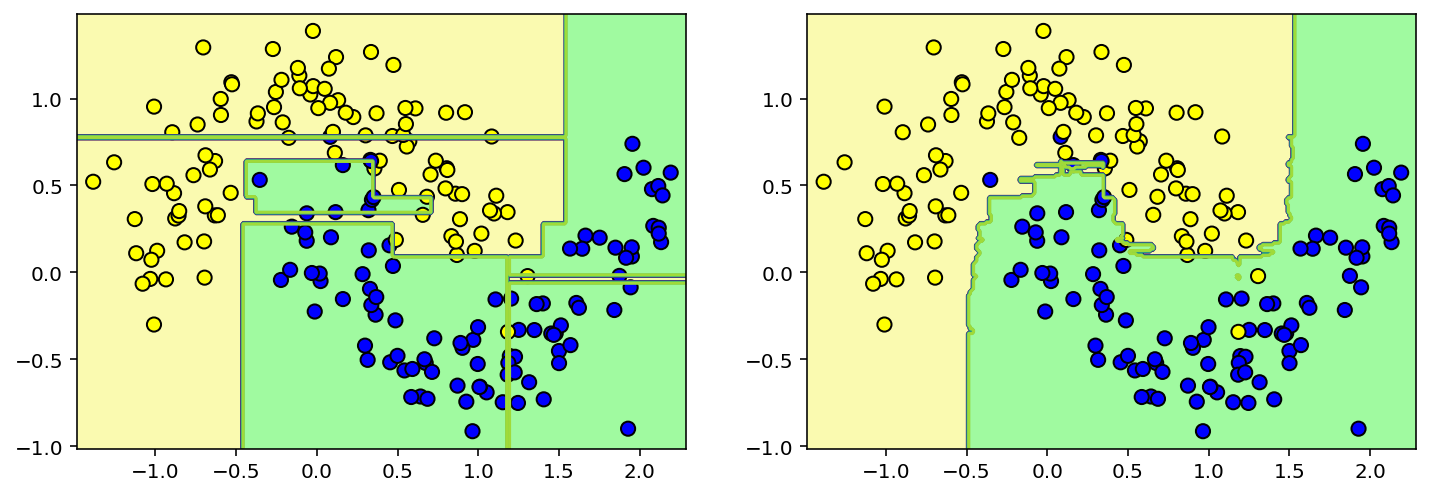

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils.plot_classf_model(X, y, one_tree, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, lots_of_trees, ax=ax[1], contour=True)

In [21]:
# Evaluando el modelo con los datos no entrenados
lots_of_trees = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                  bootstrap=True, max_samples=100, n_jobs=-1,
                                  oob_score=True, random_state=314)
lots_of_trees.fit(X, y);
lots_of_trees.oob_score_

0.95

### Random Forests

Un _Bagging Classifier_ considerando árboles de decisión es conocido como un **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, random_state=314, n_jobs=-1, oob_score=True)
rf.fit(X_test, y_test)
rf.oob_score_

0.85

In [25]:
# Predicción por medio de votos
rf.predict_proba(X[[3]])

array([[0.1825, 0.8175]])

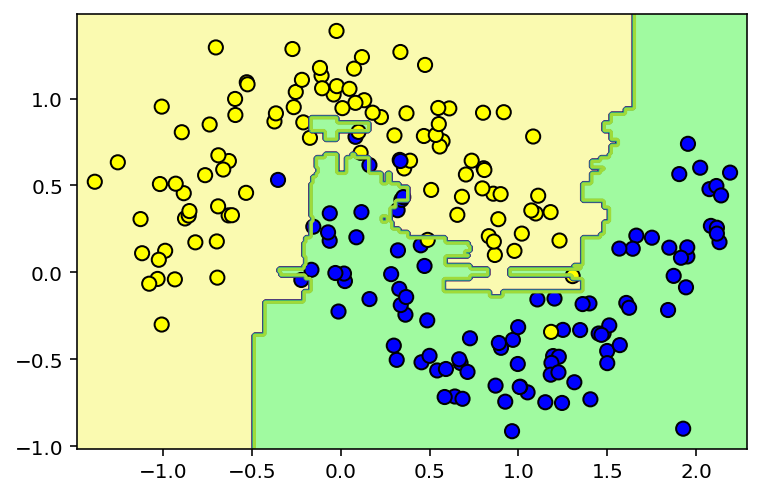

In [29]:
fig, ax = plt.subplots()
utils.plot_classf_model(X, y, rf, ax=ax, contour=True)

<h2 style="color:crimson">Ejercicio</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)
2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`
3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba
4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?
5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
import sys
sys.path.append("../files")
import utils

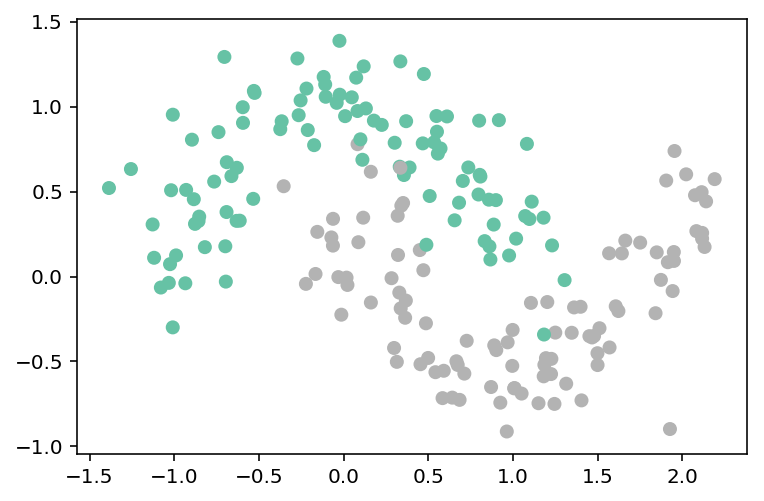

In [5]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [6]:
model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias = False)),
    ("lr", LogisticRegression(penalty="none", max_iter = 500))
])

In [7]:
bagging_logreg = BaggingClassifier(model, n_estimators=100,random_state=314 )


In [8]:
model.fit(X,y)
bagging_logreg.fit(X,y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('lr',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                                

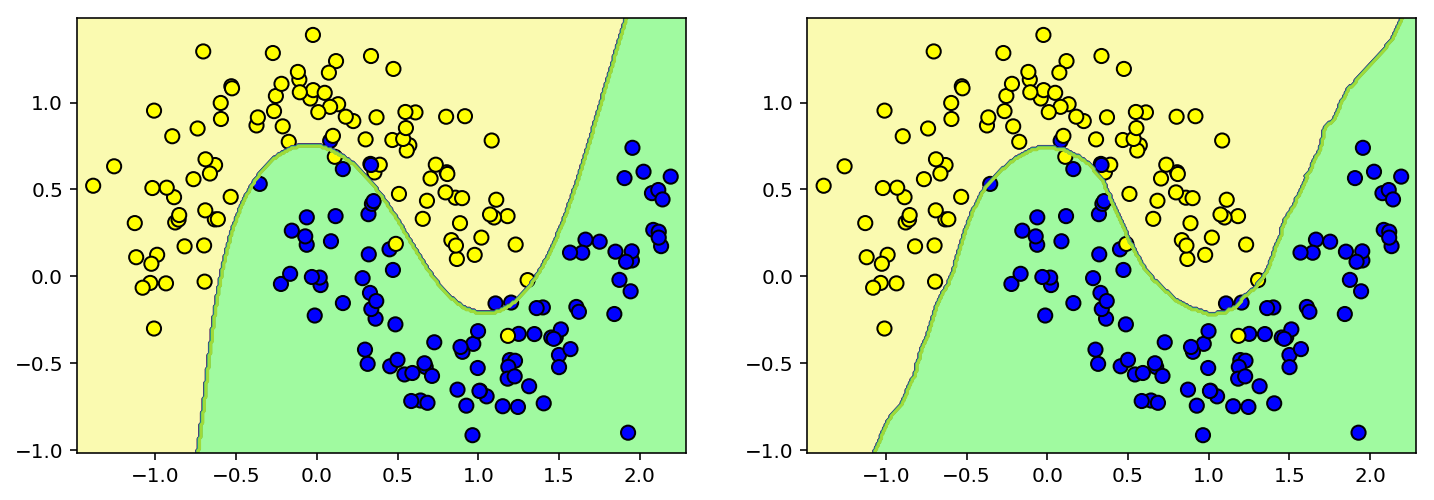

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

In [10]:
test = BaggingClassifier(base_estimator=model, n_estimators=100, random_state=314, oob_score=True)
test.fit(X,y)
test.oob_score_

0.955

In [11]:
from sklearn.metrics import f1_score

yhat_model = model.predict(X_test)
yhat_bagging_logreg = bagging_logreg.predict(X_test)

In [12]:
f1_model = f1_score(y_test, yhat_model)
f1_bagg = f1_score(y_test, yhat_bagging_logreg)

print(f'f1_score: {f1_model}')
print('')
print(f'f1_score de bagging_logreg: {f1_bagg}')

f1_score: 0.9500000000000001

f1_score de bagging_logreg: 0.9743589743589743
